<a href="https://colab.research.google.com/github/sauravkokane/Data-Science-Training/blob/master/Overfitting_Experience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Required Libraries

In [ ]:
# import cupy as cp
import numpy as cp

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

## Creation of functions

In [ ]:
memo = {}

def legendre_polynomial(x, n):
    if (x.tobytes(), n) in memo:  # Check if the result is already computed
        return memo[(x.tobytes(), n)]

    if n == 0:
        result = cp.ones_like(x)  # P_0(x) = 1 for all x
    elif n == 1:
        result = x  # P_1(x) = x
    else:
        # Recursively compute P_{n-1}(x) and P_{n-2}(x)
        result_n1 = legendre_polynomial(x, n - 1)
        result_n2 = legendre_polynomial(x, n - 2)

        # Compute P_n(x) using the recurrence relation
        result = ((2 * n - 1) * x * result_n1 - (n - 1) * result_n2) / n

    # Store the result in the memo dictionary
    memo[(x.tobytes(), n)] = result
    return result


In [ ]:
def generate_target(complexity):
    """

    """
    x = cp.arange(-1, 1, 0.0002)
    return (x, legendre_polynomial(x, complexity))

In [ ]:
def noise_function(x, noise_level):
  """
  Give Gaussian noise as per the input array

  Args:
    x: A CuPy 1D array.

  Returns:
    A CuPy 1D array with added Gaussian noise.
  """

  gaussian_noise = cp.random.normal(0, noise_level, size=x.shape)
  return gaussian_noise * ((2 - x)/abs(x - 2)) * 0.08

In [ ]:
def generate_noisy_samples(x, y, sample_size, noise_level=0):
    sample_indexes = cp.random.choice(x.size, size=sample_size, replace=False)
    sample_x = x[sample_indexes]
    sample_y = y[sample_indexes]
    sample_y += noise_function(sample_x, noise_level)
    return sample_x, sample_y

In [ ]:
def e_out(y_true, y_pred):
    return mean_squared_error(y_true, y_pred)

In [ ]:
def fill_nos_vs_nl(target_complexities, sample_sizes=cp.array([1]), noise_levels=cp.array([0])):
    nos_vs_nls = [cp.zeros((len(sample_sizes), len(noise_levels))) for i in range(len(target_complexities))]
    print(nos_vs_nls[0].shape)
    for i, complexity in enumerate(target_complexities.get()):
        for j, sample_size in enumerate(sample_sizes.get()):
            for k, noise_level in enumerate(noise_levels.get()):
                print(f"Complexity: {complexity}, Sample Size: {sample_size}, Noise Level: {noise_level}")
                x, y = generate_target(complexity)
                sample_x, sample_y = generate_noisy_samples(x, y, sample_size, noise_level=noise_level)
                h2 = cp.polyfit(sample_x, sample_y, 4)
                y2 = cp.polyval(h2, x)
                h10 = cp.polyfit(sample_x, sample_y, 25)
                y10 = cp.polyval(h10, x)
                eout2 = e_out(y.get(), y2.get())
                eout10 = e_out(y.get(), y10.get())
                # print(abs(eout10-eout2))
                nos_vs_nls[i][j, k] = abs(eout10-eout2)
                print((i+1) * (j+1) * (k+1))
    return nos_vs_nls

In [ ]:
def fill_nos_vs_nl(target_complexities, sample_sizes=cp.array([1]), noise_levels=cp.array([0])):
    nos_vs_nls = [cp.zeros((len(sample_sizes), len(noise_levels))) for i in range(len(target_complexities))]
    print(nos_vs_nls[0].shape)
    for i, complexity in enumerate(target_complexities):
        x, y = generate_target(complexity)

        for j, sample_size in enumerate(sample_sizes):
            for k, noise_level in enumerate(noise_levels):
                print(f"Complexity: {complexity}, Sample Size: {sample_size}, Noise Level: {noise_level}")

                sample_x, sample_y = generate_noisy_samples(x, y, sample_size, noise_level=noise_level)
                h2 = cp.polyfit(sample_x, sample_y, 2)
                y2 = cp.polyval(h2, x)
                h10 = cp.polyfit(sample_x, sample_y, 10)
                y10 = cp.polyval(h10, x)
                eout2 = e_out(y, y2)
                eout10 = e_out(y, y10)
                # print(abs(eout10-eout2))
                nos_vs_nls[i][j, k] = abs(eout10-eout2)
                print((i+1) * (j+1) * (k+1))
    return nos_vs_nls

In [ ]:
noise_levels1 = cp.arange(0, 4, 4/400).round(2)
sample_sizes1 = cp.arange(1, 241, 1)
target_complexity1 = cp.arange(1, 121, 1)

In [ ]:
cp.random.seed(88)
target_complexities = target_complexity1[cp.random.choice(target_complexity1.size, size=2, replace=False)]
target_complexities.sort()
target_complexities

array([59, 73])

In [ ]:
noise_levels

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  , 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09,
       1.1 , 1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2 ,
       1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3 , 1.31,
       1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4 , 1.41, 1.42,
       1.43, 1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.

In [ ]:
nos_vs_nls_outputs = fill_nos_vs_nl(cp.array([25, 60]), sample_sizes=sample_sizes1, noise_levels=noise_levels1)

(240, 400)
Complexity: 25, Sample Size: 1, Noise Level: 0.0
1
Complexity: 25, Sample Size: 1, Noise Level: 0.01
2
Complexity: 25, Sample Size: 1, Noise Level: 0.02
3
Complexity: 25, Sample Size: 1, Noise Level: 0.03
4
Complexity: 25, Sample Size: 1, Noise Level: 0.04
5
Complexity: 25, Sample Size: 1, Noise Level: 0.05
6
Complexity: 25, Sample Size: 1, Noise Level: 0.06
7
Complexity: 25, Sample Size: 1, Noise Level: 0.07
8
Complexity: 25, Sample Size: 1, Noise Level: 0.08
9
Complexity: 25, Sample Size: 1, Noise Level: 0.09
10
Complexity: 25, Sample Size: 1, Noise Level: 0.1
11
Complexity: 25, Sample Size: 1, Noise Level: 0.11
12
Complexity: 25, Sample Size: 1, Noise Level: 0.12
13
Complexity: 25, Sample Size: 1, Noise Level: 0.13
14
Complexity: 25, Sample Size: 1, Noise Level: 0.14
15
Complexity: 25, Sample Size: 1, Noise Level: 0.15
16
Complexity: 25, Sample Size: 1, Noise Level: 0.16
17
Complexity: 25, Sample Size: 1, Noise Level: 0.17
18
Complexity: 25, Sample Size: 1, Noise Level: 0

<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython

74
Complexity: 25, Sample Size: 1, Noise Level: 0.74
75
Complexity: 25, Sample Size: 1, Noise Level: 0.75
76
Complexity: 25, Sample Size: 1, Noise Level: 0.76
77
Complexity: 25, Sample Size: 1, Noise Level: 0.77
78
Complexity: 25, Sample Size: 1, Noise Level: 0.78
79
Complexity: 25, Sample Size: 1, Noise Level: 0.79
80
Complexity: 25, Sample Size: 1, Noise Level: 0.8
81
Complexity: 25, Sample Size: 1, Noise Level: 0.81
82
Complexity: 25, Sample Size: 1, Noise Level: 0.82
83
Complexity: 25, Sample Size: 1, Noise Level: 0.83
84
Complexity: 25, Sample Size: 1, Noise Level: 0.84
85
Complexity: 25, Sample Size: 1, Noise Level: 0.85
86
Complexity: 25, Sample Size: 1, Noise Level: 0.86
87
Complexity: 25, Sample Size: 1, Noise Level: 0.87
88
Complexity: 25, Sample Size: 1, Noise Level: 0.88
89
Complexity: 25, Sample Size: 1, Noise Level: 0.89
90
Complexity: 25, Sample Size: 1, Noise Level: 0.9
91
Complexity: 25, Sample Size: 1, Noise Level: 0.91
92
Complexity: 25, Sample Size: 1, Noise Level: 

<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython

169
Complexity: 25, Sample Size: 1, Noise Level: 1.69
170
Complexity: 25, Sample Size: 1, Noise Level: 1.7
171
Complexity: 25, Sample Size: 1, Noise Level: 1.71
172
Complexity: 25, Sample Size: 1, Noise Level: 1.72
173
Complexity: 25, Sample Size: 1, Noise Level: 1.73
174
Complexity: 25, Sample Size: 1, Noise Level: 1.74
175
Complexity: 25, Sample Size: 1, Noise Level: 1.75
176
Complexity: 25, Sample Size: 1, Noise Level: 1.76
177
Complexity: 25, Sample Size: 1, Noise Level: 1.77
178
Complexity: 25, Sample Size: 1, Noise Level: 1.78
179
Complexity: 25, Sample Size: 1, Noise Level: 1.79
180
Complexity: 25, Sample Size: 1, Noise Level: 1.8
181
Complexity: 25, Sample Size: 1, Noise Level: 1.81
182
Complexity: 25, Sample Size: 1, Noise Level: 1.82
183
Complexity: 25, Sample Size: 1, Noise Level: 1.83
184
Complexity: 25, Sample Size: 1, Noise Level: 1.84
185
Complexity: 25, Sample Size: 1, Noise Level: 1.85
186
Complexity: 25, Sample Size: 1, Noise Level: 1.86
187
Complexity: 25, Sample Siz

<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython

267
Complexity: 25, Sample Size: 1, Noise Level: 2.67
268
Complexity: 25, Sample Size: 1, Noise Level: 2.68
269
Complexity: 25, Sample Size: 1, Noise Level: 2.69
270
Complexity: 25, Sample Size: 1, Noise Level: 2.7
271
Complexity: 25, Sample Size: 1, Noise Level: 2.71
272
Complexity: 25, Sample Size: 1, Noise Level: 2.72
273
Complexity: 25, Sample Size: 1, Noise Level: 2.73
274
Complexity: 25, Sample Size: 1, Noise Level: 2.74
275
Complexity: 25, Sample Size: 1, Noise Level: 2.75
276
Complexity: 25, Sample Size: 1, Noise Level: 2.76
277
Complexity: 25, Sample Size: 1, Noise Level: 2.77
278
Complexity: 25, Sample Size: 1, Noise Level: 2.78
279
Complexity: 25, Sample Size: 1, Noise Level: 2.79
280
Complexity: 25, Sample Size: 1, Noise Level: 2.8
281
Complexity: 25, Sample Size: 1, Noise Level: 2.81
282
Complexity: 25, Sample Size: 1, Noise Level: 2.82
283
Complexity: 25, Sample Size: 1, Noise Level: 2.83
284
Complexity: 25, Sample Size: 1, Noise Level: 2.84
285
Complexity: 25, Sample Siz

<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython

359
Complexity: 25, Sample Size: 1, Noise Level: 3.59
360
Complexity: 25, Sample Size: 1, Noise Level: 3.6
361
Complexity: 25, Sample Size: 1, Noise Level: 3.61
362
Complexity: 25, Sample Size: 1, Noise Level: 3.62
363
Complexity: 25, Sample Size: 1, Noise Level: 3.63
364
Complexity: 25, Sample Size: 1, Noise Level: 3.64
365
Complexity: 25, Sample Size: 1, Noise Level: 3.65
366
Complexity: 25, Sample Size: 1, Noise Level: 3.66
367
Complexity: 25, Sample Size: 1, Noise Level: 3.67
368
Complexity: 25, Sample Size: 1, Noise Level: 3.68
369
Complexity: 25, Sample Size: 1, Noise Level: 3.69
370
Complexity: 25, Sample Size: 1, Noise Level: 3.7
371
Complexity: 25, Sample Size: 1, Noise Level: 3.71
372
Complexity: 25, Sample Size: 1, Noise Level: 3.72
373
Complexity: 25, Sample Size: 1, Noise Level: 3.73
374
Complexity: 25, Sample Size: 1, Noise Level: 3.74
375
Complexity: 25, Sample Size: 1, Noise Level: 3.75
376
Complexity: 25, Sample Size: 1, Noise Level: 3.76
377
Complexity: 25, Sample Siz

<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython

86
Complexity: 25, Sample Size: 2, Noise Level: 0.43
88
Complexity: 25, Sample Size: 2, Noise Level: 0.44
90
Complexity: 25, Sample Size: 2, Noise Level: 0.45
92
Complexity: 25, Sample Size: 2, Noise Level: 0.46
94
Complexity: 25, Sample Size: 2, Noise Level: 0.47
96
Complexity: 25, Sample Size: 2, Noise Level: 0.48
98
Complexity: 25, Sample Size: 2, Noise Level: 0.49
100
Complexity: 25, Sample Size: 2, Noise Level: 0.5
102
Complexity: 25, Sample Size: 2, Noise Level: 0.51
104
Complexity: 25, Sample Size: 2, Noise Level: 0.52
106
Complexity: 25, Sample Size: 2, Noise Level: 0.53
108
Complexity: 25, Sample Size: 2, Noise Level: 0.54
110
Complexity: 25, Sample Size: 2, Noise Level: 0.55
112
Complexity: 25, Sample Size: 2, Noise Level: 0.56
114
Complexity: 25, Sample Size: 2, Noise Level: 0.57
116
Complexity: 25, Sample Size: 2, Noise Level: 0.58
118
Complexity: 25, Sample Size: 2, Noise Level: 0.59
120
Complexity: 25, Sample Size: 2, Noise Level: 0.6
122
Complexity: 25, Sample Size: 2, N

<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython

272
Complexity: 25, Sample Size: 2, Noise Level: 1.36
274
Complexity: 25, Sample Size: 2, Noise Level: 1.37
276
Complexity: 25, Sample Size: 2, Noise Level: 1.38
278
Complexity: 25, Sample Size: 2, Noise Level: 1.39
280
Complexity: 25, Sample Size: 2, Noise Level: 1.4
282
Complexity: 25, Sample Size: 2, Noise Level: 1.41
284
Complexity: 25, Sample Size: 2, Noise Level: 1.42
286
Complexity: 25, Sample Size: 2, Noise Level: 1.43
288
Complexity: 25, Sample Size: 2, Noise Level: 1.44
290
Complexity: 25, Sample Size: 2, Noise Level: 1.45
292
Complexity: 25, Sample Size: 2, Noise Level: 1.46
294
Complexity: 25, Sample Size: 2, Noise Level: 1.47
296
Complexity: 25, Sample Size: 2, Noise Level: 1.48
298
Complexity: 25, Sample Size: 2, Noise Level: 1.49
300
Complexity: 25, Sample Size: 2, Noise Level: 1.5
302
Complexity: 25, Sample Size: 2, Noise Level: 1.51
304
Complexity: 25, Sample Size: 2, Noise Level: 1.52
306
Complexity: 25, Sample Size: 2, Noise Level: 1.53
308
Complexity: 25, Sample Siz

<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython

458
Complexity: 25, Sample Size: 2, Noise Level: 2.29
460
Complexity: 25, Sample Size: 2, Noise Level: 2.3
462
Complexity: 25, Sample Size: 2, Noise Level: 2.31
464
Complexity: 25, Sample Size: 2, Noise Level: 2.32
466
Complexity: 25, Sample Size: 2, Noise Level: 2.33
468
Complexity: 25, Sample Size: 2, Noise Level: 2.34
470
Complexity: 25, Sample Size: 2, Noise Level: 2.35
472
Complexity: 25, Sample Size: 2, Noise Level: 2.36
474
Complexity: 25, Sample Size: 2, Noise Level: 2.37
476
Complexity: 25, Sample Size: 2, Noise Level: 2.38
478
Complexity: 25, Sample Size: 2, Noise Level: 2.39
480
Complexity: 25, Sample Size: 2, Noise Level: 2.4
482
Complexity: 25, Sample Size: 2, Noise Level: 2.41
484
Complexity: 25, Sample Size: 2, Noise Level: 2.42
486
Complexity: 25, Sample Size: 2, Noise Level: 2.43
488
Complexity: 25, Sample Size: 2, Noise Level: 2.44
490
Complexity: 25, Sample Size: 2, Noise Level: 2.45
492
Complexity: 25, Sample Size: 2, Noise Level: 2.46
494
Complexity: 25, Sample Siz

<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython

644
Complexity: 25, Sample Size: 2, Noise Level: 3.22
646
Complexity: 25, Sample Size: 2, Noise Level: 3.23
648
Complexity: 25, Sample Size: 2, Noise Level: 3.24
650
Complexity: 25, Sample Size: 2, Noise Level: 3.25
652
Complexity: 25, Sample Size: 2, Noise Level: 3.26
654
Complexity: 25, Sample Size: 2, Noise Level: 3.27
656
Complexity: 25, Sample Size: 2, Noise Level: 3.28
658
Complexity: 25, Sample Size: 2, Noise Level: 3.29
660
Complexity: 25, Sample Size: 2, Noise Level: 3.3
662
Complexity: 25, Sample Size: 2, Noise Level: 3.31
664
Complexity: 25, Sample Size: 2, Noise Level: 3.32
666
Complexity: 25, Sample Size: 2, Noise Level: 3.33
668
Complexity: 25, Sample Size: 2, Noise Level: 3.34
670
Complexity: 25, Sample Size: 2, Noise Level: 3.35
672
Complexity: 25, Sample Size: 2, Noise Level: 3.36
674
Complexity: 25, Sample Size: 2, Noise Level: 3.37
676
Complexity: 25, Sample Size: 2, Noise Level: 3.38
678
Complexity: 25, Sample Size: 2, Noise Level: 3.39
680
Complexity: 25, Sample Si

<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython

42
Complexity: 25, Sample Size: 3, Noise Level: 0.14
45
Complexity: 25, Sample Size: 3, Noise Level: 0.15
48
Complexity: 25, Sample Size: 3, Noise Level: 0.16
51
Complexity: 25, Sample Size: 3, Noise Level: 0.17
54
Complexity: 25, Sample Size: 3, Noise Level: 0.18
57
Complexity: 25, Sample Size: 3, Noise Level: 0.19
60
Complexity: 25, Sample Size: 3, Noise Level: 0.2
63
Complexity: 25, Sample Size: 3, Noise Level: 0.21
66
Complexity: 25, Sample Size: 3, Noise Level: 0.22
69
Complexity: 25, Sample Size: 3, Noise Level: 0.23
72
Complexity: 25, Sample Size: 3, Noise Level: 0.24
75
Complexity: 25, Sample Size: 3, Noise Level: 0.25
78
Complexity: 25, Sample Size: 3, Noise Level: 0.26
81
Complexity: 25, Sample Size: 3, Noise Level: 0.27
84
Complexity: 25, Sample Size: 3, Noise Level: 0.28
87
Complexity: 25, Sample Size: 3, Noise Level: 0.29
90
Complexity: 25, Sample Size: 3, Noise Level: 0.3
93
Complexity: 25, Sample Size: 3, Noise Level: 0.31
96
Complexity: 25, Sample Size: 3, Noise Level: 

<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython

309
Complexity: 25, Sample Size: 3, Noise Level: 1.03
312
Complexity: 25, Sample Size: 3, Noise Level: 1.04
315
Complexity: 25, Sample Size: 3, Noise Level: 1.05
318
Complexity: 25, Sample Size: 3, Noise Level: 1.06
321
Complexity: 25, Sample Size: 3, Noise Level: 1.07
324
Complexity: 25, Sample Size: 3, Noise Level: 1.08
327
Complexity: 25, Sample Size: 3, Noise Level: 1.09
330
Complexity: 25, Sample Size: 3, Noise Level: 1.1
333
Complexity: 25, Sample Size: 3, Noise Level: 1.11
336
Complexity: 25, Sample Size: 3, Noise Level: 1.12
339
Complexity: 25, Sample Size: 3, Noise Level: 1.13
342
Complexity: 25, Sample Size: 3, Noise Level: 1.14
345
Complexity: 25, Sample Size: 3, Noise Level: 1.15
348
Complexity: 25, Sample Size: 3, Noise Level: 1.16
351
Complexity: 25, Sample Size: 3, Noise Level: 1.17
354
Complexity: 25, Sample Size: 3, Noise Level: 1.18
357
Complexity: 25, Sample Size: 3, Noise Level: 1.19
360
Complexity: 25, Sample Size: 3, Noise Level: 1.2
363
Complexity: 25, Sample Siz

<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython

579
Complexity: 25, Sample Size: 3, Noise Level: 1.93
582
Complexity: 25, Sample Size: 3, Noise Level: 1.94
585
Complexity: 25, Sample Size: 3, Noise Level: 1.95
588
Complexity: 25, Sample Size: 3, Noise Level: 1.96
591
Complexity: 25, Sample Size: 3, Noise Level: 1.97
594
Complexity: 25, Sample Size: 3, Noise Level: 1.98
597
Complexity: 25, Sample Size: 3, Noise Level: 1.99
600
Complexity: 25, Sample Size: 3, Noise Level: 2.0
603
Complexity: 25, Sample Size: 3, Noise Level: 2.01
606
Complexity: 25, Sample Size: 3, Noise Level: 2.02
609
Complexity: 25, Sample Size: 3, Noise Level: 2.03
612
Complexity: 25, Sample Size: 3, Noise Level: 2.04
615
Complexity: 25, Sample Size: 3, Noise Level: 2.05
618
Complexity: 25, Sample Size: 3, Noise Level: 2.06
621
Complexity: 25, Sample Size: 3, Noise Level: 2.07
624
Complexity: 25, Sample Size: 3, Noise Level: 2.08
627
Complexity: 25, Sample Size: 3, Noise Level: 2.09
630
Complexity: 25, Sample Size: 3, Noise Level: 2.1
633
Complexity: 25, Sample Siz

<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython

852
Complexity: 25, Sample Size: 3, Noise Level: 2.84
855
Complexity: 25, Sample Size: 3, Noise Level: 2.85
858
Complexity: 25, Sample Size: 3, Noise Level: 2.86
861
Complexity: 25, Sample Size: 3, Noise Level: 2.87
864
Complexity: 25, Sample Size: 3, Noise Level: 2.88
867
Complexity: 25, Sample Size: 3, Noise Level: 2.89
870
Complexity: 25, Sample Size: 3, Noise Level: 2.9
873
Complexity: 25, Sample Size: 3, Noise Level: 2.91
876
Complexity: 25, Sample Size: 3, Noise Level: 2.92
879
Complexity: 25, Sample Size: 3, Noise Level: 2.93
882
Complexity: 25, Sample Size: 3, Noise Level: 2.94
885
Complexity: 25, Sample Size: 3, Noise Level: 2.95
888
Complexity: 25, Sample Size: 3, Noise Level: 2.96
891
Complexity: 25, Sample Size: 3, Noise Level: 2.97
894
Complexity: 25, Sample Size: 3, Noise Level: 2.98
897
Complexity: 25, Sample Size: 3, Noise Level: 2.99
900
Complexity: 25, Sample Size: 3, Noise Level: 3.0
903
Complexity: 25, Sample Size: 3, Noise Level: 3.01
906
Complexity: 25, Sample Siz

<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython

1125
Complexity: 25, Sample Size: 3, Noise Level: 3.75
1128
Complexity: 25, Sample Size: 3, Noise Level: 3.76
1131
Complexity: 25, Sample Size: 3, Noise Level: 3.77
1134
Complexity: 25, Sample Size: 3, Noise Level: 3.78
1137
Complexity: 25, Sample Size: 3, Noise Level: 3.79
1140
Complexity: 25, Sample Size: 3, Noise Level: 3.8
1143
Complexity: 25, Sample Size: 3, Noise Level: 3.81
1146
Complexity: 25, Sample Size: 3, Noise Level: 3.82
1149
Complexity: 25, Sample Size: 3, Noise Level: 3.83
1152
Complexity: 25, Sample Size: 3, Noise Level: 3.84
1155
Complexity: 25, Sample Size: 3, Noise Level: 3.85
1158
Complexity: 25, Sample Size: 3, Noise Level: 3.86
1161
Complexity: 25, Sample Size: 3, Noise Level: 3.87
1164
Complexity: 25, Sample Size: 3, Noise Level: 3.88
1167
Complexity: 25, Sample Size: 3, Noise Level: 3.89
1170
Complexity: 25, Sample Size: 3, Noise Level: 3.9
1173
Complexity: 25, Sample Size: 3, Noise Level: 3.91
1176
Complexity: 25, Sample Size: 3, Noise Level: 3.92
1179
Complex

<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython

280
Complexity: 25, Sample Size: 4, Noise Level: 0.7
284
Complexity: 25, Sample Size: 4, Noise Level: 0.71
288
Complexity: 25, Sample Size: 4, Noise Level: 0.72
292
Complexity: 25, Sample Size: 4, Noise Level: 0.73
296
Complexity: 25, Sample Size: 4, Noise Level: 0.74
300
Complexity: 25, Sample Size: 4, Noise Level: 0.75
304
Complexity: 25, Sample Size: 4, Noise Level: 0.76
308
Complexity: 25, Sample Size: 4, Noise Level: 0.77
312
Complexity: 25, Sample Size: 4, Noise Level: 0.78
316
Complexity: 25, Sample Size: 4, Noise Level: 0.79
320
Complexity: 25, Sample Size: 4, Noise Level: 0.8
324
Complexity: 25, Sample Size: 4, Noise Level: 0.81
328
Complexity: 25, Sample Size: 4, Noise Level: 0.82
332
Complexity: 25, Sample Size: 4, Noise Level: 0.83
336
Complexity: 25, Sample Size: 4, Noise Level: 0.84
340
Complexity: 25, Sample Size: 4, Noise Level: 0.85
344
Complexity: 25, Sample Size: 4, Noise Level: 0.86
348
Complexity: 25, Sample Size: 4, Noise Level: 0.87
352
Complexity: 25, Sample Siz

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython

632
Complexity: 25, Sample Size: 4, Noise Level: 1.58
636
Complexity: 25, Sample Size: 4, Noise Level: 1.59
640
Complexity: 25, Sample Size: 4, Noise Level: 1.6
644
Complexity: 25, Sample Size: 4, Noise Level: 1.61
648
Complexity: 25, Sample Size: 4, Noise Level: 1.62
652
Complexity: 25, Sample Size: 4, Noise Level: 1.63
656
Complexity: 25, Sample Size: 4, Noise Level: 1.64
660
Complexity: 25, Sample Size: 4, Noise Level: 1.65
664
Complexity: 25, Sample Size: 4, Noise Level: 1.66
668
Complexity: 25, Sample Size: 4, Noise Level: 1.67
672
Complexity: 25, Sample Size: 4, Noise Level: 1.68
676
Complexity: 25, Sample Size: 4, Noise Level: 1.69
680
Complexity: 25, Sample Size: 4, Noise Level: 1.7
684
Complexity: 25, Sample Size: 4, Noise Level: 1.71
688
Complexity: 25, Sample Size: 4, Noise Level: 1.72
692
Complexity: 25, Sample Size: 4, Noise Level: 1.73
696
Complexity: 25, Sample Size: 4, Noise Level: 1.74
700
Complexity: 25, Sample Size: 4, Noise Level: 1.75
704
Complexity: 25, Sample Siz

<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython

988
Complexity: 25, Sample Size: 4, Noise Level: 2.47
992
Complexity: 25, Sample Size: 4, Noise Level: 2.48
996
Complexity: 25, Sample Size: 4, Noise Level: 2.49
1000
Complexity: 25, Sample Size: 4, Noise Level: 2.5
1004
Complexity: 25, Sample Size: 4, Noise Level: 2.51
1008
Complexity: 25, Sample Size: 4, Noise Level: 2.52
1012
Complexity: 25, Sample Size: 4, Noise Level: 2.53
1016
Complexity: 25, Sample Size: 4, Noise Level: 2.54
1020
Complexity: 25, Sample Size: 4, Noise Level: 2.55
1024
Complexity: 25, Sample Size: 4, Noise Level: 2.56
1028
Complexity: 25, Sample Size: 4, Noise Level: 2.57
1032
Complexity: 25, Sample Size: 4, Noise Level: 2.58
1036
Complexity: 25, Sample Size: 4, Noise Level: 2.59
1040
Complexity: 25, Sample Size: 4, Noise Level: 2.6
1044
Complexity: 25, Sample Size: 4, Noise Level: 2.61
1048
Complexity: 25, Sample Size: 4, Noise Level: 2.62
1052
Complexity: 25, Sample Size: 4, Noise Level: 2.63
1056
Complexity: 25, Sample Size: 4, Noise Level: 2.64
1060
Complexity

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython

1360
Complexity: 25, Sample Size: 4, Noise Level: 3.4
1364
Complexity: 25, Sample Size: 4, Noise Level: 3.41
1368
Complexity: 25, Sample Size: 4, Noise Level: 3.42
1372
Complexity: 25, Sample Size: 4, Noise Level: 3.43
1376
Complexity: 25, Sample Size: 4, Noise Level: 3.44
1380
Complexity: 25, Sample Size: 4, Noise Level: 3.45
1384
Complexity: 25, Sample Size: 4, Noise Level: 3.46
1388
Complexity: 25, Sample Size: 4, Noise Level: 3.47
1392
Complexity: 25, Sample Size: 4, Noise Level: 3.48
1396
Complexity: 25, Sample Size: 4, Noise Level: 3.49
1400
Complexity: 25, Sample Size: 4, Noise Level: 3.5
1404
Complexity: 25, Sample Size: 4, Noise Level: 3.51
1408
Complexity: 25, Sample Size: 4, Noise Level: 3.52
1412
Complexity: 25, Sample Size: 4, Noise Level: 3.53
1416
Complexity: 25, Sample Size: 4, Noise Level: 3.54
1420
Complexity: 25, Sample Size: 4, Noise Level: 3.55
1424
Complexity: 25, Sample Size: 4, Noise Level: 3.56
1428
Complexity: 25, Sample Size: 4, Noise Level: 3.57
1432
Complex

<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython

115
Complexity: 25, Sample Size: 5, Noise Level: 0.23
120
Complexity: 25, Sample Size: 5, Noise Level: 0.24
125
Complexity: 25, Sample Size: 5, Noise Level: 0.25
130
Complexity: 25, Sample Size: 5, Noise Level: 0.26
135
Complexity: 25, Sample Size: 5, Noise Level: 0.27
140
Complexity: 25, Sample Size: 5, Noise Level: 0.28
145
Complexity: 25, Sample Size: 5, Noise Level: 0.29
150
Complexity: 25, Sample Size: 5, Noise Level: 0.3
155
Complexity: 25, Sample Size: 5, Noise Level: 0.31
160
Complexity: 25, Sample Size: 5, Noise Level: 0.32
165
Complexity: 25, Sample Size: 5, Noise Level: 0.33
170
Complexity: 25, Sample Size: 5, Noise Level: 0.34
175
Complexity: 25, Sample Size: 5, Noise Level: 0.35
180
Complexity: 25, Sample Size: 5, Noise Level: 0.36
185
Complexity: 25, Sample Size: 5, Noise Level: 0.37
190
Complexity: 25, Sample Size: 5, Noise Level: 0.38
195
Complexity: 25, Sample Size: 5, Noise Level: 0.39
200
Complexity: 25, Sample Size: 5, Noise Level: 0.4
205
Complexity: 25, Sample Siz

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


570
Complexity: 25, Sample Size: 5, Noise Level: 1.14
575
Complexity: 25, Sample Size: 5, Noise Level: 1.15
580
Complexity: 25, Sample Size: 5, Noise Level: 1.16
585
Complexity: 25, Sample Size: 5, Noise Level: 1.17
590
Complexity: 25, Sample Size: 5, Noise Level: 1.18
595
Complexity: 25, Sample Size: 5, Noise Level: 1.19
600
Complexity: 25, Sample Size: 5, Noise Level: 1.2
605
Complexity: 25, Sample Size: 5, Noise Level: 1.21
610
Complexity: 25, Sample Size: 5, Noise Level: 1.22
615
Complexity: 25, Sample Size: 5, Noise Level: 1.23
620
Complexity: 25, Sample Size: 5, Noise Level: 1.24
625
Complexity: 25, Sample Size: 5, Noise Level: 1.25
630
Complexity: 25, Sample Size: 5, Noise Level: 1.26
635
Complexity: 25, Sample Size: 5, Noise Level: 1.27
640
Complexity: 25, Sample Size: 5, Noise Level: 1.28
645
Complexity: 25, Sample Size: 5, Noise Level: 1.29
650
Complexity: 25, Sample Size: 5, Noise Level: 1.3
655
Complexity: 25, Sample Size: 5, Noise Level: 1.31
660
Complexity: 25, Sample Siz

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


980
Complexity: 25, Sample Size: 5, Noise Level: 1.96
985
Complexity: 25, Sample Size: 5, Noise Level: 1.97
990
Complexity: 25, Sample Size: 5, Noise Level: 1.98
995
Complexity: 25, Sample Size: 5, Noise Level: 1.99
1000
Complexity: 25, Sample Size: 5, Noise Level: 2.0
1005
Complexity: 25, Sample Size: 5, Noise Level: 2.01
1010
Complexity: 25, Sample Size: 5, Noise Level: 2.02
1015
Complexity: 25, Sample Size: 5, Noise Level: 2.03
1020
Complexity: 25, Sample Size: 5, Noise Level: 2.04
1025
Complexity: 25, Sample Size: 5, Noise Level: 2.05
1030
Complexity: 25, Sample Size: 5, Noise Level: 2.06
1035
Complexity: 25, Sample Size: 5, Noise Level: 2.07
1040
Complexity: 25, Sample Size: 5, Noise Level: 2.08
1045
Complexity: 25, Sample Size: 5, Noise Level: 2.09
1050
Complexity: 25, Sample Size: 5, Noise Level: 2.1
1055
Complexity: 25, Sample Size: 5, Noise Level: 2.11
1060
Complexity: 25, Sample Size: 5, Noise Level: 2.12
1065
Complexity: 25, Sample Size: 5, Noise Level: 2.13
1070
Complexity:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


1430
Complexity: 25, Sample Size: 5, Noise Level: 2.86
1435
Complexity: 25, Sample Size: 5, Noise Level: 2.87
1440
Complexity: 25, Sample Size: 5, Noise Level: 2.88
1445
Complexity: 25, Sample Size: 5, Noise Level: 2.89
1450
Complexity: 25, Sample Size: 5, Noise Level: 2.9
1455
Complexity: 25, Sample Size: 5, Noise Level: 2.91
1460
Complexity: 25, Sample Size: 5, Noise Level: 2.92
1465
Complexity: 25, Sample Size: 5, Noise Level: 2.93
1470
Complexity: 25, Sample Size: 5, Noise Level: 2.94
1475
Complexity: 25, Sample Size: 5, Noise Level: 2.95
1480
Complexity: 25, Sample Size: 5, Noise Level: 2.96
1485
Complexity: 25, Sample Size: 5, Noise Level: 2.97
1490
Complexity: 25, Sample Size: 5, Noise Level: 2.98
1495
Complexity: 25, Sample Size: 5, Noise Level: 2.99
1500
Complexity: 25, Sample Size: 5, Noise Level: 3.0
1505
Complexity: 25, Sample Size: 5, Noise Level: 3.01
1510
Complexity: 25, Sample Size: 5, Noise Level: 3.02
1515
Complexity: 25, Sample Size: 5, Noise Level: 3.03
1520
Complex

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


1875
Complexity: 25, Sample Size: 5, Noise Level: 3.75
1880
Complexity: 25, Sample Size: 5, Noise Level: 3.76
1885
Complexity: 25, Sample Size: 5, Noise Level: 3.77
1890
Complexity: 25, Sample Size: 5, Noise Level: 3.78
1895
Complexity: 25, Sample Size: 5, Noise Level: 3.79
1900
Complexity: 25, Sample Size: 5, Noise Level: 3.8
1905
Complexity: 25, Sample Size: 5, Noise Level: 3.81
1910
Complexity: 25, Sample Size: 5, Noise Level: 3.82
1915
Complexity: 25, Sample Size: 5, Noise Level: 3.83
1920
Complexity: 25, Sample Size: 5, Noise Level: 3.84
1925
Complexity: 25, Sample Size: 5, Noise Level: 3.85
1930
Complexity: 25, Sample Size: 5, Noise Level: 3.86
1935
Complexity: 25, Sample Size: 5, Noise Level: 3.87
1940
Complexity: 25, Sample Size: 5, Noise Level: 3.88
1945
Complexity: 25, Sample Size: 5, Noise Level: 3.89
1950
Complexity: 25, Sample Size: 5, Noise Level: 3.9
1955
Complexity: 25, Sample Size: 5, Noise Level: 3.91
1960
Complexity: 25, Sample Size: 5, Noise Level: 3.92
1965
Complex

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


366
Complexity: 25, Sample Size: 6, Noise Level: 0.61
372
Complexity: 25, Sample Size: 6, Noise Level: 0.62
378
Complexity: 25, Sample Size: 6, Noise Level: 0.63
384
Complexity: 25, Sample Size: 6, Noise Level: 0.64
390
Complexity: 25, Sample Size: 6, Noise Level: 0.65
396
Complexity: 25, Sample Size: 6, Noise Level: 0.66
402
Complexity: 25, Sample Size: 6, Noise Level: 0.67
408
Complexity: 25, Sample Size: 6, Noise Level: 0.68
414
Complexity: 25, Sample Size: 6, Noise Level: 0.69
420
Complexity: 25, Sample Size: 6, Noise Level: 0.7
426
Complexity: 25, Sample Size: 6, Noise Level: 0.71
432
Complexity: 25, Sample Size: 6, Noise Level: 0.72
438
Complexity: 25, Sample Size: 6, Noise Level: 0.73
444
Complexity: 25, Sample Size: 6, Noise Level: 0.74
450
Complexity: 25, Sample Size: 6, Noise Level: 0.75
456
Complexity: 25, Sample Size: 6, Noise Level: 0.76
462
Complexity: 25, Sample Size: 6, Noise Level: 0.77
468
Complexity: 25, Sample Size: 6, Noise Level: 0.78
474
Complexity: 25, Sample Si

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


930
Complexity: 25, Sample Size: 6, Noise Level: 1.55
936
Complexity: 25, Sample Size: 6, Noise Level: 1.56
942
Complexity: 25, Sample Size: 6, Noise Level: 1.57
948
Complexity: 25, Sample Size: 6, Noise Level: 1.58
954
Complexity: 25, Sample Size: 6, Noise Level: 1.59
960
Complexity: 25, Sample Size: 6, Noise Level: 1.6
966
Complexity: 25, Sample Size: 6, Noise Level: 1.61
972
Complexity: 25, Sample Size: 6, Noise Level: 1.62
978
Complexity: 25, Sample Size: 6, Noise Level: 1.63
984
Complexity: 25, Sample Size: 6, Noise Level: 1.64
990
Complexity: 25, Sample Size: 6, Noise Level: 1.65
996
Complexity: 25, Sample Size: 6, Noise Level: 1.66
1002
Complexity: 25, Sample Size: 6, Noise Level: 1.67
1008
Complexity: 25, Sample Size: 6, Noise Level: 1.68
1014
Complexity: 25, Sample Size: 6, Noise Level: 1.69
1020
Complexity: 25, Sample Size: 6, Noise Level: 1.7
1026
Complexity: 25, Sample Size: 6, Noise Level: 1.71
1032
Complexity: 25, Sample Size: 6, Noise Level: 1.72
1038
Complexity: 25, Sam

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


1464
Complexity: 25, Sample Size: 6, Noise Level: 2.44
1470
Complexity: 25, Sample Size: 6, Noise Level: 2.45
1476
Complexity: 25, Sample Size: 6, Noise Level: 2.46
1482
Complexity: 25, Sample Size: 6, Noise Level: 2.47
1488
Complexity: 25, Sample Size: 6, Noise Level: 2.48
1494
Complexity: 25, Sample Size: 6, Noise Level: 2.49
1500
Complexity: 25, Sample Size: 6, Noise Level: 2.5
1506
Complexity: 25, Sample Size: 6, Noise Level: 2.51
1512
Complexity: 25, Sample Size: 6, Noise Level: 2.52
1518
Complexity: 25, Sample Size: 6, Noise Level: 2.53
1524
Complexity: 25, Sample Size: 6, Noise Level: 2.54
1530
Complexity: 25, Sample Size: 6, Noise Level: 2.55
1536
Complexity: 25, Sample Size: 6, Noise Level: 2.56
1542
Complexity: 25, Sample Size: 6, Noise Level: 2.57
1548
Complexity: 25, Sample Size: 6, Noise Level: 2.58
1554
Complexity: 25, Sample Size: 6, Noise Level: 2.59
1560
Complexity: 25, Sample Size: 6, Noise Level: 2.6
1566
Complexity: 25, Sample Size: 6, Noise Level: 2.61
1572
Complex

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


1998
Complexity: 25, Sample Size: 6, Noise Level: 3.33
2004
Complexity: 25, Sample Size: 6, Noise Level: 3.34
2010
Complexity: 25, Sample Size: 6, Noise Level: 3.35
2016
Complexity: 25, Sample Size: 6, Noise Level: 3.36
2022
Complexity: 25, Sample Size: 6, Noise Level: 3.37
2028
Complexity: 25, Sample Size: 6, Noise Level: 3.38
2034
Complexity: 25, Sample Size: 6, Noise Level: 3.39
2040
Complexity: 25, Sample Size: 6, Noise Level: 3.4
2046
Complexity: 25, Sample Size: 6, Noise Level: 3.41
2052
Complexity: 25, Sample Size: 6, Noise Level: 3.42
2058
Complexity: 25, Sample Size: 6, Noise Level: 3.43
2064
Complexity: 25, Sample Size: 6, Noise Level: 3.44
2070
Complexity: 25, Sample Size: 6, Noise Level: 3.45
2076
Complexity: 25, Sample Size: 6, Noise Level: 3.46
2082
Complexity: 25, Sample Size: 6, Noise Level: 3.47
2088
Complexity: 25, Sample Size: 6, Noise Level: 3.48
2094
Complexity: 25, Sample Size: 6, Noise Level: 3.49
2100
Complexity: 25, Sample Size: 6, Noise Level: 3.5
2106
Complex

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


189
Complexity: 25, Sample Size: 7, Noise Level: 0.27
196
Complexity: 25, Sample Size: 7, Noise Level: 0.28
203
Complexity: 25, Sample Size: 7, Noise Level: 0.29
210
Complexity: 25, Sample Size: 7, Noise Level: 0.3
217
Complexity: 25, Sample Size: 7, Noise Level: 0.31
224
Complexity: 25, Sample Size: 7, Noise Level: 0.32
231
Complexity: 25, Sample Size: 7, Noise Level: 0.33
238
Complexity: 25, Sample Size: 7, Noise Level: 0.34
245
Complexity: 25, Sample Size: 7, Noise Level: 0.35
252
Complexity: 25, Sample Size: 7, Noise Level: 0.36
259
Complexity: 25, Sample Size: 7, Noise Level: 0.37
266
Complexity: 25, Sample Size: 7, Noise Level: 0.38
273
Complexity: 25, Sample Size: 7, Noise Level: 0.39
280
Complexity: 25, Sample Size: 7, Noise Level: 0.4
287
Complexity: 25, Sample Size: 7, Noise Level: 0.41
294
Complexity: 25, Sample Size: 7, Noise Level: 0.42
301
Complexity: 25, Sample Size: 7, Noise Level: 0.43
308
Complexity: 25, Sample Size: 7, Noise Level: 0.44
315
Complexity: 25, Sample Siz

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


819
Complexity: 25, Sample Size: 7, Noise Level: 1.17
826
Complexity: 25, Sample Size: 7, Noise Level: 1.18
833
Complexity: 25, Sample Size: 7, Noise Level: 1.19
840
Complexity: 25, Sample Size: 7, Noise Level: 1.2
847
Complexity: 25, Sample Size: 7, Noise Level: 1.21
854
Complexity: 25, Sample Size: 7, Noise Level: 1.22
861
Complexity: 25, Sample Size: 7, Noise Level: 1.23
868
Complexity: 25, Sample Size: 7, Noise Level: 1.24
875
Complexity: 25, Sample Size: 7, Noise Level: 1.25
882
Complexity: 25, Sample Size: 7, Noise Level: 1.26
889
Complexity: 25, Sample Size: 7, Noise Level: 1.27
896
Complexity: 25, Sample Size: 7, Noise Level: 1.28
903
Complexity: 25, Sample Size: 7, Noise Level: 1.29
910
Complexity: 25, Sample Size: 7, Noise Level: 1.3
917
Complexity: 25, Sample Size: 7, Noise Level: 1.31
924
Complexity: 25, Sample Size: 7, Noise Level: 1.32
931
Complexity: 25, Sample Size: 7, Noise Level: 1.33
938
Complexity: 25, Sample Size: 7, Noise Level: 1.34
945
Complexity: 25, Sample Siz

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


1456
Complexity: 25, Sample Size: 7, Noise Level: 2.08
1463
Complexity: 25, Sample Size: 7, Noise Level: 2.09
1470
Complexity: 25, Sample Size: 7, Noise Level: 2.1
1477
Complexity: 25, Sample Size: 7, Noise Level: 2.11
1484
Complexity: 25, Sample Size: 7, Noise Level: 2.12
1491
Complexity: 25, Sample Size: 7, Noise Level: 2.13
1498
Complexity: 25, Sample Size: 7, Noise Level: 2.14
1505
Complexity: 25, Sample Size: 7, Noise Level: 2.15
1512
Complexity: 25, Sample Size: 7, Noise Level: 2.16
1519
Complexity: 25, Sample Size: 7, Noise Level: 2.17
1526
Complexity: 25, Sample Size: 7, Noise Level: 2.18
1533
Complexity: 25, Sample Size: 7, Noise Level: 2.19
1540
Complexity: 25, Sample Size: 7, Noise Level: 2.2
1547
Complexity: 25, Sample Size: 7, Noise Level: 2.21
1554
Complexity: 25, Sample Size: 7, Noise Level: 2.22
1561
Complexity: 25, Sample Size: 7, Noise Level: 2.23
1568
Complexity: 25, Sample Size: 7, Noise Level: 2.24
1575
Complexity: 25, Sample Size: 7, Noise Level: 2.25
1582
Complex

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


2086
Complexity: 25, Sample Size: 7, Noise Level: 2.98
2093
Complexity: 25, Sample Size: 7, Noise Level: 2.99
2100
Complexity: 25, Sample Size: 7, Noise Level: 3.0
2107
Complexity: 25, Sample Size: 7, Noise Level: 3.01
2114
Complexity: 25, Sample Size: 7, Noise Level: 3.02
2121
Complexity: 25, Sample Size: 7, Noise Level: 3.03
2128
Complexity: 25, Sample Size: 7, Noise Level: 3.04
2135
Complexity: 25, Sample Size: 7, Noise Level: 3.05
2142
Complexity: 25, Sample Size: 7, Noise Level: 3.06
2149
Complexity: 25, Sample Size: 7, Noise Level: 3.07
2156
Complexity: 25, Sample Size: 7, Noise Level: 3.08
2163
Complexity: 25, Sample Size: 7, Noise Level: 3.09
2170
Complexity: 25, Sample Size: 7, Noise Level: 3.1
2177
Complexity: 25, Sample Size: 7, Noise Level: 3.11
2184
Complexity: 25, Sample Size: 7, Noise Level: 3.12
2191
Complexity: 25, Sample Size: 7, Noise Level: 3.13
2198
Complexity: 25, Sample Size: 7, Noise Level: 3.14
2205
Complexity: 25, Sample Size: 7, Noise Level: 3.15
2212
Complex

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


2716
Complexity: 25, Sample Size: 7, Noise Level: 3.88
2723
Complexity: 25, Sample Size: 7, Noise Level: 3.89
2730
Complexity: 25, Sample Size: 7, Noise Level: 3.9
2737
Complexity: 25, Sample Size: 7, Noise Level: 3.91
2744
Complexity: 25, Sample Size: 7, Noise Level: 3.92
2751
Complexity: 25, Sample Size: 7, Noise Level: 3.93
2758
Complexity: 25, Sample Size: 7, Noise Level: 3.94
2765
Complexity: 25, Sample Size: 7, Noise Level: 3.95
2772
Complexity: 25, Sample Size: 7, Noise Level: 3.96
2779
Complexity: 25, Sample Size: 7, Noise Level: 3.97
2786
Complexity: 25, Sample Size: 7, Noise Level: 3.98
2793
Complexity: 25, Sample Size: 7, Noise Level: 3.99
2800
Complexity: 25, Sample Size: 8, Noise Level: 0.0
8
Complexity: 25, Sample Size: 8, Noise Level: 0.01
16
Complexity: 25, Sample Size: 8, Noise Level: 0.02
24
Complexity: 25, Sample Size: 8, Noise Level: 0.03
32
Complexity: 25, Sample Size: 8, Noise Level: 0.04
40
Complexity: 25, Sample Size: 8, Noise Level: 0.05
48
Complexity: 25, Samp

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


640
Complexity: 25, Sample Size: 8, Noise Level: 0.8
648
Complexity: 25, Sample Size: 8, Noise Level: 0.81
656
Complexity: 25, Sample Size: 8, Noise Level: 0.82
664
Complexity: 25, Sample Size: 8, Noise Level: 0.83
672
Complexity: 25, Sample Size: 8, Noise Level: 0.84
680
Complexity: 25, Sample Size: 8, Noise Level: 0.85
688
Complexity: 25, Sample Size: 8, Noise Level: 0.86
696
Complexity: 25, Sample Size: 8, Noise Level: 0.87
704
Complexity: 25, Sample Size: 8, Noise Level: 0.88
712
Complexity: 25, Sample Size: 8, Noise Level: 0.89
720
Complexity: 25, Sample Size: 8, Noise Level: 0.9
728
Complexity: 25, Sample Size: 8, Noise Level: 0.91
736
Complexity: 25, Sample Size: 8, Noise Level: 0.92
744
Complexity: 25, Sample Size: 8, Noise Level: 0.93
752
Complexity: 25, Sample Size: 8, Noise Level: 0.94
760
Complexity: 25, Sample Size: 8, Noise Level: 0.95
768
Complexity: 25, Sample Size: 8, Noise Level: 0.96
776
Complexity: 25, Sample Size: 8, Noise Level: 0.97
784
Complexity: 25, Sample Siz

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


1344
Complexity: 25, Sample Size: 8, Noise Level: 1.68
1352
Complexity: 25, Sample Size: 8, Noise Level: 1.69
1360
Complexity: 25, Sample Size: 8, Noise Level: 1.7
1368
Complexity: 25, Sample Size: 8, Noise Level: 1.71
1376
Complexity: 25, Sample Size: 8, Noise Level: 1.72
1384
Complexity: 25, Sample Size: 8, Noise Level: 1.73
1392
Complexity: 25, Sample Size: 8, Noise Level: 1.74
1400
Complexity: 25, Sample Size: 8, Noise Level: 1.75
1408
Complexity: 25, Sample Size: 8, Noise Level: 1.76
1416
Complexity: 25, Sample Size: 8, Noise Level: 1.77
1424
Complexity: 25, Sample Size: 8, Noise Level: 1.78
1432
Complexity: 25, Sample Size: 8, Noise Level: 1.79
1440
Complexity: 25, Sample Size: 8, Noise Level: 1.8
1448
Complexity: 25, Sample Size: 8, Noise Level: 1.81
1456
Complexity: 25, Sample Size: 8, Noise Level: 1.82
1464
Complexity: 25, Sample Size: 8, Noise Level: 1.83
1472
Complexity: 25, Sample Size: 8, Noise Level: 1.84
1480
Complexity: 25, Sample Size: 8, Noise Level: 1.85
1488
Complex

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


2072
Complexity: 25, Sample Size: 8, Noise Level: 2.59
2080
Complexity: 25, Sample Size: 8, Noise Level: 2.6
2088
Complexity: 25, Sample Size: 8, Noise Level: 2.61
2096
Complexity: 25, Sample Size: 8, Noise Level: 2.62
2104
Complexity: 25, Sample Size: 8, Noise Level: 2.63
2112
Complexity: 25, Sample Size: 8, Noise Level: 2.64
2120
Complexity: 25, Sample Size: 8, Noise Level: 2.65
2128
Complexity: 25, Sample Size: 8, Noise Level: 2.66
2136
Complexity: 25, Sample Size: 8, Noise Level: 2.67
2144
Complexity: 25, Sample Size: 8, Noise Level: 2.68
2152
Complexity: 25, Sample Size: 8, Noise Level: 2.69
2160
Complexity: 25, Sample Size: 8, Noise Level: 2.7
2168
Complexity: 25, Sample Size: 8, Noise Level: 2.71
2176
Complexity: 25, Sample Size: 8, Noise Level: 2.72
2184
Complexity: 25, Sample Size: 8, Noise Level: 2.73
2192
Complexity: 25, Sample Size: 8, Noise Level: 2.74
2200
Complexity: 25, Sample Size: 8, Noise Level: 2.75
2208
Complexity: 25, Sample Size: 8, Noise Level: 2.76
2216
Complex

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


2752
Complexity: 25, Sample Size: 8, Noise Level: 3.44
2760
Complexity: 25, Sample Size: 8, Noise Level: 3.45
2768
Complexity: 25, Sample Size: 8, Noise Level: 3.46
2776
Complexity: 25, Sample Size: 8, Noise Level: 3.47
2784
Complexity: 25, Sample Size: 8, Noise Level: 3.48
2792
Complexity: 25, Sample Size: 8, Noise Level: 3.49
2800
Complexity: 25, Sample Size: 8, Noise Level: 3.5
2808
Complexity: 25, Sample Size: 8, Noise Level: 3.51
2816
Complexity: 25, Sample Size: 8, Noise Level: 3.52
2824
Complexity: 25, Sample Size: 8, Noise Level: 3.53
2832
Complexity: 25, Sample Size: 8, Noise Level: 3.54
2840
Complexity: 25, Sample Size: 8, Noise Level: 3.55
2848
Complexity: 25, Sample Size: 8, Noise Level: 3.56
2856
Complexity: 25, Sample Size: 8, Noise Level: 3.57
2864
Complexity: 25, Sample Size: 8, Noise Level: 3.58
2872
Complexity: 25, Sample Size: 8, Noise Level: 3.59
2880
Complexity: 25, Sample Size: 8, Noise Level: 3.6
2888
Complexity: 25, Sample Size: 8, Noise Level: 3.61
2896
Complex

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


306
Complexity: 25, Sample Size: 9, Noise Level: 0.34
315
Complexity: 25, Sample Size: 9, Noise Level: 0.35
324
Complexity: 25, Sample Size: 9, Noise Level: 0.36
333
Complexity: 25, Sample Size: 9, Noise Level: 0.37
342
Complexity: 25, Sample Size: 9, Noise Level: 0.38
351
Complexity: 25, Sample Size: 9, Noise Level: 0.39
360
Complexity: 25, Sample Size: 9, Noise Level: 0.4
369
Complexity: 25, Sample Size: 9, Noise Level: 0.41
378
Complexity: 25, Sample Size: 9, Noise Level: 0.42
387
Complexity: 25, Sample Size: 9, Noise Level: 0.43
396
Complexity: 25, Sample Size: 9, Noise Level: 0.44
405
Complexity: 25, Sample Size: 9, Noise Level: 0.45
414
Complexity: 25, Sample Size: 9, Noise Level: 0.46
423
Complexity: 25, Sample Size: 9, Noise Level: 0.47
432
Complexity: 25, Sample Size: 9, Noise Level: 0.48
441
Complexity: 25, Sample Size: 9, Noise Level: 0.49
450
Complexity: 25, Sample Size: 9, Noise Level: 0.5
459
Complexity: 25, Sample Size: 9, Noise Level: 0.51
468
Complexity: 25, Sample Siz

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


1170
Complexity: 25, Sample Size: 9, Noise Level: 1.3
1179
Complexity: 25, Sample Size: 9, Noise Level: 1.31
1188
Complexity: 25, Sample Size: 9, Noise Level: 1.32
1197
Complexity: 25, Sample Size: 9, Noise Level: 1.33
1206
Complexity: 25, Sample Size: 9, Noise Level: 1.34
1215
Complexity: 25, Sample Size: 9, Noise Level: 1.35
1224
Complexity: 25, Sample Size: 9, Noise Level: 1.36
1233
Complexity: 25, Sample Size: 9, Noise Level: 1.37
1242
Complexity: 25, Sample Size: 9, Noise Level: 1.38
1251
Complexity: 25, Sample Size: 9, Noise Level: 1.39
1260
Complexity: 25, Sample Size: 9, Noise Level: 1.4
1269
Complexity: 25, Sample Size: 9, Noise Level: 1.41
1278
Complexity: 25, Sample Size: 9, Noise Level: 1.42
1287
Complexity: 25, Sample Size: 9, Noise Level: 1.43
1296
Complexity: 25, Sample Size: 9, Noise Level: 1.44
1305
Complexity: 25, Sample Size: 9, Noise Level: 1.45
1314
Complexity: 25, Sample Size: 9, Noise Level: 1.46
1323
Complexity: 25, Sample Size: 9, Noise Level: 1.47
1332
Complex

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


1962
Complexity: 25, Sample Size: 9, Noise Level: 2.18
1971
Complexity: 25, Sample Size: 9, Noise Level: 2.19
1980
Complexity: 25, Sample Size: 9, Noise Level: 2.2
1989
Complexity: 25, Sample Size: 9, Noise Level: 2.21
1998
Complexity: 25, Sample Size: 9, Noise Level: 2.22
2007
Complexity: 25, Sample Size: 9, Noise Level: 2.23
2016
Complexity: 25, Sample Size: 9, Noise Level: 2.24
2025
Complexity: 25, Sample Size: 9, Noise Level: 2.25
2034
Complexity: 25, Sample Size: 9, Noise Level: 2.26
2043
Complexity: 25, Sample Size: 9, Noise Level: 2.27
2052
Complexity: 25, Sample Size: 9, Noise Level: 2.28
2061
Complexity: 25, Sample Size: 9, Noise Level: 2.29
2070
Complexity: 25, Sample Size: 9, Noise Level: 2.3
2079
Complexity: 25, Sample Size: 9, Noise Level: 2.31
2088
Complexity: 25, Sample Size: 9, Noise Level: 2.32
2097
Complexity: 25, Sample Size: 9, Noise Level: 2.33
2106
Complexity: 25, Sample Size: 9, Noise Level: 2.34
2115
Complexity: 25, Sample Size: 9, Noise Level: 2.35
2124
Complex

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


2817
Complexity: 25, Sample Size: 9, Noise Level: 3.13
2826
Complexity: 25, Sample Size: 9, Noise Level: 3.14
2835
Complexity: 25, Sample Size: 9, Noise Level: 3.15
2844
Complexity: 25, Sample Size: 9, Noise Level: 3.16
2853
Complexity: 25, Sample Size: 9, Noise Level: 3.17
2862
Complexity: 25, Sample Size: 9, Noise Level: 3.18
2871
Complexity: 25, Sample Size: 9, Noise Level: 3.19
2880
Complexity: 25, Sample Size: 9, Noise Level: 3.2
2889
Complexity: 25, Sample Size: 9, Noise Level: 3.21
2898
Complexity: 25, Sample Size: 9, Noise Level: 3.22
2907
Complexity: 25, Sample Size: 9, Noise Level: 3.23
2916
Complexity: 25, Sample Size: 9, Noise Level: 3.24
2925
Complexity: 25, Sample Size: 9, Noise Level: 3.25
2934
Complexity: 25, Sample Size: 9, Noise Level: 3.26
2943
Complexity: 25, Sample Size: 9, Noise Level: 3.27
2952
Complexity: 25, Sample Size: 9, Noise Level: 3.28
2961
Complexity: 25, Sample Size: 9, Noise Level: 3.29
2970
Complexity: 25, Sample Size: 9, Noise Level: 3.3
2979
Complex

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


3591
Complexity: 25, Sample Size: 9, Noise Level: 3.99
3600
Complexity: 25, Sample Size: 10, Noise Level: 0.0
10
Complexity: 25, Sample Size: 10, Noise Level: 0.01
20
Complexity: 25, Sample Size: 10, Noise Level: 0.02
30
Complexity: 25, Sample Size: 10, Noise Level: 0.03
40
Complexity: 25, Sample Size: 10, Noise Level: 0.04
50
Complexity: 25, Sample Size: 10, Noise Level: 0.05
60
Complexity: 25, Sample Size: 10, Noise Level: 0.06
70
Complexity: 25, Sample Size: 10, Noise Level: 0.07
80
Complexity: 25, Sample Size: 10, Noise Level: 0.08
90
Complexity: 25, Sample Size: 10, Noise Level: 0.09
100
Complexity: 25, Sample Size: 10, Noise Level: 0.1
110
Complexity: 25, Sample Size: 10, Noise Level: 0.11
120
Complexity: 25, Sample Size: 10, Noise Level: 0.12
130
Complexity: 25, Sample Size: 10, Noise Level: 0.13
140
Complexity: 25, Sample Size: 10, Noise Level: 0.14
150
Complexity: 25, Sample Size: 10, Noise Level: 0.15
160
Complexity: 25, Sample Size: 10, Noise Level: 0.16
170
Complexity: 25, 

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


870
Complexity: 25, Sample Size: 10, Noise Level: 0.87
880
Complexity: 25, Sample Size: 10, Noise Level: 0.88
890
Complexity: 25, Sample Size: 10, Noise Level: 0.89
900
Complexity: 25, Sample Size: 10, Noise Level: 0.9
910
Complexity: 25, Sample Size: 10, Noise Level: 0.91
920
Complexity: 25, Sample Size: 10, Noise Level: 0.92
930
Complexity: 25, Sample Size: 10, Noise Level: 0.93
940
Complexity: 25, Sample Size: 10, Noise Level: 0.94
950
Complexity: 25, Sample Size: 10, Noise Level: 0.95
960
Complexity: 25, Sample Size: 10, Noise Level: 0.96
970
Complexity: 25, Sample Size: 10, Noise Level: 0.97
980
Complexity: 25, Sample Size: 10, Noise Level: 0.98
990
Complexity: 25, Sample Size: 10, Noise Level: 0.99
1000
Complexity: 25, Sample Size: 10, Noise Level: 1.0
1010
Complexity: 25, Sample Size: 10, Noise Level: 1.01
1020
Complexity: 25, Sample Size: 10, Noise Level: 1.02
1030
Complexity: 25, Sample Size: 10, Noise Level: 1.03
1040
Complexity: 25, Sample Size: 10, Noise Level: 1.04
1050
Co

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


1740
Complexity: 25, Sample Size: 10, Noise Level: 1.74
1750
Complexity: 25, Sample Size: 10, Noise Level: 1.75
1760
Complexity: 25, Sample Size: 10, Noise Level: 1.76
1770
Complexity: 25, Sample Size: 10, Noise Level: 1.77
1780
Complexity: 25, Sample Size: 10, Noise Level: 1.78
1790
Complexity: 25, Sample Size: 10, Noise Level: 1.79
1800
Complexity: 25, Sample Size: 10, Noise Level: 1.8
1810
Complexity: 25, Sample Size: 10, Noise Level: 1.81
1820
Complexity: 25, Sample Size: 10, Noise Level: 1.82
1830
Complexity: 25, Sample Size: 10, Noise Level: 1.83
1840
Complexity: 25, Sample Size: 10, Noise Level: 1.84
1850
Complexity: 25, Sample Size: 10, Noise Level: 1.85
1860
Complexity: 25, Sample Size: 10, Noise Level: 1.86
1870
Complexity: 25, Sample Size: 10, Noise Level: 1.87
1880
Complexity: 25, Sample Size: 10, Noise Level: 1.88
1890
Complexity: 25, Sample Size: 10, Noise Level: 1.89
1900
Complexity: 25, Sample Size: 10, Noise Level: 1.9
1910
Complexity: 25, Sample Size: 10, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


2690
Complexity: 25, Sample Size: 10, Noise Level: 2.69
2700
Complexity: 25, Sample Size: 10, Noise Level: 2.7
2710
Complexity: 25, Sample Size: 10, Noise Level: 2.71
2720
Complexity: 25, Sample Size: 10, Noise Level: 2.72
2730
Complexity: 25, Sample Size: 10, Noise Level: 2.73
2740
Complexity: 25, Sample Size: 10, Noise Level: 2.74
2750
Complexity: 25, Sample Size: 10, Noise Level: 2.75
2760
Complexity: 25, Sample Size: 10, Noise Level: 2.76
2770
Complexity: 25, Sample Size: 10, Noise Level: 2.77
2780
Complexity: 25, Sample Size: 10, Noise Level: 2.78
2790
Complexity: 25, Sample Size: 10, Noise Level: 2.79
2800
Complexity: 25, Sample Size: 10, Noise Level: 2.8
2810
Complexity: 25, Sample Size: 10, Noise Level: 2.81
2820
Complexity: 25, Sample Size: 10, Noise Level: 2.82
2830
Complexity: 25, Sample Size: 10, Noise Level: 2.83
2840
Complexity: 25, Sample Size: 10, Noise Level: 2.84
2850
Complexity: 25, Sample Size: 10, Noise Level: 2.85
2860
Complexity: 25, Sample Size: 10, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


3560
Complexity: 25, Sample Size: 10, Noise Level: 3.56
3570
Complexity: 25, Sample Size: 10, Noise Level: 3.57
3580
Complexity: 25, Sample Size: 10, Noise Level: 3.58
3590
Complexity: 25, Sample Size: 10, Noise Level: 3.59
3600
Complexity: 25, Sample Size: 10, Noise Level: 3.6
3610
Complexity: 25, Sample Size: 10, Noise Level: 3.61
3620
Complexity: 25, Sample Size: 10, Noise Level: 3.62
3630
Complexity: 25, Sample Size: 10, Noise Level: 3.63
3640
Complexity: 25, Sample Size: 10, Noise Level: 3.64
3650
Complexity: 25, Sample Size: 10, Noise Level: 3.65
3660
Complexity: 25, Sample Size: 10, Noise Level: 3.66
3670
Complexity: 25, Sample Size: 10, Noise Level: 3.67
3680
Complexity: 25, Sample Size: 10, Noise Level: 3.68
3690
Complexity: 25, Sample Size: 10, Noise Level: 3.69
3700
Complexity: 25, Sample Size: 10, Noise Level: 3.7
3710
Complexity: 25, Sample Size: 10, Noise Level: 3.71
3720
Complexity: 25, Sample Size: 10, Noise Level: 3.72
3730
Complexity: 25, Sample Size: 10, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


187
Complexity: 25, Sample Size: 11, Noise Level: 0.17
198
Complexity: 25, Sample Size: 11, Noise Level: 0.18
209
Complexity: 25, Sample Size: 11, Noise Level: 0.19
220
Complexity: 25, Sample Size: 11, Noise Level: 0.2
231
Complexity: 25, Sample Size: 11, Noise Level: 0.21
242
Complexity: 25, Sample Size: 11, Noise Level: 0.22
253
Complexity: 25, Sample Size: 11, Noise Level: 0.23
264
Complexity: 25, Sample Size: 11, Noise Level: 0.24
275
Complexity: 25, Sample Size: 11, Noise Level: 0.25
286
Complexity: 25, Sample Size: 11, Noise Level: 0.26
297
Complexity: 25, Sample Size: 11, Noise Level: 0.27
308
Complexity: 25, Sample Size: 11, Noise Level: 0.28
319
Complexity: 25, Sample Size: 11, Noise Level: 0.29
330
Complexity: 25, Sample Size: 11, Noise Level: 0.3
341
Complexity: 25, Sample Size: 11, Noise Level: 0.31
352
Complexity: 25, Sample Size: 11, Noise Level: 0.32
363
Complexity: 25, Sample Size: 11, Noise Level: 0.33
374
Complexity: 25, Sample Size: 11, Noise Level: 0.34
385
Complexi

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


891
Complexity: 25, Sample Size: 11, Noise Level: 0.81
902
Complexity: 25, Sample Size: 11, Noise Level: 0.82
913
Complexity: 25, Sample Size: 11, Noise Level: 0.83
924
Complexity: 25, Sample Size: 11, Noise Level: 0.84
935
Complexity: 25, Sample Size: 11, Noise Level: 0.85
946
Complexity: 25, Sample Size: 11, Noise Level: 0.86
957
Complexity: 25, Sample Size: 11, Noise Level: 0.87
968
Complexity: 25, Sample Size: 11, Noise Level: 0.88
979
Complexity: 25, Sample Size: 11, Noise Level: 0.89
990
Complexity: 25, Sample Size: 11, Noise Level: 0.9
1001
Complexity: 25, Sample Size: 11, Noise Level: 0.91
1012
Complexity: 25, Sample Size: 11, Noise Level: 0.92
1023
Complexity: 25, Sample Size: 11, Noise Level: 0.93
1034
Complexity: 25, Sample Size: 11, Noise Level: 0.94
1045
Complexity: 25, Sample Size: 11, Noise Level: 0.95
1056
Complexity: 25, Sample Size: 11, Noise Level: 0.96
1067
Complexity: 25, Sample Size: 11, Noise Level: 0.97
1078
Complexity: 25, Sample Size: 11, Noise Level: 0.98
108

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


1518
Complexity: 25, Sample Size: 11, Noise Level: 1.38
1529
Complexity: 25, Sample Size: 11, Noise Level: 1.39
1540
Complexity: 25, Sample Size: 11, Noise Level: 1.4
1551
Complexity: 25, Sample Size: 11, Noise Level: 1.41
1562
Complexity: 25, Sample Size: 11, Noise Level: 1.42
1573
Complexity: 25, Sample Size: 11, Noise Level: 1.43
1584
Complexity: 25, Sample Size: 11, Noise Level: 1.44
1595
Complexity: 25, Sample Size: 11, Noise Level: 1.45
1606
Complexity: 25, Sample Size: 11, Noise Level: 1.46
1617
Complexity: 25, Sample Size: 11, Noise Level: 1.47
1628
Complexity: 25, Sample Size: 11, Noise Level: 1.48
1639
Complexity: 25, Sample Size: 11, Noise Level: 1.49
1650
Complexity: 25, Sample Size: 11, Noise Level: 1.5
1661
Complexity: 25, Sample Size: 11, Noise Level: 1.51
1672
Complexity: 25, Sample Size: 11, Noise Level: 1.52
1683
Complexity: 25, Sample Size: 11, Noise Level: 1.53
1694
Complexity: 25, Sample Size: 11, Noise Level: 1.54
1705
Complexity: 25, Sample Size: 11, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


2200
Complexity: 25, Sample Size: 11, Noise Level: 2.0
2211
Complexity: 25, Sample Size: 11, Noise Level: 2.01
2222
Complexity: 25, Sample Size: 11, Noise Level: 2.02
2233
Complexity: 25, Sample Size: 11, Noise Level: 2.03
2244
Complexity: 25, Sample Size: 11, Noise Level: 2.04
2255
Complexity: 25, Sample Size: 11, Noise Level: 2.05
2266
Complexity: 25, Sample Size: 11, Noise Level: 2.06
2277
Complexity: 25, Sample Size: 11, Noise Level: 2.07
2288
Complexity: 25, Sample Size: 11, Noise Level: 2.08
2299
Complexity: 25, Sample Size: 11, Noise Level: 2.09
2310
Complexity: 25, Sample Size: 11, Noise Level: 2.1
2321
Complexity: 25, Sample Size: 11, Noise Level: 2.11
2332
Complexity: 25, Sample Size: 11, Noise Level: 2.12
2343
Complexity: 25, Sample Size: 11, Noise Level: 2.13
2354
Complexity: 25, Sample Size: 11, Noise Level: 2.14
2365
Complexity: 25, Sample Size: 11, Noise Level: 2.15
2376
Complexity: 25, Sample Size: 11, Noise Level: 2.16
2387
Complexity: 25, Sample Size: 11, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


2926
Complexity: 25, Sample Size: 11, Noise Level: 2.66
2937
Complexity: 25, Sample Size: 11, Noise Level: 2.67
2948
Complexity: 25, Sample Size: 11, Noise Level: 2.68
2959
Complexity: 25, Sample Size: 11, Noise Level: 2.69
2970
Complexity: 25, Sample Size: 11, Noise Level: 2.7
2981
Complexity: 25, Sample Size: 11, Noise Level: 2.71
2992
Complexity: 25, Sample Size: 11, Noise Level: 2.72
3003
Complexity: 25, Sample Size: 11, Noise Level: 2.73
3014
Complexity: 25, Sample Size: 11, Noise Level: 2.74
3025
Complexity: 25, Sample Size: 11, Noise Level: 2.75
3036
Complexity: 25, Sample Size: 11, Noise Level: 2.76
3047
Complexity: 25, Sample Size: 11, Noise Level: 2.77
3058
Complexity: 25, Sample Size: 11, Noise Level: 2.78
3069
Complexity: 25, Sample Size: 11, Noise Level: 2.79
3080
Complexity: 25, Sample Size: 11, Noise Level: 2.8
3091
Complexity: 25, Sample Size: 11, Noise Level: 2.81
3102
Complexity: 25, Sample Size: 11, Noise Level: 2.82
3113
Complexity: 25, Sample Size: 11, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


3619
Complexity: 25, Sample Size: 11, Noise Level: 3.29
3630
Complexity: 25, Sample Size: 11, Noise Level: 3.3
3641
Complexity: 25, Sample Size: 11, Noise Level: 3.31
3652
Complexity: 25, Sample Size: 11, Noise Level: 3.32
3663
Complexity: 25, Sample Size: 11, Noise Level: 3.33
3674
Complexity: 25, Sample Size: 11, Noise Level: 3.34
3685
Complexity: 25, Sample Size: 11, Noise Level: 3.35
3696
Complexity: 25, Sample Size: 11, Noise Level: 3.36
3707
Complexity: 25, Sample Size: 11, Noise Level: 3.37
3718
Complexity: 25, Sample Size: 11, Noise Level: 3.38
3729
Complexity: 25, Sample Size: 11, Noise Level: 3.39
3740
Complexity: 25, Sample Size: 11, Noise Level: 3.4
3751
Complexity: 25, Sample Size: 11, Noise Level: 3.41
3762
Complexity: 25, Sample Size: 11, Noise Level: 3.42
3773
Complexity: 25, Sample Size: 11, Noise Level: 3.43
3784
Complexity: 25, Sample Size: 11, Noise Level: 3.44
3795
Complexity: 25, Sample Size: 11, Noise Level: 3.45
3806
Complexity: 25, Sample Size: 11, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


4345
Complexity: 25, Sample Size: 11, Noise Level: 3.95
4356
Complexity: 25, Sample Size: 11, Noise Level: 3.96
4367
Complexity: 25, Sample Size: 11, Noise Level: 3.97
4378
Complexity: 25, Sample Size: 11, Noise Level: 3.98
4389
Complexity: 25, Sample Size: 11, Noise Level: 3.99
4400
Complexity: 25, Sample Size: 12, Noise Level: 0.0
12
Complexity: 25, Sample Size: 12, Noise Level: 0.01
24
Complexity: 25, Sample Size: 12, Noise Level: 0.02
36
Complexity: 25, Sample Size: 12, Noise Level: 0.03
48
Complexity: 25, Sample Size: 12, Noise Level: 0.04
60
Complexity: 25, Sample Size: 12, Noise Level: 0.05
72
Complexity: 25, Sample Size: 12, Noise Level: 0.06
84
Complexity: 25, Sample Size: 12, Noise Level: 0.07
96
Complexity: 25, Sample Size: 12, Noise Level: 0.08
108
Complexity: 25, Sample Size: 12, Noise Level: 0.09
120
Complexity: 25, Sample Size: 12, Noise Level: 0.1
132
Complexity: 25, Sample Size: 12, Noise Level: 0.11
144
Complexity: 25, Sample Size: 12, Noise Level: 0.12
156
Complexity

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


1488
Complexity: 25, Sample Size: 12, Noise Level: 1.24
1500
Complexity: 25, Sample Size: 12, Noise Level: 1.25
1512
Complexity: 25, Sample Size: 12, Noise Level: 1.26
1524
Complexity: 25, Sample Size: 12, Noise Level: 1.27
1536
Complexity: 25, Sample Size: 12, Noise Level: 1.28
1548
Complexity: 25, Sample Size: 12, Noise Level: 1.29
1560
Complexity: 25, Sample Size: 12, Noise Level: 1.3
1572
Complexity: 25, Sample Size: 12, Noise Level: 1.31
1584
Complexity: 25, Sample Size: 12, Noise Level: 1.32
1596
Complexity: 25, Sample Size: 12, Noise Level: 1.33
1608
Complexity: 25, Sample Size: 12, Noise Level: 1.34
1620
Complexity: 25, Sample Size: 12, Noise Level: 1.35
1632
Complexity: 25, Sample Size: 12, Noise Level: 1.36
1644
Complexity: 25, Sample Size: 12, Noise Level: 1.37
1656
Complexity: 25, Sample Size: 12, Noise Level: 1.38
1668
Complexity: 25, Sample Size: 12, Noise Level: 1.39
1680
Complexity: 25, Sample Size: 12, Noise Level: 1.4
1692
Complexity: 25, Sample Size: 12, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


2976
Complexity: 25, Sample Size: 12, Noise Level: 2.48
2988
Complexity: 25, Sample Size: 12, Noise Level: 2.49
3000
Complexity: 25, Sample Size: 12, Noise Level: 2.5
3012
Complexity: 25, Sample Size: 12, Noise Level: 2.51
3024
Complexity: 25, Sample Size: 12, Noise Level: 2.52
3036
Complexity: 25, Sample Size: 12, Noise Level: 2.53
3048
Complexity: 25, Sample Size: 12, Noise Level: 2.54
3060
Complexity: 25, Sample Size: 12, Noise Level: 2.55
3072
Complexity: 25, Sample Size: 12, Noise Level: 2.56
3084
Complexity: 25, Sample Size: 12, Noise Level: 2.57
3096
Complexity: 25, Sample Size: 12, Noise Level: 2.58
3108
Complexity: 25, Sample Size: 12, Noise Level: 2.59
3120
Complexity: 25, Sample Size: 12, Noise Level: 2.6
3132
Complexity: 25, Sample Size: 12, Noise Level: 2.61
3144
Complexity: 25, Sample Size: 12, Noise Level: 2.62
3156
Complexity: 25, Sample Size: 12, Noise Level: 2.63
3168
Complexity: 25, Sample Size: 12, Noise Level: 2.64
3180
Complexity: 25, Sample Size: 12, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


3720
Complexity: 25, Sample Size: 12, Noise Level: 3.1
3732
Complexity: 25, Sample Size: 12, Noise Level: 3.11
3744
Complexity: 25, Sample Size: 12, Noise Level: 3.12
3756
Complexity: 25, Sample Size: 12, Noise Level: 3.13
3768
Complexity: 25, Sample Size: 12, Noise Level: 3.14
3780
Complexity: 25, Sample Size: 12, Noise Level: 3.15
3792
Complexity: 25, Sample Size: 12, Noise Level: 3.16
3804
Complexity: 25, Sample Size: 12, Noise Level: 3.17
3816
Complexity: 25, Sample Size: 12, Noise Level: 3.18
3828
Complexity: 25, Sample Size: 12, Noise Level: 3.19
3840
Complexity: 25, Sample Size: 12, Noise Level: 3.2
3852
Complexity: 25, Sample Size: 12, Noise Level: 3.21
3864
Complexity: 25, Sample Size: 12, Noise Level: 3.22
3876
Complexity: 25, Sample Size: 12, Noise Level: 3.23
3888
Complexity: 25, Sample Size: 12, Noise Level: 3.24
3900
Complexity: 25, Sample Size: 12, Noise Level: 3.25
3912
Complexity: 25, Sample Size: 12, Noise Level: 3.26
3924
Complexity: 25, Sample Size: 12, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


4452
Complexity: 25, Sample Size: 12, Noise Level: 3.71
4464
Complexity: 25, Sample Size: 12, Noise Level: 3.72
4476
Complexity: 25, Sample Size: 12, Noise Level: 3.73
4488
Complexity: 25, Sample Size: 12, Noise Level: 3.74
4500
Complexity: 25, Sample Size: 12, Noise Level: 3.75
4512
Complexity: 25, Sample Size: 12, Noise Level: 3.76
4524
Complexity: 25, Sample Size: 12, Noise Level: 3.77
4536
Complexity: 25, Sample Size: 12, Noise Level: 3.78
4548
Complexity: 25, Sample Size: 12, Noise Level: 3.79
4560
Complexity: 25, Sample Size: 12, Noise Level: 3.8
4572
Complexity: 25, Sample Size: 12, Noise Level: 3.81
4584
Complexity: 25, Sample Size: 12, Noise Level: 3.82
4596
Complexity: 25, Sample Size: 12, Noise Level: 3.83
4608
Complexity: 25, Sample Size: 12, Noise Level: 3.84
4620
Complexity: 25, Sample Size: 12, Noise Level: 3.85
4632
Complexity: 25, Sample Size: 12, Noise Level: 3.86
4644
Complexity: 25, Sample Size: 12, Noise Level: 3.87
4656
Complexity: 25, Sample Size: 12, Noise Level

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


416
Complexity: 25, Sample Size: 13, Noise Level: 0.32
429
Complexity: 25, Sample Size: 13, Noise Level: 0.33
442
Complexity: 25, Sample Size: 13, Noise Level: 0.34
455
Complexity: 25, Sample Size: 13, Noise Level: 0.35
468
Complexity: 25, Sample Size: 13, Noise Level: 0.36
481
Complexity: 25, Sample Size: 13, Noise Level: 0.37
494
Complexity: 25, Sample Size: 13, Noise Level: 0.38
507
Complexity: 25, Sample Size: 13, Noise Level: 0.39
520
Complexity: 25, Sample Size: 13, Noise Level: 0.4
533
Complexity: 25, Sample Size: 13, Noise Level: 0.41
546
Complexity: 25, Sample Size: 13, Noise Level: 0.42
559
Complexity: 25, Sample Size: 13, Noise Level: 0.43
572
Complexity: 25, Sample Size: 13, Noise Level: 0.44
585
Complexity: 25, Sample Size: 13, Noise Level: 0.45
598
Complexity: 25, Sample Size: 13, Noise Level: 0.46
611
Complexity: 25, Sample Size: 13, Noise Level: 0.47
624
Complexity: 25, Sample Size: 13, Noise Level: 0.48
637
Complexity: 25, Sample Size: 13, Noise Level: 0.49
650
Complex

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


1196
Complexity: 25, Sample Size: 13, Noise Level: 0.92
1209
Complexity: 25, Sample Size: 13, Noise Level: 0.93
1222
Complexity: 25, Sample Size: 13, Noise Level: 0.94
1235
Complexity: 25, Sample Size: 13, Noise Level: 0.95
1248
Complexity: 25, Sample Size: 13, Noise Level: 0.96
1261
Complexity: 25, Sample Size: 13, Noise Level: 0.97
1274
Complexity: 25, Sample Size: 13, Noise Level: 0.98
1287
Complexity: 25, Sample Size: 13, Noise Level: 0.99
1300
Complexity: 25, Sample Size: 13, Noise Level: 1.0
1313
Complexity: 25, Sample Size: 13, Noise Level: 1.01
1326
Complexity: 25, Sample Size: 13, Noise Level: 1.02
1339
Complexity: 25, Sample Size: 13, Noise Level: 1.03
1352
Complexity: 25, Sample Size: 13, Noise Level: 1.04
1365
Complexity: 25, Sample Size: 13, Noise Level: 1.05
1378
Complexity: 25, Sample Size: 13, Noise Level: 1.06
1391
Complexity: 25, Sample Size: 13, Noise Level: 1.07
1404
Complexity: 25, Sample Size: 13, Noise Level: 1.08
1417
Complexity: 25, Sample Size: 13, Noise Level

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


1937
Complexity: 25, Sample Size: 13, Noise Level: 1.49
1950
Complexity: 25, Sample Size: 13, Noise Level: 1.5
1963
Complexity: 25, Sample Size: 13, Noise Level: 1.51
1976
Complexity: 25, Sample Size: 13, Noise Level: 1.52
1989
Complexity: 25, Sample Size: 13, Noise Level: 1.53
2002
Complexity: 25, Sample Size: 13, Noise Level: 1.54
2015
Complexity: 25, Sample Size: 13, Noise Level: 1.55
2028
Complexity: 25, Sample Size: 13, Noise Level: 1.56
2041
Complexity: 25, Sample Size: 13, Noise Level: 1.57
2054
Complexity: 25, Sample Size: 13, Noise Level: 1.58
2067
Complexity: 25, Sample Size: 13, Noise Level: 1.59
2080
Complexity: 25, Sample Size: 13, Noise Level: 1.6
2093
Complexity: 25, Sample Size: 13, Noise Level: 1.61
2106
Complexity: 25, Sample Size: 13, Noise Level: 1.62
2119
Complexity: 25, Sample Size: 13, Noise Level: 1.63
2132
Complexity: 25, Sample Size: 13, Noise Level: 1.64
2145
Complexity: 25, Sample Size: 13, Noise Level: 1.65
2158
Complexity: 25, Sample Size: 13, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


2743
Complexity: 25, Sample Size: 13, Noise Level: 2.11
2756
Complexity: 25, Sample Size: 13, Noise Level: 2.12
2769
Complexity: 25, Sample Size: 13, Noise Level: 2.13
2782
Complexity: 25, Sample Size: 13, Noise Level: 2.14
2795
Complexity: 25, Sample Size: 13, Noise Level: 2.15
2808
Complexity: 25, Sample Size: 13, Noise Level: 2.16
2821
Complexity: 25, Sample Size: 13, Noise Level: 2.17
2834
Complexity: 25, Sample Size: 13, Noise Level: 2.18
2847
Complexity: 25, Sample Size: 13, Noise Level: 2.19
2860
Complexity: 25, Sample Size: 13, Noise Level: 2.2
2873
Complexity: 25, Sample Size: 13, Noise Level: 2.21
2886
Complexity: 25, Sample Size: 13, Noise Level: 2.22
2899
Complexity: 25, Sample Size: 13, Noise Level: 2.23
2912
Complexity: 25, Sample Size: 13, Noise Level: 2.24
2925
Complexity: 25, Sample Size: 13, Noise Level: 2.25
2938
Complexity: 25, Sample Size: 13, Noise Level: 2.26
2951
Complexity: 25, Sample Size: 13, Noise Level: 2.27
2964
Complexity: 25, Sample Size: 13, Noise Level

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


3783
Complexity: 25, Sample Size: 13, Noise Level: 2.91
3796
Complexity: 25, Sample Size: 13, Noise Level: 2.92
3809
Complexity: 25, Sample Size: 13, Noise Level: 2.93
3822
Complexity: 25, Sample Size: 13, Noise Level: 2.94
3835
Complexity: 25, Sample Size: 13, Noise Level: 2.95
3848
Complexity: 25, Sample Size: 13, Noise Level: 2.96
3861
Complexity: 25, Sample Size: 13, Noise Level: 2.97
3874
Complexity: 25, Sample Size: 13, Noise Level: 2.98
3887
Complexity: 25, Sample Size: 13, Noise Level: 2.99
3900
Complexity: 25, Sample Size: 13, Noise Level: 3.0
3913
Complexity: 25, Sample Size: 13, Noise Level: 3.01
3926
Complexity: 25, Sample Size: 13, Noise Level: 3.02
3939
Complexity: 25, Sample Size: 13, Noise Level: 3.03
3952
Complexity: 25, Sample Size: 13, Noise Level: 3.04
3965
Complexity: 25, Sample Size: 13, Noise Level: 3.05
3978
Complexity: 25, Sample Size: 13, Noise Level: 3.06
3991
Complexity: 25, Sample Size: 13, Noise Level: 3.07
4004
Complexity: 25, Sample Size: 13, Noise Level

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


4927
Complexity: 25, Sample Size: 13, Noise Level: 3.79
4940
Complexity: 25, Sample Size: 13, Noise Level: 3.8
4953
Complexity: 25, Sample Size: 13, Noise Level: 3.81
4966
Complexity: 25, Sample Size: 13, Noise Level: 3.82
4979
Complexity: 25, Sample Size: 13, Noise Level: 3.83
4992
Complexity: 25, Sample Size: 13, Noise Level: 3.84
5005
Complexity: 25, Sample Size: 13, Noise Level: 3.85
5018
Complexity: 25, Sample Size: 13, Noise Level: 3.86
5031
Complexity: 25, Sample Size: 13, Noise Level: 3.87
5044
Complexity: 25, Sample Size: 13, Noise Level: 3.88
5057
Complexity: 25, Sample Size: 13, Noise Level: 3.89
5070
Complexity: 25, Sample Size: 13, Noise Level: 3.9
5083
Complexity: 25, Sample Size: 13, Noise Level: 3.91
5096
Complexity: 25, Sample Size: 13, Noise Level: 3.92
5109
Complexity: 25, Sample Size: 13, Noise Level: 3.93
5122
Complexity: 25, Sample Size: 13, Noise Level: 3.94
5135
Complexity: 25, Sample Size: 13, Noise Level: 3.95
5148
Complexity: 25, Sample Size: 13, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


966
Complexity: 25, Sample Size: 14, Noise Level: 0.69
980
Complexity: 25, Sample Size: 14, Noise Level: 0.7
994
Complexity: 25, Sample Size: 14, Noise Level: 0.71
1008
Complexity: 25, Sample Size: 14, Noise Level: 0.72
1022
Complexity: 25, Sample Size: 14, Noise Level: 0.73
1036
Complexity: 25, Sample Size: 14, Noise Level: 0.74
1050
Complexity: 25, Sample Size: 14, Noise Level: 0.75
1064
Complexity: 25, Sample Size: 14, Noise Level: 0.76
1078
Complexity: 25, Sample Size: 14, Noise Level: 0.77
1092
Complexity: 25, Sample Size: 14, Noise Level: 0.78
1106
Complexity: 25, Sample Size: 14, Noise Level: 0.79
1120
Complexity: 25, Sample Size: 14, Noise Level: 0.8
1134
Complexity: 25, Sample Size: 14, Noise Level: 0.81
1148
Complexity: 25, Sample Size: 14, Noise Level: 0.82
1162
Complexity: 25, Sample Size: 14, Noise Level: 0.83
1176
Complexity: 25, Sample Size: 14, Noise Level: 0.84
1190
Complexity: 25, Sample Size: 14, Noise Level: 0.85
1204
Complexity: 25, Sample Size: 14, Noise Level: 0.

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


2184
Complexity: 25, Sample Size: 14, Noise Level: 1.56
2198
Complexity: 25, Sample Size: 14, Noise Level: 1.57
2212
Complexity: 25, Sample Size: 14, Noise Level: 1.58
2226
Complexity: 25, Sample Size: 14, Noise Level: 1.59
2240
Complexity: 25, Sample Size: 14, Noise Level: 1.6
2254
Complexity: 25, Sample Size: 14, Noise Level: 1.61
2268
Complexity: 25, Sample Size: 14, Noise Level: 1.62
2282
Complexity: 25, Sample Size: 14, Noise Level: 1.63
2296
Complexity: 25, Sample Size: 14, Noise Level: 1.64
2310
Complexity: 25, Sample Size: 14, Noise Level: 1.65
2324
Complexity: 25, Sample Size: 14, Noise Level: 1.66
2338
Complexity: 25, Sample Size: 14, Noise Level: 1.67
2352
Complexity: 25, Sample Size: 14, Noise Level: 1.68
2366
Complexity: 25, Sample Size: 14, Noise Level: 1.69
2380
Complexity: 25, Sample Size: 14, Noise Level: 1.7
2394
Complexity: 25, Sample Size: 14, Noise Level: 1.71
2408
Complexity: 25, Sample Size: 14, Noise Level: 1.72
2422
Complexity: 25, Sample Size: 14, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


3346
Complexity: 25, Sample Size: 14, Noise Level: 2.39
3360
Complexity: 25, Sample Size: 14, Noise Level: 2.4
3374
Complexity: 25, Sample Size: 14, Noise Level: 2.41
3388
Complexity: 25, Sample Size: 14, Noise Level: 2.42
3402
Complexity: 25, Sample Size: 14, Noise Level: 2.43
3416
Complexity: 25, Sample Size: 14, Noise Level: 2.44
3430
Complexity: 25, Sample Size: 14, Noise Level: 2.45
3444
Complexity: 25, Sample Size: 14, Noise Level: 2.46
3458
Complexity: 25, Sample Size: 14, Noise Level: 2.47
3472
Complexity: 25, Sample Size: 14, Noise Level: 2.48
3486
Complexity: 25, Sample Size: 14, Noise Level: 2.49
3500
Complexity: 25, Sample Size: 14, Noise Level: 2.5
3514
Complexity: 25, Sample Size: 14, Noise Level: 2.51
3528
Complexity: 25, Sample Size: 14, Noise Level: 2.52
3542
Complexity: 25, Sample Size: 14, Noise Level: 2.53
3556
Complexity: 25, Sample Size: 14, Noise Level: 2.54
3570
Complexity: 25, Sample Size: 14, Noise Level: 2.55
3584
Complexity: 25, Sample Size: 14, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


4522
Complexity: 25, Sample Size: 14, Noise Level: 3.23
4536
Complexity: 25, Sample Size: 14, Noise Level: 3.24
4550
Complexity: 25, Sample Size: 14, Noise Level: 3.25
4564
Complexity: 25, Sample Size: 14, Noise Level: 3.26
4578
Complexity: 25, Sample Size: 14, Noise Level: 3.27
4592
Complexity: 25, Sample Size: 14, Noise Level: 3.28
4606
Complexity: 25, Sample Size: 14, Noise Level: 3.29
4620
Complexity: 25, Sample Size: 14, Noise Level: 3.3
4634
Complexity: 25, Sample Size: 14, Noise Level: 3.31
4648
Complexity: 25, Sample Size: 14, Noise Level: 3.32
4662
Complexity: 25, Sample Size: 14, Noise Level: 3.33
4676
Complexity: 25, Sample Size: 14, Noise Level: 3.34
4690
Complexity: 25, Sample Size: 14, Noise Level: 3.35
4704
Complexity: 25, Sample Size: 14, Noise Level: 3.36
4718
Complexity: 25, Sample Size: 14, Noise Level: 3.37
4732
Complexity: 25, Sample Size: 14, Noise Level: 3.38
4746
Complexity: 25, Sample Size: 14, Noise Level: 3.39
4760
Complexity: 25, Sample Size: 14, Noise Level

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


255
Complexity: 25, Sample Size: 15, Noise Level: 0.17
270
Complexity: 25, Sample Size: 15, Noise Level: 0.18
285
Complexity: 25, Sample Size: 15, Noise Level: 0.19
300
Complexity: 25, Sample Size: 15, Noise Level: 0.2
315
Complexity: 25, Sample Size: 15, Noise Level: 0.21
330
Complexity: 25, Sample Size: 15, Noise Level: 0.22
345
Complexity: 25, Sample Size: 15, Noise Level: 0.23
360
Complexity: 25, Sample Size: 15, Noise Level: 0.24
375
Complexity: 25, Sample Size: 15, Noise Level: 0.25
390
Complexity: 25, Sample Size: 15, Noise Level: 0.26
405
Complexity: 25, Sample Size: 15, Noise Level: 0.27
420
Complexity: 25, Sample Size: 15, Noise Level: 0.28
435
Complexity: 25, Sample Size: 15, Noise Level: 0.29
450
Complexity: 25, Sample Size: 15, Noise Level: 0.3
465
Complexity: 25, Sample Size: 15, Noise Level: 0.31
480
Complexity: 25, Sample Size: 15, Noise Level: 0.32
495
Complexity: 25, Sample Size: 15, Noise Level: 0.33
510
Complexity: 25, Sample Size: 15, Noise Level: 0.34
525
Complexi

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


1410
Complexity: 25, Sample Size: 15, Noise Level: 0.94
1425
Complexity: 25, Sample Size: 15, Noise Level: 0.95
1440
Complexity: 25, Sample Size: 15, Noise Level: 0.96
1455
Complexity: 25, Sample Size: 15, Noise Level: 0.97
1470
Complexity: 25, Sample Size: 15, Noise Level: 0.98
1485
Complexity: 25, Sample Size: 15, Noise Level: 0.99
1500
Complexity: 25, Sample Size: 15, Noise Level: 1.0
1515
Complexity: 25, Sample Size: 15, Noise Level: 1.01
1530
Complexity: 25, Sample Size: 15, Noise Level: 1.02
1545
Complexity: 25, Sample Size: 15, Noise Level: 1.03
1560
Complexity: 25, Sample Size: 15, Noise Level: 1.04
1575
Complexity: 25, Sample Size: 15, Noise Level: 1.05
1590
Complexity: 25, Sample Size: 15, Noise Level: 1.06
1605
Complexity: 25, Sample Size: 15, Noise Level: 1.07
1620
Complexity: 25, Sample Size: 15, Noise Level: 1.08
1635
Complexity: 25, Sample Size: 15, Noise Level: 1.09
1650
Complexity: 25, Sample Size: 15, Noise Level: 1.1
1665
Complexity: 25, Sample Size: 15, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


2760
Complexity: 25, Sample Size: 15, Noise Level: 1.84
2775
Complexity: 25, Sample Size: 15, Noise Level: 1.85
2790
Complexity: 25, Sample Size: 15, Noise Level: 1.86
2805
Complexity: 25, Sample Size: 15, Noise Level: 1.87
2820
Complexity: 25, Sample Size: 15, Noise Level: 1.88
2835
Complexity: 25, Sample Size: 15, Noise Level: 1.89
2850
Complexity: 25, Sample Size: 15, Noise Level: 1.9
2865
Complexity: 25, Sample Size: 15, Noise Level: 1.91
2880
Complexity: 25, Sample Size: 15, Noise Level: 1.92
2895
Complexity: 25, Sample Size: 15, Noise Level: 1.93
2910
Complexity: 25, Sample Size: 15, Noise Level: 1.94
2925
Complexity: 25, Sample Size: 15, Noise Level: 1.95
2940
Complexity: 25, Sample Size: 15, Noise Level: 1.96
2955
Complexity: 25, Sample Size: 15, Noise Level: 1.97
2970
Complexity: 25, Sample Size: 15, Noise Level: 1.98
2985
Complexity: 25, Sample Size: 15, Noise Level: 1.99
3000
Complexity: 25, Sample Size: 15, Noise Level: 2.0
3015
Complexity: 25, Sample Size: 15, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


3885
Complexity: 25, Sample Size: 15, Noise Level: 2.59
3900
Complexity: 25, Sample Size: 15, Noise Level: 2.6
3915
Complexity: 25, Sample Size: 15, Noise Level: 2.61
3930
Complexity: 25, Sample Size: 15, Noise Level: 2.62
3945
Complexity: 25, Sample Size: 15, Noise Level: 2.63
3960
Complexity: 25, Sample Size: 15, Noise Level: 2.64
3975
Complexity: 25, Sample Size: 15, Noise Level: 2.65
3990
Complexity: 25, Sample Size: 15, Noise Level: 2.66
4005
Complexity: 25, Sample Size: 15, Noise Level: 2.67
4020
Complexity: 25, Sample Size: 15, Noise Level: 2.68
4035
Complexity: 25, Sample Size: 15, Noise Level: 2.69
4050
Complexity: 25, Sample Size: 15, Noise Level: 2.7
4065
Complexity: 25, Sample Size: 15, Noise Level: 2.71
4080
Complexity: 25, Sample Size: 15, Noise Level: 2.72
4095
Complexity: 25, Sample Size: 15, Noise Level: 2.73
4110
Complexity: 25, Sample Size: 15, Noise Level: 2.74
4125
Complexity: 25, Sample Size: 15, Noise Level: 2.75
4140
Complexity: 25, Sample Size: 15, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


5220
Complexity: 25, Sample Size: 15, Noise Level: 3.48
5235
Complexity: 25, Sample Size: 15, Noise Level: 3.49
5250
Complexity: 25, Sample Size: 15, Noise Level: 3.5
5265
Complexity: 25, Sample Size: 15, Noise Level: 3.51
5280
Complexity: 25, Sample Size: 15, Noise Level: 3.52
5295
Complexity: 25, Sample Size: 15, Noise Level: 3.53
5310
Complexity: 25, Sample Size: 15, Noise Level: 3.54
5325
Complexity: 25, Sample Size: 15, Noise Level: 3.55
5340
Complexity: 25, Sample Size: 15, Noise Level: 3.56
5355
Complexity: 25, Sample Size: 15, Noise Level: 3.57
5370
Complexity: 25, Sample Size: 15, Noise Level: 3.58
5385
Complexity: 25, Sample Size: 15, Noise Level: 3.59
5400
Complexity: 25, Sample Size: 15, Noise Level: 3.6
5415
Complexity: 25, Sample Size: 15, Noise Level: 3.61
5430
Complexity: 25, Sample Size: 15, Noise Level: 3.62
5445
Complexity: 25, Sample Size: 15, Noise Level: 3.63
5460
Complexity: 25, Sample Size: 15, Noise Level: 3.64
5475
Complexity: 25, Sample Size: 15, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


560
Complexity: 25, Sample Size: 16, Noise Level: 0.35
576
Complexity: 25, Sample Size: 16, Noise Level: 0.36
592
Complexity: 25, Sample Size: 16, Noise Level: 0.37
608
Complexity: 25, Sample Size: 16, Noise Level: 0.38
624
Complexity: 25, Sample Size: 16, Noise Level: 0.39
640
Complexity: 25, Sample Size: 16, Noise Level: 0.4
656
Complexity: 25, Sample Size: 16, Noise Level: 0.41
672
Complexity: 25, Sample Size: 16, Noise Level: 0.42
688
Complexity: 25, Sample Size: 16, Noise Level: 0.43
704
Complexity: 25, Sample Size: 16, Noise Level: 0.44
720
Complexity: 25, Sample Size: 16, Noise Level: 0.45
736
Complexity: 25, Sample Size: 16, Noise Level: 0.46
752
Complexity: 25, Sample Size: 16, Noise Level: 0.47
768
Complexity: 25, Sample Size: 16, Noise Level: 0.48
784
Complexity: 25, Sample Size: 16, Noise Level: 0.49
800
Complexity: 25, Sample Size: 16, Noise Level: 0.5
816
Complexity: 25, Sample Size: 16, Noise Level: 0.51
832
Complexity: 25, Sample Size: 16, Noise Level: 0.52
848
Complexi

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


1920
Complexity: 25, Sample Size: 16, Noise Level: 1.2
1936
Complexity: 25, Sample Size: 16, Noise Level: 1.21
1952
Complexity: 25, Sample Size: 16, Noise Level: 1.22
1968
Complexity: 25, Sample Size: 16, Noise Level: 1.23
1984
Complexity: 25, Sample Size: 16, Noise Level: 1.24
2000
Complexity: 25, Sample Size: 16, Noise Level: 1.25
2016
Complexity: 25, Sample Size: 16, Noise Level: 1.26
2032
Complexity: 25, Sample Size: 16, Noise Level: 1.27
2048
Complexity: 25, Sample Size: 16, Noise Level: 1.28
2064
Complexity: 25, Sample Size: 16, Noise Level: 1.29
2080
Complexity: 25, Sample Size: 16, Noise Level: 1.3
2096
Complexity: 25, Sample Size: 16, Noise Level: 1.31
2112
Complexity: 25, Sample Size: 16, Noise Level: 1.32
2128
Complexity: 25, Sample Size: 16, Noise Level: 1.33
2144
Complexity: 25, Sample Size: 16, Noise Level: 1.34
2160
Complexity: 25, Sample Size: 16, Noise Level: 1.35
2176
Complexity: 25, Sample Size: 16, Noise Level: 1.36
2192
Complexity: 25, Sample Size: 16, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


3344
Complexity: 25, Sample Size: 16, Noise Level: 2.09
3360
Complexity: 25, Sample Size: 16, Noise Level: 2.1
3376
Complexity: 25, Sample Size: 16, Noise Level: 2.11
3392
Complexity: 25, Sample Size: 16, Noise Level: 2.12
3408
Complexity: 25, Sample Size: 16, Noise Level: 2.13
3424
Complexity: 25, Sample Size: 16, Noise Level: 2.14
3440
Complexity: 25, Sample Size: 16, Noise Level: 2.15
3456
Complexity: 25, Sample Size: 16, Noise Level: 2.16
3472
Complexity: 25, Sample Size: 16, Noise Level: 2.17
3488
Complexity: 25, Sample Size: 16, Noise Level: 2.18
3504
Complexity: 25, Sample Size: 16, Noise Level: 2.19
3520
Complexity: 25, Sample Size: 16, Noise Level: 2.2
3536
Complexity: 25, Sample Size: 16, Noise Level: 2.21
3552
Complexity: 25, Sample Size: 16, Noise Level: 2.22
3568
Complexity: 25, Sample Size: 16, Noise Level: 2.23
3584
Complexity: 25, Sample Size: 16, Noise Level: 2.24
3600
Complexity: 25, Sample Size: 16, Noise Level: 2.25
3616
Complexity: 25, Sample Size: 16, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


4528
Complexity: 25, Sample Size: 16, Noise Level: 2.83
4544
Complexity: 25, Sample Size: 16, Noise Level: 2.84
4560
Complexity: 25, Sample Size: 16, Noise Level: 2.85
4576
Complexity: 25, Sample Size: 16, Noise Level: 2.86
4592
Complexity: 25, Sample Size: 16, Noise Level: 2.87
4608
Complexity: 25, Sample Size: 16, Noise Level: 2.88
4624
Complexity: 25, Sample Size: 16, Noise Level: 2.89
4640
Complexity: 25, Sample Size: 16, Noise Level: 2.9
4656
Complexity: 25, Sample Size: 16, Noise Level: 2.91
4672
Complexity: 25, Sample Size: 16, Noise Level: 2.92
4688
Complexity: 25, Sample Size: 16, Noise Level: 2.93
4704
Complexity: 25, Sample Size: 16, Noise Level: 2.94
4720
Complexity: 25, Sample Size: 16, Noise Level: 2.95
4736
Complexity: 25, Sample Size: 16, Noise Level: 2.96
4752
Complexity: 25, Sample Size: 16, Noise Level: 2.97
4768
Complexity: 25, Sample Size: 16, Noise Level: 2.98
4784
Complexity: 25, Sample Size: 16, Noise Level: 2.99
4800
Complexity: 25, Sample Size: 16, Noise Level

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


5856
Complexity: 25, Sample Size: 16, Noise Level: 3.66
5872
Complexity: 25, Sample Size: 16, Noise Level: 3.67
5888
Complexity: 25, Sample Size: 16, Noise Level: 3.68
5904
Complexity: 25, Sample Size: 16, Noise Level: 3.69
5920
Complexity: 25, Sample Size: 16, Noise Level: 3.7
5936
Complexity: 25, Sample Size: 16, Noise Level: 3.71
5952
Complexity: 25, Sample Size: 16, Noise Level: 3.72
5968
Complexity: 25, Sample Size: 16, Noise Level: 3.73
5984
Complexity: 25, Sample Size: 16, Noise Level: 3.74
6000
Complexity: 25, Sample Size: 16, Noise Level: 3.75
6016
Complexity: 25, Sample Size: 16, Noise Level: 3.76
6032
Complexity: 25, Sample Size: 16, Noise Level: 3.77
6048
Complexity: 25, Sample Size: 16, Noise Level: 3.78
6064
Complexity: 25, Sample Size: 16, Noise Level: 3.79
6080
Complexity: 25, Sample Size: 16, Noise Level: 3.8
6096
Complexity: 25, Sample Size: 16, Noise Level: 3.81
6112
Complexity: 25, Sample Size: 16, Noise Level: 3.82
6128
Complexity: 25, Sample Size: 16, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


867
Complexity: 25, Sample Size: 17, Noise Level: 0.51
884
Complexity: 25, Sample Size: 17, Noise Level: 0.52
901
Complexity: 25, Sample Size: 17, Noise Level: 0.53
918
Complexity: 25, Sample Size: 17, Noise Level: 0.54
935
Complexity: 25, Sample Size: 17, Noise Level: 0.55
952
Complexity: 25, Sample Size: 17, Noise Level: 0.56
969
Complexity: 25, Sample Size: 17, Noise Level: 0.57
986
Complexity: 25, Sample Size: 17, Noise Level: 0.58
1003
Complexity: 25, Sample Size: 17, Noise Level: 0.59
1020
Complexity: 25, Sample Size: 17, Noise Level: 0.6
1037
Complexity: 25, Sample Size: 17, Noise Level: 0.61
1054
Complexity: 25, Sample Size: 17, Noise Level: 0.62
1071
Complexity: 25, Sample Size: 17, Noise Level: 0.63
1088
Complexity: 25, Sample Size: 17, Noise Level: 0.64
1105
Complexity: 25, Sample Size: 17, Noise Level: 0.65
1122
Complexity: 25, Sample Size: 17, Noise Level: 0.66
1139
Complexity: 25, Sample Size: 17, Noise Level: 0.67
1156
Complexity: 25, Sample Size: 17, Noise Level: 0.68
1

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


2278
Complexity: 25, Sample Size: 17, Noise Level: 1.34
2295
Complexity: 25, Sample Size: 17, Noise Level: 1.35
2312
Complexity: 25, Sample Size: 17, Noise Level: 1.36
2329
Complexity: 25, Sample Size: 17, Noise Level: 1.37
2346
Complexity: 25, Sample Size: 17, Noise Level: 1.38
2363
Complexity: 25, Sample Size: 17, Noise Level: 1.39
2380
Complexity: 25, Sample Size: 17, Noise Level: 1.4
2397
Complexity: 25, Sample Size: 17, Noise Level: 1.41
2414
Complexity: 25, Sample Size: 17, Noise Level: 1.42
2431
Complexity: 25, Sample Size: 17, Noise Level: 1.43
2448
Complexity: 25, Sample Size: 17, Noise Level: 1.44
2465
Complexity: 25, Sample Size: 17, Noise Level: 1.45
2482
Complexity: 25, Sample Size: 17, Noise Level: 1.46
2499
Complexity: 25, Sample Size: 17, Noise Level: 1.47
2516
Complexity: 25, Sample Size: 17, Noise Level: 1.48
2533
Complexity: 25, Sample Size: 17, Noise Level: 1.49
2550
Complexity: 25, Sample Size: 17, Noise Level: 1.5
2567
Complexity: 25, Sample Size: 17, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


3808
Complexity: 25, Sample Size: 17, Noise Level: 2.24
3825
Complexity: 25, Sample Size: 17, Noise Level: 2.25
3842
Complexity: 25, Sample Size: 17, Noise Level: 2.26
3859
Complexity: 25, Sample Size: 17, Noise Level: 2.27
3876
Complexity: 25, Sample Size: 17, Noise Level: 2.28
3893
Complexity: 25, Sample Size: 17, Noise Level: 2.29
3910
Complexity: 25, Sample Size: 17, Noise Level: 2.3
3927
Complexity: 25, Sample Size: 17, Noise Level: 2.31
3944
Complexity: 25, Sample Size: 17, Noise Level: 2.32
3961
Complexity: 25, Sample Size: 17, Noise Level: 2.33
3978
Complexity: 25, Sample Size: 17, Noise Level: 2.34
3995
Complexity: 25, Sample Size: 17, Noise Level: 2.35
4012
Complexity: 25, Sample Size: 17, Noise Level: 2.36
4029
Complexity: 25, Sample Size: 17, Noise Level: 2.37
4046
Complexity: 25, Sample Size: 17, Noise Level: 2.38
4063
Complexity: 25, Sample Size: 17, Noise Level: 2.39
4080
Complexity: 25, Sample Size: 17, Noise Level: 2.4
4097
Complexity: 25, Sample Size: 17, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


4998
Complexity: 25, Sample Size: 17, Noise Level: 2.94
5015
Complexity: 25, Sample Size: 17, Noise Level: 2.95
5032
Complexity: 25, Sample Size: 17, Noise Level: 2.96
5049
Complexity: 25, Sample Size: 17, Noise Level: 2.97
5066
Complexity: 25, Sample Size: 17, Noise Level: 2.98
5083
Complexity: 25, Sample Size: 17, Noise Level: 2.99
5100
Complexity: 25, Sample Size: 17, Noise Level: 3.0
5117
Complexity: 25, Sample Size: 17, Noise Level: 3.01
5134
Complexity: 25, Sample Size: 17, Noise Level: 3.02
5151
Complexity: 25, Sample Size: 17, Noise Level: 3.03
5168
Complexity: 25, Sample Size: 17, Noise Level: 3.04
5185
Complexity: 25, Sample Size: 17, Noise Level: 3.05
5202
Complexity: 25, Sample Size: 17, Noise Level: 3.06
5219
Complexity: 25, Sample Size: 17, Noise Level: 3.07
5236
Complexity: 25, Sample Size: 17, Noise Level: 3.08
5253
Complexity: 25, Sample Size: 17, Noise Level: 3.09
5270
Complexity: 25, Sample Size: 17, Noise Level: 3.1
5287
Complexity: 25, Sample Size: 17, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


6443
Complexity: 25, Sample Size: 17, Noise Level: 3.79
6460
Complexity: 25, Sample Size: 17, Noise Level: 3.8
6477
Complexity: 25, Sample Size: 17, Noise Level: 3.81
6494
Complexity: 25, Sample Size: 17, Noise Level: 3.82
6511
Complexity: 25, Sample Size: 17, Noise Level: 3.83
6528
Complexity: 25, Sample Size: 17, Noise Level: 3.84
6545
Complexity: 25, Sample Size: 17, Noise Level: 3.85
6562
Complexity: 25, Sample Size: 17, Noise Level: 3.86
6579
Complexity: 25, Sample Size: 17, Noise Level: 3.87
6596
Complexity: 25, Sample Size: 17, Noise Level: 3.88
6613
Complexity: 25, Sample Size: 17, Noise Level: 3.89
6630
Complexity: 25, Sample Size: 17, Noise Level: 3.9
6647
Complexity: 25, Sample Size: 17, Noise Level: 3.91
6664
Complexity: 25, Sample Size: 17, Noise Level: 3.92
6681
Complexity: 25, Sample Size: 17, Noise Level: 3.93
6698
Complexity: 25, Sample Size: 17, Noise Level: 3.94
6715
Complexity: 25, Sample Size: 17, Noise Level: 3.95
6732
Complexity: 25, Sample Size: 17, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


1152
Complexity: 25, Sample Size: 18, Noise Level: 0.64
1170
Complexity: 25, Sample Size: 18, Noise Level: 0.65
1188
Complexity: 25, Sample Size: 18, Noise Level: 0.66
1206
Complexity: 25, Sample Size: 18, Noise Level: 0.67
1224
Complexity: 25, Sample Size: 18, Noise Level: 0.68
1242
Complexity: 25, Sample Size: 18, Noise Level: 0.69
1260
Complexity: 25, Sample Size: 18, Noise Level: 0.7
1278
Complexity: 25, Sample Size: 18, Noise Level: 0.71
1296
Complexity: 25, Sample Size: 18, Noise Level: 0.72
1314
Complexity: 25, Sample Size: 18, Noise Level: 0.73
1332
Complexity: 25, Sample Size: 18, Noise Level: 0.74
1350
Complexity: 25, Sample Size: 18, Noise Level: 0.75
1368
Complexity: 25, Sample Size: 18, Noise Level: 0.76
1386
Complexity: 25, Sample Size: 18, Noise Level: 0.77
1404
Complexity: 25, Sample Size: 18, Noise Level: 0.78
1422
Complexity: 25, Sample Size: 18, Noise Level: 0.79
1440
Complexity: 25, Sample Size: 18, Noise Level: 0.8
1458
Complexity: 25, Sample Size: 18, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


2682
Complexity: 25, Sample Size: 18, Noise Level: 1.49
2700
Complexity: 25, Sample Size: 18, Noise Level: 1.5
2718
Complexity: 25, Sample Size: 18, Noise Level: 1.51
2736
Complexity: 25, Sample Size: 18, Noise Level: 1.52
2754
Complexity: 25, Sample Size: 18, Noise Level: 1.53
2772
Complexity: 25, Sample Size: 18, Noise Level: 1.54
2790
Complexity: 25, Sample Size: 18, Noise Level: 1.55
2808
Complexity: 25, Sample Size: 18, Noise Level: 1.56
2826
Complexity: 25, Sample Size: 18, Noise Level: 1.57
2844
Complexity: 25, Sample Size: 18, Noise Level: 1.58
2862
Complexity: 25, Sample Size: 18, Noise Level: 1.59
2880
Complexity: 25, Sample Size: 18, Noise Level: 1.6
2898
Complexity: 25, Sample Size: 18, Noise Level: 1.61
2916
Complexity: 25, Sample Size: 18, Noise Level: 1.62
2934
Complexity: 25, Sample Size: 18, Noise Level: 1.63
2952
Complexity: 25, Sample Size: 18, Noise Level: 1.64
2970
Complexity: 25, Sample Size: 18, Noise Level: 1.65
2988
Complexity: 25, Sample Size: 18, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


4194
Complexity: 25, Sample Size: 18, Noise Level: 2.33
4212
Complexity: 25, Sample Size: 18, Noise Level: 2.34
4230
Complexity: 25, Sample Size: 18, Noise Level: 2.35
4248
Complexity: 25, Sample Size: 18, Noise Level: 2.36
4266
Complexity: 25, Sample Size: 18, Noise Level: 2.37
4284
Complexity: 25, Sample Size: 18, Noise Level: 2.38
4302
Complexity: 25, Sample Size: 18, Noise Level: 2.39
4320
Complexity: 25, Sample Size: 18, Noise Level: 2.4
4338
Complexity: 25, Sample Size: 18, Noise Level: 2.41
4356
Complexity: 25, Sample Size: 18, Noise Level: 2.42
4374
Complexity: 25, Sample Size: 18, Noise Level: 2.43
4392
Complexity: 25, Sample Size: 18, Noise Level: 2.44
4410
Complexity: 25, Sample Size: 18, Noise Level: 2.45
4428
Complexity: 25, Sample Size: 18, Noise Level: 2.46
4446
Complexity: 25, Sample Size: 18, Noise Level: 2.47
4464
Complexity: 25, Sample Size: 18, Noise Level: 2.48
4482
Complexity: 25, Sample Size: 18, Noise Level: 2.49
4500
Complexity: 25, Sample Size: 18, Noise Level

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


5472
Complexity: 25, Sample Size: 18, Noise Level: 3.04
5490
Complexity: 25, Sample Size: 18, Noise Level: 3.05
5508
Complexity: 25, Sample Size: 18, Noise Level: 3.06
5526
Complexity: 25, Sample Size: 18, Noise Level: 3.07
5544
Complexity: 25, Sample Size: 18, Noise Level: 3.08
5562
Complexity: 25, Sample Size: 18, Noise Level: 3.09
5580
Complexity: 25, Sample Size: 18, Noise Level: 3.1
5598
Complexity: 25, Sample Size: 18, Noise Level: 3.11
5616
Complexity: 25, Sample Size: 18, Noise Level: 3.12
5634
Complexity: 25, Sample Size: 18, Noise Level: 3.13
5652
Complexity: 25, Sample Size: 18, Noise Level: 3.14
5670
Complexity: 25, Sample Size: 18, Noise Level: 3.15
5688
Complexity: 25, Sample Size: 18, Noise Level: 3.16
5706
Complexity: 25, Sample Size: 18, Noise Level: 3.17
5724
Complexity: 25, Sample Size: 18, Noise Level: 3.18
5742
Complexity: 25, Sample Size: 18, Noise Level: 3.19
5760
Complexity: 25, Sample Size: 18, Noise Level: 3.2
5778
Complexity: 25, Sample Size: 18, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


1406
Complexity: 25, Sample Size: 19, Noise Level: 0.74
1425
Complexity: 25, Sample Size: 19, Noise Level: 0.75
1444
Complexity: 25, Sample Size: 19, Noise Level: 0.76
1463
Complexity: 25, Sample Size: 19, Noise Level: 0.77
1482
Complexity: 25, Sample Size: 19, Noise Level: 0.78
1501
Complexity: 25, Sample Size: 19, Noise Level: 0.79
1520
Complexity: 25, Sample Size: 19, Noise Level: 0.8
1539
Complexity: 25, Sample Size: 19, Noise Level: 0.81
1558
Complexity: 25, Sample Size: 19, Noise Level: 0.82
1577
Complexity: 25, Sample Size: 19, Noise Level: 0.83
1596
Complexity: 25, Sample Size: 19, Noise Level: 0.84
1615
Complexity: 25, Sample Size: 19, Noise Level: 0.85
1634
Complexity: 25, Sample Size: 19, Noise Level: 0.86
1653
Complexity: 25, Sample Size: 19, Noise Level: 0.87
1672
Complexity: 25, Sample Size: 19, Noise Level: 0.88
1691
Complexity: 25, Sample Size: 19, Noise Level: 0.89
1710
Complexity: 25, Sample Size: 19, Noise Level: 0.9
1729
Complexity: 25, Sample Size: 19, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


2983
Complexity: 25, Sample Size: 19, Noise Level: 1.57
3002
Complexity: 25, Sample Size: 19, Noise Level: 1.58
3021
Complexity: 25, Sample Size: 19, Noise Level: 1.59
3040
Complexity: 25, Sample Size: 19, Noise Level: 1.6
3059
Complexity: 25, Sample Size: 19, Noise Level: 1.61
3078
Complexity: 25, Sample Size: 19, Noise Level: 1.62
3097
Complexity: 25, Sample Size: 19, Noise Level: 1.63
3116
Complexity: 25, Sample Size: 19, Noise Level: 1.64
3135
Complexity: 25, Sample Size: 19, Noise Level: 1.65
3154
Complexity: 25, Sample Size: 19, Noise Level: 1.66
3173
Complexity: 25, Sample Size: 19, Noise Level: 1.67
3192
Complexity: 25, Sample Size: 19, Noise Level: 1.68
3211
Complexity: 25, Sample Size: 19, Noise Level: 1.69
3230
Complexity: 25, Sample Size: 19, Noise Level: 1.7
3249
Complexity: 25, Sample Size: 19, Noise Level: 1.71
3268
Complexity: 25, Sample Size: 19, Noise Level: 1.72
3287
Complexity: 25, Sample Size: 19, Noise Level: 1.73
3306
Complexity: 25, Sample Size: 19, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


5966
Complexity: 25, Sample Size: 19, Noise Level: 3.14
5985
Complexity: 25, Sample Size: 19, Noise Level: 3.15
6004
Complexity: 25, Sample Size: 19, Noise Level: 3.16
6023
Complexity: 25, Sample Size: 19, Noise Level: 3.17
6042
Complexity: 25, Sample Size: 19, Noise Level: 3.18
6061
Complexity: 25, Sample Size: 19, Noise Level: 3.19
6080
Complexity: 25, Sample Size: 19, Noise Level: 3.2
6099
Complexity: 25, Sample Size: 19, Noise Level: 3.21
6118
Complexity: 25, Sample Size: 19, Noise Level: 3.22
6137
Complexity: 25, Sample Size: 19, Noise Level: 3.23
6156
Complexity: 25, Sample Size: 19, Noise Level: 3.24
6175
Complexity: 25, Sample Size: 19, Noise Level: 3.25
6194
Complexity: 25, Sample Size: 19, Noise Level: 3.26
6213
Complexity: 25, Sample Size: 19, Noise Level: 3.27
6232
Complexity: 25, Sample Size: 19, Noise Level: 3.28
6251
Complexity: 25, Sample Size: 19, Noise Level: 3.29
6270
Complexity: 25, Sample Size: 19, Noise Level: 3.3
6289
Complexity: 25, Sample Size: 19, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


7581
Complexity: 25, Sample Size: 19, Noise Level: 3.99
7600
Complexity: 25, Sample Size: 20, Noise Level: 0.0
20
Complexity: 25, Sample Size: 20, Noise Level: 0.01
40
Complexity: 25, Sample Size: 20, Noise Level: 0.02
60
Complexity: 25, Sample Size: 20, Noise Level: 0.03
80
Complexity: 25, Sample Size: 20, Noise Level: 0.04
100
Complexity: 25, Sample Size: 20, Noise Level: 0.05
120
Complexity: 25, Sample Size: 20, Noise Level: 0.06
140
Complexity: 25, Sample Size: 20, Noise Level: 0.07
160
Complexity: 25, Sample Size: 20, Noise Level: 0.08
180
Complexity: 25, Sample Size: 20, Noise Level: 0.09
200
Complexity: 25, Sample Size: 20, Noise Level: 0.1
220
Complexity: 25, Sample Size: 20, Noise Level: 0.11
240
Complexity: 25, Sample Size: 20, Noise Level: 0.12
260
Complexity: 25, Sample Size: 20, Noise Level: 0.13
280
Complexity: 25, Sample Size: 20, Noise Level: 0.14
300
Complexity: 25, Sample Size: 20, Noise Level: 0.15
320
Complexity: 25, Sample Size: 20, Noise Level: 0.16
340
Complexity

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


1640
Complexity: 25, Sample Size: 20, Noise Level: 0.82
1660
Complexity: 25, Sample Size: 20, Noise Level: 0.83
1680
Complexity: 25, Sample Size: 20, Noise Level: 0.84
1700
Complexity: 25, Sample Size: 20, Noise Level: 0.85
1720
Complexity: 25, Sample Size: 20, Noise Level: 0.86
1740
Complexity: 25, Sample Size: 20, Noise Level: 0.87
1760
Complexity: 25, Sample Size: 20, Noise Level: 0.88
1780
Complexity: 25, Sample Size: 20, Noise Level: 0.89
1800
Complexity: 25, Sample Size: 20, Noise Level: 0.9
1820
Complexity: 25, Sample Size: 20, Noise Level: 0.91
1840
Complexity: 25, Sample Size: 20, Noise Level: 0.92
1860
Complexity: 25, Sample Size: 20, Noise Level: 0.93
1880
Complexity: 25, Sample Size: 20, Noise Level: 0.94
1900
Complexity: 25, Sample Size: 20, Noise Level: 0.95
1920
Complexity: 25, Sample Size: 20, Noise Level: 0.96
1940
Complexity: 25, Sample Size: 20, Noise Level: 0.97
1960
Complexity: 25, Sample Size: 20, Noise Level: 0.98
1980
Complexity: 25, Sample Size: 20, Noise Level

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


3320
Complexity: 25, Sample Size: 20, Noise Level: 1.66
3340
Complexity: 25, Sample Size: 20, Noise Level: 1.67
3360
Complexity: 25, Sample Size: 20, Noise Level: 1.68
3380
Complexity: 25, Sample Size: 20, Noise Level: 1.69
3400
Complexity: 25, Sample Size: 20, Noise Level: 1.7
3420
Complexity: 25, Sample Size: 20, Noise Level: 1.71
3440
Complexity: 25, Sample Size: 20, Noise Level: 1.72
3460
Complexity: 25, Sample Size: 20, Noise Level: 1.73
3480
Complexity: 25, Sample Size: 20, Noise Level: 1.74
3500
Complexity: 25, Sample Size: 20, Noise Level: 1.75
3520
Complexity: 25, Sample Size: 20, Noise Level: 1.76
3540
Complexity: 25, Sample Size: 20, Noise Level: 1.77
3560
Complexity: 25, Sample Size: 20, Noise Level: 1.78
3580
Complexity: 25, Sample Size: 20, Noise Level: 1.79
3600
Complexity: 25, Sample Size: 20, Noise Level: 1.8
3620
Complexity: 25, Sample Size: 20, Noise Level: 1.81
3640
Complexity: 25, Sample Size: 20, Noise Level: 1.82
3660
Complexity: 25, Sample Size: 20, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


5000
Complexity: 25, Sample Size: 20, Noise Level: 2.5
5020
Complexity: 25, Sample Size: 20, Noise Level: 2.51
5040
Complexity: 25, Sample Size: 20, Noise Level: 2.52
5060
Complexity: 25, Sample Size: 20, Noise Level: 2.53
5080
Complexity: 25, Sample Size: 20, Noise Level: 2.54
5100
Complexity: 25, Sample Size: 20, Noise Level: 2.55
5120
Complexity: 25, Sample Size: 20, Noise Level: 2.56
5140
Complexity: 25, Sample Size: 20, Noise Level: 2.57
5160
Complexity: 25, Sample Size: 20, Noise Level: 2.58
5180
Complexity: 25, Sample Size: 20, Noise Level: 2.59
5200
Complexity: 25, Sample Size: 20, Noise Level: 2.6
5220
Complexity: 25, Sample Size: 20, Noise Level: 2.61
5240
Complexity: 25, Sample Size: 20, Noise Level: 2.62
5260
Complexity: 25, Sample Size: 20, Noise Level: 2.63
5280
Complexity: 25, Sample Size: 20, Noise Level: 2.64
5300
Complexity: 25, Sample Size: 20, Noise Level: 2.65
5320
Complexity: 25, Sample Size: 20, Noise Level: 2.66
5340
Complexity: 25, Sample Size: 20, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


6480
Complexity: 25, Sample Size: 20, Noise Level: 3.24
6500
Complexity: 25, Sample Size: 20, Noise Level: 3.25
6520
Complexity: 25, Sample Size: 20, Noise Level: 3.26
6540
Complexity: 25, Sample Size: 20, Noise Level: 3.27
6560
Complexity: 25, Sample Size: 20, Noise Level: 3.28
6580
Complexity: 25, Sample Size: 20, Noise Level: 3.29
6600
Complexity: 25, Sample Size: 20, Noise Level: 3.3
6620
Complexity: 25, Sample Size: 20, Noise Level: 3.31
6640
Complexity: 25, Sample Size: 20, Noise Level: 3.32
6660
Complexity: 25, Sample Size: 20, Noise Level: 3.33
6680
Complexity: 25, Sample Size: 20, Noise Level: 3.34
6700
Complexity: 25, Sample Size: 20, Noise Level: 3.35
6720
Complexity: 25, Sample Size: 20, Noise Level: 3.36
6740
Complexity: 25, Sample Size: 20, Noise Level: 3.37
6760
Complexity: 25, Sample Size: 20, Noise Level: 3.38
6780
Complexity: 25, Sample Size: 20, Noise Level: 3.39
6800
Complexity: 25, Sample Size: 20, Noise Level: 3.4
6820
Complexity: 25, Sample Size: 20, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


231
Complexity: 25, Sample Size: 21, Noise Level: 0.11
252
Complexity: 25, Sample Size: 21, Noise Level: 0.12
273
Complexity: 25, Sample Size: 21, Noise Level: 0.13
294
Complexity: 25, Sample Size: 21, Noise Level: 0.14
315
Complexity: 25, Sample Size: 21, Noise Level: 0.15
336
Complexity: 25, Sample Size: 21, Noise Level: 0.16
357
Complexity: 25, Sample Size: 21, Noise Level: 0.17
378
Complexity: 25, Sample Size: 21, Noise Level: 0.18
399
Complexity: 25, Sample Size: 21, Noise Level: 0.19
420
Complexity: 25, Sample Size: 21, Noise Level: 0.2
441
Complexity: 25, Sample Size: 21, Noise Level: 0.21
462
Complexity: 25, Sample Size: 21, Noise Level: 0.22
483
Complexity: 25, Sample Size: 21, Noise Level: 0.23
504
Complexity: 25, Sample Size: 21, Noise Level: 0.24
525
Complexity: 25, Sample Size: 21, Noise Level: 0.25
546
Complexity: 25, Sample Size: 21, Noise Level: 0.26
567
Complexity: 25, Sample Size: 21, Noise Level: 0.27
588
Complexity: 25, Sample Size: 21, Noise Level: 0.28
609
Complex

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


1911
Complexity: 25, Sample Size: 21, Noise Level: 0.91
1932
Complexity: 25, Sample Size: 21, Noise Level: 0.92
1953
Complexity: 25, Sample Size: 21, Noise Level: 0.93
1974
Complexity: 25, Sample Size: 21, Noise Level: 0.94
1995
Complexity: 25, Sample Size: 21, Noise Level: 0.95
2016
Complexity: 25, Sample Size: 21, Noise Level: 0.96
2037
Complexity: 25, Sample Size: 21, Noise Level: 0.97
2058
Complexity: 25, Sample Size: 21, Noise Level: 0.98
2079
Complexity: 25, Sample Size: 21, Noise Level: 0.99
2100
Complexity: 25, Sample Size: 21, Noise Level: 1.0
2121
Complexity: 25, Sample Size: 21, Noise Level: 1.01
2142
Complexity: 25, Sample Size: 21, Noise Level: 1.02
2163
Complexity: 25, Sample Size: 21, Noise Level: 1.03
2184
Complexity: 25, Sample Size: 21, Noise Level: 1.04
2205
Complexity: 25, Sample Size: 21, Noise Level: 1.05
2226
Complexity: 25, Sample Size: 21, Noise Level: 1.06
2247
Complexity: 25, Sample Size: 21, Noise Level: 1.07
2268
Complexity: 25, Sample Size: 21, Noise Level

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


3654
Complexity: 25, Sample Size: 21, Noise Level: 1.74
3675
Complexity: 25, Sample Size: 21, Noise Level: 1.75
3696
Complexity: 25, Sample Size: 21, Noise Level: 1.76
3717
Complexity: 25, Sample Size: 21, Noise Level: 1.77
3738
Complexity: 25, Sample Size: 21, Noise Level: 1.78
3759
Complexity: 25, Sample Size: 21, Noise Level: 1.79
3780
Complexity: 25, Sample Size: 21, Noise Level: 1.8
3801
Complexity: 25, Sample Size: 21, Noise Level: 1.81
3822
Complexity: 25, Sample Size: 21, Noise Level: 1.82
3843
Complexity: 25, Sample Size: 21, Noise Level: 1.83
3864
Complexity: 25, Sample Size: 21, Noise Level: 1.84
3885
Complexity: 25, Sample Size: 21, Noise Level: 1.85
3906
Complexity: 25, Sample Size: 21, Noise Level: 1.86
3927
Complexity: 25, Sample Size: 21, Noise Level: 1.87
3948
Complexity: 25, Sample Size: 21, Noise Level: 1.88
3969
Complexity: 25, Sample Size: 21, Noise Level: 1.89
3990
Complexity: 25, Sample Size: 21, Noise Level: 1.9
4011
Complexity: 25, Sample Size: 21, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


5418
Complexity: 25, Sample Size: 21, Noise Level: 2.58
5439
Complexity: 25, Sample Size: 21, Noise Level: 2.59
5460
Complexity: 25, Sample Size: 21, Noise Level: 2.6
5481
Complexity: 25, Sample Size: 21, Noise Level: 2.61
5502
Complexity: 25, Sample Size: 21, Noise Level: 2.62
5523
Complexity: 25, Sample Size: 21, Noise Level: 2.63
5544
Complexity: 25, Sample Size: 21, Noise Level: 2.64
5565
Complexity: 25, Sample Size: 21, Noise Level: 2.65
5586
Complexity: 25, Sample Size: 21, Noise Level: 2.66
5607
Complexity: 25, Sample Size: 21, Noise Level: 2.67
5628
Complexity: 25, Sample Size: 21, Noise Level: 2.68
5649
Complexity: 25, Sample Size: 21, Noise Level: 2.69
5670
Complexity: 25, Sample Size: 21, Noise Level: 2.7
5691
Complexity: 25, Sample Size: 21, Noise Level: 2.71
5712
Complexity: 25, Sample Size: 21, Noise Level: 2.72
5733
Complexity: 25, Sample Size: 21, Noise Level: 2.73
5754
Complexity: 25, Sample Size: 21, Noise Level: 2.74
5775
Complexity: 25, Sample Size: 21, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


6825
Complexity: 25, Sample Size: 21, Noise Level: 3.25
6846
Complexity: 25, Sample Size: 21, Noise Level: 3.26
6867
Complexity: 25, Sample Size: 21, Noise Level: 3.27
6888
Complexity: 25, Sample Size: 21, Noise Level: 3.28
6909
Complexity: 25, Sample Size: 21, Noise Level: 3.29
6930
Complexity: 25, Sample Size: 21, Noise Level: 3.3
6951
Complexity: 25, Sample Size: 21, Noise Level: 3.31
6972
Complexity: 25, Sample Size: 21, Noise Level: 3.32
6993
Complexity: 25, Sample Size: 21, Noise Level: 3.33
7014
Complexity: 25, Sample Size: 21, Noise Level: 3.34
7035
Complexity: 25, Sample Size: 21, Noise Level: 3.35
7056
Complexity: 25, Sample Size: 21, Noise Level: 3.36
7077
Complexity: 25, Sample Size: 21, Noise Level: 3.37
7098
Complexity: 25, Sample Size: 21, Noise Level: 3.38
7119
Complexity: 25, Sample Size: 21, Noise Level: 3.39
7140
Complexity: 25, Sample Size: 21, Noise Level: 3.4
7161
Complexity: 25, Sample Size: 21, Noise Level: 3.41
7182
Complexity: 25, Sample Size: 21, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


198
Complexity: 25, Sample Size: 22, Noise Level: 0.09
220
Complexity: 25, Sample Size: 22, Noise Level: 0.1
242
Complexity: 25, Sample Size: 22, Noise Level: 0.11
264
Complexity: 25, Sample Size: 22, Noise Level: 0.12
286
Complexity: 25, Sample Size: 22, Noise Level: 0.13
308
Complexity: 25, Sample Size: 22, Noise Level: 0.14
330
Complexity: 25, Sample Size: 22, Noise Level: 0.15
352
Complexity: 25, Sample Size: 22, Noise Level: 0.16
374
Complexity: 25, Sample Size: 22, Noise Level: 0.17
396
Complexity: 25, Sample Size: 22, Noise Level: 0.18
418
Complexity: 25, Sample Size: 22, Noise Level: 0.19
440
Complexity: 25, Sample Size: 22, Noise Level: 0.2
462
Complexity: 25, Sample Size: 22, Noise Level: 0.21
484
Complexity: 25, Sample Size: 22, Noise Level: 0.22
506
Complexity: 25, Sample Size: 22, Noise Level: 0.23
528
Complexity: 25, Sample Size: 22, Noise Level: 0.24
550
Complexity: 25, Sample Size: 22, Noise Level: 0.25
572
Complexity: 25, Sample Size: 22, Noise Level: 0.26
594
Complexi

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


2002
Complexity: 25, Sample Size: 22, Noise Level: 0.91
2024
Complexity: 25, Sample Size: 22, Noise Level: 0.92
2046
Complexity: 25, Sample Size: 22, Noise Level: 0.93
2068
Complexity: 25, Sample Size: 22, Noise Level: 0.94
2090
Complexity: 25, Sample Size: 22, Noise Level: 0.95
2112
Complexity: 25, Sample Size: 22, Noise Level: 0.96
2134
Complexity: 25, Sample Size: 22, Noise Level: 0.97
2156
Complexity: 25, Sample Size: 22, Noise Level: 0.98
2178
Complexity: 25, Sample Size: 22, Noise Level: 0.99
2200
Complexity: 25, Sample Size: 22, Noise Level: 1.0
2222
Complexity: 25, Sample Size: 22, Noise Level: 1.01
2244
Complexity: 25, Sample Size: 22, Noise Level: 1.02
2266
Complexity: 25, Sample Size: 22, Noise Level: 1.03
2288
Complexity: 25, Sample Size: 22, Noise Level: 1.04
2310
Complexity: 25, Sample Size: 22, Noise Level: 1.05
2332
Complexity: 25, Sample Size: 22, Noise Level: 1.06
2354
Complexity: 25, Sample Size: 22, Noise Level: 1.07
2376
Complexity: 25, Sample Size: 22, Noise Level

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


3828
Complexity: 25, Sample Size: 22, Noise Level: 1.74
3850
Complexity: 25, Sample Size: 22, Noise Level: 1.75
3872
Complexity: 25, Sample Size: 22, Noise Level: 1.76
3894
Complexity: 25, Sample Size: 22, Noise Level: 1.77
3916
Complexity: 25, Sample Size: 22, Noise Level: 1.78
3938
Complexity: 25, Sample Size: 22, Noise Level: 1.79
3960
Complexity: 25, Sample Size: 22, Noise Level: 1.8
3982
Complexity: 25, Sample Size: 22, Noise Level: 1.81
4004
Complexity: 25, Sample Size: 22, Noise Level: 1.82
4026
Complexity: 25, Sample Size: 22, Noise Level: 1.83
4048
Complexity: 25, Sample Size: 22, Noise Level: 1.84
4070
Complexity: 25, Sample Size: 22, Noise Level: 1.85
4092
Complexity: 25, Sample Size: 22, Noise Level: 1.86
4114
Complexity: 25, Sample Size: 22, Noise Level: 1.87
4136
Complexity: 25, Sample Size: 22, Noise Level: 1.88
4158
Complexity: 25, Sample Size: 22, Noise Level: 1.89
4180
Complexity: 25, Sample Size: 22, Noise Level: 1.9
4202
Complexity: 25, Sample Size: 22, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


5610
Complexity: 25, Sample Size: 22, Noise Level: 2.55
5632
Complexity: 25, Sample Size: 22, Noise Level: 2.56
5654
Complexity: 25, Sample Size: 22, Noise Level: 2.57
5676
Complexity: 25, Sample Size: 22, Noise Level: 2.58
5698
Complexity: 25, Sample Size: 22, Noise Level: 2.59
5720
Complexity: 25, Sample Size: 22, Noise Level: 2.6
5742
Complexity: 25, Sample Size: 22, Noise Level: 2.61
5764
Complexity: 25, Sample Size: 22, Noise Level: 2.62
5786
Complexity: 25, Sample Size: 22, Noise Level: 2.63
5808
Complexity: 25, Sample Size: 22, Noise Level: 2.64
5830
Complexity: 25, Sample Size: 22, Noise Level: 2.65
5852
Complexity: 25, Sample Size: 22, Noise Level: 2.66
5874
Complexity: 25, Sample Size: 22, Noise Level: 2.67
5896
Complexity: 25, Sample Size: 22, Noise Level: 2.68
5918
Complexity: 25, Sample Size: 22, Noise Level: 2.69
5940
Complexity: 25, Sample Size: 22, Noise Level: 2.7
5962
Complexity: 25, Sample Size: 22, Noise Level: 2.71
5984
Complexity: 25, Sample Size: 22, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


7172
Complexity: 25, Sample Size: 22, Noise Level: 3.26
7194
Complexity: 25, Sample Size: 22, Noise Level: 3.27
7216
Complexity: 25, Sample Size: 22, Noise Level: 3.28
7238
Complexity: 25, Sample Size: 22, Noise Level: 3.29
7260
Complexity: 25, Sample Size: 22, Noise Level: 3.3
7282
Complexity: 25, Sample Size: 22, Noise Level: 3.31
7304
Complexity: 25, Sample Size: 22, Noise Level: 3.32
7326
Complexity: 25, Sample Size: 22, Noise Level: 3.33
7348
Complexity: 25, Sample Size: 22, Noise Level: 3.34
7370
Complexity: 25, Sample Size: 22, Noise Level: 3.35
7392
Complexity: 25, Sample Size: 22, Noise Level: 3.36
7414
Complexity: 25, Sample Size: 22, Noise Level: 3.37
7436
Complexity: 25, Sample Size: 22, Noise Level: 3.38
7458
Complexity: 25, Sample Size: 22, Noise Level: 3.39
7480
Complexity: 25, Sample Size: 22, Noise Level: 3.4
7502
Complexity: 25, Sample Size: 22, Noise Level: 3.41
7524
Complexity: 25, Sample Size: 22, Noise Level: 3.42
7546
Complexity: 25, Sample Size: 22, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


276
Complexity: 25, Sample Size: 23, Noise Level: 0.12
299
Complexity: 25, Sample Size: 23, Noise Level: 0.13
322
Complexity: 25, Sample Size: 23, Noise Level: 0.14
345
Complexity: 25, Sample Size: 23, Noise Level: 0.15
368
Complexity: 25, Sample Size: 23, Noise Level: 0.16
391
Complexity: 25, Sample Size: 23, Noise Level: 0.17
414
Complexity: 25, Sample Size: 23, Noise Level: 0.18
437
Complexity: 25, Sample Size: 23, Noise Level: 0.19
460
Complexity: 25, Sample Size: 23, Noise Level: 0.2
483
Complexity: 25, Sample Size: 23, Noise Level: 0.21
506
Complexity: 25, Sample Size: 23, Noise Level: 0.22
529
Complexity: 25, Sample Size: 23, Noise Level: 0.23
552
Complexity: 25, Sample Size: 23, Noise Level: 0.24
575
Complexity: 25, Sample Size: 23, Noise Level: 0.25
598
Complexity: 25, Sample Size: 23, Noise Level: 0.26
621
Complexity: 25, Sample Size: 23, Noise Level: 0.27
644
Complexity: 25, Sample Size: 23, Noise Level: 0.28
667
Complexity: 25, Sample Size: 23, Noise Level: 0.29
690
Complex

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


2116
Complexity: 25, Sample Size: 23, Noise Level: 0.92
2139
Complexity: 25, Sample Size: 23, Noise Level: 0.93
2162
Complexity: 25, Sample Size: 23, Noise Level: 0.94
2185
Complexity: 25, Sample Size: 23, Noise Level: 0.95
2208
Complexity: 25, Sample Size: 23, Noise Level: 0.96
2231
Complexity: 25, Sample Size: 23, Noise Level: 0.97
2254
Complexity: 25, Sample Size: 23, Noise Level: 0.98
2277
Complexity: 25, Sample Size: 23, Noise Level: 0.99
2300
Complexity: 25, Sample Size: 23, Noise Level: 1.0
2323
Complexity: 25, Sample Size: 23, Noise Level: 1.01
2346
Complexity: 25, Sample Size: 23, Noise Level: 1.02
2369
Complexity: 25, Sample Size: 23, Noise Level: 1.03
2392
Complexity: 25, Sample Size: 23, Noise Level: 1.04
2415
Complexity: 25, Sample Size: 23, Noise Level: 1.05
2438
Complexity: 25, Sample Size: 23, Noise Level: 1.06
2461
Complexity: 25, Sample Size: 23, Noise Level: 1.07
2484
Complexity: 25, Sample Size: 23, Noise Level: 1.08
2507
Complexity: 25, Sample Size: 23, Noise Level

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


3979
Complexity: 25, Sample Size: 23, Noise Level: 1.73
4002
Complexity: 25, Sample Size: 23, Noise Level: 1.74
4025
Complexity: 25, Sample Size: 23, Noise Level: 1.75
4048
Complexity: 25, Sample Size: 23, Noise Level: 1.76
4071
Complexity: 25, Sample Size: 23, Noise Level: 1.77
4094
Complexity: 25, Sample Size: 23, Noise Level: 1.78
4117
Complexity: 25, Sample Size: 23, Noise Level: 1.79
4140
Complexity: 25, Sample Size: 23, Noise Level: 1.8
4163
Complexity: 25, Sample Size: 23, Noise Level: 1.81
4186
Complexity: 25, Sample Size: 23, Noise Level: 1.82
4209
Complexity: 25, Sample Size: 23, Noise Level: 1.83
4232
Complexity: 25, Sample Size: 23, Noise Level: 1.84
4255
Complexity: 25, Sample Size: 23, Noise Level: 1.85
4278
Complexity: 25, Sample Size: 23, Noise Level: 1.86
4301
Complexity: 25, Sample Size: 23, Noise Level: 1.87
4324
Complexity: 25, Sample Size: 23, Noise Level: 1.88
4347
Complexity: 25, Sample Size: 23, Noise Level: 1.89
4370
Complexity: 25, Sample Size: 23, Noise Level

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


5313
Complexity: 25, Sample Size: 23, Noise Level: 2.31
5336
Complexity: 25, Sample Size: 23, Noise Level: 2.32
5359
Complexity: 25, Sample Size: 23, Noise Level: 2.33
5382
Complexity: 25, Sample Size: 23, Noise Level: 2.34
5405
Complexity: 25, Sample Size: 23, Noise Level: 2.35
5428
Complexity: 25, Sample Size: 23, Noise Level: 2.36
5451
Complexity: 25, Sample Size: 23, Noise Level: 2.37
5474
Complexity: 25, Sample Size: 23, Noise Level: 2.38
5497
Complexity: 25, Sample Size: 23, Noise Level: 2.39
5520
Complexity: 25, Sample Size: 23, Noise Level: 2.4
5543
Complexity: 25, Sample Size: 23, Noise Level: 2.41
5566
Complexity: 25, Sample Size: 23, Noise Level: 2.42
5589
Complexity: 25, Sample Size: 23, Noise Level: 2.43
5612
Complexity: 25, Sample Size: 23, Noise Level: 2.44
5635
Complexity: 25, Sample Size: 23, Noise Level: 2.45
5658
Complexity: 25, Sample Size: 23, Noise Level: 2.46
5681
Complexity: 25, Sample Size: 23, Noise Level: 2.47
5704
Complexity: 25, Sample Size: 23, Noise Level

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


6624
Complexity: 25, Sample Size: 23, Noise Level: 2.88
6647
Complexity: 25, Sample Size: 23, Noise Level: 2.89
6670
Complexity: 25, Sample Size: 23, Noise Level: 2.9
6693
Complexity: 25, Sample Size: 23, Noise Level: 2.91
6716
Complexity: 25, Sample Size: 23, Noise Level: 2.92
6739
Complexity: 25, Sample Size: 23, Noise Level: 2.93
6762
Complexity: 25, Sample Size: 23, Noise Level: 2.94
6785
Complexity: 25, Sample Size: 23, Noise Level: 2.95
6808
Complexity: 25, Sample Size: 23, Noise Level: 2.96
6831
Complexity: 25, Sample Size: 23, Noise Level: 2.97
6854
Complexity: 25, Sample Size: 23, Noise Level: 2.98
6877
Complexity: 25, Sample Size: 23, Noise Level: 2.99
6900
Complexity: 25, Sample Size: 23, Noise Level: 3.0
6923
Complexity: 25, Sample Size: 23, Noise Level: 3.01
6946
Complexity: 25, Sample Size: 23, Noise Level: 3.02
6969
Complexity: 25, Sample Size: 23, Noise Level: 3.03
6992
Complexity: 25, Sample Size: 23, Noise Level: 3.04
7015
Complexity: 25, Sample Size: 23, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


7912
Complexity: 25, Sample Size: 23, Noise Level: 3.44
7935
Complexity: 25, Sample Size: 23, Noise Level: 3.45
7958
Complexity: 25, Sample Size: 23, Noise Level: 3.46
7981
Complexity: 25, Sample Size: 23, Noise Level: 3.47
8004
Complexity: 25, Sample Size: 23, Noise Level: 3.48
8027
Complexity: 25, Sample Size: 23, Noise Level: 3.49
8050
Complexity: 25, Sample Size: 23, Noise Level: 3.5
8073
Complexity: 25, Sample Size: 23, Noise Level: 3.51
8096
Complexity: 25, Sample Size: 23, Noise Level: 3.52
8119
Complexity: 25, Sample Size: 23, Noise Level: 3.53
8142
Complexity: 25, Sample Size: 23, Noise Level: 3.54
8165
Complexity: 25, Sample Size: 23, Noise Level: 3.55
8188
Complexity: 25, Sample Size: 23, Noise Level: 3.56
8211
Complexity: 25, Sample Size: 23, Noise Level: 3.57
8234
Complexity: 25, Sample Size: 23, Noise Level: 3.58
8257
Complexity: 25, Sample Size: 23, Noise Level: 3.59
8280
Complexity: 25, Sample Size: 23, Noise Level: 3.6
8303
Complexity: 25, Sample Size: 23, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


9177
Complexity: 25, Sample Size: 23, Noise Level: 3.99
9200
Complexity: 25, Sample Size: 24, Noise Level: 0.0
24
Complexity: 25, Sample Size: 24, Noise Level: 0.01
48
Complexity: 25, Sample Size: 24, Noise Level: 0.02
72
Complexity: 25, Sample Size: 24, Noise Level: 0.03
96
Complexity: 25, Sample Size: 24, Noise Level: 0.04
120
Complexity: 25, Sample Size: 24, Noise Level: 0.05
144
Complexity: 25, Sample Size: 24, Noise Level: 0.06
168
Complexity: 25, Sample Size: 24, Noise Level: 0.07
192
Complexity: 25, Sample Size: 24, Noise Level: 0.08
216
Complexity: 25, Sample Size: 24, Noise Level: 0.09
240
Complexity: 25, Sample Size: 24, Noise Level: 0.1
264
Complexity: 25, Sample Size: 24, Noise Level: 0.11
288
Complexity: 25, Sample Size: 24, Noise Level: 0.12
312
Complexity: 25, Sample Size: 24, Noise Level: 0.13
336
Complexity: 25, Sample Size: 24, Noise Level: 0.14
360
Complexity: 25, Sample Size: 24, Noise Level: 0.15
384
Complexity: 25, Sample Size: 24, Noise Level: 0.16
408
Complexity

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


1392
Complexity: 25, Sample Size: 24, Noise Level: 0.58
1416
Complexity: 25, Sample Size: 24, Noise Level: 0.59
1440
Complexity: 25, Sample Size: 24, Noise Level: 0.6
1464
Complexity: 25, Sample Size: 24, Noise Level: 0.61
1488
Complexity: 25, Sample Size: 24, Noise Level: 0.62
1512
Complexity: 25, Sample Size: 24, Noise Level: 0.63
1536
Complexity: 25, Sample Size: 24, Noise Level: 0.64
1560
Complexity: 25, Sample Size: 24, Noise Level: 0.65
1584
Complexity: 25, Sample Size: 24, Noise Level: 0.66
1608
Complexity: 25, Sample Size: 24, Noise Level: 0.67
1632
Complexity: 25, Sample Size: 24, Noise Level: 0.68
1656
Complexity: 25, Sample Size: 24, Noise Level: 0.69
1680
Complexity: 25, Sample Size: 24, Noise Level: 0.7
1704
Complexity: 25, Sample Size: 24, Noise Level: 0.71
1728
Complexity: 25, Sample Size: 24, Noise Level: 0.72
1752
Complexity: 25, Sample Size: 24, Noise Level: 0.73
1776
Complexity: 25, Sample Size: 24, Noise Level: 0.74
1800
Complexity: 25, Sample Size: 24, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


2808
Complexity: 25, Sample Size: 24, Noise Level: 1.17
2832
Complexity: 25, Sample Size: 24, Noise Level: 1.18
2856
Complexity: 25, Sample Size: 24, Noise Level: 1.19
2880
Complexity: 25, Sample Size: 24, Noise Level: 1.2
2904
Complexity: 25, Sample Size: 24, Noise Level: 1.21
2928
Complexity: 25, Sample Size: 24, Noise Level: 1.22
2952
Complexity: 25, Sample Size: 24, Noise Level: 1.23
2976
Complexity: 25, Sample Size: 24, Noise Level: 1.24
3000
Complexity: 25, Sample Size: 24, Noise Level: 1.25
3024
Complexity: 25, Sample Size: 24, Noise Level: 1.26
3048
Complexity: 25, Sample Size: 24, Noise Level: 1.27
3072
Complexity: 25, Sample Size: 24, Noise Level: 1.28
3096
Complexity: 25, Sample Size: 24, Noise Level: 1.29
3120
Complexity: 25, Sample Size: 24, Noise Level: 1.3
3144
Complexity: 25, Sample Size: 24, Noise Level: 1.31
3168
Complexity: 25, Sample Size: 24, Noise Level: 1.32
3192
Complexity: 25, Sample Size: 24, Noise Level: 1.33
3216
Complexity: 25, Sample Size: 24, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


4320
Complexity: 25, Sample Size: 24, Noise Level: 1.8
4344
Complexity: 25, Sample Size: 24, Noise Level: 1.81
4368
Complexity: 25, Sample Size: 24, Noise Level: 1.82
4392
Complexity: 25, Sample Size: 24, Noise Level: 1.83
4416
Complexity: 25, Sample Size: 24, Noise Level: 1.84
4440
Complexity: 25, Sample Size: 24, Noise Level: 1.85
4464
Complexity: 25, Sample Size: 24, Noise Level: 1.86
4488
Complexity: 25, Sample Size: 24, Noise Level: 1.87
4512
Complexity: 25, Sample Size: 24, Noise Level: 1.88
4536
Complexity: 25, Sample Size: 24, Noise Level: 1.89
4560
Complexity: 25, Sample Size: 24, Noise Level: 1.9
4584
Complexity: 25, Sample Size: 24, Noise Level: 1.91
4608
Complexity: 25, Sample Size: 24, Noise Level: 1.92
4632
Complexity: 25, Sample Size: 24, Noise Level: 1.93
4656
Complexity: 25, Sample Size: 24, Noise Level: 1.94
4680
Complexity: 25, Sample Size: 24, Noise Level: 1.95
4704
Complexity: 25, Sample Size: 24, Noise Level: 1.96
4728
Complexity: 25, Sample Size: 24, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


5688
Complexity: 25, Sample Size: 24, Noise Level: 2.37
5712
Complexity: 25, Sample Size: 24, Noise Level: 2.38
5736
Complexity: 25, Sample Size: 24, Noise Level: 2.39
5760
Complexity: 25, Sample Size: 24, Noise Level: 2.4
5784
Complexity: 25, Sample Size: 24, Noise Level: 2.41
5808
Complexity: 25, Sample Size: 24, Noise Level: 2.42
5832
Complexity: 25, Sample Size: 24, Noise Level: 2.43
5856
Complexity: 25, Sample Size: 24, Noise Level: 2.44
5880
Complexity: 25, Sample Size: 24, Noise Level: 2.45
5904
Complexity: 25, Sample Size: 24, Noise Level: 2.46
5928
Complexity: 25, Sample Size: 24, Noise Level: 2.47
5952
Complexity: 25, Sample Size: 24, Noise Level: 2.48
5976
Complexity: 25, Sample Size: 24, Noise Level: 2.49
6000
Complexity: 25, Sample Size: 24, Noise Level: 2.5
6024
Complexity: 25, Sample Size: 24, Noise Level: 2.51
6048
Complexity: 25, Sample Size: 24, Noise Level: 2.52
6072
Complexity: 25, Sample Size: 24, Noise Level: 2.53
6096
Complexity: 25, Sample Size: 24, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


7104
Complexity: 25, Sample Size: 24, Noise Level: 2.96
7128
Complexity: 25, Sample Size: 24, Noise Level: 2.97
7152
Complexity: 25, Sample Size: 24, Noise Level: 2.98
7176
Complexity: 25, Sample Size: 24, Noise Level: 2.99
7200
Complexity: 25, Sample Size: 24, Noise Level: 3.0
7224
Complexity: 25, Sample Size: 24, Noise Level: 3.01
7248
Complexity: 25, Sample Size: 24, Noise Level: 3.02
7272
Complexity: 25, Sample Size: 24, Noise Level: 3.03
7296
Complexity: 25, Sample Size: 24, Noise Level: 3.04
7320
Complexity: 25, Sample Size: 24, Noise Level: 3.05
7344
Complexity: 25, Sample Size: 24, Noise Level: 3.06
7368
Complexity: 25, Sample Size: 24, Noise Level: 3.07
7392
Complexity: 25, Sample Size: 24, Noise Level: 3.08
7416
Complexity: 25, Sample Size: 24, Noise Level: 3.09
7440
Complexity: 25, Sample Size: 24, Noise Level: 3.1
7464
Complexity: 25, Sample Size: 24, Noise Level: 3.11
7488
Complexity: 25, Sample Size: 24, Noise Level: 3.12
7512
Complexity: 25, Sample Size: 24, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


8520
Complexity: 25, Sample Size: 24, Noise Level: 3.55
8544
Complexity: 25, Sample Size: 24, Noise Level: 3.56
8568
Complexity: 25, Sample Size: 24, Noise Level: 3.57
8592
Complexity: 25, Sample Size: 24, Noise Level: 3.58
8616
Complexity: 25, Sample Size: 24, Noise Level: 3.59
8640
Complexity: 25, Sample Size: 24, Noise Level: 3.6
8664
Complexity: 25, Sample Size: 24, Noise Level: 3.61
8688
Complexity: 25, Sample Size: 24, Noise Level: 3.62
8712
Complexity: 25, Sample Size: 24, Noise Level: 3.63
8736
Complexity: 25, Sample Size: 24, Noise Level: 3.64
8760
Complexity: 25, Sample Size: 24, Noise Level: 3.65
8784
Complexity: 25, Sample Size: 24, Noise Level: 3.66
8808
Complexity: 25, Sample Size: 24, Noise Level: 3.67
8832
Complexity: 25, Sample Size: 24, Noise Level: 3.68
8856
Complexity: 25, Sample Size: 24, Noise Level: 3.69
8880
Complexity: 25, Sample Size: 24, Noise Level: 3.7
8904
Complexity: 25, Sample Size: 24, Noise Level: 3.71
8928
Complexity: 25, Sample Size: 24, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


350
Complexity: 25, Sample Size: 25, Noise Level: 0.14
375
Complexity: 25, Sample Size: 25, Noise Level: 0.15
400
Complexity: 25, Sample Size: 25, Noise Level: 0.16
425
Complexity: 25, Sample Size: 25, Noise Level: 0.17
450
Complexity: 25, Sample Size: 25, Noise Level: 0.18
475
Complexity: 25, Sample Size: 25, Noise Level: 0.19
500
Complexity: 25, Sample Size: 25, Noise Level: 0.2
525
Complexity: 25, Sample Size: 25, Noise Level: 0.21
550
Complexity: 25, Sample Size: 25, Noise Level: 0.22
575
Complexity: 25, Sample Size: 25, Noise Level: 0.23
600
Complexity: 25, Sample Size: 25, Noise Level: 0.24
625
Complexity: 25, Sample Size: 25, Noise Level: 0.25
650
Complexity: 25, Sample Size: 25, Noise Level: 0.26
675
Complexity: 25, Sample Size: 25, Noise Level: 0.27
700
Complexity: 25, Sample Size: 25, Noise Level: 0.28
725
Complexity: 25, Sample Size: 25, Noise Level: 0.29
750
Complexity: 25, Sample Size: 25, Noise Level: 0.3
775
Complexity: 25, Sample Size: 25, Noise Level: 0.31
800
Complexi

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


2000
Complexity: 25, Sample Size: 25, Noise Level: 0.8
2025
Complexity: 25, Sample Size: 25, Noise Level: 0.81
2050
Complexity: 25, Sample Size: 25, Noise Level: 0.82
2075
Complexity: 25, Sample Size: 25, Noise Level: 0.83
2100
Complexity: 25, Sample Size: 25, Noise Level: 0.84
2125
Complexity: 25, Sample Size: 25, Noise Level: 0.85
2150
Complexity: 25, Sample Size: 25, Noise Level: 0.86
2175
Complexity: 25, Sample Size: 25, Noise Level: 0.87
2200
Complexity: 25, Sample Size: 25, Noise Level: 0.88
2225
Complexity: 25, Sample Size: 25, Noise Level: 0.89
2250
Complexity: 25, Sample Size: 25, Noise Level: 0.9
2275
Complexity: 25, Sample Size: 25, Noise Level: 0.91
2300
Complexity: 25, Sample Size: 25, Noise Level: 0.92
2325
Complexity: 25, Sample Size: 25, Noise Level: 0.93
2350
Complexity: 25, Sample Size: 25, Noise Level: 0.94
2375
Complexity: 25, Sample Size: 25, Noise Level: 0.95
2400
Complexity: 25, Sample Size: 25, Noise Level: 0.96
2425
Complexity: 25, Sample Size: 25, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


3375
Complexity: 25, Sample Size: 25, Noise Level: 1.35
3400
Complexity: 25, Sample Size: 25, Noise Level: 1.36
3425
Complexity: 25, Sample Size: 25, Noise Level: 1.37
3450
Complexity: 25, Sample Size: 25, Noise Level: 1.38
3475
Complexity: 25, Sample Size: 25, Noise Level: 1.39
3500
Complexity: 25, Sample Size: 25, Noise Level: 1.4
3525
Complexity: 25, Sample Size: 25, Noise Level: 1.41
3550
Complexity: 25, Sample Size: 25, Noise Level: 1.42
3575
Complexity: 25, Sample Size: 25, Noise Level: 1.43
3600
Complexity: 25, Sample Size: 25, Noise Level: 1.44
3625
Complexity: 25, Sample Size: 25, Noise Level: 1.45
3650
Complexity: 25, Sample Size: 25, Noise Level: 1.46
3675
Complexity: 25, Sample Size: 25, Noise Level: 1.47
3700
Complexity: 25, Sample Size: 25, Noise Level: 1.48
3725
Complexity: 25, Sample Size: 25, Noise Level: 1.49
3750
Complexity: 25, Sample Size: 25, Noise Level: 1.5
3775
Complexity: 25, Sample Size: 25, Noise Level: 1.51
3800
Complexity: 25, Sample Size: 25, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


4850
Complexity: 25, Sample Size: 25, Noise Level: 1.94
4875
Complexity: 25, Sample Size: 25, Noise Level: 1.95
4900
Complexity: 25, Sample Size: 25, Noise Level: 1.96
4925
Complexity: 25, Sample Size: 25, Noise Level: 1.97
4950
Complexity: 25, Sample Size: 25, Noise Level: 1.98
4975
Complexity: 25, Sample Size: 25, Noise Level: 1.99
5000
Complexity: 25, Sample Size: 25, Noise Level: 2.0
5025
Complexity: 25, Sample Size: 25, Noise Level: 2.01
5050
Complexity: 25, Sample Size: 25, Noise Level: 2.02
5075
Complexity: 25, Sample Size: 25, Noise Level: 2.03
5100
Complexity: 25, Sample Size: 25, Noise Level: 2.04
5125
Complexity: 25, Sample Size: 25, Noise Level: 2.05
5150
Complexity: 25, Sample Size: 25, Noise Level: 2.06
5175
Complexity: 25, Sample Size: 25, Noise Level: 2.07
5200
Complexity: 25, Sample Size: 25, Noise Level: 2.08
5225
Complexity: 25, Sample Size: 25, Noise Level: 2.09
5250
Complexity: 25, Sample Size: 25, Noise Level: 2.1
5275
Complexity: 25, Sample Size: 25, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


6325
Complexity: 25, Sample Size: 25, Noise Level: 2.53
6350
Complexity: 25, Sample Size: 25, Noise Level: 2.54
6375
Complexity: 25, Sample Size: 25, Noise Level: 2.55
6400
Complexity: 25, Sample Size: 25, Noise Level: 2.56
6425
Complexity: 25, Sample Size: 25, Noise Level: 2.57
6450
Complexity: 25, Sample Size: 25, Noise Level: 2.58
6475
Complexity: 25, Sample Size: 25, Noise Level: 2.59
6500
Complexity: 25, Sample Size: 25, Noise Level: 2.6
6525
Complexity: 25, Sample Size: 25, Noise Level: 2.61
6550
Complexity: 25, Sample Size: 25, Noise Level: 2.62
6575
Complexity: 25, Sample Size: 25, Noise Level: 2.63
6600
Complexity: 25, Sample Size: 25, Noise Level: 2.64
6625
Complexity: 25, Sample Size: 25, Noise Level: 2.65
6650
Complexity: 25, Sample Size: 25, Noise Level: 2.66
6675
Complexity: 25, Sample Size: 25, Noise Level: 2.67
6700
Complexity: 25, Sample Size: 25, Noise Level: 2.68
6725
Complexity: 25, Sample Size: 25, Noise Level: 2.69
6750
Complexity: 25, Sample Size: 25, Noise Level

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


7525
Complexity: 25, Sample Size: 25, Noise Level: 3.01
7550
Complexity: 25, Sample Size: 25, Noise Level: 3.02
7575
Complexity: 25, Sample Size: 25, Noise Level: 3.03
7600
Complexity: 25, Sample Size: 25, Noise Level: 3.04
7625
Complexity: 25, Sample Size: 25, Noise Level: 3.05
7650
Complexity: 25, Sample Size: 25, Noise Level: 3.06
7675
Complexity: 25, Sample Size: 25, Noise Level: 3.07
7700
Complexity: 25, Sample Size: 25, Noise Level: 3.08
7725
Complexity: 25, Sample Size: 25, Noise Level: 3.09
7750
Complexity: 25, Sample Size: 25, Noise Level: 3.1
7775
Complexity: 25, Sample Size: 25, Noise Level: 3.11
7800
Complexity: 25, Sample Size: 25, Noise Level: 3.12
7825
Complexity: 25, Sample Size: 25, Noise Level: 3.13
7850
Complexity: 25, Sample Size: 25, Noise Level: 3.14
7875
Complexity: 25, Sample Size: 25, Noise Level: 3.15
7900
Complexity: 25, Sample Size: 25, Noise Level: 3.16
7925
Complexity: 25, Sample Size: 25, Noise Level: 3.17
7950
Complexity: 25, Sample Size: 25, Noise Level

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


8825
Complexity: 25, Sample Size: 25, Noise Level: 3.53
8850
Complexity: 25, Sample Size: 25, Noise Level: 3.54
8875
Complexity: 25, Sample Size: 25, Noise Level: 3.55
8900
Complexity: 25, Sample Size: 25, Noise Level: 3.56
8925
Complexity: 25, Sample Size: 25, Noise Level: 3.57
8950
Complexity: 25, Sample Size: 25, Noise Level: 3.58
8975
Complexity: 25, Sample Size: 25, Noise Level: 3.59
9000
Complexity: 25, Sample Size: 25, Noise Level: 3.6
9025
Complexity: 25, Sample Size: 25, Noise Level: 3.61
9050
Complexity: 25, Sample Size: 25, Noise Level: 3.62
9075
Complexity: 25, Sample Size: 25, Noise Level: 3.63
9100
Complexity: 25, Sample Size: 25, Noise Level: 3.64
9125
Complexity: 25, Sample Size: 25, Noise Level: 3.65
9150
Complexity: 25, Sample Size: 25, Noise Level: 3.66
9175
Complexity: 25, Sample Size: 25, Noise Level: 3.67
9200
Complexity: 25, Sample Size: 25, Noise Level: 3.68
9225
Complexity: 25, Sample Size: 25, Noise Level: 3.69
9250
Complexity: 25, Sample Size: 25, Noise Level

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


78
Complexity: 25, Sample Size: 26, Noise Level: 0.03
104
Complexity: 25, Sample Size: 26, Noise Level: 0.04
130
Complexity: 25, Sample Size: 26, Noise Level: 0.05
156
Complexity: 25, Sample Size: 26, Noise Level: 0.06
182
Complexity: 25, Sample Size: 26, Noise Level: 0.07
208
Complexity: 25, Sample Size: 26, Noise Level: 0.08
234
Complexity: 25, Sample Size: 26, Noise Level: 0.09
260
Complexity: 25, Sample Size: 26, Noise Level: 0.1
286
Complexity: 25, Sample Size: 26, Noise Level: 0.11
312
Complexity: 25, Sample Size: 26, Noise Level: 0.12
338
Complexity: 25, Sample Size: 26, Noise Level: 0.13
364
Complexity: 25, Sample Size: 26, Noise Level: 0.14
390
Complexity: 25, Sample Size: 26, Noise Level: 0.15
416
Complexity: 25, Sample Size: 26, Noise Level: 0.16
442
Complexity: 25, Sample Size: 26, Noise Level: 0.17
468
Complexity: 25, Sample Size: 26, Noise Level: 0.18
494
Complexity: 25, Sample Size: 26, Noise Level: 0.19
520
Complexity: 25, Sample Size: 26, Noise Level: 0.2
546
Complexit

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


1482
Complexity: 25, Sample Size: 26, Noise Level: 0.57
1508
Complexity: 25, Sample Size: 26, Noise Level: 0.58
1534
Complexity: 25, Sample Size: 26, Noise Level: 0.59
1560
Complexity: 25, Sample Size: 26, Noise Level: 0.6
1586
Complexity: 25, Sample Size: 26, Noise Level: 0.61
1612
Complexity: 25, Sample Size: 26, Noise Level: 0.62
1638
Complexity: 25, Sample Size: 26, Noise Level: 0.63
1664
Complexity: 25, Sample Size: 26, Noise Level: 0.64
1690
Complexity: 25, Sample Size: 26, Noise Level: 0.65
1716
Complexity: 25, Sample Size: 26, Noise Level: 0.66
1742
Complexity: 25, Sample Size: 26, Noise Level: 0.67
1768
Complexity: 25, Sample Size: 26, Noise Level: 0.68
1794
Complexity: 25, Sample Size: 26, Noise Level: 0.69
1820
Complexity: 25, Sample Size: 26, Noise Level: 0.7
1846
Complexity: 25, Sample Size: 26, Noise Level: 0.71
1872
Complexity: 25, Sample Size: 26, Noise Level: 0.72
1898
Complexity: 25, Sample Size: 26, Noise Level: 0.73
1924
Complexity: 25, Sample Size: 26, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


2964
Complexity: 25, Sample Size: 26, Noise Level: 1.14
2990
Complexity: 25, Sample Size: 26, Noise Level: 1.15
3016
Complexity: 25, Sample Size: 26, Noise Level: 1.16
3042
Complexity: 25, Sample Size: 26, Noise Level: 1.17
3068
Complexity: 25, Sample Size: 26, Noise Level: 1.18
3094
Complexity: 25, Sample Size: 26, Noise Level: 1.19
3120
Complexity: 25, Sample Size: 26, Noise Level: 1.2
3146
Complexity: 25, Sample Size: 26, Noise Level: 1.21
3172
Complexity: 25, Sample Size: 26, Noise Level: 1.22
3198
Complexity: 25, Sample Size: 26, Noise Level: 1.23
3224
Complexity: 25, Sample Size: 26, Noise Level: 1.24
3250
Complexity: 25, Sample Size: 26, Noise Level: 1.25
3276
Complexity: 25, Sample Size: 26, Noise Level: 1.26
3302
Complexity: 25, Sample Size: 26, Noise Level: 1.27
3328
Complexity: 25, Sample Size: 26, Noise Level: 1.28
3354
Complexity: 25, Sample Size: 26, Noise Level: 1.29
3380
Complexity: 25, Sample Size: 26, Noise Level: 1.3
3406
Complexity: 25, Sample Size: 26, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


5486
Complexity: 25, Sample Size: 26, Noise Level: 2.11
5512
Complexity: 25, Sample Size: 26, Noise Level: 2.12
5538
Complexity: 25, Sample Size: 26, Noise Level: 2.13
5564
Complexity: 25, Sample Size: 26, Noise Level: 2.14
5590
Complexity: 25, Sample Size: 26, Noise Level: 2.15
5616
Complexity: 25, Sample Size: 26, Noise Level: 2.16
5642
Complexity: 25, Sample Size: 26, Noise Level: 2.17
5668
Complexity: 25, Sample Size: 26, Noise Level: 2.18
5694
Complexity: 25, Sample Size: 26, Noise Level: 2.19
5720
Complexity: 25, Sample Size: 26, Noise Level: 2.2
5746
Complexity: 25, Sample Size: 26, Noise Level: 2.21
5772
Complexity: 25, Sample Size: 26, Noise Level: 2.22
5798
Complexity: 25, Sample Size: 26, Noise Level: 2.23
5824
Complexity: 25, Sample Size: 26, Noise Level: 2.24
5850
Complexity: 25, Sample Size: 26, Noise Level: 2.25
5876
Complexity: 25, Sample Size: 26, Noise Level: 2.26
5902
Complexity: 25, Sample Size: 26, Noise Level: 2.27
5928
Complexity: 25, Sample Size: 26, Noise Level

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


6734
Complexity: 25, Sample Size: 26, Noise Level: 2.59
6760
Complexity: 25, Sample Size: 26, Noise Level: 2.6
6786
Complexity: 25, Sample Size: 26, Noise Level: 2.61
6812
Complexity: 25, Sample Size: 26, Noise Level: 2.62
6838
Complexity: 25, Sample Size: 26, Noise Level: 2.63
6864
Complexity: 25, Sample Size: 26, Noise Level: 2.64
6890
Complexity: 25, Sample Size: 26, Noise Level: 2.65
6916
Complexity: 25, Sample Size: 26, Noise Level: 2.66
6942
Complexity: 25, Sample Size: 26, Noise Level: 2.67
6968
Complexity: 25, Sample Size: 26, Noise Level: 2.68
6994
Complexity: 25, Sample Size: 26, Noise Level: 2.69
7020
Complexity: 25, Sample Size: 26, Noise Level: 2.7
7046
Complexity: 25, Sample Size: 26, Noise Level: 2.71
7072
Complexity: 25, Sample Size: 26, Noise Level: 2.72
7098
Complexity: 25, Sample Size: 26, Noise Level: 2.73
7124
Complexity: 25, Sample Size: 26, Noise Level: 2.74
7150
Complexity: 25, Sample Size: 26, Noise Level: 2.75
7176
Complexity: 25, Sample Size: 26, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


8762
Complexity: 25, Sample Size: 26, Noise Level: 3.37
8788
Complexity: 25, Sample Size: 26, Noise Level: 3.38
8814
Complexity: 25, Sample Size: 26, Noise Level: 3.39
8840
Complexity: 25, Sample Size: 26, Noise Level: 3.4
8866
Complexity: 25, Sample Size: 26, Noise Level: 3.41
8892
Complexity: 25, Sample Size: 26, Noise Level: 3.42
8918
Complexity: 25, Sample Size: 26, Noise Level: 3.43
8944
Complexity: 25, Sample Size: 26, Noise Level: 3.44
8970
Complexity: 25, Sample Size: 26, Noise Level: 3.45
8996
Complexity: 25, Sample Size: 26, Noise Level: 3.46
9022
Complexity: 25, Sample Size: 26, Noise Level: 3.47
9048
Complexity: 25, Sample Size: 26, Noise Level: 3.48
9074
Complexity: 25, Sample Size: 26, Noise Level: 3.49
9100
Complexity: 25, Sample Size: 26, Noise Level: 3.5
9126
Complexity: 25, Sample Size: 26, Noise Level: 3.51
9152
Complexity: 25, Sample Size: 26, Noise Level: 3.52
9178
Complexity: 25, Sample Size: 26, Noise Level: 3.53
9204
Complexity: 25, Sample Size: 26, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


432
Complexity: 25, Sample Size: 27, Noise Level: 0.16
459
Complexity: 25, Sample Size: 27, Noise Level: 0.17
486
Complexity: 25, Sample Size: 27, Noise Level: 0.18
513
Complexity: 25, Sample Size: 27, Noise Level: 0.19
540
Complexity: 25, Sample Size: 27, Noise Level: 0.2
567
Complexity: 25, Sample Size: 27, Noise Level: 0.21
594
Complexity: 25, Sample Size: 27, Noise Level: 0.22
621
Complexity: 25, Sample Size: 27, Noise Level: 0.23
648
Complexity: 25, Sample Size: 27, Noise Level: 0.24
675
Complexity: 25, Sample Size: 27, Noise Level: 0.25
702
Complexity: 25, Sample Size: 27, Noise Level: 0.26
729
Complexity: 25, Sample Size: 27, Noise Level: 0.27
756
Complexity: 25, Sample Size: 27, Noise Level: 0.28
783
Complexity: 25, Sample Size: 27, Noise Level: 0.29
810
Complexity: 25, Sample Size: 27, Noise Level: 0.3
837
Complexity: 25, Sample Size: 27, Noise Level: 0.31
864
Complexity: 25, Sample Size: 27, Noise Level: 0.32
891
Complexity: 25, Sample Size: 27, Noise Level: 0.33
918
Complexi

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


2484
Complexity: 25, Sample Size: 27, Noise Level: 0.92
2511
Complexity: 25, Sample Size: 27, Noise Level: 0.93
2538
Complexity: 25, Sample Size: 27, Noise Level: 0.94
2565
Complexity: 25, Sample Size: 27, Noise Level: 0.95
2592
Complexity: 25, Sample Size: 27, Noise Level: 0.96
2619
Complexity: 25, Sample Size: 27, Noise Level: 0.97
2646
Complexity: 25, Sample Size: 27, Noise Level: 0.98
2673
Complexity: 25, Sample Size: 27, Noise Level: 0.99
2700
Complexity: 25, Sample Size: 27, Noise Level: 1.0
2727
Complexity: 25, Sample Size: 27, Noise Level: 1.01
2754
Complexity: 25, Sample Size: 27, Noise Level: 1.02
2781
Complexity: 25, Sample Size: 27, Noise Level: 1.03
2808
Complexity: 25, Sample Size: 27, Noise Level: 1.04
2835
Complexity: 25, Sample Size: 27, Noise Level: 1.05
2862
Complexity: 25, Sample Size: 27, Noise Level: 1.06
2889
Complexity: 25, Sample Size: 27, Noise Level: 1.07
2916
Complexity: 25, Sample Size: 27, Noise Level: 1.08
2943
Complexity: 25, Sample Size: 27, Noise Level

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


4590
Complexity: 25, Sample Size: 27, Noise Level: 1.7
4617
Complexity: 25, Sample Size: 27, Noise Level: 1.71
4644
Complexity: 25, Sample Size: 27, Noise Level: 1.72
4671
Complexity: 25, Sample Size: 27, Noise Level: 1.73
4698
Complexity: 25, Sample Size: 27, Noise Level: 1.74
4725
Complexity: 25, Sample Size: 27, Noise Level: 1.75
4752
Complexity: 25, Sample Size: 27, Noise Level: 1.76
4779
Complexity: 25, Sample Size: 27, Noise Level: 1.77
4806
Complexity: 25, Sample Size: 27, Noise Level: 1.78
4833
Complexity: 25, Sample Size: 27, Noise Level: 1.79
4860
Complexity: 25, Sample Size: 27, Noise Level: 1.8
4887
Complexity: 25, Sample Size: 27, Noise Level: 1.81
4914
Complexity: 25, Sample Size: 27, Noise Level: 1.82
4941
Complexity: 25, Sample Size: 27, Noise Level: 1.83
4968
Complexity: 25, Sample Size: 27, Noise Level: 1.84
4995
Complexity: 25, Sample Size: 27, Noise Level: 1.85
5022
Complexity: 25, Sample Size: 27, Noise Level: 1.86
5049
Complexity: 25, Sample Size: 27, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


6615
Complexity: 25, Sample Size: 27, Noise Level: 2.45
6642
Complexity: 25, Sample Size: 27, Noise Level: 2.46
6669
Complexity: 25, Sample Size: 27, Noise Level: 2.47
6696
Complexity: 25, Sample Size: 27, Noise Level: 2.48
6723
Complexity: 25, Sample Size: 27, Noise Level: 2.49
6750
Complexity: 25, Sample Size: 27, Noise Level: 2.5
6777
Complexity: 25, Sample Size: 27, Noise Level: 2.51
6804
Complexity: 25, Sample Size: 27, Noise Level: 2.52
6831
Complexity: 25, Sample Size: 27, Noise Level: 2.53
6858
Complexity: 25, Sample Size: 27, Noise Level: 2.54
6885
Complexity: 25, Sample Size: 27, Noise Level: 2.55
6912
Complexity: 25, Sample Size: 27, Noise Level: 2.56
6939
Complexity: 25, Sample Size: 27, Noise Level: 2.57
6966
Complexity: 25, Sample Size: 27, Noise Level: 2.58
6993
Complexity: 25, Sample Size: 27, Noise Level: 2.59
7020
Complexity: 25, Sample Size: 27, Noise Level: 2.6
7047
Complexity: 25, Sample Size: 27, Noise Level: 2.61
7074
Complexity: 25, Sample Size: 27, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


8586
Complexity: 25, Sample Size: 27, Noise Level: 3.18
8613
Complexity: 25, Sample Size: 27, Noise Level: 3.19
8640
Complexity: 25, Sample Size: 27, Noise Level: 3.2
8667
Complexity: 25, Sample Size: 27, Noise Level: 3.21
8694
Complexity: 25, Sample Size: 27, Noise Level: 3.22
8721
Complexity: 25, Sample Size: 27, Noise Level: 3.23
8748
Complexity: 25, Sample Size: 27, Noise Level: 3.24
8775
Complexity: 25, Sample Size: 27, Noise Level: 3.25
8802
Complexity: 25, Sample Size: 27, Noise Level: 3.26
8829
Complexity: 25, Sample Size: 27, Noise Level: 3.27
8856
Complexity: 25, Sample Size: 27, Noise Level: 3.28
8883
Complexity: 25, Sample Size: 27, Noise Level: 3.29
8910
Complexity: 25, Sample Size: 27, Noise Level: 3.3
8937
Complexity: 25, Sample Size: 27, Noise Level: 3.31
8964
Complexity: 25, Sample Size: 27, Noise Level: 3.32
8991
Complexity: 25, Sample Size: 27, Noise Level: 3.33
9018
Complexity: 25, Sample Size: 27, Noise Level: 3.34
9045
Complexity: 25, Sample Size: 27, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


10719
Complexity: 25, Sample Size: 27, Noise Level: 3.97
10746
Complexity: 25, Sample Size: 27, Noise Level: 3.98
10773
Complexity: 25, Sample Size: 27, Noise Level: 3.99
10800
Complexity: 25, Sample Size: 28, Noise Level: 0.0
28
Complexity: 25, Sample Size: 28, Noise Level: 0.01
56
Complexity: 25, Sample Size: 28, Noise Level: 0.02
84
Complexity: 25, Sample Size: 28, Noise Level: 0.03
112
Complexity: 25, Sample Size: 28, Noise Level: 0.04
140
Complexity: 25, Sample Size: 28, Noise Level: 0.05
168
Complexity: 25, Sample Size: 28, Noise Level: 0.06
196
Complexity: 25, Sample Size: 28, Noise Level: 0.07
224
Complexity: 25, Sample Size: 28, Noise Level: 0.08
252
Complexity: 25, Sample Size: 28, Noise Level: 0.09
280
Complexity: 25, Sample Size: 28, Noise Level: 0.1
308
Complexity: 25, Sample Size: 28, Noise Level: 0.11
336
Complexity: 25, Sample Size: 28, Noise Level: 0.12
364
Complexity: 25, Sample Size: 28, Noise Level: 0.13
392
Complexity: 25, Sample Size: 28, Noise Level: 0.14
420
Com

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


2072
Complexity: 25, Sample Size: 28, Noise Level: 0.74
2100
Complexity: 25, Sample Size: 28, Noise Level: 0.75
2128
Complexity: 25, Sample Size: 28, Noise Level: 0.76
2156
Complexity: 25, Sample Size: 28, Noise Level: 0.77
2184
Complexity: 25, Sample Size: 28, Noise Level: 0.78
2212
Complexity: 25, Sample Size: 28, Noise Level: 0.79
2240
Complexity: 25, Sample Size: 28, Noise Level: 0.8
2268
Complexity: 25, Sample Size: 28, Noise Level: 0.81
2296
Complexity: 25, Sample Size: 28, Noise Level: 0.82
2324
Complexity: 25, Sample Size: 28, Noise Level: 0.83
2352
Complexity: 25, Sample Size: 28, Noise Level: 0.84
2380
Complexity: 25, Sample Size: 28, Noise Level: 0.85
2408
Complexity: 25, Sample Size: 28, Noise Level: 0.86
2436
Complexity: 25, Sample Size: 28, Noise Level: 0.87
2464
Complexity: 25, Sample Size: 28, Noise Level: 0.88
2492
Complexity: 25, Sample Size: 28, Noise Level: 0.89
2520
Complexity: 25, Sample Size: 28, Noise Level: 0.9
2548
Complexity: 25, Sample Size: 28, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


4144
Complexity: 25, Sample Size: 28, Noise Level: 1.48
4172
Complexity: 25, Sample Size: 28, Noise Level: 1.49
4200
Complexity: 25, Sample Size: 28, Noise Level: 1.5
4228
Complexity: 25, Sample Size: 28, Noise Level: 1.51
4256
Complexity: 25, Sample Size: 28, Noise Level: 1.52
4284
Complexity: 25, Sample Size: 28, Noise Level: 1.53
4312
Complexity: 25, Sample Size: 28, Noise Level: 1.54
4340
Complexity: 25, Sample Size: 28, Noise Level: 1.55
4368
Complexity: 25, Sample Size: 28, Noise Level: 1.56
4396
Complexity: 25, Sample Size: 28, Noise Level: 1.57
4424
Complexity: 25, Sample Size: 28, Noise Level: 1.58
4452
Complexity: 25, Sample Size: 28, Noise Level: 1.59
4480
Complexity: 25, Sample Size: 28, Noise Level: 1.6
4508
Complexity: 25, Sample Size: 28, Noise Level: 1.61
4536
Complexity: 25, Sample Size: 28, Noise Level: 1.62
4564
Complexity: 25, Sample Size: 28, Noise Level: 1.63
4592
Complexity: 25, Sample Size: 28, Noise Level: 1.64
4620
Complexity: 25, Sample Size: 28, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


6244
Complexity: 25, Sample Size: 28, Noise Level: 2.23
6272
Complexity: 25, Sample Size: 28, Noise Level: 2.24
6300
Complexity: 25, Sample Size: 28, Noise Level: 2.25
6328
Complexity: 25, Sample Size: 28, Noise Level: 2.26
6356
Complexity: 25, Sample Size: 28, Noise Level: 2.27
6384
Complexity: 25, Sample Size: 28, Noise Level: 2.28
6412
Complexity: 25, Sample Size: 28, Noise Level: 2.29
6440
Complexity: 25, Sample Size: 28, Noise Level: 2.3
6468
Complexity: 25, Sample Size: 28, Noise Level: 2.31
6496
Complexity: 25, Sample Size: 28, Noise Level: 2.32
6524
Complexity: 25, Sample Size: 28, Noise Level: 2.33
6552
Complexity: 25, Sample Size: 28, Noise Level: 2.34
6580
Complexity: 25, Sample Size: 28, Noise Level: 2.35
6608
Complexity: 25, Sample Size: 28, Noise Level: 2.36
6636
Complexity: 25, Sample Size: 28, Noise Level: 2.37
6664
Complexity: 25, Sample Size: 28, Noise Level: 2.38
6692
Complexity: 25, Sample Size: 28, Noise Level: 2.39
6720
Complexity: 25, Sample Size: 28, Noise Level

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


8428
Complexity: 25, Sample Size: 28, Noise Level: 3.01
8456
Complexity: 25, Sample Size: 28, Noise Level: 3.02
8484
Complexity: 25, Sample Size: 28, Noise Level: 3.03
8512
Complexity: 25, Sample Size: 28, Noise Level: 3.04
8540
Complexity: 25, Sample Size: 28, Noise Level: 3.05
8568
Complexity: 25, Sample Size: 28, Noise Level: 3.06
8596
Complexity: 25, Sample Size: 28, Noise Level: 3.07
8624
Complexity: 25, Sample Size: 28, Noise Level: 3.08
8652
Complexity: 25, Sample Size: 28, Noise Level: 3.09
8680
Complexity: 25, Sample Size: 28, Noise Level: 3.1
8708
Complexity: 25, Sample Size: 28, Noise Level: 3.11
8736
Complexity: 25, Sample Size: 28, Noise Level: 3.12
8764
Complexity: 25, Sample Size: 28, Noise Level: 3.13
8792
Complexity: 25, Sample Size: 28, Noise Level: 3.14
8820
Complexity: 25, Sample Size: 28, Noise Level: 3.15
8848
Complexity: 25, Sample Size: 28, Noise Level: 3.16
8876
Complexity: 25, Sample Size: 28, Noise Level: 3.17
8904
Complexity: 25, Sample Size: 28, Noise Level

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


10584
Complexity: 25, Sample Size: 28, Noise Level: 3.78
10612
Complexity: 25, Sample Size: 28, Noise Level: 3.79
10640
Complexity: 25, Sample Size: 28, Noise Level: 3.8
10668
Complexity: 25, Sample Size: 28, Noise Level: 3.81
10696
Complexity: 25, Sample Size: 28, Noise Level: 3.82
10724
Complexity: 25, Sample Size: 28, Noise Level: 3.83
10752
Complexity: 25, Sample Size: 28, Noise Level: 3.84
10780
Complexity: 25, Sample Size: 28, Noise Level: 3.85
10808
Complexity: 25, Sample Size: 28, Noise Level: 3.86
10836
Complexity: 25, Sample Size: 28, Noise Level: 3.87
10864
Complexity: 25, Sample Size: 28, Noise Level: 3.88
10892
Complexity: 25, Sample Size: 28, Noise Level: 3.89
10920
Complexity: 25, Sample Size: 28, Noise Level: 3.9
10948
Complexity: 25, Sample Size: 28, Noise Level: 3.91
10976
Complexity: 25, Sample Size: 28, Noise Level: 3.92
11004
Complexity: 25, Sample Size: 28, Noise Level: 3.93
11032
Complexity: 25, Sample Size: 28, Noise Level: 3.94
11060
Complexity: 25, Sample Size

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


1508
Complexity: 25, Sample Size: 29, Noise Level: 0.52
1537
Complexity: 25, Sample Size: 29, Noise Level: 0.53
1566
Complexity: 25, Sample Size: 29, Noise Level: 0.54
1595
Complexity: 25, Sample Size: 29, Noise Level: 0.55
1624
Complexity: 25, Sample Size: 29, Noise Level: 0.56
1653
Complexity: 25, Sample Size: 29, Noise Level: 0.57
1682
Complexity: 25, Sample Size: 29, Noise Level: 0.58
1711
Complexity: 25, Sample Size: 29, Noise Level: 0.59
1740
Complexity: 25, Sample Size: 29, Noise Level: 0.6
1769
Complexity: 25, Sample Size: 29, Noise Level: 0.61
1798
Complexity: 25, Sample Size: 29, Noise Level: 0.62
1827
Complexity: 25, Sample Size: 29, Noise Level: 0.63
1856
Complexity: 25, Sample Size: 29, Noise Level: 0.64
1885
Complexity: 25, Sample Size: 29, Noise Level: 0.65
1914
Complexity: 25, Sample Size: 29, Noise Level: 0.66
1943
Complexity: 25, Sample Size: 29, Noise Level: 0.67
1972
Complexity: 25, Sample Size: 29, Noise Level: 0.68
2001
Complexity: 25, Sample Size: 29, Noise Level

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


3886
Complexity: 25, Sample Size: 29, Noise Level: 1.34
3915
Complexity: 25, Sample Size: 29, Noise Level: 1.35
3944
Complexity: 25, Sample Size: 29, Noise Level: 1.36
3973
Complexity: 25, Sample Size: 29, Noise Level: 1.37
4002
Complexity: 25, Sample Size: 29, Noise Level: 1.38
4031
Complexity: 25, Sample Size: 29, Noise Level: 1.39
4060
Complexity: 25, Sample Size: 29, Noise Level: 1.4
4089
Complexity: 25, Sample Size: 29, Noise Level: 1.41
4118
Complexity: 25, Sample Size: 29, Noise Level: 1.42
4147
Complexity: 25, Sample Size: 29, Noise Level: 1.43
4176
Complexity: 25, Sample Size: 29, Noise Level: 1.44
4205
Complexity: 25, Sample Size: 29, Noise Level: 1.45
4234
Complexity: 25, Sample Size: 29, Noise Level: 1.46
4263
Complexity: 25, Sample Size: 29, Noise Level: 1.47
4292
Complexity: 25, Sample Size: 29, Noise Level: 1.48
4321
Complexity: 25, Sample Size: 29, Noise Level: 1.49
4350
Complexity: 25, Sample Size: 29, Noise Level: 1.5
4379
Complexity: 25, Sample Size: 29, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


8294
Complexity: 25, Sample Size: 29, Noise Level: 2.86
8323
Complexity: 25, Sample Size: 29, Noise Level: 2.87
8352
Complexity: 25, Sample Size: 29, Noise Level: 2.88
8381
Complexity: 25, Sample Size: 29, Noise Level: 2.89
8410
Complexity: 25, Sample Size: 29, Noise Level: 2.9
8439
Complexity: 25, Sample Size: 29, Noise Level: 2.91
8468
Complexity: 25, Sample Size: 29, Noise Level: 2.92
8497
Complexity: 25, Sample Size: 29, Noise Level: 2.93
8526
Complexity: 25, Sample Size: 29, Noise Level: 2.94
8555
Complexity: 25, Sample Size: 29, Noise Level: 2.95
8584
Complexity: 25, Sample Size: 29, Noise Level: 2.96
8613
Complexity: 25, Sample Size: 29, Noise Level: 2.97
8642
Complexity: 25, Sample Size: 29, Noise Level: 2.98
8671
Complexity: 25, Sample Size: 29, Noise Level: 2.99
8700
Complexity: 25, Sample Size: 29, Noise Level: 3.0
8729
Complexity: 25, Sample Size: 29, Noise Level: 3.01
8758
Complexity: 25, Sample Size: 29, Noise Level: 3.02
8787
Complexity: 25, Sample Size: 29, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


10527
Complexity: 25, Sample Size: 29, Noise Level: 3.63
10556
Complexity: 25, Sample Size: 29, Noise Level: 3.64
10585
Complexity: 25, Sample Size: 29, Noise Level: 3.65
10614
Complexity: 25, Sample Size: 29, Noise Level: 3.66
10643
Complexity: 25, Sample Size: 29, Noise Level: 3.67
10672
Complexity: 25, Sample Size: 29, Noise Level: 3.68
10701
Complexity: 25, Sample Size: 29, Noise Level: 3.69
10730
Complexity: 25, Sample Size: 29, Noise Level: 3.7
10759
Complexity: 25, Sample Size: 29, Noise Level: 3.71
10788
Complexity: 25, Sample Size: 29, Noise Level: 3.72
10817
Complexity: 25, Sample Size: 29, Noise Level: 3.73
10846
Complexity: 25, Sample Size: 29, Noise Level: 3.74
10875
Complexity: 25, Sample Size: 29, Noise Level: 3.75
10904
Complexity: 25, Sample Size: 29, Noise Level: 3.76
10933
Complexity: 25, Sample Size: 29, Noise Level: 3.77
10962
Complexity: 25, Sample Size: 29, Noise Level: 3.78
10991
Complexity: 25, Sample Size: 29, Noise Level: 3.79
11020
Complexity: 25, Sample Siz

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


1290
Complexity: 25, Sample Size: 30, Noise Level: 0.43
1320
Complexity: 25, Sample Size: 30, Noise Level: 0.44
1350
Complexity: 25, Sample Size: 30, Noise Level: 0.45
1380
Complexity: 25, Sample Size: 30, Noise Level: 0.46
1410
Complexity: 25, Sample Size: 30, Noise Level: 0.47
1440
Complexity: 25, Sample Size: 30, Noise Level: 0.48
1470
Complexity: 25, Sample Size: 30, Noise Level: 0.49
1500
Complexity: 25, Sample Size: 30, Noise Level: 0.5
1530
Complexity: 25, Sample Size: 30, Noise Level: 0.51
1560
Complexity: 25, Sample Size: 30, Noise Level: 0.52
1590
Complexity: 25, Sample Size: 30, Noise Level: 0.53
1620
Complexity: 25, Sample Size: 30, Noise Level: 0.54
1650
Complexity: 25, Sample Size: 30, Noise Level: 0.55
1680
Complexity: 25, Sample Size: 30, Noise Level: 0.56
1710
Complexity: 25, Sample Size: 30, Noise Level: 0.57
1740
Complexity: 25, Sample Size: 30, Noise Level: 0.58
1770
Complexity: 25, Sample Size: 30, Noise Level: 0.59
1800
Complexity: 25, Sample Size: 30, Noise Level

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


6300
Complexity: 25, Sample Size: 30, Noise Level: 2.1
6330
Complexity: 25, Sample Size: 30, Noise Level: 2.11
6360
Complexity: 25, Sample Size: 30, Noise Level: 2.12
6390
Complexity: 25, Sample Size: 30, Noise Level: 2.13
6420
Complexity: 25, Sample Size: 30, Noise Level: 2.14
6450
Complexity: 25, Sample Size: 30, Noise Level: 2.15
6480
Complexity: 25, Sample Size: 30, Noise Level: 2.16
6510
Complexity: 25, Sample Size: 30, Noise Level: 2.17
6540
Complexity: 25, Sample Size: 30, Noise Level: 2.18
6570
Complexity: 25, Sample Size: 30, Noise Level: 2.19
6600
Complexity: 25, Sample Size: 30, Noise Level: 2.2
6630
Complexity: 25, Sample Size: 30, Noise Level: 2.21
6660
Complexity: 25, Sample Size: 30, Noise Level: 2.22
6690
Complexity: 25, Sample Size: 30, Noise Level: 2.23
6720
Complexity: 25, Sample Size: 30, Noise Level: 2.24
6750
Complexity: 25, Sample Size: 30, Noise Level: 2.25
6780
Complexity: 25, Sample Size: 30, Noise Level: 2.26
6810
Complexity: 25, Sample Size: 30, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


8430
Complexity: 25, Sample Size: 30, Noise Level: 2.81
8460
Complexity: 25, Sample Size: 30, Noise Level: 2.82
8490
Complexity: 25, Sample Size: 30, Noise Level: 2.83
8520
Complexity: 25, Sample Size: 30, Noise Level: 2.84
8550
Complexity: 25, Sample Size: 30, Noise Level: 2.85
8580
Complexity: 25, Sample Size: 30, Noise Level: 2.86
8610
Complexity: 25, Sample Size: 30, Noise Level: 2.87
8640
Complexity: 25, Sample Size: 30, Noise Level: 2.88
8670
Complexity: 25, Sample Size: 30, Noise Level: 2.89
8700
Complexity: 25, Sample Size: 30, Noise Level: 2.9
8730
Complexity: 25, Sample Size: 30, Noise Level: 2.91
8760
Complexity: 25, Sample Size: 30, Noise Level: 2.92
8790
Complexity: 25, Sample Size: 30, Noise Level: 2.93
8820
Complexity: 25, Sample Size: 30, Noise Level: 2.94
8850
Complexity: 25, Sample Size: 30, Noise Level: 2.95
8880
Complexity: 25, Sample Size: 30, Noise Level: 2.96
8910
Complexity: 25, Sample Size: 30, Noise Level: 2.97
8940
Complexity: 25, Sample Size: 30, Noise Level

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


1333
Complexity: 25, Sample Size: 31, Noise Level: 0.43
1364
Complexity: 25, Sample Size: 31, Noise Level: 0.44
1395
Complexity: 25, Sample Size: 31, Noise Level: 0.45
1426
Complexity: 25, Sample Size: 31, Noise Level: 0.46
1457
Complexity: 25, Sample Size: 31, Noise Level: 0.47
1488
Complexity: 25, Sample Size: 31, Noise Level: 0.48
1519
Complexity: 25, Sample Size: 31, Noise Level: 0.49
1550
Complexity: 25, Sample Size: 31, Noise Level: 0.5
1581
Complexity: 25, Sample Size: 31, Noise Level: 0.51
1612
Complexity: 25, Sample Size: 31, Noise Level: 0.52
1643
Complexity: 25, Sample Size: 31, Noise Level: 0.53
1674
Complexity: 25, Sample Size: 31, Noise Level: 0.54
1705
Complexity: 25, Sample Size: 31, Noise Level: 0.55
1736
Complexity: 25, Sample Size: 31, Noise Level: 0.56
1767
Complexity: 25, Sample Size: 31, Noise Level: 0.57
1798
Complexity: 25, Sample Size: 31, Noise Level: 0.58
1829
Complexity: 25, Sample Size: 31, Noise Level: 0.59
1860
Complexity: 25, Sample Size: 31, Noise Level

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


6510
Complexity: 25, Sample Size: 31, Noise Level: 2.1
6541
Complexity: 25, Sample Size: 31, Noise Level: 2.11
6572
Complexity: 25, Sample Size: 31, Noise Level: 2.12
6603
Complexity: 25, Sample Size: 31, Noise Level: 2.13
6634
Complexity: 25, Sample Size: 31, Noise Level: 2.14
6665
Complexity: 25, Sample Size: 31, Noise Level: 2.15
6696
Complexity: 25, Sample Size: 31, Noise Level: 2.16
6727
Complexity: 25, Sample Size: 31, Noise Level: 2.17
6758
Complexity: 25, Sample Size: 31, Noise Level: 2.18
6789
Complexity: 25, Sample Size: 31, Noise Level: 2.19
6820
Complexity: 25, Sample Size: 31, Noise Level: 2.2
6851
Complexity: 25, Sample Size: 31, Noise Level: 2.21
6882
Complexity: 25, Sample Size: 31, Noise Level: 2.22
6913
Complexity: 25, Sample Size: 31, Noise Level: 2.23
6944
Complexity: 25, Sample Size: 31, Noise Level: 2.24
6975
Complexity: 25, Sample Size: 31, Noise Level: 2.25
7006
Complexity: 25, Sample Size: 31, Noise Level: 2.26
7037
Complexity: 25, Sample Size: 31, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


11377
Complexity: 25, Sample Size: 31, Noise Level: 3.67
11408
Complexity: 25, Sample Size: 31, Noise Level: 3.68
11439
Complexity: 25, Sample Size: 31, Noise Level: 3.69
11470
Complexity: 25, Sample Size: 31, Noise Level: 3.7
11501
Complexity: 25, Sample Size: 31, Noise Level: 3.71
11532
Complexity: 25, Sample Size: 31, Noise Level: 3.72
11563
Complexity: 25, Sample Size: 31, Noise Level: 3.73
11594
Complexity: 25, Sample Size: 31, Noise Level: 3.74
11625
Complexity: 25, Sample Size: 31, Noise Level: 3.75
11656
Complexity: 25, Sample Size: 31, Noise Level: 3.76
11687
Complexity: 25, Sample Size: 31, Noise Level: 3.77
11718
Complexity: 25, Sample Size: 31, Noise Level: 3.78
11749
Complexity: 25, Sample Size: 31, Noise Level: 3.79
11780
Complexity: 25, Sample Size: 31, Noise Level: 3.8
11811
Complexity: 25, Sample Size: 31, Noise Level: 3.81
11842
Complexity: 25, Sample Size: 31, Noise Level: 3.82
11873
Complexity: 25, Sample Size: 31, Noise Level: 3.83
11904
Complexity: 25, Sample Size

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


6944
Complexity: 25, Sample Size: 32, Noise Level: 2.17
6976
Complexity: 25, Sample Size: 32, Noise Level: 2.18
7008
Complexity: 25, Sample Size: 32, Noise Level: 2.19
7040
Complexity: 25, Sample Size: 32, Noise Level: 2.2
7072
Complexity: 25, Sample Size: 32, Noise Level: 2.21
7104
Complexity: 25, Sample Size: 32, Noise Level: 2.22
7136
Complexity: 25, Sample Size: 32, Noise Level: 2.23
7168
Complexity: 25, Sample Size: 32, Noise Level: 2.24
7200
Complexity: 25, Sample Size: 32, Noise Level: 2.25
7232
Complexity: 25, Sample Size: 32, Noise Level: 2.26
7264
Complexity: 25, Sample Size: 32, Noise Level: 2.27
7296
Complexity: 25, Sample Size: 32, Noise Level: 2.28
7328
Complexity: 25, Sample Size: 32, Noise Level: 2.29
7360
Complexity: 25, Sample Size: 32, Noise Level: 2.3
7392
Complexity: 25, Sample Size: 32, Noise Level: 2.31
7424
Complexity: 25, Sample Size: 32, Noise Level: 2.32
7456
Complexity: 25, Sample Size: 32, Noise Level: 2.33
7488
Complexity: 25, Sample Size: 32, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


11840
Complexity: 25, Sample Size: 32, Noise Level: 3.7
11872
Complexity: 25, Sample Size: 32, Noise Level: 3.71
11904
Complexity: 25, Sample Size: 32, Noise Level: 3.72
11936
Complexity: 25, Sample Size: 32, Noise Level: 3.73
11968
Complexity: 25, Sample Size: 32, Noise Level: 3.74
12000
Complexity: 25, Sample Size: 32, Noise Level: 3.75
12032
Complexity: 25, Sample Size: 32, Noise Level: 3.76
12064
Complexity: 25, Sample Size: 32, Noise Level: 3.77
12096
Complexity: 25, Sample Size: 32, Noise Level: 3.78
12128
Complexity: 25, Sample Size: 32, Noise Level: 3.79
12160
Complexity: 25, Sample Size: 32, Noise Level: 3.8
12192
Complexity: 25, Sample Size: 32, Noise Level: 3.81
12224
Complexity: 25, Sample Size: 32, Noise Level: 3.82
12256
Complexity: 25, Sample Size: 32, Noise Level: 3.83
12288
Complexity: 25, Sample Size: 32, Noise Level: 3.84
12320
Complexity: 25, Sample Size: 32, Noise Level: 3.85
12352
Complexity: 25, Sample Size: 32, Noise Level: 3.86
12384
Complexity: 25, Sample Size

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


9170
Complexity: 25, Sample Size: 35, Noise Level: 2.62
9205
Complexity: 25, Sample Size: 35, Noise Level: 2.63
9240
Complexity: 25, Sample Size: 35, Noise Level: 2.64
9275
Complexity: 25, Sample Size: 35, Noise Level: 2.65
9310
Complexity: 25, Sample Size: 35, Noise Level: 2.66
9345
Complexity: 25, Sample Size: 35, Noise Level: 2.67
9380
Complexity: 25, Sample Size: 35, Noise Level: 2.68
9415
Complexity: 25, Sample Size: 35, Noise Level: 2.69
9450
Complexity: 25, Sample Size: 35, Noise Level: 2.7
9485
Complexity: 25, Sample Size: 35, Noise Level: 2.71
9520
Complexity: 25, Sample Size: 35, Noise Level: 2.72
9555
Complexity: 25, Sample Size: 35, Noise Level: 2.73
9590
Complexity: 25, Sample Size: 35, Noise Level: 2.74
9625
Complexity: 25, Sample Size: 35, Noise Level: 2.75
9660
Complexity: 25, Sample Size: 35, Noise Level: 2.76
9695
Complexity: 25, Sample Size: 35, Noise Level: 2.77
9730
Complexity: 25, Sample Size: 35, Noise Level: 2.78
9765
Complexity: 25, Sample Size: 35, Noise Level

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


6408
Complexity: 25, Sample Size: 36, Noise Level: 1.78
6444
Complexity: 25, Sample Size: 36, Noise Level: 1.79
6480
Complexity: 25, Sample Size: 36, Noise Level: 1.8
6516
Complexity: 25, Sample Size: 36, Noise Level: 1.81
6552
Complexity: 25, Sample Size: 36, Noise Level: 1.82
6588
Complexity: 25, Sample Size: 36, Noise Level: 1.83
6624
Complexity: 25, Sample Size: 36, Noise Level: 1.84
6660
Complexity: 25, Sample Size: 36, Noise Level: 1.85
6696
Complexity: 25, Sample Size: 36, Noise Level: 1.86
6732
Complexity: 25, Sample Size: 36, Noise Level: 1.87
6768
Complexity: 25, Sample Size: 36, Noise Level: 1.88
6804
Complexity: 25, Sample Size: 36, Noise Level: 1.89
6840
Complexity: 25, Sample Size: 36, Noise Level: 1.9
6876
Complexity: 25, Sample Size: 36, Noise Level: 1.91
6912
Complexity: 25, Sample Size: 36, Noise Level: 1.92
6948
Complexity: 25, Sample Size: 36, Noise Level: 1.93
6984
Complexity: 25, Sample Size: 36, Noise Level: 1.94
7020
Complexity: 25, Sample Size: 36, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


Streaming output truncated to the last 5000 lines.
80028
Complexity: 25, Sample Size: 234, Noise Level: 3.42
80262
Complexity: 25, Sample Size: 234, Noise Level: 3.43
80496
Complexity: 25, Sample Size: 234, Noise Level: 3.44
80730
Complexity: 25, Sample Size: 234, Noise Level: 3.45
80964
Complexity: 25, Sample Size: 234, Noise Level: 3.46
81198
Complexity: 25, Sample Size: 234, Noise Level: 3.47
81432
Complexity: 25, Sample Size: 234, Noise Level: 3.48
81666
Complexity: 25, Sample Size: 234, Noise Level: 3.49
81900
Complexity: 25, Sample Size: 234, Noise Level: 3.5
82134
Complexity: 25, Sample Size: 234, Noise Level: 3.51
82368
Complexity: 25, Sample Size: 234, Noise Level: 3.52
82602
Complexity: 25, Sample Size: 234, Noise Level: 3.53
82836
Complexity: 25, Sample Size: 234, Noise Level: 3.54
83070
Complexity: 25, Sample Size: 234, Noise Level: 3.55
83304
Complexity: 25, Sample Size: 234, Noise Level: 3.56
83538
Complexity: 25, Sample Size: 234, Noise Level: 3.57
83772
Complexity: 25, 

<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython

84
Complexity: 60, Sample Size: 1, Noise Level: 0.42
86
Complexity: 60, Sample Size: 1, Noise Level: 0.43
88
Complexity: 60, Sample Size: 1, Noise Level: 0.44
90
Complexity: 60, Sample Size: 1, Noise Level: 0.45
92
Complexity: 60, Sample Size: 1, Noise Level: 0.46
94
Complexity: 60, Sample Size: 1, Noise Level: 0.47
96
Complexity: 60, Sample Size: 1, Noise Level: 0.48
98
Complexity: 60, Sample Size: 1, Noise Level: 0.49
100
Complexity: 60, Sample Size: 1, Noise Level: 0.5
102
Complexity: 60, Sample Size: 1, Noise Level: 0.51
104
Complexity: 60, Sample Size: 1, Noise Level: 0.52
106
Complexity: 60, Sample Size: 1, Noise Level: 0.53
108
Complexity: 60, Sample Size: 1, Noise Level: 0.54
110
Complexity: 60, Sample Size: 1, Noise Level: 0.55
112
Complexity: 60, Sample Size: 1, Noise Level: 0.56
114
Complexity: 60, Sample Size: 1, Noise Level: 0.57
116
Complexity: 60, Sample Size: 1, Noise Level: 0.58
118
Complexity: 60, Sample Size: 1, Noise Level: 0.59
120
Complexity: 60, Sample Size: 1, N

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython

230
Complexity: 60, Sample Size: 1, Noise Level: 1.15
232
Complexity: 60, Sample Size: 1, Noise Level: 1.16
234
Complexity: 60, Sample Size: 1, Noise Level: 1.17
236
Complexity: 60, Sample Size: 1, Noise Level: 1.18
238
Complexity: 60, Sample Size: 1, Noise Level: 1.19
240
Complexity: 60, Sample Size: 1, Noise Level: 1.2
242
Complexity: 60, Sample Size: 1, Noise Level: 1.21
244
Complexity: 60, Sample Size: 1, Noise Level: 1.22
246
Complexity: 60, Sample Size: 1, Noise Level: 1.23
248
Complexity: 60, Sample Size: 1, Noise Level: 1.24
250
Complexity: 60, Sample Size: 1, Noise Level: 1.25
252
Complexity: 60, Sample Size: 1, Noise Level: 1.26
254
Complexity: 60, Sample Size: 1, Noise Level: 1.27
256
Complexity: 60, Sample Size: 1, Noise Level: 1.28
258
Complexity: 60, Sample Size: 1, Noise Level: 1.29
260
Complexity: 60, Sample Size: 1, Noise Level: 1.3
262
Complexity: 60, Sample Size: 1, Noise Level: 1.31
264
Complexity: 60, Sample Size: 1, Noise Level: 1.32
266
Complexity: 60, Sample Siz

<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython

390
Complexity: 60, Sample Size: 1, Noise Level: 1.95
392
Complexity: 60, Sample Size: 1, Noise Level: 1.96
394
Complexity: 60, Sample Size: 1, Noise Level: 1.97
396
Complexity: 60, Sample Size: 1, Noise Level: 1.98
398
Complexity: 60, Sample Size: 1, Noise Level: 1.99
400
Complexity: 60, Sample Size: 1, Noise Level: 2.0
402
Complexity: 60, Sample Size: 1, Noise Level: 2.01
404
Complexity: 60, Sample Size: 1, Noise Level: 2.02
406
Complexity: 60, Sample Size: 1, Noise Level: 2.03
408
Complexity: 60, Sample Size: 1, Noise Level: 2.04
410
Complexity: 60, Sample Size: 1, Noise Level: 2.05
412
Complexity: 60, Sample Size: 1, Noise Level: 2.06
414
Complexity: 60, Sample Size: 1, Noise Level: 2.07
416
Complexity: 60, Sample Size: 1, Noise Level: 2.08
418
Complexity: 60, Sample Size: 1, Noise Level: 2.09
420
Complexity: 60, Sample Size: 1, Noise Level: 2.1
422
Complexity: 60, Sample Size: 1, Noise Level: 2.11
424
Complexity: 60, Sample Size: 1, Noise Level: 2.12
426
Complexity: 60, Sample Siz

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython

560
Complexity: 60, Sample Size: 1, Noise Level: 2.8
562
Complexity: 60, Sample Size: 1, Noise Level: 2.81
564
Complexity: 60, Sample Size: 1, Noise Level: 2.82
566
Complexity: 60, Sample Size: 1, Noise Level: 2.83
568
Complexity: 60, Sample Size: 1, Noise Level: 2.84
570
Complexity: 60, Sample Size: 1, Noise Level: 2.85
572
Complexity: 60, Sample Size: 1, Noise Level: 2.86
574
Complexity: 60, Sample Size: 1, Noise Level: 2.87
576
Complexity: 60, Sample Size: 1, Noise Level: 2.88
578
Complexity: 60, Sample Size: 1, Noise Level: 2.89
580
Complexity: 60, Sample Size: 1, Noise Level: 2.9
582
Complexity: 60, Sample Size: 1, Noise Level: 2.91
584
Complexity: 60, Sample Size: 1, Noise Level: 2.92
586
Complexity: 60, Sample Size: 1, Noise Level: 2.93
588
Complexity: 60, Sample Size: 1, Noise Level: 2.94
590
Complexity: 60, Sample Size: 1, Noise Level: 2.95
592
Complexity: 60, Sample Size: 1, Noise Level: 2.96
594
Complexity: 60, Sample Size: 1, Noise Level: 2.97
596
Complexity: 60, Sample Siz

<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython

722
Complexity: 60, Sample Size: 1, Noise Level: 3.61
724
Complexity: 60, Sample Size: 1, Noise Level: 3.62
726
Complexity: 60, Sample Size: 1, Noise Level: 3.63
728
Complexity: 60, Sample Size: 1, Noise Level: 3.64
730
Complexity: 60, Sample Size: 1, Noise Level: 3.65
732
Complexity: 60, Sample Size: 1, Noise Level: 3.66
734
Complexity: 60, Sample Size: 1, Noise Level: 3.67
736
Complexity: 60, Sample Size: 1, Noise Level: 3.68
738
Complexity: 60, Sample Size: 1, Noise Level: 3.69
740
Complexity: 60, Sample Size: 1, Noise Level: 3.7
742
Complexity: 60, Sample Size: 1, Noise Level: 3.71
744
Complexity: 60, Sample Size: 1, Noise Level: 3.72
746
Complexity: 60, Sample Size: 1, Noise Level: 3.73
748
Complexity: 60, Sample Size: 1, Noise Level: 3.74
750
Complexity: 60, Sample Size: 1, Noise Level: 3.75
752
Complexity: 60, Sample Size: 1, Noise Level: 3.76
754
Complexity: 60, Sample Size: 1, Noise Level: 3.77
756
Complexity: 60, Sample Size: 1, Noise Level: 3.78
758
Complexity: 60, Sample Si

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython

192
Complexity: 60, Sample Size: 2, Noise Level: 0.48
196
Complexity: 60, Sample Size: 2, Noise Level: 0.49
200
Complexity: 60, Sample Size: 2, Noise Level: 0.5
204
Complexity: 60, Sample Size: 2, Noise Level: 0.51
208
Complexity: 60, Sample Size: 2, Noise Level: 0.52
212
Complexity: 60, Sample Size: 2, Noise Level: 0.53
216
Complexity: 60, Sample Size: 2, Noise Level: 0.54
220
Complexity: 60, Sample Size: 2, Noise Level: 0.55
224
Complexity: 60, Sample Size: 2, Noise Level: 0.56
228
Complexity: 60, Sample Size: 2, Noise Level: 0.57
232
Complexity: 60, Sample Size: 2, Noise Level: 0.58
236
Complexity: 60, Sample Size: 2, Noise Level: 0.59
240
Complexity: 60, Sample Size: 2, Noise Level: 0.6
244
Complexity: 60, Sample Size: 2, Noise Level: 0.61
248
Complexity: 60, Sample Size: 2, Noise Level: 0.62
252
Complexity: 60, Sample Size: 2, Noise Level: 0.63
256
Complexity: 60, Sample Size: 2, Noise Level: 0.64
260
Complexity: 60, Sample Size: 2, Noise Level: 0.65
264
Complexity: 60, Sample Siz

<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython

456
Complexity: 60, Sample Size: 2, Noise Level: 1.14
460
Complexity: 60, Sample Size: 2, Noise Level: 1.15
464
Complexity: 60, Sample Size: 2, Noise Level: 1.16
468
Complexity: 60, Sample Size: 2, Noise Level: 1.17
472
Complexity: 60, Sample Size: 2, Noise Level: 1.18
476
Complexity: 60, Sample Size: 2, Noise Level: 1.19
480
Complexity: 60, Sample Size: 2, Noise Level: 1.2
484
Complexity: 60, Sample Size: 2, Noise Level: 1.21
488
Complexity: 60, Sample Size: 2, Noise Level: 1.22
492
Complexity: 60, Sample Size: 2, Noise Level: 1.23
496
Complexity: 60, Sample Size: 2, Noise Level: 1.24
500
Complexity: 60, Sample Size: 2, Noise Level: 1.25
504
Complexity: 60, Sample Size: 2, Noise Level: 1.26
508
Complexity: 60, Sample Size: 2, Noise Level: 1.27
512
Complexity: 60, Sample Size: 2, Noise Level: 1.28
516
Complexity: 60, Sample Size: 2, Noise Level: 1.29
520
Complexity: 60, Sample Size: 2, Noise Level: 1.3
524
Complexity: 60, Sample Size: 2, Noise Level: 1.31
528
Complexity: 60, Sample Siz

<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython

684
Complexity: 60, Sample Size: 2, Noise Level: 1.71
688
Complexity: 60, Sample Size: 2, Noise Level: 1.72
692
Complexity: 60, Sample Size: 2, Noise Level: 1.73
696
Complexity: 60, Sample Size: 2, Noise Level: 1.74
700
Complexity: 60, Sample Size: 2, Noise Level: 1.75
704
Complexity: 60, Sample Size: 2, Noise Level: 1.76
708
Complexity: 60, Sample Size: 2, Noise Level: 1.77
712
Complexity: 60, Sample Size: 2, Noise Level: 1.78
716
Complexity: 60, Sample Size: 2, Noise Level: 1.79
720
Complexity: 60, Sample Size: 2, Noise Level: 1.8
724
Complexity: 60, Sample Size: 2, Noise Level: 1.81
728
Complexity: 60, Sample Size: 2, Noise Level: 1.82
732
Complexity: 60, Sample Size: 2, Noise Level: 1.83
736
Complexity: 60, Sample Size: 2, Noise Level: 1.84
740
Complexity: 60, Sample Size: 2, Noise Level: 1.85
744
Complexity: 60, Sample Size: 2, Noise Level: 1.86
748
Complexity: 60, Sample Size: 2, Noise Level: 1.87
752
Complexity: 60, Sample Size: 2, Noise Level: 1.88
756
Complexity: 60, Sample Si

<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython

932
Complexity: 60, Sample Size: 2, Noise Level: 2.33
936
Complexity: 60, Sample Size: 2, Noise Level: 2.34
940
Complexity: 60, Sample Size: 2, Noise Level: 2.35
944
Complexity: 60, Sample Size: 2, Noise Level: 2.36
948
Complexity: 60, Sample Size: 2, Noise Level: 2.37
952
Complexity: 60, Sample Size: 2, Noise Level: 2.38
956
Complexity: 60, Sample Size: 2, Noise Level: 2.39
960
Complexity: 60, Sample Size: 2, Noise Level: 2.4
964
Complexity: 60, Sample Size: 2, Noise Level: 2.41
968
Complexity: 60, Sample Size: 2, Noise Level: 2.42
972
Complexity: 60, Sample Size: 2, Noise Level: 2.43
976
Complexity: 60, Sample Size: 2, Noise Level: 2.44
980
Complexity: 60, Sample Size: 2, Noise Level: 2.45
984
Complexity: 60, Sample Size: 2, Noise Level: 2.46
988
Complexity: 60, Sample Size: 2, Noise Level: 2.47
992
Complexity: 60, Sample Size: 2, Noise Level: 2.48
996
Complexity: 60, Sample Size: 2, Noise Level: 2.49
1000
Complexity: 60, Sample Size: 2, Noise Level: 2.5
1004
Complexity: 60, Sample S

<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython

1180
Complexity: 60, Sample Size: 2, Noise Level: 2.95
1184
Complexity: 60, Sample Size: 2, Noise Level: 2.96
1188
Complexity: 60, Sample Size: 2, Noise Level: 2.97
1192
Complexity: 60, Sample Size: 2, Noise Level: 2.98
1196
Complexity: 60, Sample Size: 2, Noise Level: 2.99
1200
Complexity: 60, Sample Size: 2, Noise Level: 3.0
1204
Complexity: 60, Sample Size: 2, Noise Level: 3.01
1208
Complexity: 60, Sample Size: 2, Noise Level: 3.02
1212
Complexity: 60, Sample Size: 2, Noise Level: 3.03
1216
Complexity: 60, Sample Size: 2, Noise Level: 3.04
1220
Complexity: 60, Sample Size: 2, Noise Level: 3.05
1224
Complexity: 60, Sample Size: 2, Noise Level: 3.06
1228
Complexity: 60, Sample Size: 2, Noise Level: 3.07
1232
Complexity: 60, Sample Size: 2, Noise Level: 3.08
1236
Complexity: 60, Sample Size: 2, Noise Level: 3.09
1240
Complexity: 60, Sample Size: 2, Noise Level: 3.1
1244
Complexity: 60, Sample Size: 2, Noise Level: 3.11
1248
Complexity: 60, Sample Size: 2, Noise Level: 3.12
1252
Complex

<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython

1420
Complexity: 60, Sample Size: 2, Noise Level: 3.55
1424
Complexity: 60, Sample Size: 2, Noise Level: 3.56
1428
Complexity: 60, Sample Size: 2, Noise Level: 3.57
1432
Complexity: 60, Sample Size: 2, Noise Level: 3.58
1436
Complexity: 60, Sample Size: 2, Noise Level: 3.59
1440
Complexity: 60, Sample Size: 2, Noise Level: 3.6
1444
Complexity: 60, Sample Size: 2, Noise Level: 3.61
1448
Complexity: 60, Sample Size: 2, Noise Level: 3.62
1452
Complexity: 60, Sample Size: 2, Noise Level: 3.63
1456
Complexity: 60, Sample Size: 2, Noise Level: 3.64
1460
Complexity: 60, Sample Size: 2, Noise Level: 3.65
1464
Complexity: 60, Sample Size: 2, Noise Level: 3.66
1468
Complexity: 60, Sample Size: 2, Noise Level: 3.67
1472
Complexity: 60, Sample Size: 2, Noise Level: 3.68
1476
Complexity: 60, Sample Size: 2, Noise Level: 3.69
1480
Complexity: 60, Sample Size: 2, Noise Level: 3.7
1484
Complexity: 60, Sample Size: 2, Noise Level: 3.71
1488
Complexity: 60, Sample Size: 2, Noise Level: 3.72
1492
Complex

<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython

120
Complexity: 60, Sample Size: 3, Noise Level: 0.2
126
Complexity: 60, Sample Size: 3, Noise Level: 0.21
132
Complexity: 60, Sample Size: 3, Noise Level: 0.22
138
Complexity: 60, Sample Size: 3, Noise Level: 0.23
144
Complexity: 60, Sample Size: 3, Noise Level: 0.24
150
Complexity: 60, Sample Size: 3, Noise Level: 0.25
156
Complexity: 60, Sample Size: 3, Noise Level: 0.26
162
Complexity: 60, Sample Size: 3, Noise Level: 0.27
168
Complexity: 60, Sample Size: 3, Noise Level: 0.28
174
Complexity: 60, Sample Size: 3, Noise Level: 0.29
180
Complexity: 60, Sample Size: 3, Noise Level: 0.3
186
Complexity: 60, Sample Size: 3, Noise Level: 0.31
192
Complexity: 60, Sample Size: 3, Noise Level: 0.32
198
Complexity: 60, Sample Size: 3, Noise Level: 0.33
204
Complexity: 60, Sample Size: 3, Noise Level: 0.34
210
Complexity: 60, Sample Size: 3, Noise Level: 0.35
216
Complexity: 60, Sample Size: 3, Noise Level: 0.36
222
Complexity: 60, Sample Size: 3, Noise Level: 0.37
228
Complexity: 60, Sample Siz

<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython

486
Complexity: 60, Sample Size: 3, Noise Level: 0.81
492
Complexity: 60, Sample Size: 3, Noise Level: 0.82
498
Complexity: 60, Sample Size: 3, Noise Level: 0.83
504
Complexity: 60, Sample Size: 3, Noise Level: 0.84
510
Complexity: 60, Sample Size: 3, Noise Level: 0.85
516
Complexity: 60, Sample Size: 3, Noise Level: 0.86
522
Complexity: 60, Sample Size: 3, Noise Level: 0.87
528
Complexity: 60, Sample Size: 3, Noise Level: 0.88
534
Complexity: 60, Sample Size: 3, Noise Level: 0.89
540
Complexity: 60, Sample Size: 3, Noise Level: 0.9
546
Complexity: 60, Sample Size: 3, Noise Level: 0.91
552
Complexity: 60, Sample Size: 3, Noise Level: 0.92
558
Complexity: 60, Sample Size: 3, Noise Level: 0.93
564
Complexity: 60, Sample Size: 3, Noise Level: 0.94
570
Complexity: 60, Sample Size: 3, Noise Level: 0.95
576
Complexity: 60, Sample Size: 3, Noise Level: 0.96
582
Complexity: 60, Sample Size: 3, Noise Level: 0.97
588
Complexity: 60, Sample Size: 3, Noise Level: 0.98
594
Complexity: 60, Sample Si

<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython

864
Complexity: 60, Sample Size: 3, Noise Level: 1.44
870
Complexity: 60, Sample Size: 3, Noise Level: 1.45
876
Complexity: 60, Sample Size: 3, Noise Level: 1.46
882
Complexity: 60, Sample Size: 3, Noise Level: 1.47
888
Complexity: 60, Sample Size: 3, Noise Level: 1.48
894
Complexity: 60, Sample Size: 3, Noise Level: 1.49
900
Complexity: 60, Sample Size: 3, Noise Level: 1.5
906
Complexity: 60, Sample Size: 3, Noise Level: 1.51
912
Complexity: 60, Sample Size: 3, Noise Level: 1.52
918
Complexity: 60, Sample Size: 3, Noise Level: 1.53
924
Complexity: 60, Sample Size: 3, Noise Level: 1.54
930
Complexity: 60, Sample Size: 3, Noise Level: 1.55
936
Complexity: 60, Sample Size: 3, Noise Level: 1.56
942
Complexity: 60, Sample Size: 3, Noise Level: 1.57
948
Complexity: 60, Sample Size: 3, Noise Level: 1.58
954
Complexity: 60, Sample Size: 3, Noise Level: 1.59
960
Complexity: 60, Sample Size: 3, Noise Level: 1.6
966
Complexity: 60, Sample Size: 3, Noise Level: 1.61
972
Complexity: 60, Sample Siz

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython

1272
Complexity: 60, Sample Size: 3, Noise Level: 2.12
1278
Complexity: 60, Sample Size: 3, Noise Level: 2.13
1284
Complexity: 60, Sample Size: 3, Noise Level: 2.14
1290
Complexity: 60, Sample Size: 3, Noise Level: 2.15
1296
Complexity: 60, Sample Size: 3, Noise Level: 2.16
1302
Complexity: 60, Sample Size: 3, Noise Level: 2.17
1308
Complexity: 60, Sample Size: 3, Noise Level: 2.18
1314
Complexity: 60, Sample Size: 3, Noise Level: 2.19
1320
Complexity: 60, Sample Size: 3, Noise Level: 2.2
1326
Complexity: 60, Sample Size: 3, Noise Level: 2.21
1332
Complexity: 60, Sample Size: 3, Noise Level: 2.22
1338
Complexity: 60, Sample Size: 3, Noise Level: 2.23
1344
Complexity: 60, Sample Size: 3, Noise Level: 2.24
1350
Complexity: 60, Sample Size: 3, Noise Level: 2.25
1356
Complexity: 60, Sample Size: 3, Noise Level: 2.26
1362
Complexity: 60, Sample Size: 3, Noise Level: 2.27
1368
Complexity: 60, Sample Size: 3, Noise Level: 2.28
1374
Complexity: 60, Sample Size: 3, Noise Level: 2.29
1380
Comple

<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython

1668
Complexity: 60, Sample Size: 3, Noise Level: 2.78
1674
Complexity: 60, Sample Size: 3, Noise Level: 2.79
1680
Complexity: 60, Sample Size: 3, Noise Level: 2.8
1686
Complexity: 60, Sample Size: 3, Noise Level: 2.81
1692
Complexity: 60, Sample Size: 3, Noise Level: 2.82
1698
Complexity: 60, Sample Size: 3, Noise Level: 2.83
1704
Complexity: 60, Sample Size: 3, Noise Level: 2.84
1710
Complexity: 60, Sample Size: 3, Noise Level: 2.85
1716
Complexity: 60, Sample Size: 3, Noise Level: 2.86
1722
Complexity: 60, Sample Size: 3, Noise Level: 2.87
1728
Complexity: 60, Sample Size: 3, Noise Level: 2.88
1734
Complexity: 60, Sample Size: 3, Noise Level: 2.89
1740
Complexity: 60, Sample Size: 3, Noise Level: 2.9
1746
Complexity: 60, Sample Size: 3, Noise Level: 2.91
1752
Complexity: 60, Sample Size: 3, Noise Level: 2.92
1758
Complexity: 60, Sample Size: 3, Noise Level: 2.93
1764
Complexity: 60, Sample Size: 3, Noise Level: 2.94
1770
Complexity: 60, Sample Size: 3, Noise Level: 2.95
1776
Complex

<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython

2010
Complexity: 60, Sample Size: 3, Noise Level: 3.35
2016
Complexity: 60, Sample Size: 3, Noise Level: 3.36
2022
Complexity: 60, Sample Size: 3, Noise Level: 3.37
2028
Complexity: 60, Sample Size: 3, Noise Level: 3.38
2034
Complexity: 60, Sample Size: 3, Noise Level: 3.39
2040
Complexity: 60, Sample Size: 3, Noise Level: 3.4
2046
Complexity: 60, Sample Size: 3, Noise Level: 3.41
2052
Complexity: 60, Sample Size: 3, Noise Level: 3.42
2058
Complexity: 60, Sample Size: 3, Noise Level: 3.43
2064
Complexity: 60, Sample Size: 3, Noise Level: 3.44
2070
Complexity: 60, Sample Size: 3, Noise Level: 3.45
2076
Complexity: 60, Sample Size: 3, Noise Level: 3.46
2082
Complexity: 60, Sample Size: 3, Noise Level: 3.47
2088
Complexity: 60, Sample Size: 3, Noise Level: 3.48
2094
Complexity: 60, Sample Size: 3, Noise Level: 3.49
2100
Complexity: 60, Sample Size: 3, Noise Level: 3.5
2106
Complexity: 60, Sample Size: 3, Noise Level: 3.51
2112
Complexity: 60, Sample Size: 3, Noise Level: 3.52
2118
Complex

<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython

2316
Complexity: 60, Sample Size: 3, Noise Level: 3.86
2322
Complexity: 60, Sample Size: 3, Noise Level: 3.87
2328
Complexity: 60, Sample Size: 3, Noise Level: 3.88
2334
Complexity: 60, Sample Size: 3, Noise Level: 3.89
2340
Complexity: 60, Sample Size: 3, Noise Level: 3.9
2346
Complexity: 60, Sample Size: 3, Noise Level: 3.91
2352
Complexity: 60, Sample Size: 3, Noise Level: 3.92
2358
Complexity: 60, Sample Size: 3, Noise Level: 3.93
2364
Complexity: 60, Sample Size: 3, Noise Level: 3.94
2370
Complexity: 60, Sample Size: 3, Noise Level: 3.95
2376
Complexity: 60, Sample Size: 3, Noise Level: 3.96
2382
Complexity: 60, Sample Size: 3, Noise Level: 3.97
2388
Complexity: 60, Sample Size: 3, Noise Level: 3.98
2394
Complexity: 60, Sample Size: 3, Noise Level: 3.99
2400
Complexity: 60, Sample Size: 4, Noise Level: 0.0
8
Complexity: 60, Sample Size: 4, Noise Level: 0.01
16
Complexity: 60, Sample Size: 4, Noise Level: 0.02
24
Complexity: 60, Sample Size: 4, Noise Level: 0.03
32
Complexity: 60, 

<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython

408
Complexity: 60, Sample Size: 4, Noise Level: 0.51
416
Complexity: 60, Sample Size: 4, Noise Level: 0.52
424
Complexity: 60, Sample Size: 4, Noise Level: 0.53
432
Complexity: 60, Sample Size: 4, Noise Level: 0.54
440
Complexity: 60, Sample Size: 4, Noise Level: 0.55
448
Complexity: 60, Sample Size: 4, Noise Level: 0.56
456
Complexity: 60, Sample Size: 4, Noise Level: 0.57
464
Complexity: 60, Sample Size: 4, Noise Level: 0.58
472
Complexity: 60, Sample Size: 4, Noise Level: 0.59
480
Complexity: 60, Sample Size: 4, Noise Level: 0.6
488
Complexity: 60, Sample Size: 4, Noise Level: 0.61
496
Complexity: 60, Sample Size: 4, Noise Level: 0.62
504
Complexity: 60, Sample Size: 4, Noise Level: 0.63
512
Complexity: 60, Sample Size: 4, Noise Level: 0.64
520
Complexity: 60, Sample Size: 4, Noise Level: 0.65
528
Complexity: 60, Sample Size: 4, Noise Level: 0.66
536
Complexity: 60, Sample Size: 4, Noise Level: 0.67
544
Complexity: 60, Sample Size: 4, Noise Level: 0.68
552
Complexity: 60, Sample Si

<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython

896
Complexity: 60, Sample Size: 4, Noise Level: 1.12
904
Complexity: 60, Sample Size: 4, Noise Level: 1.13
912
Complexity: 60, Sample Size: 4, Noise Level: 1.14
920
Complexity: 60, Sample Size: 4, Noise Level: 1.15
928
Complexity: 60, Sample Size: 4, Noise Level: 1.16
936
Complexity: 60, Sample Size: 4, Noise Level: 1.17
944
Complexity: 60, Sample Size: 4, Noise Level: 1.18
952
Complexity: 60, Sample Size: 4, Noise Level: 1.19
960
Complexity: 60, Sample Size: 4, Noise Level: 1.2
968
Complexity: 60, Sample Size: 4, Noise Level: 1.21
976
Complexity: 60, Sample Size: 4, Noise Level: 1.22
984
Complexity: 60, Sample Size: 4, Noise Level: 1.23
992
Complexity: 60, Sample Size: 4, Noise Level: 1.24
1000
Complexity: 60, Sample Size: 4, Noise Level: 1.25
1008
Complexity: 60, Sample Size: 4, Noise Level: 1.26
1016
Complexity: 60, Sample Size: 4, Noise Level: 1.27
1024
Complexity: 60, Sample Size: 4, Noise Level: 1.28
1032
Complexity: 60, Sample Size: 4, Noise Level: 1.29
1040
Complexity: 60, Sam

<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython

1400
Complexity: 60, Sample Size: 4, Noise Level: 1.75
1408
Complexity: 60, Sample Size: 4, Noise Level: 1.76
1416
Complexity: 60, Sample Size: 4, Noise Level: 1.77
1424
Complexity: 60, Sample Size: 4, Noise Level: 1.78
1432
Complexity: 60, Sample Size: 4, Noise Level: 1.79
1440
Complexity: 60, Sample Size: 4, Noise Level: 1.8
1448
Complexity: 60, Sample Size: 4, Noise Level: 1.81
1456
Complexity: 60, Sample Size: 4, Noise Level: 1.82
1464
Complexity: 60, Sample Size: 4, Noise Level: 1.83
1472
Complexity: 60, Sample Size: 4, Noise Level: 1.84
1480
Complexity: 60, Sample Size: 4, Noise Level: 1.85
1488
Complexity: 60, Sample Size: 4, Noise Level: 1.86
1496
Complexity: 60, Sample Size: 4, Noise Level: 1.87
1504
Complexity: 60, Sample Size: 4, Noise Level: 1.88
1512
Complexity: 60, Sample Size: 4, Noise Level: 1.89
1520
Complexity: 60, Sample Size: 4, Noise Level: 1.9
1528
Complexity: 60, Sample Size: 4, Noise Level: 1.91
1536
Complexity: 60, Sample Size: 4, Noise Level: 1.92
1544
Complex

<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython

1808
Complexity: 60, Sample Size: 4, Noise Level: 2.26
1816
Complexity: 60, Sample Size: 4, Noise Level: 2.27
1824
Complexity: 60, Sample Size: 4, Noise Level: 2.28
1832
Complexity: 60, Sample Size: 4, Noise Level: 2.29
1840
Complexity: 60, Sample Size: 4, Noise Level: 2.3
1848
Complexity: 60, Sample Size: 4, Noise Level: 2.31
1856
Complexity: 60, Sample Size: 4, Noise Level: 2.32
1864
Complexity: 60, Sample Size: 4, Noise Level: 2.33
1872
Complexity: 60, Sample Size: 4, Noise Level: 2.34
1880
Complexity: 60, Sample Size: 4, Noise Level: 2.35
1888
Complexity: 60, Sample Size: 4, Noise Level: 2.36
1896
Complexity: 60, Sample Size: 4, Noise Level: 2.37
1904
Complexity: 60, Sample Size: 4, Noise Level: 2.38
1912
Complexity: 60, Sample Size: 4, Noise Level: 2.39
1920
Complexity: 60, Sample Size: 4, Noise Level: 2.4
1928
Complexity: 60, Sample Size: 4, Noise Level: 2.41
1936
Complexity: 60, Sample Size: 4, Noise Level: 2.42
1944
Complexity: 60, Sample Size: 4, Noise Level: 2.43
1952
Complex

<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython

2248
Complexity: 60, Sample Size: 4, Noise Level: 2.81
2256
Complexity: 60, Sample Size: 4, Noise Level: 2.82
2264
Complexity: 60, Sample Size: 4, Noise Level: 2.83
2272
Complexity: 60, Sample Size: 4, Noise Level: 2.84
2280
Complexity: 60, Sample Size: 4, Noise Level: 2.85
2288
Complexity: 60, Sample Size: 4, Noise Level: 2.86
2296
Complexity: 60, Sample Size: 4, Noise Level: 2.87
2304
Complexity: 60, Sample Size: 4, Noise Level: 2.88
2312
Complexity: 60, Sample Size: 4, Noise Level: 2.89
2320
Complexity: 60, Sample Size: 4, Noise Level: 2.9
2328
Complexity: 60, Sample Size: 4, Noise Level: 2.91
2336
Complexity: 60, Sample Size: 4, Noise Level: 2.92
2344
Complexity: 60, Sample Size: 4, Noise Level: 2.93
2352
Complexity: 60, Sample Size: 4, Noise Level: 2.94
2360
Complexity: 60, Sample Size: 4, Noise Level: 2.95
2368
Complexity: 60, Sample Size: 4, Noise Level: 2.96
2376
Complexity: 60, Sample Size: 4, Noise Level: 2.97
2384
Complexity: 60, Sample Size: 4, Noise Level: 2.98
2392
Comple

<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython

2672
Complexity: 60, Sample Size: 4, Noise Level: 3.34
2680
Complexity: 60, Sample Size: 4, Noise Level: 3.35
2688
Complexity: 60, Sample Size: 4, Noise Level: 3.36
2696
Complexity: 60, Sample Size: 4, Noise Level: 3.37
2704
Complexity: 60, Sample Size: 4, Noise Level: 3.38
2712
Complexity: 60, Sample Size: 4, Noise Level: 3.39
2720
Complexity: 60, Sample Size: 4, Noise Level: 3.4
2728
Complexity: 60, Sample Size: 4, Noise Level: 3.41
2736
Complexity: 60, Sample Size: 4, Noise Level: 3.42
2744
Complexity: 60, Sample Size: 4, Noise Level: 3.43
2752
Complexity: 60, Sample Size: 4, Noise Level: 3.44
2760
Complexity: 60, Sample Size: 4, Noise Level: 3.45
2768
Complexity: 60, Sample Size: 4, Noise Level: 3.46
2776
Complexity: 60, Sample Size: 4, Noise Level: 3.47
2784
Complexity: 60, Sample Size: 4, Noise Level: 3.48
2792
Complexity: 60, Sample Size: 4, Noise Level: 3.49
2800
Complexity: 60, Sample Size: 4, Noise Level: 3.5
2808
Complexity: 60, Sample Size: 4, Noise Level: 3.51
2816
Complex

<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 4)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython

3088
Complexity: 60, Sample Size: 4, Noise Level: 3.86
3096
Complexity: 60, Sample Size: 4, Noise Level: 3.87
3104
Complexity: 60, Sample Size: 4, Noise Level: 3.88
3112
Complexity: 60, Sample Size: 4, Noise Level: 3.89
3120
Complexity: 60, Sample Size: 4, Noise Level: 3.9
3128
Complexity: 60, Sample Size: 4, Noise Level: 3.91
3136
Complexity: 60, Sample Size: 4, Noise Level: 3.92
3144
Complexity: 60, Sample Size: 4, Noise Level: 3.93
3152
Complexity: 60, Sample Size: 4, Noise Level: 3.94
3160
Complexity: 60, Sample Size: 4, Noise Level: 3.95
3168
Complexity: 60, Sample Size: 4, Noise Level: 3.96
3176
Complexity: 60, Sample Size: 4, Noise Level: 3.97
3184
Complexity: 60, Sample Size: 4, Noise Level: 3.98
3192
Complexity: 60, Sample Size: 4, Noise Level: 3.99
3200
Complexity: 60, Sample Size: 5, Noise Level: 0.0
10
Complexity: 60, Sample Size: 5, Noise Level: 0.01
20
Complexity: 60, Sample Size: 5, Noise Level: 0.02
30
Complexity: 60, Sample Size: 5, Noise Level: 0.03
40
Complexity: 60,

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


380
Complexity: 60, Sample Size: 5, Noise Level: 0.38
390
Complexity: 60, Sample Size: 5, Noise Level: 0.39
400
Complexity: 60, Sample Size: 5, Noise Level: 0.4
410
Complexity: 60, Sample Size: 5, Noise Level: 0.41
420
Complexity: 60, Sample Size: 5, Noise Level: 0.42
430
Complexity: 60, Sample Size: 5, Noise Level: 0.43
440
Complexity: 60, Sample Size: 5, Noise Level: 0.44
450
Complexity: 60, Sample Size: 5, Noise Level: 0.45
460
Complexity: 60, Sample Size: 5, Noise Level: 0.46
470
Complexity: 60, Sample Size: 5, Noise Level: 0.47
480
Complexity: 60, Sample Size: 5, Noise Level: 0.48
490
Complexity: 60, Sample Size: 5, Noise Level: 0.49
500
Complexity: 60, Sample Size: 5, Noise Level: 0.5
510
Complexity: 60, Sample Size: 5, Noise Level: 0.51
520
Complexity: 60, Sample Size: 5, Noise Level: 0.52
530
Complexity: 60, Sample Size: 5, Noise Level: 0.53
540
Complexity: 60, Sample Size: 5, Noise Level: 0.54
550
Complexity: 60, Sample Size: 5, Noise Level: 0.55
560
Complexity: 60, Sample Siz

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


880
Complexity: 60, Sample Size: 5, Noise Level: 0.88
890
Complexity: 60, Sample Size: 5, Noise Level: 0.89
900
Complexity: 60, Sample Size: 5, Noise Level: 0.9
910
Complexity: 60, Sample Size: 5, Noise Level: 0.91
920
Complexity: 60, Sample Size: 5, Noise Level: 0.92
930
Complexity: 60, Sample Size: 5, Noise Level: 0.93
940
Complexity: 60, Sample Size: 5, Noise Level: 0.94
950
Complexity: 60, Sample Size: 5, Noise Level: 0.95
960
Complexity: 60, Sample Size: 5, Noise Level: 0.96
970
Complexity: 60, Sample Size: 5, Noise Level: 0.97
980
Complexity: 60, Sample Size: 5, Noise Level: 0.98
990
Complexity: 60, Sample Size: 5, Noise Level: 0.99
1000
Complexity: 60, Sample Size: 5, Noise Level: 1.0
1010
Complexity: 60, Sample Size: 5, Noise Level: 1.01
1020
Complexity: 60, Sample Size: 5, Noise Level: 1.02
1030
Complexity: 60, Sample Size: 5, Noise Level: 1.03
1040
Complexity: 60, Sample Size: 5, Noise Level: 1.04
1050
Complexity: 60, Sample Size: 5, Noise Level: 1.05
1060
Complexity: 60, Sam

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


1420
Complexity: 60, Sample Size: 5, Noise Level: 1.42
1430
Complexity: 60, Sample Size: 5, Noise Level: 1.43
1440
Complexity: 60, Sample Size: 5, Noise Level: 1.44
1450
Complexity: 60, Sample Size: 5, Noise Level: 1.45
1460
Complexity: 60, Sample Size: 5, Noise Level: 1.46
1470
Complexity: 60, Sample Size: 5, Noise Level: 1.47
1480
Complexity: 60, Sample Size: 5, Noise Level: 1.48
1490
Complexity: 60, Sample Size: 5, Noise Level: 1.49
1500
Complexity: 60, Sample Size: 5, Noise Level: 1.5
1510
Complexity: 60, Sample Size: 5, Noise Level: 1.51
1520
Complexity: 60, Sample Size: 5, Noise Level: 1.52
1530
Complexity: 60, Sample Size: 5, Noise Level: 1.53
1540
Complexity: 60, Sample Size: 5, Noise Level: 1.54
1550
Complexity: 60, Sample Size: 5, Noise Level: 1.55
1560
Complexity: 60, Sample Size: 5, Noise Level: 1.56
1570
Complexity: 60, Sample Size: 5, Noise Level: 1.57
1580
Complexity: 60, Sample Size: 5, Noise Level: 1.58
1590
Complexity: 60, Sample Size: 5, Noise Level: 1.59
1600
Comple

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


1960
Complexity: 60, Sample Size: 5, Noise Level: 1.96
1970
Complexity: 60, Sample Size: 5, Noise Level: 1.97
1980
Complexity: 60, Sample Size: 5, Noise Level: 1.98
1990
Complexity: 60, Sample Size: 5, Noise Level: 1.99
2000
Complexity: 60, Sample Size: 5, Noise Level: 2.0
2010
Complexity: 60, Sample Size: 5, Noise Level: 2.01
2020
Complexity: 60, Sample Size: 5, Noise Level: 2.02
2030
Complexity: 60, Sample Size: 5, Noise Level: 2.03
2040
Complexity: 60, Sample Size: 5, Noise Level: 2.04
2050
Complexity: 60, Sample Size: 5, Noise Level: 2.05
2060
Complexity: 60, Sample Size: 5, Noise Level: 2.06
2070
Complexity: 60, Sample Size: 5, Noise Level: 2.07
2080
Complexity: 60, Sample Size: 5, Noise Level: 2.08
2090
Complexity: 60, Sample Size: 5, Noise Level: 2.09
2100
Complexity: 60, Sample Size: 5, Noise Level: 2.1
2110
Complexity: 60, Sample Size: 5, Noise Level: 2.11
2120
Complexity: 60, Sample Size: 5, Noise Level: 2.12
2130
Complexity: 60, Sample Size: 5, Noise Level: 2.13
2140
Complex

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


2620
Complexity: 60, Sample Size: 5, Noise Level: 2.62
2630
Complexity: 60, Sample Size: 5, Noise Level: 2.63
2640
Complexity: 60, Sample Size: 5, Noise Level: 2.64
2650
Complexity: 60, Sample Size: 5, Noise Level: 2.65
2660
Complexity: 60, Sample Size: 5, Noise Level: 2.66
2670
Complexity: 60, Sample Size: 5, Noise Level: 2.67
2680
Complexity: 60, Sample Size: 5, Noise Level: 2.68
2690
Complexity: 60, Sample Size: 5, Noise Level: 2.69
2700
Complexity: 60, Sample Size: 5, Noise Level: 2.7
2710
Complexity: 60, Sample Size: 5, Noise Level: 2.71
2720
Complexity: 60, Sample Size: 5, Noise Level: 2.72
2730
Complexity: 60, Sample Size: 5, Noise Level: 2.73
2740
Complexity: 60, Sample Size: 5, Noise Level: 2.74
2750
Complexity: 60, Sample Size: 5, Noise Level: 2.75
2760
Complexity: 60, Sample Size: 5, Noise Level: 2.76
2770
Complexity: 60, Sample Size: 5, Noise Level: 2.77
2780
Complexity: 60, Sample Size: 5, Noise Level: 2.78
2790
Complexity: 60, Sample Size: 5, Noise Level: 2.79
2800
Comple

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


3220
Complexity: 60, Sample Size: 5, Noise Level: 3.22
3230
Complexity: 60, Sample Size: 5, Noise Level: 3.23
3240
Complexity: 60, Sample Size: 5, Noise Level: 3.24
3250
Complexity: 60, Sample Size: 5, Noise Level: 3.25
3260
Complexity: 60, Sample Size: 5, Noise Level: 3.26
3270
Complexity: 60, Sample Size: 5, Noise Level: 3.27
3280
Complexity: 60, Sample Size: 5, Noise Level: 3.28
3290
Complexity: 60, Sample Size: 5, Noise Level: 3.29
3300
Complexity: 60, Sample Size: 5, Noise Level: 3.3
3310
Complexity: 60, Sample Size: 5, Noise Level: 3.31
3320
Complexity: 60, Sample Size: 5, Noise Level: 3.32
3330
Complexity: 60, Sample Size: 5, Noise Level: 3.33
3340
Complexity: 60, Sample Size: 5, Noise Level: 3.34
3350
Complexity: 60, Sample Size: 5, Noise Level: 3.35
3360
Complexity: 60, Sample Size: 5, Noise Level: 3.36
3370
Complexity: 60, Sample Size: 5, Noise Level: 3.37
3380
Complexity: 60, Sample Size: 5, Noise Level: 3.38
3390
Complexity: 60, Sample Size: 5, Noise Level: 3.39
3400
Comple

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


3740
Complexity: 60, Sample Size: 5, Noise Level: 3.74
3750
Complexity: 60, Sample Size: 5, Noise Level: 3.75
3760
Complexity: 60, Sample Size: 5, Noise Level: 3.76
3770
Complexity: 60, Sample Size: 5, Noise Level: 3.77
3780
Complexity: 60, Sample Size: 5, Noise Level: 3.78
3790
Complexity: 60, Sample Size: 5, Noise Level: 3.79
3800
Complexity: 60, Sample Size: 5, Noise Level: 3.8
3810
Complexity: 60, Sample Size: 5, Noise Level: 3.81
3820
Complexity: 60, Sample Size: 5, Noise Level: 3.82
3830
Complexity: 60, Sample Size: 5, Noise Level: 3.83
3840
Complexity: 60, Sample Size: 5, Noise Level: 3.84
3850
Complexity: 60, Sample Size: 5, Noise Level: 3.85
3860
Complexity: 60, Sample Size: 5, Noise Level: 3.86
3870
Complexity: 60, Sample Size: 5, Noise Level: 3.87
3880
Complexity: 60, Sample Size: 5, Noise Level: 3.88
3890
Complexity: 60, Sample Size: 5, Noise Level: 3.89
3900
Complexity: 60, Sample Size: 5, Noise Level: 3.9
3910
Complexity: 60, Sample Size: 5, Noise Level: 3.91
3920
Complex

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


480
Complexity: 60, Sample Size: 6, Noise Level: 0.4
492
Complexity: 60, Sample Size: 6, Noise Level: 0.41
504
Complexity: 60, Sample Size: 6, Noise Level: 0.42
516
Complexity: 60, Sample Size: 6, Noise Level: 0.43
528
Complexity: 60, Sample Size: 6, Noise Level: 0.44
540
Complexity: 60, Sample Size: 6, Noise Level: 0.45
552
Complexity: 60, Sample Size: 6, Noise Level: 0.46
564
Complexity: 60, Sample Size: 6, Noise Level: 0.47
576
Complexity: 60, Sample Size: 6, Noise Level: 0.48
588
Complexity: 60, Sample Size: 6, Noise Level: 0.49
600
Complexity: 60, Sample Size: 6, Noise Level: 0.5
612
Complexity: 60, Sample Size: 6, Noise Level: 0.51
624
Complexity: 60, Sample Size: 6, Noise Level: 0.52
636
Complexity: 60, Sample Size: 6, Noise Level: 0.53
648
Complexity: 60, Sample Size: 6, Noise Level: 0.54
660
Complexity: 60, Sample Size: 6, Noise Level: 0.55
672
Complexity: 60, Sample Size: 6, Noise Level: 0.56
684
Complexity: 60, Sample Size: 6, Noise Level: 0.57
696
Complexity: 60, Sample Siz

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


1200
Complexity: 60, Sample Size: 6, Noise Level: 1.0
1212
Complexity: 60, Sample Size: 6, Noise Level: 1.01
1224
Complexity: 60, Sample Size: 6, Noise Level: 1.02
1236
Complexity: 60, Sample Size: 6, Noise Level: 1.03
1248
Complexity: 60, Sample Size: 6, Noise Level: 1.04
1260
Complexity: 60, Sample Size: 6, Noise Level: 1.05
1272
Complexity: 60, Sample Size: 6, Noise Level: 1.06
1284
Complexity: 60, Sample Size: 6, Noise Level: 1.07
1296
Complexity: 60, Sample Size: 6, Noise Level: 1.08
1308
Complexity: 60, Sample Size: 6, Noise Level: 1.09
1320
Complexity: 60, Sample Size: 6, Noise Level: 1.1
1332
Complexity: 60, Sample Size: 6, Noise Level: 1.11
1344
Complexity: 60, Sample Size: 6, Noise Level: 1.12
1356
Complexity: 60, Sample Size: 6, Noise Level: 1.13
1368
Complexity: 60, Sample Size: 6, Noise Level: 1.14
1380
Complexity: 60, Sample Size: 6, Noise Level: 1.15
1392
Complexity: 60, Sample Size: 6, Noise Level: 1.16
1404
Complexity: 60, Sample Size: 6, Noise Level: 1.17
1416
Complex

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


2052
Complexity: 60, Sample Size: 6, Noise Level: 1.71
2064
Complexity: 60, Sample Size: 6, Noise Level: 1.72
2076
Complexity: 60, Sample Size: 6, Noise Level: 1.73
2088
Complexity: 60, Sample Size: 6, Noise Level: 1.74
2100
Complexity: 60, Sample Size: 6, Noise Level: 1.75
2112
Complexity: 60, Sample Size: 6, Noise Level: 1.76
2124
Complexity: 60, Sample Size: 6, Noise Level: 1.77
2136
Complexity: 60, Sample Size: 6, Noise Level: 1.78
2148
Complexity: 60, Sample Size: 6, Noise Level: 1.79
2160
Complexity: 60, Sample Size: 6, Noise Level: 1.8
2172
Complexity: 60, Sample Size: 6, Noise Level: 1.81
2184
Complexity: 60, Sample Size: 6, Noise Level: 1.82
2196
Complexity: 60, Sample Size: 6, Noise Level: 1.83
2208
Complexity: 60, Sample Size: 6, Noise Level: 1.84
2220
Complexity: 60, Sample Size: 6, Noise Level: 1.85
2232
Complexity: 60, Sample Size: 6, Noise Level: 1.86
2244
Complexity: 60, Sample Size: 6, Noise Level: 1.87
2256
Complexity: 60, Sample Size: 6, Noise Level: 1.88
2268
Comple

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


2856
Complexity: 60, Sample Size: 6, Noise Level: 2.38
2868
Complexity: 60, Sample Size: 6, Noise Level: 2.39
2880
Complexity: 60, Sample Size: 6, Noise Level: 2.4
2892
Complexity: 60, Sample Size: 6, Noise Level: 2.41
2904
Complexity: 60, Sample Size: 6, Noise Level: 2.42
2916
Complexity: 60, Sample Size: 6, Noise Level: 2.43
2928
Complexity: 60, Sample Size: 6, Noise Level: 2.44
2940
Complexity: 60, Sample Size: 6, Noise Level: 2.45
2952
Complexity: 60, Sample Size: 6, Noise Level: 2.46
2964
Complexity: 60, Sample Size: 6, Noise Level: 2.47
2976
Complexity: 60, Sample Size: 6, Noise Level: 2.48
2988
Complexity: 60, Sample Size: 6, Noise Level: 2.49
3000
Complexity: 60, Sample Size: 6, Noise Level: 2.5
3012
Complexity: 60, Sample Size: 6, Noise Level: 2.51
3024
Complexity: 60, Sample Size: 6, Noise Level: 2.52
3036
Complexity: 60, Sample Size: 6, Noise Level: 2.53
3048
Complexity: 60, Sample Size: 6, Noise Level: 2.54
3060
Complexity: 60, Sample Size: 6, Noise Level: 2.55
3072
Complex

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


3708
Complexity: 60, Sample Size: 6, Noise Level: 3.09
3720
Complexity: 60, Sample Size: 6, Noise Level: 3.1
3732
Complexity: 60, Sample Size: 6, Noise Level: 3.11
3744
Complexity: 60, Sample Size: 6, Noise Level: 3.12
3756
Complexity: 60, Sample Size: 6, Noise Level: 3.13
3768
Complexity: 60, Sample Size: 6, Noise Level: 3.14
3780
Complexity: 60, Sample Size: 6, Noise Level: 3.15
3792
Complexity: 60, Sample Size: 6, Noise Level: 3.16
3804
Complexity: 60, Sample Size: 6, Noise Level: 3.17
3816
Complexity: 60, Sample Size: 6, Noise Level: 3.18
3828
Complexity: 60, Sample Size: 6, Noise Level: 3.19
3840
Complexity: 60, Sample Size: 6, Noise Level: 3.2
3852
Complexity: 60, Sample Size: 6, Noise Level: 3.21
3864
Complexity: 60, Sample Size: 6, Noise Level: 3.22
3876
Complexity: 60, Sample Size: 6, Noise Level: 3.23
3888
Complexity: 60, Sample Size: 6, Noise Level: 3.24
3900
Complexity: 60, Sample Size: 6, Noise Level: 3.25
3912
Complexity: 60, Sample Size: 6, Noise Level: 3.26
3924
Complex

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


4536
Complexity: 60, Sample Size: 6, Noise Level: 3.78
4548
Complexity: 60, Sample Size: 6, Noise Level: 3.79
4560
Complexity: 60, Sample Size: 6, Noise Level: 3.8
4572
Complexity: 60, Sample Size: 6, Noise Level: 3.81
4584
Complexity: 60, Sample Size: 6, Noise Level: 3.82
4596
Complexity: 60, Sample Size: 6, Noise Level: 3.83
4608
Complexity: 60, Sample Size: 6, Noise Level: 3.84
4620
Complexity: 60, Sample Size: 6, Noise Level: 3.85
4632
Complexity: 60, Sample Size: 6, Noise Level: 3.86
4644
Complexity: 60, Sample Size: 6, Noise Level: 3.87
4656
Complexity: 60, Sample Size: 6, Noise Level: 3.88
4668
Complexity: 60, Sample Size: 6, Noise Level: 3.89
4680
Complexity: 60, Sample Size: 6, Noise Level: 3.9
4692
Complexity: 60, Sample Size: 6, Noise Level: 3.91
4704
Complexity: 60, Sample Size: 6, Noise Level: 3.92
4716
Complexity: 60, Sample Size: 6, Noise Level: 3.93
4728
Complexity: 60, Sample Size: 6, Noise Level: 3.94
4740
Complexity: 60, Sample Size: 6, Noise Level: 3.95
4752
Complex

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


588
Complexity: 60, Sample Size: 7, Noise Level: 0.42
602
Complexity: 60, Sample Size: 7, Noise Level: 0.43
616
Complexity: 60, Sample Size: 7, Noise Level: 0.44
630
Complexity: 60, Sample Size: 7, Noise Level: 0.45
644
Complexity: 60, Sample Size: 7, Noise Level: 0.46
658
Complexity: 60, Sample Size: 7, Noise Level: 0.47
672
Complexity: 60, Sample Size: 7, Noise Level: 0.48
686
Complexity: 60, Sample Size: 7, Noise Level: 0.49
700
Complexity: 60, Sample Size: 7, Noise Level: 0.5
714
Complexity: 60, Sample Size: 7, Noise Level: 0.51
728
Complexity: 60, Sample Size: 7, Noise Level: 0.52
742
Complexity: 60, Sample Size: 7, Noise Level: 0.53
756
Complexity: 60, Sample Size: 7, Noise Level: 0.54
770
Complexity: 60, Sample Size: 7, Noise Level: 0.55
784
Complexity: 60, Sample Size: 7, Noise Level: 0.56
798
Complexity: 60, Sample Size: 7, Noise Level: 0.57
812
Complexity: 60, Sample Size: 7, Noise Level: 0.58
826
Complexity: 60, Sample Size: 7, Noise Level: 0.59
840
Complexity: 60, Sample Si

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


1554
Complexity: 60, Sample Size: 7, Noise Level: 1.11
1568
Complexity: 60, Sample Size: 7, Noise Level: 1.12
1582
Complexity: 60, Sample Size: 7, Noise Level: 1.13
1596
Complexity: 60, Sample Size: 7, Noise Level: 1.14
1610
Complexity: 60, Sample Size: 7, Noise Level: 1.15
1624
Complexity: 60, Sample Size: 7, Noise Level: 1.16
1638
Complexity: 60, Sample Size: 7, Noise Level: 1.17
1652
Complexity: 60, Sample Size: 7, Noise Level: 1.18
1666
Complexity: 60, Sample Size: 7, Noise Level: 1.19
1680
Complexity: 60, Sample Size: 7, Noise Level: 1.2
1694
Complexity: 60, Sample Size: 7, Noise Level: 1.21
1708
Complexity: 60, Sample Size: 7, Noise Level: 1.22
1722
Complexity: 60, Sample Size: 7, Noise Level: 1.23
1736
Complexity: 60, Sample Size: 7, Noise Level: 1.24
1750
Complexity: 60, Sample Size: 7, Noise Level: 1.25
1764
Complexity: 60, Sample Size: 7, Noise Level: 1.26
1778
Complexity: 60, Sample Size: 7, Noise Level: 1.27
1792
Complexity: 60, Sample Size: 7, Noise Level: 1.28
1806
Comple

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


2492
Complexity: 60, Sample Size: 7, Noise Level: 1.78
2506
Complexity: 60, Sample Size: 7, Noise Level: 1.79
2520
Complexity: 60, Sample Size: 7, Noise Level: 1.8
2534
Complexity: 60, Sample Size: 7, Noise Level: 1.81
2548
Complexity: 60, Sample Size: 7, Noise Level: 1.82
2562
Complexity: 60, Sample Size: 7, Noise Level: 1.83
2576
Complexity: 60, Sample Size: 7, Noise Level: 1.84
2590
Complexity: 60, Sample Size: 7, Noise Level: 1.85
2604
Complexity: 60, Sample Size: 7, Noise Level: 1.86
2618
Complexity: 60, Sample Size: 7, Noise Level: 1.87
2632
Complexity: 60, Sample Size: 7, Noise Level: 1.88
2646
Complexity: 60, Sample Size: 7, Noise Level: 1.89
2660
Complexity: 60, Sample Size: 7, Noise Level: 1.9
2674
Complexity: 60, Sample Size: 7, Noise Level: 1.91
2688
Complexity: 60, Sample Size: 7, Noise Level: 1.92
2702
Complexity: 60, Sample Size: 7, Noise Level: 1.93
2716
Complexity: 60, Sample Size: 7, Noise Level: 1.94
2730
Complexity: 60, Sample Size: 7, Noise Level: 1.95
2744
Complex

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


3458
Complexity: 60, Sample Size: 7, Noise Level: 2.47
3472
Complexity: 60, Sample Size: 7, Noise Level: 2.48
3486
Complexity: 60, Sample Size: 7, Noise Level: 2.49
3500
Complexity: 60, Sample Size: 7, Noise Level: 2.5
3514
Complexity: 60, Sample Size: 7, Noise Level: 2.51
3528
Complexity: 60, Sample Size: 7, Noise Level: 2.52
3542
Complexity: 60, Sample Size: 7, Noise Level: 2.53
3556
Complexity: 60, Sample Size: 7, Noise Level: 2.54
3570
Complexity: 60, Sample Size: 7, Noise Level: 2.55
3584
Complexity: 60, Sample Size: 7, Noise Level: 2.56
3598
Complexity: 60, Sample Size: 7, Noise Level: 2.57
3612
Complexity: 60, Sample Size: 7, Noise Level: 2.58
3626
Complexity: 60, Sample Size: 7, Noise Level: 2.59
3640
Complexity: 60, Sample Size: 7, Noise Level: 2.6
3654
Complexity: 60, Sample Size: 7, Noise Level: 2.61
3668
Complexity: 60, Sample Size: 7, Noise Level: 2.62
3682
Complexity: 60, Sample Size: 7, Noise Level: 2.63
3696
Complexity: 60, Sample Size: 7, Noise Level: 2.64
3710
Complex

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


4424
Complexity: 60, Sample Size: 7, Noise Level: 3.16
4438
Complexity: 60, Sample Size: 7, Noise Level: 3.17
4452
Complexity: 60, Sample Size: 7, Noise Level: 3.18
4466
Complexity: 60, Sample Size: 7, Noise Level: 3.19
4480
Complexity: 60, Sample Size: 7, Noise Level: 3.2
4494
Complexity: 60, Sample Size: 7, Noise Level: 3.21
4508
Complexity: 60, Sample Size: 7, Noise Level: 3.22
4522
Complexity: 60, Sample Size: 7, Noise Level: 3.23
4536
Complexity: 60, Sample Size: 7, Noise Level: 3.24
4550
Complexity: 60, Sample Size: 7, Noise Level: 3.25
4564
Complexity: 60, Sample Size: 7, Noise Level: 3.26
4578
Complexity: 60, Sample Size: 7, Noise Level: 3.27
4592
Complexity: 60, Sample Size: 7, Noise Level: 3.28
4606
Complexity: 60, Sample Size: 7, Noise Level: 3.29
4620
Complexity: 60, Sample Size: 7, Noise Level: 3.3
4634
Complexity: 60, Sample Size: 7, Noise Level: 3.31
4648
Complexity: 60, Sample Size: 7, Noise Level: 3.32
4662
Complexity: 60, Sample Size: 7, Noise Level: 3.33
4676
Complex

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


5376
Complexity: 60, Sample Size: 7, Noise Level: 3.84
5390
Complexity: 60, Sample Size: 7, Noise Level: 3.85
5404
Complexity: 60, Sample Size: 7, Noise Level: 3.86
5418
Complexity: 60, Sample Size: 7, Noise Level: 3.87
5432
Complexity: 60, Sample Size: 7, Noise Level: 3.88
5446
Complexity: 60, Sample Size: 7, Noise Level: 3.89
5460
Complexity: 60, Sample Size: 7, Noise Level: 3.9
5474
Complexity: 60, Sample Size: 7, Noise Level: 3.91
5488
Complexity: 60, Sample Size: 7, Noise Level: 3.92
5502
Complexity: 60, Sample Size: 7, Noise Level: 3.93
5516
Complexity: 60, Sample Size: 7, Noise Level: 3.94
5530
Complexity: 60, Sample Size: 7, Noise Level: 3.95
5544
Complexity: 60, Sample Size: 7, Noise Level: 3.96
5558
Complexity: 60, Sample Size: 7, Noise Level: 3.97
5572
Complexity: 60, Sample Size: 7, Noise Level: 3.98
5586
Complexity: 60, Sample Size: 7, Noise Level: 3.99
5600
Complexity: 60, Sample Size: 8, Noise Level: 0.0
16
Complexity: 60, Sample Size: 8, Noise Level: 0.01
32
Complexity:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


816
Complexity: 60, Sample Size: 8, Noise Level: 0.51
832
Complexity: 60, Sample Size: 8, Noise Level: 0.52
848
Complexity: 60, Sample Size: 8, Noise Level: 0.53
864
Complexity: 60, Sample Size: 8, Noise Level: 0.54
880
Complexity: 60, Sample Size: 8, Noise Level: 0.55
896
Complexity: 60, Sample Size: 8, Noise Level: 0.56
912
Complexity: 60, Sample Size: 8, Noise Level: 0.57
928
Complexity: 60, Sample Size: 8, Noise Level: 0.58
944
Complexity: 60, Sample Size: 8, Noise Level: 0.59
960
Complexity: 60, Sample Size: 8, Noise Level: 0.6
976
Complexity: 60, Sample Size: 8, Noise Level: 0.61
992
Complexity: 60, Sample Size: 8, Noise Level: 0.62
1008
Complexity: 60, Sample Size: 8, Noise Level: 0.63
1024
Complexity: 60, Sample Size: 8, Noise Level: 0.64
1040
Complexity: 60, Sample Size: 8, Noise Level: 0.65
1056
Complexity: 60, Sample Size: 8, Noise Level: 0.66
1072
Complexity: 60, Sample Size: 8, Noise Level: 0.67
1088
Complexity: 60, Sample Size: 8, Noise Level: 0.68
1104
Complexity: 60, Sa

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


1920
Complexity: 60, Sample Size: 8, Noise Level: 1.2
1936
Complexity: 60, Sample Size: 8, Noise Level: 1.21
1952
Complexity: 60, Sample Size: 8, Noise Level: 1.22
1968
Complexity: 60, Sample Size: 8, Noise Level: 1.23
1984
Complexity: 60, Sample Size: 8, Noise Level: 1.24
2000
Complexity: 60, Sample Size: 8, Noise Level: 1.25
2016
Complexity: 60, Sample Size: 8, Noise Level: 1.26
2032
Complexity: 60, Sample Size: 8, Noise Level: 1.27
2048
Complexity: 60, Sample Size: 8, Noise Level: 1.28
2064
Complexity: 60, Sample Size: 8, Noise Level: 1.29
2080
Complexity: 60, Sample Size: 8, Noise Level: 1.3
2096
Complexity: 60, Sample Size: 8, Noise Level: 1.31
2112
Complexity: 60, Sample Size: 8, Noise Level: 1.32
2128
Complexity: 60, Sample Size: 8, Noise Level: 1.33
2144
Complexity: 60, Sample Size: 8, Noise Level: 1.34
2160
Complexity: 60, Sample Size: 8, Noise Level: 1.35
2176
Complexity: 60, Sample Size: 8, Noise Level: 1.36
2192
Complexity: 60, Sample Size: 8, Noise Level: 1.37
2208
Complex

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


3168
Complexity: 60, Sample Size: 8, Noise Level: 1.98
3184
Complexity: 60, Sample Size: 8, Noise Level: 1.99
3200
Complexity: 60, Sample Size: 8, Noise Level: 2.0
3216
Complexity: 60, Sample Size: 8, Noise Level: 2.01
3232
Complexity: 60, Sample Size: 8, Noise Level: 2.02
3248
Complexity: 60, Sample Size: 8, Noise Level: 2.03
3264
Complexity: 60, Sample Size: 8, Noise Level: 2.04
3280
Complexity: 60, Sample Size: 8, Noise Level: 2.05
3296
Complexity: 60, Sample Size: 8, Noise Level: 2.06
3312
Complexity: 60, Sample Size: 8, Noise Level: 2.07
3328
Complexity: 60, Sample Size: 8, Noise Level: 2.08
3344
Complexity: 60, Sample Size: 8, Noise Level: 2.09
3360
Complexity: 60, Sample Size: 8, Noise Level: 2.1
3376
Complexity: 60, Sample Size: 8, Noise Level: 2.11
3392
Complexity: 60, Sample Size: 8, Noise Level: 2.12
3408
Complexity: 60, Sample Size: 8, Noise Level: 2.13
3424
Complexity: 60, Sample Size: 8, Noise Level: 2.14
3440
Complexity: 60, Sample Size: 8, Noise Level: 2.15
3456
Complex

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


4400
Complexity: 60, Sample Size: 8, Noise Level: 2.75
4416
Complexity: 60, Sample Size: 8, Noise Level: 2.76
4432
Complexity: 60, Sample Size: 8, Noise Level: 2.77
4448
Complexity: 60, Sample Size: 8, Noise Level: 2.78
4464
Complexity: 60, Sample Size: 8, Noise Level: 2.79
4480
Complexity: 60, Sample Size: 8, Noise Level: 2.8
4496
Complexity: 60, Sample Size: 8, Noise Level: 2.81
4512
Complexity: 60, Sample Size: 8, Noise Level: 2.82
4528
Complexity: 60, Sample Size: 8, Noise Level: 2.83
4544
Complexity: 60, Sample Size: 8, Noise Level: 2.84
4560
Complexity: 60, Sample Size: 8, Noise Level: 2.85
4576
Complexity: 60, Sample Size: 8, Noise Level: 2.86
4592
Complexity: 60, Sample Size: 8, Noise Level: 2.87
4608
Complexity: 60, Sample Size: 8, Noise Level: 2.88
4624
Complexity: 60, Sample Size: 8, Noise Level: 2.89
4640
Complexity: 60, Sample Size: 8, Noise Level: 2.9
4656
Complexity: 60, Sample Size: 8, Noise Level: 2.91
4672
Complexity: 60, Sample Size: 8, Noise Level: 2.92
4688
Complex

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


5600
Complexity: 60, Sample Size: 8, Noise Level: 3.5
5616
Complexity: 60, Sample Size: 8, Noise Level: 3.51
5632
Complexity: 60, Sample Size: 8, Noise Level: 3.52
5648
Complexity: 60, Sample Size: 8, Noise Level: 3.53
5664
Complexity: 60, Sample Size: 8, Noise Level: 3.54
5680
Complexity: 60, Sample Size: 8, Noise Level: 3.55
5696
Complexity: 60, Sample Size: 8, Noise Level: 3.56
5712
Complexity: 60, Sample Size: 8, Noise Level: 3.57
5728
Complexity: 60, Sample Size: 8, Noise Level: 3.58
5744
Complexity: 60, Sample Size: 8, Noise Level: 3.59
5760
Complexity: 60, Sample Size: 8, Noise Level: 3.6
5776
Complexity: 60, Sample Size: 8, Noise Level: 3.61
5792
Complexity: 60, Sample Size: 8, Noise Level: 3.62
5808
Complexity: 60, Sample Size: 8, Noise Level: 3.63
5824
Complexity: 60, Sample Size: 8, Noise Level: 3.64
5840
Complexity: 60, Sample Size: 8, Noise Level: 3.65
5856
Complexity: 60, Sample Size: 8, Noise Level: 3.66
5872
Complexity: 60, Sample Size: 8, Noise Level: 3.67
5888
Complex

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


378
Complexity: 60, Sample Size: 9, Noise Level: 0.21
396
Complexity: 60, Sample Size: 9, Noise Level: 0.22
414
Complexity: 60, Sample Size: 9, Noise Level: 0.23
432
Complexity: 60, Sample Size: 9, Noise Level: 0.24
450
Complexity: 60, Sample Size: 9, Noise Level: 0.25
468
Complexity: 60, Sample Size: 9, Noise Level: 0.26
486
Complexity: 60, Sample Size: 9, Noise Level: 0.27
504
Complexity: 60, Sample Size: 9, Noise Level: 0.28
522
Complexity: 60, Sample Size: 9, Noise Level: 0.29
540
Complexity: 60, Sample Size: 9, Noise Level: 0.3
558
Complexity: 60, Sample Size: 9, Noise Level: 0.31
576
Complexity: 60, Sample Size: 9, Noise Level: 0.32
594
Complexity: 60, Sample Size: 9, Noise Level: 0.33
612
Complexity: 60, Sample Size: 9, Noise Level: 0.34
630
Complexity: 60, Sample Size: 9, Noise Level: 0.35
648
Complexity: 60, Sample Size: 9, Noise Level: 0.36
666
Complexity: 60, Sample Size: 9, Noise Level: 0.37
684
Complexity: 60, Sample Size: 9, Noise Level: 0.38
702
Complexity: 60, Sample Si

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


1512
Complexity: 60, Sample Size: 9, Noise Level: 0.84
1530
Complexity: 60, Sample Size: 9, Noise Level: 0.85
1548
Complexity: 60, Sample Size: 9, Noise Level: 0.86
1566
Complexity: 60, Sample Size: 9, Noise Level: 0.87
1584
Complexity: 60, Sample Size: 9, Noise Level: 0.88
1602
Complexity: 60, Sample Size: 9, Noise Level: 0.89
1620
Complexity: 60, Sample Size: 9, Noise Level: 0.9
1638
Complexity: 60, Sample Size: 9, Noise Level: 0.91
1656
Complexity: 60, Sample Size: 9, Noise Level: 0.92
1674
Complexity: 60, Sample Size: 9, Noise Level: 0.93
1692
Complexity: 60, Sample Size: 9, Noise Level: 0.94
1710
Complexity: 60, Sample Size: 9, Noise Level: 0.95
1728
Complexity: 60, Sample Size: 9, Noise Level: 0.96
1746
Complexity: 60, Sample Size: 9, Noise Level: 0.97
1764
Complexity: 60, Sample Size: 9, Noise Level: 0.98
1782
Complexity: 60, Sample Size: 9, Noise Level: 0.99
1800
Complexity: 60, Sample Size: 9, Noise Level: 1.0
1818
Complexity: 60, Sample Size: 9, Noise Level: 1.01
1836
Complex

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


2916
Complexity: 60, Sample Size: 9, Noise Level: 1.62
2934
Complexity: 60, Sample Size: 9, Noise Level: 1.63
2952
Complexity: 60, Sample Size: 9, Noise Level: 1.64
2970
Complexity: 60, Sample Size: 9, Noise Level: 1.65
2988
Complexity: 60, Sample Size: 9, Noise Level: 1.66
3006
Complexity: 60, Sample Size: 9, Noise Level: 1.67
3024
Complexity: 60, Sample Size: 9, Noise Level: 1.68
3042
Complexity: 60, Sample Size: 9, Noise Level: 1.69
3060
Complexity: 60, Sample Size: 9, Noise Level: 1.7
3078
Complexity: 60, Sample Size: 9, Noise Level: 1.71
3096
Complexity: 60, Sample Size: 9, Noise Level: 1.72
3114
Complexity: 60, Sample Size: 9, Noise Level: 1.73
3132
Complexity: 60, Sample Size: 9, Noise Level: 1.74
3150
Complexity: 60, Sample Size: 9, Noise Level: 1.75
3168
Complexity: 60, Sample Size: 9, Noise Level: 1.76
3186
Complexity: 60, Sample Size: 9, Noise Level: 1.77
3204
Complexity: 60, Sample Size: 9, Noise Level: 1.78
3222
Complexity: 60, Sample Size: 9, Noise Level: 1.79
3240
Comple

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


4284
Complexity: 60, Sample Size: 9, Noise Level: 2.38
4302
Complexity: 60, Sample Size: 9, Noise Level: 2.39
4320
Complexity: 60, Sample Size: 9, Noise Level: 2.4
4338
Complexity: 60, Sample Size: 9, Noise Level: 2.41
4356
Complexity: 60, Sample Size: 9, Noise Level: 2.42
4374
Complexity: 60, Sample Size: 9, Noise Level: 2.43
4392
Complexity: 60, Sample Size: 9, Noise Level: 2.44
4410
Complexity: 60, Sample Size: 9, Noise Level: 2.45
4428
Complexity: 60, Sample Size: 9, Noise Level: 2.46
4446
Complexity: 60, Sample Size: 9, Noise Level: 2.47
4464
Complexity: 60, Sample Size: 9, Noise Level: 2.48
4482
Complexity: 60, Sample Size: 9, Noise Level: 2.49
4500
Complexity: 60, Sample Size: 9, Noise Level: 2.5
4518
Complexity: 60, Sample Size: 9, Noise Level: 2.51
4536
Complexity: 60, Sample Size: 9, Noise Level: 2.52
4554
Complexity: 60, Sample Size: 9, Noise Level: 2.53
4572
Complexity: 60, Sample Size: 9, Noise Level: 2.54
4590
Complexity: 60, Sample Size: 9, Noise Level: 2.55
4608
Complex

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


5670
Complexity: 60, Sample Size: 9, Noise Level: 3.15
5688
Complexity: 60, Sample Size: 9, Noise Level: 3.16
5706
Complexity: 60, Sample Size: 9, Noise Level: 3.17
5724
Complexity: 60, Sample Size: 9, Noise Level: 3.18
5742
Complexity: 60, Sample Size: 9, Noise Level: 3.19
5760
Complexity: 60, Sample Size: 9, Noise Level: 3.2
5778
Complexity: 60, Sample Size: 9, Noise Level: 3.21
5796
Complexity: 60, Sample Size: 9, Noise Level: 3.22
5814
Complexity: 60, Sample Size: 9, Noise Level: 3.23
5832
Complexity: 60, Sample Size: 9, Noise Level: 3.24
5850
Complexity: 60, Sample Size: 9, Noise Level: 3.25
5868
Complexity: 60, Sample Size: 9, Noise Level: 3.26
5886
Complexity: 60, Sample Size: 9, Noise Level: 3.27
5904
Complexity: 60, Sample Size: 9, Noise Level: 3.28
5922
Complexity: 60, Sample Size: 9, Noise Level: 3.29
5940
Complexity: 60, Sample Size: 9, Noise Level: 3.3
5958
Complexity: 60, Sample Size: 9, Noise Level: 3.31
5976
Complexity: 60, Sample Size: 9, Noise Level: 3.32
5994
Complex

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


6858
Complexity: 60, Sample Size: 9, Noise Level: 3.81
6876
Complexity: 60, Sample Size: 9, Noise Level: 3.82
6894
Complexity: 60, Sample Size: 9, Noise Level: 3.83
6912
Complexity: 60, Sample Size: 9, Noise Level: 3.84
6930
Complexity: 60, Sample Size: 9, Noise Level: 3.85
6948
Complexity: 60, Sample Size: 9, Noise Level: 3.86
6966
Complexity: 60, Sample Size: 9, Noise Level: 3.87
6984
Complexity: 60, Sample Size: 9, Noise Level: 3.88
7002
Complexity: 60, Sample Size: 9, Noise Level: 3.89
7020
Complexity: 60, Sample Size: 9, Noise Level: 3.9
7038
Complexity: 60, Sample Size: 9, Noise Level: 3.91
7056
Complexity: 60, Sample Size: 9, Noise Level: 3.92
7074
Complexity: 60, Sample Size: 9, Noise Level: 3.93
7092
Complexity: 60, Sample Size: 9, Noise Level: 3.94
7110
Complexity: 60, Sample Size: 9, Noise Level: 3.95
7128
Complexity: 60, Sample Size: 9, Noise Level: 3.96
7146
Complexity: 60, Sample Size: 9, Noise Level: 3.97
7164
Complexity: 60, Sample Size: 9, Noise Level: 3.98
7182
Comple

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


1040
Complexity: 60, Sample Size: 10, Noise Level: 0.52
1060
Complexity: 60, Sample Size: 10, Noise Level: 0.53
1080
Complexity: 60, Sample Size: 10, Noise Level: 0.54
1100
Complexity: 60, Sample Size: 10, Noise Level: 0.55
1120
Complexity: 60, Sample Size: 10, Noise Level: 0.56
1140
Complexity: 60, Sample Size: 10, Noise Level: 0.57
1160
Complexity: 60, Sample Size: 10, Noise Level: 0.58
1180
Complexity: 60, Sample Size: 10, Noise Level: 0.59
1200
Complexity: 60, Sample Size: 10, Noise Level: 0.6
1220
Complexity: 60, Sample Size: 10, Noise Level: 0.61
1240
Complexity: 60, Sample Size: 10, Noise Level: 0.62
1260
Complexity: 60, Sample Size: 10, Noise Level: 0.63
1280
Complexity: 60, Sample Size: 10, Noise Level: 0.64
1300
Complexity: 60, Sample Size: 10, Noise Level: 0.65
1320
Complexity: 60, Sample Size: 10, Noise Level: 0.66
1340
Complexity: 60, Sample Size: 10, Noise Level: 0.67
1360
Complexity: 60, Sample Size: 10, Noise Level: 0.68
1380
Complexity: 60, Sample Size: 10, Noise Level

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


2560
Complexity: 60, Sample Size: 10, Noise Level: 1.28
2580
Complexity: 60, Sample Size: 10, Noise Level: 1.29
2600
Complexity: 60, Sample Size: 10, Noise Level: 1.3
2620
Complexity: 60, Sample Size: 10, Noise Level: 1.31
2640
Complexity: 60, Sample Size: 10, Noise Level: 1.32
2660
Complexity: 60, Sample Size: 10, Noise Level: 1.33
2680
Complexity: 60, Sample Size: 10, Noise Level: 1.34
2700
Complexity: 60, Sample Size: 10, Noise Level: 1.35
2720
Complexity: 60, Sample Size: 10, Noise Level: 1.36
2740
Complexity: 60, Sample Size: 10, Noise Level: 1.37
2760
Complexity: 60, Sample Size: 10, Noise Level: 1.38
2780
Complexity: 60, Sample Size: 10, Noise Level: 1.39
2800
Complexity: 60, Sample Size: 10, Noise Level: 1.4
2820
Complexity: 60, Sample Size: 10, Noise Level: 1.41
2840
Complexity: 60, Sample Size: 10, Noise Level: 1.42
2860
Complexity: 60, Sample Size: 10, Noise Level: 1.43
2880
Complexity: 60, Sample Size: 10, Noise Level: 1.44
2900
Complexity: 60, Sample Size: 10, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


4040
Complexity: 60, Sample Size: 10, Noise Level: 2.02
4060
Complexity: 60, Sample Size: 10, Noise Level: 2.03
4080
Complexity: 60, Sample Size: 10, Noise Level: 2.04
4100
Complexity: 60, Sample Size: 10, Noise Level: 2.05
4120
Complexity: 60, Sample Size: 10, Noise Level: 2.06
4140
Complexity: 60, Sample Size: 10, Noise Level: 2.07
4160
Complexity: 60, Sample Size: 10, Noise Level: 2.08
4180
Complexity: 60, Sample Size: 10, Noise Level: 2.09
4200
Complexity: 60, Sample Size: 10, Noise Level: 2.1
4220
Complexity: 60, Sample Size: 10, Noise Level: 2.11
4240
Complexity: 60, Sample Size: 10, Noise Level: 2.12
4260
Complexity: 60, Sample Size: 10, Noise Level: 2.13
4280
Complexity: 60, Sample Size: 10, Noise Level: 2.14
4300
Complexity: 60, Sample Size: 10, Noise Level: 2.15
4320
Complexity: 60, Sample Size: 10, Noise Level: 2.16
4340
Complexity: 60, Sample Size: 10, Noise Level: 2.17
4360
Complexity: 60, Sample Size: 10, Noise Level: 2.18
4380
Complexity: 60, Sample Size: 10, Noise Level

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


5500
Complexity: 60, Sample Size: 10, Noise Level: 2.75
5520
Complexity: 60, Sample Size: 10, Noise Level: 2.76
5540
Complexity: 60, Sample Size: 10, Noise Level: 2.77
5560
Complexity: 60, Sample Size: 10, Noise Level: 2.78
5580
Complexity: 60, Sample Size: 10, Noise Level: 2.79
5600
Complexity: 60, Sample Size: 10, Noise Level: 2.8
5620
Complexity: 60, Sample Size: 10, Noise Level: 2.81
5640
Complexity: 60, Sample Size: 10, Noise Level: 2.82
5660
Complexity: 60, Sample Size: 10, Noise Level: 2.83
5680
Complexity: 60, Sample Size: 10, Noise Level: 2.84
5700
Complexity: 60, Sample Size: 10, Noise Level: 2.85
5720
Complexity: 60, Sample Size: 10, Noise Level: 2.86
5740
Complexity: 60, Sample Size: 10, Noise Level: 2.87
5760
Complexity: 60, Sample Size: 10, Noise Level: 2.88
5780
Complexity: 60, Sample Size: 10, Noise Level: 2.89
5800
Complexity: 60, Sample Size: 10, Noise Level: 2.9
5820
Complexity: 60, Sample Size: 10, Noise Level: 2.91
5840
Complexity: 60, Sample Size: 10, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


6760
Complexity: 60, Sample Size: 10, Noise Level: 3.38
6780
Complexity: 60, Sample Size: 10, Noise Level: 3.39
6800
Complexity: 60, Sample Size: 10, Noise Level: 3.4
6820
Complexity: 60, Sample Size: 10, Noise Level: 3.41
6840
Complexity: 60, Sample Size: 10, Noise Level: 3.42
6860
Complexity: 60, Sample Size: 10, Noise Level: 3.43
6880
Complexity: 60, Sample Size: 10, Noise Level: 3.44
6900
Complexity: 60, Sample Size: 10, Noise Level: 3.45
6920
Complexity: 60, Sample Size: 10, Noise Level: 3.46
6940
Complexity: 60, Sample Size: 10, Noise Level: 3.47
6960
Complexity: 60, Sample Size: 10, Noise Level: 3.48
6980
Complexity: 60, Sample Size: 10, Noise Level: 3.49
7000
Complexity: 60, Sample Size: 10, Noise Level: 3.5
7020
Complexity: 60, Sample Size: 10, Noise Level: 3.51
7040
Complexity: 60, Sample Size: 10, Noise Level: 3.52
7060
Complexity: 60, Sample Size: 10, Noise Level: 3.53
7080
Complexity: 60, Sample Size: 10, Noise Level: 3.54
7100
Complexity: 60, Sample Size: 10, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


154
Complexity: 60, Sample Size: 11, Noise Level: 0.07
176
Complexity: 60, Sample Size: 11, Noise Level: 0.08
198
Complexity: 60, Sample Size: 11, Noise Level: 0.09
220
Complexity: 60, Sample Size: 11, Noise Level: 0.1
242
Complexity: 60, Sample Size: 11, Noise Level: 0.11
264
Complexity: 60, Sample Size: 11, Noise Level: 0.12
286
Complexity: 60, Sample Size: 11, Noise Level: 0.13
308
Complexity: 60, Sample Size: 11, Noise Level: 0.14
330
Complexity: 60, Sample Size: 11, Noise Level: 0.15
352
Complexity: 60, Sample Size: 11, Noise Level: 0.16
374
Complexity: 60, Sample Size: 11, Noise Level: 0.17
396
Complexity: 60, Sample Size: 11, Noise Level: 0.18
418
Complexity: 60, Sample Size: 11, Noise Level: 0.19
440
Complexity: 60, Sample Size: 11, Noise Level: 0.2
462
Complexity: 60, Sample Size: 11, Noise Level: 0.21
484
Complexity: 60, Sample Size: 11, Noise Level: 0.22
506
Complexity: 60, Sample Size: 11, Noise Level: 0.23
528
Complexity: 60, Sample Size: 11, Noise Level: 0.24
550
Complexi

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


1804
Complexity: 60, Sample Size: 11, Noise Level: 0.82
1826
Complexity: 60, Sample Size: 11, Noise Level: 0.83
1848
Complexity: 60, Sample Size: 11, Noise Level: 0.84
1870
Complexity: 60, Sample Size: 11, Noise Level: 0.85
1892
Complexity: 60, Sample Size: 11, Noise Level: 0.86
1914
Complexity: 60, Sample Size: 11, Noise Level: 0.87
1936
Complexity: 60, Sample Size: 11, Noise Level: 0.88
1958
Complexity: 60, Sample Size: 11, Noise Level: 0.89
1980
Complexity: 60, Sample Size: 11, Noise Level: 0.9
2002
Complexity: 60, Sample Size: 11, Noise Level: 0.91
2024
Complexity: 60, Sample Size: 11, Noise Level: 0.92
2046
Complexity: 60, Sample Size: 11, Noise Level: 0.93
2068
Complexity: 60, Sample Size: 11, Noise Level: 0.94
2090
Complexity: 60, Sample Size: 11, Noise Level: 0.95
2112
Complexity: 60, Sample Size: 11, Noise Level: 0.96
2134
Complexity: 60, Sample Size: 11, Noise Level: 0.97
2156
Complexity: 60, Sample Size: 11, Noise Level: 0.98
2178
Complexity: 60, Sample Size: 11, Noise Level

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


3410
Complexity: 60, Sample Size: 11, Noise Level: 1.55
3432
Complexity: 60, Sample Size: 11, Noise Level: 1.56
3454
Complexity: 60, Sample Size: 11, Noise Level: 1.57
3476
Complexity: 60, Sample Size: 11, Noise Level: 1.58
3498
Complexity: 60, Sample Size: 11, Noise Level: 1.59
3520
Complexity: 60, Sample Size: 11, Noise Level: 1.6
3542
Complexity: 60, Sample Size: 11, Noise Level: 1.61
3564
Complexity: 60, Sample Size: 11, Noise Level: 1.62
3586
Complexity: 60, Sample Size: 11, Noise Level: 1.63
3608
Complexity: 60, Sample Size: 11, Noise Level: 1.64
3630
Complexity: 60, Sample Size: 11, Noise Level: 1.65
3652
Complexity: 60, Sample Size: 11, Noise Level: 1.66
3674
Complexity: 60, Sample Size: 11, Noise Level: 1.67
3696
Complexity: 60, Sample Size: 11, Noise Level: 1.68
3718
Complexity: 60, Sample Size: 11, Noise Level: 1.69
3740
Complexity: 60, Sample Size: 11, Noise Level: 1.7
3762
Complexity: 60, Sample Size: 11, Noise Level: 1.71
3784
Complexity: 60, Sample Size: 11, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


5082
Complexity: 60, Sample Size: 11, Noise Level: 2.31
5104
Complexity: 60, Sample Size: 11, Noise Level: 2.32
5126
Complexity: 60, Sample Size: 11, Noise Level: 2.33
5148
Complexity: 60, Sample Size: 11, Noise Level: 2.34
5170
Complexity: 60, Sample Size: 11, Noise Level: 2.35
5192
Complexity: 60, Sample Size: 11, Noise Level: 2.36
5214
Complexity: 60, Sample Size: 11, Noise Level: 2.37
5236
Complexity: 60, Sample Size: 11, Noise Level: 2.38
5258
Complexity: 60, Sample Size: 11, Noise Level: 2.39
5280
Complexity: 60, Sample Size: 11, Noise Level: 2.4
5302
Complexity: 60, Sample Size: 11, Noise Level: 2.41
5324
Complexity: 60, Sample Size: 11, Noise Level: 2.42
5346
Complexity: 60, Sample Size: 11, Noise Level: 2.43
5368
Complexity: 60, Sample Size: 11, Noise Level: 2.44
5390
Complexity: 60, Sample Size: 11, Noise Level: 2.45
5412
Complexity: 60, Sample Size: 11, Noise Level: 2.46
5434
Complexity: 60, Sample Size: 11, Noise Level: 2.47
5456
Complexity: 60, Sample Size: 11, Noise Level

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


6468
Complexity: 60, Sample Size: 11, Noise Level: 2.94
6490
Complexity: 60, Sample Size: 11, Noise Level: 2.95
6512
Complexity: 60, Sample Size: 11, Noise Level: 2.96
6534
Complexity: 60, Sample Size: 11, Noise Level: 2.97
6556
Complexity: 60, Sample Size: 11, Noise Level: 2.98
6578
Complexity: 60, Sample Size: 11, Noise Level: 2.99
6600
Complexity: 60, Sample Size: 11, Noise Level: 3.0
6622
Complexity: 60, Sample Size: 11, Noise Level: 3.01
6644
Complexity: 60, Sample Size: 11, Noise Level: 3.02
6666
Complexity: 60, Sample Size: 11, Noise Level: 3.03
6688
Complexity: 60, Sample Size: 11, Noise Level: 3.04
6710
Complexity: 60, Sample Size: 11, Noise Level: 3.05
6732
Complexity: 60, Sample Size: 11, Noise Level: 3.06
6754
Complexity: 60, Sample Size: 11, Noise Level: 3.07
6776
Complexity: 60, Sample Size: 11, Noise Level: 3.08
6798
Complexity: 60, Sample Size: 11, Noise Level: 3.09
6820
Complexity: 60, Sample Size: 11, Noise Level: 3.1
6842
Complexity: 60, Sample Size: 11, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


8052
Complexity: 60, Sample Size: 11, Noise Level: 3.66
8074
Complexity: 60, Sample Size: 11, Noise Level: 3.67
8096
Complexity: 60, Sample Size: 11, Noise Level: 3.68
8118
Complexity: 60, Sample Size: 11, Noise Level: 3.69
8140
Complexity: 60, Sample Size: 11, Noise Level: 3.7
8162
Complexity: 60, Sample Size: 11, Noise Level: 3.71
8184
Complexity: 60, Sample Size: 11, Noise Level: 3.72
8206
Complexity: 60, Sample Size: 11, Noise Level: 3.73
8228
Complexity: 60, Sample Size: 11, Noise Level: 3.74
8250
Complexity: 60, Sample Size: 11, Noise Level: 3.75
8272
Complexity: 60, Sample Size: 11, Noise Level: 3.76
8294
Complexity: 60, Sample Size: 11, Noise Level: 3.77
8316
Complexity: 60, Sample Size: 11, Noise Level: 3.78
8338
Complexity: 60, Sample Size: 11, Noise Level: 3.79
8360
Complexity: 60, Sample Size: 11, Noise Level: 3.8
8382
Complexity: 60, Sample Size: 11, Noise Level: 3.81
8404
Complexity: 60, Sample Size: 11, Noise Level: 3.82
8426
Complexity: 60, Sample Size: 11, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


912
Complexity: 60, Sample Size: 12, Noise Level: 0.38
936
Complexity: 60, Sample Size: 12, Noise Level: 0.39
960
Complexity: 60, Sample Size: 12, Noise Level: 0.4
984
Complexity: 60, Sample Size: 12, Noise Level: 0.41
1008
Complexity: 60, Sample Size: 12, Noise Level: 0.42
1032
Complexity: 60, Sample Size: 12, Noise Level: 0.43
1056
Complexity: 60, Sample Size: 12, Noise Level: 0.44
1080
Complexity: 60, Sample Size: 12, Noise Level: 0.45
1104
Complexity: 60, Sample Size: 12, Noise Level: 0.46
1128
Complexity: 60, Sample Size: 12, Noise Level: 0.47
1152
Complexity: 60, Sample Size: 12, Noise Level: 0.48
1176
Complexity: 60, Sample Size: 12, Noise Level: 0.49
1200
Complexity: 60, Sample Size: 12, Noise Level: 0.5
1224
Complexity: 60, Sample Size: 12, Noise Level: 0.51
1248
Complexity: 60, Sample Size: 12, Noise Level: 0.52
1272
Complexity: 60, Sample Size: 12, Noise Level: 0.53
1296
Complexity: 60, Sample Size: 12, Noise Level: 0.54
1320
Complexity: 60, Sample Size: 12, Noise Level: 0.5

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


2664
Complexity: 60, Sample Size: 12, Noise Level: 1.11
2688
Complexity: 60, Sample Size: 12, Noise Level: 1.12
2712
Complexity: 60, Sample Size: 12, Noise Level: 1.13
2736
Complexity: 60, Sample Size: 12, Noise Level: 1.14
2760
Complexity: 60, Sample Size: 12, Noise Level: 1.15
2784
Complexity: 60, Sample Size: 12, Noise Level: 1.16
2808
Complexity: 60, Sample Size: 12, Noise Level: 1.17
2832
Complexity: 60, Sample Size: 12, Noise Level: 1.18
2856
Complexity: 60, Sample Size: 12, Noise Level: 1.19
2880
Complexity: 60, Sample Size: 12, Noise Level: 1.2
2904
Complexity: 60, Sample Size: 12, Noise Level: 1.21
2928
Complexity: 60, Sample Size: 12, Noise Level: 1.22
2952
Complexity: 60, Sample Size: 12, Noise Level: 1.23
2976
Complexity: 60, Sample Size: 12, Noise Level: 1.24
3000
Complexity: 60, Sample Size: 12, Noise Level: 1.25
3024
Complexity: 60, Sample Size: 12, Noise Level: 1.26
3048
Complexity: 60, Sample Size: 12, Noise Level: 1.27
3072
Complexity: 60, Sample Size: 12, Noise Level

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


4344
Complexity: 60, Sample Size: 12, Noise Level: 1.81
4368
Complexity: 60, Sample Size: 12, Noise Level: 1.82
4392
Complexity: 60, Sample Size: 12, Noise Level: 1.83
4416
Complexity: 60, Sample Size: 12, Noise Level: 1.84
4440
Complexity: 60, Sample Size: 12, Noise Level: 1.85
4464
Complexity: 60, Sample Size: 12, Noise Level: 1.86
4488
Complexity: 60, Sample Size: 12, Noise Level: 1.87
4512
Complexity: 60, Sample Size: 12, Noise Level: 1.88
4536
Complexity: 60, Sample Size: 12, Noise Level: 1.89
4560
Complexity: 60, Sample Size: 12, Noise Level: 1.9
4584
Complexity: 60, Sample Size: 12, Noise Level: 1.91
4608
Complexity: 60, Sample Size: 12, Noise Level: 1.92
4632
Complexity: 60, Sample Size: 12, Noise Level: 1.93
4656
Complexity: 60, Sample Size: 12, Noise Level: 1.94
4680
Complexity: 60, Sample Size: 12, Noise Level: 1.95
4704
Complexity: 60, Sample Size: 12, Noise Level: 1.96
4728
Complexity: 60, Sample Size: 12, Noise Level: 1.97
4752
Complexity: 60, Sample Size: 12, Noise Level

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


5832
Complexity: 60, Sample Size: 12, Noise Level: 2.43
5856
Complexity: 60, Sample Size: 12, Noise Level: 2.44
5880
Complexity: 60, Sample Size: 12, Noise Level: 2.45
5904
Complexity: 60, Sample Size: 12, Noise Level: 2.46
5928
Complexity: 60, Sample Size: 12, Noise Level: 2.47
5952
Complexity: 60, Sample Size: 12, Noise Level: 2.48
5976
Complexity: 60, Sample Size: 12, Noise Level: 2.49
6000
Complexity: 60, Sample Size: 12, Noise Level: 2.5
6024
Complexity: 60, Sample Size: 12, Noise Level: 2.51
6048
Complexity: 60, Sample Size: 12, Noise Level: 2.52
6072
Complexity: 60, Sample Size: 12, Noise Level: 2.53
6096
Complexity: 60, Sample Size: 12, Noise Level: 2.54
6120
Complexity: 60, Sample Size: 12, Noise Level: 2.55
6144
Complexity: 60, Sample Size: 12, Noise Level: 2.56
6168
Complexity: 60, Sample Size: 12, Noise Level: 2.57
6192
Complexity: 60, Sample Size: 12, Noise Level: 2.58
6216
Complexity: 60, Sample Size: 12, Noise Level: 2.59
6240
Complexity: 60, Sample Size: 12, Noise Level

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


7560
Complexity: 60, Sample Size: 12, Noise Level: 3.15
7584
Complexity: 60, Sample Size: 12, Noise Level: 3.16
7608
Complexity: 60, Sample Size: 12, Noise Level: 3.17
7632
Complexity: 60, Sample Size: 12, Noise Level: 3.18
7656
Complexity: 60, Sample Size: 12, Noise Level: 3.19
7680
Complexity: 60, Sample Size: 12, Noise Level: 3.2
7704
Complexity: 60, Sample Size: 12, Noise Level: 3.21
7728
Complexity: 60, Sample Size: 12, Noise Level: 3.22
7752
Complexity: 60, Sample Size: 12, Noise Level: 3.23
7776
Complexity: 60, Sample Size: 12, Noise Level: 3.24
7800
Complexity: 60, Sample Size: 12, Noise Level: 3.25
7824
Complexity: 60, Sample Size: 12, Noise Level: 3.26
7848
Complexity: 60, Sample Size: 12, Noise Level: 3.27
7872
Complexity: 60, Sample Size: 12, Noise Level: 3.28
7896
Complexity: 60, Sample Size: 12, Noise Level: 3.29
7920
Complexity: 60, Sample Size: 12, Noise Level: 3.3
7944
Complexity: 60, Sample Size: 12, Noise Level: 3.31
7968
Complexity: 60, Sample Size: 12, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


9336
Complexity: 60, Sample Size: 12, Noise Level: 3.89
9360
Complexity: 60, Sample Size: 12, Noise Level: 3.9
9384
Complexity: 60, Sample Size: 12, Noise Level: 3.91
9408
Complexity: 60, Sample Size: 12, Noise Level: 3.92
9432
Complexity: 60, Sample Size: 12, Noise Level: 3.93
9456
Complexity: 60, Sample Size: 12, Noise Level: 3.94
9480
Complexity: 60, Sample Size: 12, Noise Level: 3.95
9504
Complexity: 60, Sample Size: 12, Noise Level: 3.96
9528
Complexity: 60, Sample Size: 12, Noise Level: 3.97
9552
Complexity: 60, Sample Size: 12, Noise Level: 3.98
9576
Complexity: 60, Sample Size: 12, Noise Level: 3.99
9600
Complexity: 60, Sample Size: 13, Noise Level: 0.0
26
Complexity: 60, Sample Size: 13, Noise Level: 0.01
52
Complexity: 60, Sample Size: 13, Noise Level: 0.02
78
Complexity: 60, Sample Size: 13, Noise Level: 0.03
104
Complexity: 60, Sample Size: 13, Noise Level: 0.04
130
Complexity: 60, Sample Size: 13, Noise Level: 0.05
156
Complexity: 60, Sample Size: 13, Noise Level: 0.06
182

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


1586
Complexity: 60, Sample Size: 13, Noise Level: 0.61
1612
Complexity: 60, Sample Size: 13, Noise Level: 0.62
1638
Complexity: 60, Sample Size: 13, Noise Level: 0.63
1664
Complexity: 60, Sample Size: 13, Noise Level: 0.64
1690
Complexity: 60, Sample Size: 13, Noise Level: 0.65
1716
Complexity: 60, Sample Size: 13, Noise Level: 0.66
1742
Complexity: 60, Sample Size: 13, Noise Level: 0.67
1768
Complexity: 60, Sample Size: 13, Noise Level: 0.68
1794
Complexity: 60, Sample Size: 13, Noise Level: 0.69
1820
Complexity: 60, Sample Size: 13, Noise Level: 0.7
1846
Complexity: 60, Sample Size: 13, Noise Level: 0.71
1872
Complexity: 60, Sample Size: 13, Noise Level: 0.72
1898
Complexity: 60, Sample Size: 13, Noise Level: 0.73
1924
Complexity: 60, Sample Size: 13, Noise Level: 0.74
1950
Complexity: 60, Sample Size: 13, Noise Level: 0.75
1976
Complexity: 60, Sample Size: 13, Noise Level: 0.76
2002
Complexity: 60, Sample Size: 13, Noise Level: 0.77
2028
Complexity: 60, Sample Size: 13, Noise Level

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


3406
Complexity: 60, Sample Size: 13, Noise Level: 1.31
3432
Complexity: 60, Sample Size: 13, Noise Level: 1.32
3458
Complexity: 60, Sample Size: 13, Noise Level: 1.33
3484
Complexity: 60, Sample Size: 13, Noise Level: 1.34
3510
Complexity: 60, Sample Size: 13, Noise Level: 1.35
3536
Complexity: 60, Sample Size: 13, Noise Level: 1.36
3562
Complexity: 60, Sample Size: 13, Noise Level: 1.37
3588
Complexity: 60, Sample Size: 13, Noise Level: 1.38
3614
Complexity: 60, Sample Size: 13, Noise Level: 1.39
3640
Complexity: 60, Sample Size: 13, Noise Level: 1.4
3666
Complexity: 60, Sample Size: 13, Noise Level: 1.41
3692
Complexity: 60, Sample Size: 13, Noise Level: 1.42
3718
Complexity: 60, Sample Size: 13, Noise Level: 1.43
3744
Complexity: 60, Sample Size: 13, Noise Level: 1.44
3770
Complexity: 60, Sample Size: 13, Noise Level: 1.45
3796
Complexity: 60, Sample Size: 13, Noise Level: 1.46
3822
Complexity: 60, Sample Size: 13, Noise Level: 1.47
3848
Complexity: 60, Sample Size: 13, Noise Level

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


5044
Complexity: 60, Sample Size: 13, Noise Level: 1.94
5070
Complexity: 60, Sample Size: 13, Noise Level: 1.95
5096
Complexity: 60, Sample Size: 13, Noise Level: 1.96
5122
Complexity: 60, Sample Size: 13, Noise Level: 1.97
5148
Complexity: 60, Sample Size: 13, Noise Level: 1.98
5174
Complexity: 60, Sample Size: 13, Noise Level: 1.99
5200
Complexity: 60, Sample Size: 13, Noise Level: 2.0
5226
Complexity: 60, Sample Size: 13, Noise Level: 2.01
5252
Complexity: 60, Sample Size: 13, Noise Level: 2.02
5278
Complexity: 60, Sample Size: 13, Noise Level: 2.03
5304
Complexity: 60, Sample Size: 13, Noise Level: 2.04
5330
Complexity: 60, Sample Size: 13, Noise Level: 2.05
5356
Complexity: 60, Sample Size: 13, Noise Level: 2.06
5382
Complexity: 60, Sample Size: 13, Noise Level: 2.07
5408
Complexity: 60, Sample Size: 13, Noise Level: 2.08
5434
Complexity: 60, Sample Size: 13, Noise Level: 2.09
5460
Complexity: 60, Sample Size: 13, Noise Level: 2.1
5486
Complexity: 60, Sample Size: 13, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


6890
Complexity: 60, Sample Size: 13, Noise Level: 2.65
6916
Complexity: 60, Sample Size: 13, Noise Level: 2.66
6942
Complexity: 60, Sample Size: 13, Noise Level: 2.67
6968
Complexity: 60, Sample Size: 13, Noise Level: 2.68
6994
Complexity: 60, Sample Size: 13, Noise Level: 2.69
7020
Complexity: 60, Sample Size: 13, Noise Level: 2.7
7046
Complexity: 60, Sample Size: 13, Noise Level: 2.71
7072
Complexity: 60, Sample Size: 13, Noise Level: 2.72
7098
Complexity: 60, Sample Size: 13, Noise Level: 2.73
7124
Complexity: 60, Sample Size: 13, Noise Level: 2.74
7150
Complexity: 60, Sample Size: 13, Noise Level: 2.75
7176
Complexity: 60, Sample Size: 13, Noise Level: 2.76
7202
Complexity: 60, Sample Size: 13, Noise Level: 2.77
7228
Complexity: 60, Sample Size: 13, Noise Level: 2.78
7254
Complexity: 60, Sample Size: 13, Noise Level: 2.79
7280
Complexity: 60, Sample Size: 13, Noise Level: 2.8
7306
Complexity: 60, Sample Size: 13, Noise Level: 2.81
7332
Complexity: 60, Sample Size: 13, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


8762
Complexity: 60, Sample Size: 13, Noise Level: 3.37
8788
Complexity: 60, Sample Size: 13, Noise Level: 3.38
8814
Complexity: 60, Sample Size: 13, Noise Level: 3.39
8840
Complexity: 60, Sample Size: 13, Noise Level: 3.4
8866
Complexity: 60, Sample Size: 13, Noise Level: 3.41
8892
Complexity: 60, Sample Size: 13, Noise Level: 3.42
8918
Complexity: 60, Sample Size: 13, Noise Level: 3.43
8944
Complexity: 60, Sample Size: 13, Noise Level: 3.44
8970
Complexity: 60, Sample Size: 13, Noise Level: 3.45
8996
Complexity: 60, Sample Size: 13, Noise Level: 3.46
9022
Complexity: 60, Sample Size: 13, Noise Level: 3.47
9048
Complexity: 60, Sample Size: 13, Noise Level: 3.48
9074
Complexity: 60, Sample Size: 13, Noise Level: 3.49
9100
Complexity: 60, Sample Size: 13, Noise Level: 3.5
9126
Complexity: 60, Sample Size: 13, Noise Level: 3.51
9152
Complexity: 60, Sample Size: 13, Noise Level: 3.52
9178
Complexity: 60, Sample Size: 13, Noise Level: 3.53
9204
Complexity: 60, Sample Size: 13, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


196
Complexity: 60, Sample Size: 14, Noise Level: 0.07
224
Complexity: 60, Sample Size: 14, Noise Level: 0.08
252
Complexity: 60, Sample Size: 14, Noise Level: 0.09
280
Complexity: 60, Sample Size: 14, Noise Level: 0.1
308
Complexity: 60, Sample Size: 14, Noise Level: 0.11
336
Complexity: 60, Sample Size: 14, Noise Level: 0.12
364
Complexity: 60, Sample Size: 14, Noise Level: 0.13
392
Complexity: 60, Sample Size: 14, Noise Level: 0.14
420
Complexity: 60, Sample Size: 14, Noise Level: 0.15
448
Complexity: 60, Sample Size: 14, Noise Level: 0.16
476
Complexity: 60, Sample Size: 14, Noise Level: 0.17
504
Complexity: 60, Sample Size: 14, Noise Level: 0.18
532
Complexity: 60, Sample Size: 14, Noise Level: 0.19
560
Complexity: 60, Sample Size: 14, Noise Level: 0.2
588
Complexity: 60, Sample Size: 14, Noise Level: 0.21
616
Complexity: 60, Sample Size: 14, Noise Level: 0.22
644
Complexity: 60, Sample Size: 14, Noise Level: 0.23
672
Complexity: 60, Sample Size: 14, Noise Level: 0.24
700
Complexi

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


2184
Complexity: 60, Sample Size: 14, Noise Level: 0.78
2212
Complexity: 60, Sample Size: 14, Noise Level: 0.79
2240
Complexity: 60, Sample Size: 14, Noise Level: 0.8
2268
Complexity: 60, Sample Size: 14, Noise Level: 0.81
2296
Complexity: 60, Sample Size: 14, Noise Level: 0.82
2324
Complexity: 60, Sample Size: 14, Noise Level: 0.83
2352
Complexity: 60, Sample Size: 14, Noise Level: 0.84
2380
Complexity: 60, Sample Size: 14, Noise Level: 0.85
2408
Complexity: 60, Sample Size: 14, Noise Level: 0.86
2436
Complexity: 60, Sample Size: 14, Noise Level: 0.87
2464
Complexity: 60, Sample Size: 14, Noise Level: 0.88
2492
Complexity: 60, Sample Size: 14, Noise Level: 0.89
2520
Complexity: 60, Sample Size: 14, Noise Level: 0.9
2548
Complexity: 60, Sample Size: 14, Noise Level: 0.91
2576
Complexity: 60, Sample Size: 14, Noise Level: 0.92
2604
Complexity: 60, Sample Size: 14, Noise Level: 0.93
2632
Complexity: 60, Sample Size: 14, Noise Level: 0.94
2660
Complexity: 60, Sample Size: 14, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


3836
Complexity: 60, Sample Size: 14, Noise Level: 1.37
3864
Complexity: 60, Sample Size: 14, Noise Level: 1.38
3892
Complexity: 60, Sample Size: 14, Noise Level: 1.39
3920
Complexity: 60, Sample Size: 14, Noise Level: 1.4
3948
Complexity: 60, Sample Size: 14, Noise Level: 1.41
3976
Complexity: 60, Sample Size: 14, Noise Level: 1.42
4004
Complexity: 60, Sample Size: 14, Noise Level: 1.43
4032
Complexity: 60, Sample Size: 14, Noise Level: 1.44
4060
Complexity: 60, Sample Size: 14, Noise Level: 1.45
4088
Complexity: 60, Sample Size: 14, Noise Level: 1.46
4116
Complexity: 60, Sample Size: 14, Noise Level: 1.47
4144
Complexity: 60, Sample Size: 14, Noise Level: 1.48
4172
Complexity: 60, Sample Size: 14, Noise Level: 1.49
4200
Complexity: 60, Sample Size: 14, Noise Level: 1.5
4228
Complexity: 60, Sample Size: 14, Noise Level: 1.51
4256
Complexity: 60, Sample Size: 14, Noise Level: 1.52
4284
Complexity: 60, Sample Size: 14, Noise Level: 1.53
4312
Complexity: 60, Sample Size: 14, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


5684
Complexity: 60, Sample Size: 14, Noise Level: 2.03
5712
Complexity: 60, Sample Size: 14, Noise Level: 2.04
5740
Complexity: 60, Sample Size: 14, Noise Level: 2.05
5768
Complexity: 60, Sample Size: 14, Noise Level: 2.06
5796
Complexity: 60, Sample Size: 14, Noise Level: 2.07
5824
Complexity: 60, Sample Size: 14, Noise Level: 2.08
5852
Complexity: 60, Sample Size: 14, Noise Level: 2.09
5880
Complexity: 60, Sample Size: 14, Noise Level: 2.1
5908
Complexity: 60, Sample Size: 14, Noise Level: 2.11
5936
Complexity: 60, Sample Size: 14, Noise Level: 2.12
5964
Complexity: 60, Sample Size: 14, Noise Level: 2.13
5992
Complexity: 60, Sample Size: 14, Noise Level: 2.14
6020
Complexity: 60, Sample Size: 14, Noise Level: 2.15
6048
Complexity: 60, Sample Size: 14, Noise Level: 2.16
6076
Complexity: 60, Sample Size: 14, Noise Level: 2.17
6104
Complexity: 60, Sample Size: 14, Noise Level: 2.18
6132
Complexity: 60, Sample Size: 14, Noise Level: 2.19
6160
Complexity: 60, Sample Size: 14, Noise Level

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


7420
Complexity: 60, Sample Size: 14, Noise Level: 2.65
7448
Complexity: 60, Sample Size: 14, Noise Level: 2.66
7476
Complexity: 60, Sample Size: 14, Noise Level: 2.67
7504
Complexity: 60, Sample Size: 14, Noise Level: 2.68
7532
Complexity: 60, Sample Size: 14, Noise Level: 2.69
7560
Complexity: 60, Sample Size: 14, Noise Level: 2.7
7588
Complexity: 60, Sample Size: 14, Noise Level: 2.71
7616
Complexity: 60, Sample Size: 14, Noise Level: 2.72
7644
Complexity: 60, Sample Size: 14, Noise Level: 2.73
7672
Complexity: 60, Sample Size: 14, Noise Level: 2.74
7700
Complexity: 60, Sample Size: 14, Noise Level: 2.75
7728
Complexity: 60, Sample Size: 14, Noise Level: 2.76
7756
Complexity: 60, Sample Size: 14, Noise Level: 2.77
7784
Complexity: 60, Sample Size: 14, Noise Level: 2.78
7812
Complexity: 60, Sample Size: 14, Noise Level: 2.79
7840
Complexity: 60, Sample Size: 14, Noise Level: 2.8
7868
Complexity: 60, Sample Size: 14, Noise Level: 2.81
7896
Complexity: 60, Sample Size: 14, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


9156
Complexity: 60, Sample Size: 14, Noise Level: 3.27
9184
Complexity: 60, Sample Size: 14, Noise Level: 3.28
9212
Complexity: 60, Sample Size: 14, Noise Level: 3.29
9240
Complexity: 60, Sample Size: 14, Noise Level: 3.3
9268
Complexity: 60, Sample Size: 14, Noise Level: 3.31
9296
Complexity: 60, Sample Size: 14, Noise Level: 3.32
9324
Complexity: 60, Sample Size: 14, Noise Level: 3.33
9352
Complexity: 60, Sample Size: 14, Noise Level: 3.34
9380
Complexity: 60, Sample Size: 14, Noise Level: 3.35
9408
Complexity: 60, Sample Size: 14, Noise Level: 3.36
9436
Complexity: 60, Sample Size: 14, Noise Level: 3.37
9464
Complexity: 60, Sample Size: 14, Noise Level: 3.38
9492
Complexity: 60, Sample Size: 14, Noise Level: 3.39
9520
Complexity: 60, Sample Size: 14, Noise Level: 3.4
9548
Complexity: 60, Sample Size: 14, Noise Level: 3.41
9576
Complexity: 60, Sample Size: 14, Noise Level: 3.42
9604
Complexity: 60, Sample Size: 14, Noise Level: 3.43
9632
Complexity: 60, Sample Size: 14, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


10892
Complexity: 60, Sample Size: 14, Noise Level: 3.89
10920
Complexity: 60, Sample Size: 14, Noise Level: 3.9
10948
Complexity: 60, Sample Size: 14, Noise Level: 3.91
10976
Complexity: 60, Sample Size: 14, Noise Level: 3.92
11004
Complexity: 60, Sample Size: 14, Noise Level: 3.93
11032
Complexity: 60, Sample Size: 14, Noise Level: 3.94
11060
Complexity: 60, Sample Size: 14, Noise Level: 3.95
11088
Complexity: 60, Sample Size: 14, Noise Level: 3.96
11116
Complexity: 60, Sample Size: 14, Noise Level: 3.97
11144
Complexity: 60, Sample Size: 14, Noise Level: 3.98
11172
Complexity: 60, Sample Size: 14, Noise Level: 3.99
11200
Complexity: 60, Sample Size: 15, Noise Level: 0.0
30
Complexity: 60, Sample Size: 15, Noise Level: 0.01
60
Complexity: 60, Sample Size: 15, Noise Level: 0.02
90
Complexity: 60, Sample Size: 15, Noise Level: 0.03
120
Complexity: 60, Sample Size: 15, Noise Level: 0.04
150
Complexity: 60, Sample Size: 15, Noise Level: 0.05
180
Complexity: 60, Sample Size: 15, Noise Lev

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


1440
Complexity: 60, Sample Size: 15, Noise Level: 0.48
1470
Complexity: 60, Sample Size: 15, Noise Level: 0.49
1500
Complexity: 60, Sample Size: 15, Noise Level: 0.5
1530
Complexity: 60, Sample Size: 15, Noise Level: 0.51
1560
Complexity: 60, Sample Size: 15, Noise Level: 0.52
1590
Complexity: 60, Sample Size: 15, Noise Level: 0.53
1620
Complexity: 60, Sample Size: 15, Noise Level: 0.54
1650
Complexity: 60, Sample Size: 15, Noise Level: 0.55
1680
Complexity: 60, Sample Size: 15, Noise Level: 0.56
1710
Complexity: 60, Sample Size: 15, Noise Level: 0.57
1740
Complexity: 60, Sample Size: 15, Noise Level: 0.58
1770
Complexity: 60, Sample Size: 15, Noise Level: 0.59
1800
Complexity: 60, Sample Size: 15, Noise Level: 0.6
1830
Complexity: 60, Sample Size: 15, Noise Level: 0.61
1860
Complexity: 60, Sample Size: 15, Noise Level: 0.62
1890
Complexity: 60, Sample Size: 15, Noise Level: 0.63
1920
Complexity: 60, Sample Size: 15, Noise Level: 0.64
1950
Complexity: 60, Sample Size: 15, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


2940
Complexity: 60, Sample Size: 15, Noise Level: 0.98
2970
Complexity: 60, Sample Size: 15, Noise Level: 0.99
3000
Complexity: 60, Sample Size: 15, Noise Level: 1.0
3030
Complexity: 60, Sample Size: 15, Noise Level: 1.01
3060
Complexity: 60, Sample Size: 15, Noise Level: 1.02
3090
Complexity: 60, Sample Size: 15, Noise Level: 1.03
3120
Complexity: 60, Sample Size: 15, Noise Level: 1.04
3150
Complexity: 60, Sample Size: 15, Noise Level: 1.05
3180
Complexity: 60, Sample Size: 15, Noise Level: 1.06
3210
Complexity: 60, Sample Size: 15, Noise Level: 1.07
3240
Complexity: 60, Sample Size: 15, Noise Level: 1.08
3270
Complexity: 60, Sample Size: 15, Noise Level: 1.09
3300
Complexity: 60, Sample Size: 15, Noise Level: 1.1
3330
Complexity: 60, Sample Size: 15, Noise Level: 1.11
3360
Complexity: 60, Sample Size: 15, Noise Level: 1.12
3390
Complexity: 60, Sample Size: 15, Noise Level: 1.13
3420
Complexity: 60, Sample Size: 15, Noise Level: 1.14
3450
Complexity: 60, Sample Size: 15, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


4710
Complexity: 60, Sample Size: 15, Noise Level: 1.57
4740
Complexity: 60, Sample Size: 15, Noise Level: 1.58
4770
Complexity: 60, Sample Size: 15, Noise Level: 1.59
4800
Complexity: 60, Sample Size: 15, Noise Level: 1.6
4830
Complexity: 60, Sample Size: 15, Noise Level: 1.61
4860
Complexity: 60, Sample Size: 15, Noise Level: 1.62
4890
Complexity: 60, Sample Size: 15, Noise Level: 1.63
4920
Complexity: 60, Sample Size: 15, Noise Level: 1.64
4950
Complexity: 60, Sample Size: 15, Noise Level: 1.65
4980
Complexity: 60, Sample Size: 15, Noise Level: 1.66
5010
Complexity: 60, Sample Size: 15, Noise Level: 1.67
5040
Complexity: 60, Sample Size: 15, Noise Level: 1.68
5070
Complexity: 60, Sample Size: 15, Noise Level: 1.69
5100
Complexity: 60, Sample Size: 15, Noise Level: 1.7
5130
Complexity: 60, Sample Size: 15, Noise Level: 1.71
5160
Complexity: 60, Sample Size: 15, Noise Level: 1.72
5190
Complexity: 60, Sample Size: 15, Noise Level: 1.73
5220
Complexity: 60, Sample Size: 15, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


6540
Complexity: 60, Sample Size: 15, Noise Level: 2.18
6570
Complexity: 60, Sample Size: 15, Noise Level: 2.19
6600
Complexity: 60, Sample Size: 15, Noise Level: 2.2
6630
Complexity: 60, Sample Size: 15, Noise Level: 2.21
6660
Complexity: 60, Sample Size: 15, Noise Level: 2.22
6690
Complexity: 60, Sample Size: 15, Noise Level: 2.23
6720
Complexity: 60, Sample Size: 15, Noise Level: 2.24
6750
Complexity: 60, Sample Size: 15, Noise Level: 2.25
6780
Complexity: 60, Sample Size: 15, Noise Level: 2.26
6810
Complexity: 60, Sample Size: 15, Noise Level: 2.27
6840
Complexity: 60, Sample Size: 15, Noise Level: 2.28
6870
Complexity: 60, Sample Size: 15, Noise Level: 2.29
6900
Complexity: 60, Sample Size: 15, Noise Level: 2.3
6930
Complexity: 60, Sample Size: 15, Noise Level: 2.31
6960
Complexity: 60, Sample Size: 15, Noise Level: 2.32
6990
Complexity: 60, Sample Size: 15, Noise Level: 2.33
7020
Complexity: 60, Sample Size: 15, Noise Level: 2.34
7050
Complexity: 60, Sample Size: 15, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


8370
Complexity: 60, Sample Size: 15, Noise Level: 2.79
8400
Complexity: 60, Sample Size: 15, Noise Level: 2.8
8430
Complexity: 60, Sample Size: 15, Noise Level: 2.81
8460
Complexity: 60, Sample Size: 15, Noise Level: 2.82
8490
Complexity: 60, Sample Size: 15, Noise Level: 2.83
8520
Complexity: 60, Sample Size: 15, Noise Level: 2.84
8550
Complexity: 60, Sample Size: 15, Noise Level: 2.85
8580
Complexity: 60, Sample Size: 15, Noise Level: 2.86
8610
Complexity: 60, Sample Size: 15, Noise Level: 2.87
8640
Complexity: 60, Sample Size: 15, Noise Level: 2.88
8670
Complexity: 60, Sample Size: 15, Noise Level: 2.89
8700
Complexity: 60, Sample Size: 15, Noise Level: 2.9
8730
Complexity: 60, Sample Size: 15, Noise Level: 2.91
8760
Complexity: 60, Sample Size: 15, Noise Level: 2.92
8790
Complexity: 60, Sample Size: 15, Noise Level: 2.93
8820
Complexity: 60, Sample Size: 15, Noise Level: 2.94
8850
Complexity: 60, Sample Size: 15, Noise Level: 2.95
8880
Complexity: 60, Sample Size: 15, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


10110
Complexity: 60, Sample Size: 15, Noise Level: 3.37
10140
Complexity: 60, Sample Size: 15, Noise Level: 3.38
10170
Complexity: 60, Sample Size: 15, Noise Level: 3.39
10200
Complexity: 60, Sample Size: 15, Noise Level: 3.4
10230
Complexity: 60, Sample Size: 15, Noise Level: 3.41
10260
Complexity: 60, Sample Size: 15, Noise Level: 3.42
10290
Complexity: 60, Sample Size: 15, Noise Level: 3.43
10320
Complexity: 60, Sample Size: 15, Noise Level: 3.44
10350
Complexity: 60, Sample Size: 15, Noise Level: 3.45
10380
Complexity: 60, Sample Size: 15, Noise Level: 3.46
10410
Complexity: 60, Sample Size: 15, Noise Level: 3.47
10440
Complexity: 60, Sample Size: 15, Noise Level: 3.48
10470
Complexity: 60, Sample Size: 15, Noise Level: 3.49
10500
Complexity: 60, Sample Size: 15, Noise Level: 3.5
10530
Complexity: 60, Sample Size: 15, Noise Level: 3.51
10560
Complexity: 60, Sample Size: 15, Noise Level: 3.52
10590
Complexity: 60, Sample Size: 15, Noise Level: 3.53
10620
Complexity: 60, Sample Size

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


11730
Complexity: 60, Sample Size: 15, Noise Level: 3.91
11760
Complexity: 60, Sample Size: 15, Noise Level: 3.92
11790
Complexity: 60, Sample Size: 15, Noise Level: 3.93
11820
Complexity: 60, Sample Size: 15, Noise Level: 3.94
11850
Complexity: 60, Sample Size: 15, Noise Level: 3.95
11880
Complexity: 60, Sample Size: 15, Noise Level: 3.96
11910
Complexity: 60, Sample Size: 15, Noise Level: 3.97
11940
Complexity: 60, Sample Size: 15, Noise Level: 3.98
11970
Complexity: 60, Sample Size: 15, Noise Level: 3.99
12000
Complexity: 60, Sample Size: 16, Noise Level: 0.0
32
Complexity: 60, Sample Size: 16, Noise Level: 0.01
64
Complexity: 60, Sample Size: 16, Noise Level: 0.02
96
Complexity: 60, Sample Size: 16, Noise Level: 0.03
128
Complexity: 60, Sample Size: 16, Noise Level: 0.04
160
Complexity: 60, Sample Size: 16, Noise Level: 0.05
192
Complexity: 60, Sample Size: 16, Noise Level: 0.06
224
Complexity: 60, Sample Size: 16, Noise Level: 0.07
256
Complexity: 60, Sample Size: 16, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


1696
Complexity: 60, Sample Size: 16, Noise Level: 0.53
1728
Complexity: 60, Sample Size: 16, Noise Level: 0.54
1760
Complexity: 60, Sample Size: 16, Noise Level: 0.55
1792
Complexity: 60, Sample Size: 16, Noise Level: 0.56
1824
Complexity: 60, Sample Size: 16, Noise Level: 0.57
1856
Complexity: 60, Sample Size: 16, Noise Level: 0.58
1888
Complexity: 60, Sample Size: 16, Noise Level: 0.59
1920
Complexity: 60, Sample Size: 16, Noise Level: 0.6
1952
Complexity: 60, Sample Size: 16, Noise Level: 0.61
1984
Complexity: 60, Sample Size: 16, Noise Level: 0.62
2016
Complexity: 60, Sample Size: 16, Noise Level: 0.63
2048
Complexity: 60, Sample Size: 16, Noise Level: 0.64
2080
Complexity: 60, Sample Size: 16, Noise Level: 0.65
2112
Complexity: 60, Sample Size: 16, Noise Level: 0.66
2144
Complexity: 60, Sample Size: 16, Noise Level: 0.67
2176
Complexity: 60, Sample Size: 16, Noise Level: 0.68
2208
Complexity: 60, Sample Size: 16, Noise Level: 0.69
2240
Complexity: 60, Sample Size: 16, Noise Level

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


3424
Complexity: 60, Sample Size: 16, Noise Level: 1.07
3456
Complexity: 60, Sample Size: 16, Noise Level: 1.08
3488
Complexity: 60, Sample Size: 16, Noise Level: 1.09
3520
Complexity: 60, Sample Size: 16, Noise Level: 1.1
3552
Complexity: 60, Sample Size: 16, Noise Level: 1.11
3584
Complexity: 60, Sample Size: 16, Noise Level: 1.12
3616
Complexity: 60, Sample Size: 16, Noise Level: 1.13
3648
Complexity: 60, Sample Size: 16, Noise Level: 1.14
3680
Complexity: 60, Sample Size: 16, Noise Level: 1.15
3712
Complexity: 60, Sample Size: 16, Noise Level: 1.16
3744
Complexity: 60, Sample Size: 16, Noise Level: 1.17
3776
Complexity: 60, Sample Size: 16, Noise Level: 1.18
3808
Complexity: 60, Sample Size: 16, Noise Level: 1.19
3840
Complexity: 60, Sample Size: 16, Noise Level: 1.2
3872
Complexity: 60, Sample Size: 16, Noise Level: 1.21
3904
Complexity: 60, Sample Size: 16, Noise Level: 1.22
3936
Complexity: 60, Sample Size: 16, Noise Level: 1.23
3968
Complexity: 60, Sample Size: 16, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


5376
Complexity: 60, Sample Size: 16, Noise Level: 1.68
5408
Complexity: 60, Sample Size: 16, Noise Level: 1.69
5440
Complexity: 60, Sample Size: 16, Noise Level: 1.7
5472
Complexity: 60, Sample Size: 16, Noise Level: 1.71
5504
Complexity: 60, Sample Size: 16, Noise Level: 1.72
5536
Complexity: 60, Sample Size: 16, Noise Level: 1.73
5568
Complexity: 60, Sample Size: 16, Noise Level: 1.74
5600
Complexity: 60, Sample Size: 16, Noise Level: 1.75
5632
Complexity: 60, Sample Size: 16, Noise Level: 1.76
5664
Complexity: 60, Sample Size: 16, Noise Level: 1.77
5696
Complexity: 60, Sample Size: 16, Noise Level: 1.78
5728
Complexity: 60, Sample Size: 16, Noise Level: 1.79
5760
Complexity: 60, Sample Size: 16, Noise Level: 1.8
5792
Complexity: 60, Sample Size: 16, Noise Level: 1.81
5824
Complexity: 60, Sample Size: 16, Noise Level: 1.82
5856
Complexity: 60, Sample Size: 16, Noise Level: 1.83
5888
Complexity: 60, Sample Size: 16, Noise Level: 1.84
5920
Complexity: 60, Sample Size: 16, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


7456
Complexity: 60, Sample Size: 16, Noise Level: 2.33
7488
Complexity: 60, Sample Size: 16, Noise Level: 2.34
7520
Complexity: 60, Sample Size: 16, Noise Level: 2.35
7552
Complexity: 60, Sample Size: 16, Noise Level: 2.36
7584
Complexity: 60, Sample Size: 16, Noise Level: 2.37
7616
Complexity: 60, Sample Size: 16, Noise Level: 2.38
7648
Complexity: 60, Sample Size: 16, Noise Level: 2.39
7680
Complexity: 60, Sample Size: 16, Noise Level: 2.4
7712
Complexity: 60, Sample Size: 16, Noise Level: 2.41
7744
Complexity: 60, Sample Size: 16, Noise Level: 2.42
7776
Complexity: 60, Sample Size: 16, Noise Level: 2.43
7808
Complexity: 60, Sample Size: 16, Noise Level: 2.44
7840
Complexity: 60, Sample Size: 16, Noise Level: 2.45
7872
Complexity: 60, Sample Size: 16, Noise Level: 2.46
7904
Complexity: 60, Sample Size: 16, Noise Level: 2.47
7936
Complexity: 60, Sample Size: 16, Noise Level: 2.48
7968
Complexity: 60, Sample Size: 16, Noise Level: 2.49
8000
Complexity: 60, Sample Size: 16, Noise Level

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


9408
Complexity: 60, Sample Size: 16, Noise Level: 2.94
9440
Complexity: 60, Sample Size: 16, Noise Level: 2.95
9472
Complexity: 60, Sample Size: 16, Noise Level: 2.96
9504
Complexity: 60, Sample Size: 16, Noise Level: 2.97
9536
Complexity: 60, Sample Size: 16, Noise Level: 2.98
9568
Complexity: 60, Sample Size: 16, Noise Level: 2.99
9600
Complexity: 60, Sample Size: 16, Noise Level: 3.0
9632
Complexity: 60, Sample Size: 16, Noise Level: 3.01
9664
Complexity: 60, Sample Size: 16, Noise Level: 3.02
9696
Complexity: 60, Sample Size: 16, Noise Level: 3.03
9728
Complexity: 60, Sample Size: 16, Noise Level: 3.04
9760
Complexity: 60, Sample Size: 16, Noise Level: 3.05
9792
Complexity: 60, Sample Size: 16, Noise Level: 3.06
9824
Complexity: 60, Sample Size: 16, Noise Level: 3.07
9856
Complexity: 60, Sample Size: 16, Noise Level: 3.08
9888
Complexity: 60, Sample Size: 16, Noise Level: 3.09
9920
Complexity: 60, Sample Size: 16, Noise Level: 3.1
9952
Complexity: 60, Sample Size: 16, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


11072
Complexity: 60, Sample Size: 16, Noise Level: 3.46
11104
Complexity: 60, Sample Size: 16, Noise Level: 3.47
11136
Complexity: 60, Sample Size: 16, Noise Level: 3.48
11168
Complexity: 60, Sample Size: 16, Noise Level: 3.49
11200
Complexity: 60, Sample Size: 16, Noise Level: 3.5
11232
Complexity: 60, Sample Size: 16, Noise Level: 3.51
11264
Complexity: 60, Sample Size: 16, Noise Level: 3.52
11296
Complexity: 60, Sample Size: 16, Noise Level: 3.53
11328
Complexity: 60, Sample Size: 16, Noise Level: 3.54
11360
Complexity: 60, Sample Size: 16, Noise Level: 3.55
11392
Complexity: 60, Sample Size: 16, Noise Level: 3.56
11424
Complexity: 60, Sample Size: 16, Noise Level: 3.57
11456
Complexity: 60, Sample Size: 16, Noise Level: 3.58
11488
Complexity: 60, Sample Size: 16, Noise Level: 3.59
11520
Complexity: 60, Sample Size: 16, Noise Level: 3.6
11552
Complexity: 60, Sample Size: 16, Noise Level: 3.61
11584
Complexity: 60, Sample Size: 16, Noise Level: 3.62
11616
Complexity: 60, Sample Size

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


12736
Complexity: 60, Sample Size: 16, Noise Level: 3.98
12768
Complexity: 60, Sample Size: 16, Noise Level: 3.99
12800
Complexity: 60, Sample Size: 17, Noise Level: 0.0
34
Complexity: 60, Sample Size: 17, Noise Level: 0.01
68
Complexity: 60, Sample Size: 17, Noise Level: 0.02
102
Complexity: 60, Sample Size: 17, Noise Level: 0.03
136
Complexity: 60, Sample Size: 17, Noise Level: 0.04
170
Complexity: 60, Sample Size: 17, Noise Level: 0.05
204
Complexity: 60, Sample Size: 17, Noise Level: 0.06
238
Complexity: 60, Sample Size: 17, Noise Level: 0.07
272
Complexity: 60, Sample Size: 17, Noise Level: 0.08
306
Complexity: 60, Sample Size: 17, Noise Level: 0.09
340
Complexity: 60, Sample Size: 17, Noise Level: 0.1
374
Complexity: 60, Sample Size: 17, Noise Level: 0.11
408
Complexity: 60, Sample Size: 17, Noise Level: 0.12
442
Complexity: 60, Sample Size: 17, Noise Level: 0.13
476
Complexity: 60, Sample Size: 17, Noise Level: 0.14
510
Complexity: 60, Sample Size: 17, Noise Level: 0.15
544
Comp

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


1734
Complexity: 60, Sample Size: 17, Noise Level: 0.51
1768
Complexity: 60, Sample Size: 17, Noise Level: 0.52
1802
Complexity: 60, Sample Size: 17, Noise Level: 0.53
1836
Complexity: 60, Sample Size: 17, Noise Level: 0.54
1870
Complexity: 60, Sample Size: 17, Noise Level: 0.55
1904
Complexity: 60, Sample Size: 17, Noise Level: 0.56
1938
Complexity: 60, Sample Size: 17, Noise Level: 0.57
1972
Complexity: 60, Sample Size: 17, Noise Level: 0.58
2006
Complexity: 60, Sample Size: 17, Noise Level: 0.59
2040
Complexity: 60, Sample Size: 17, Noise Level: 0.6
2074
Complexity: 60, Sample Size: 17, Noise Level: 0.61
2108
Complexity: 60, Sample Size: 17, Noise Level: 0.62
2142
Complexity: 60, Sample Size: 17, Noise Level: 0.63
2176
Complexity: 60, Sample Size: 17, Noise Level: 0.64
2210
Complexity: 60, Sample Size: 17, Noise Level: 0.65
2244
Complexity: 60, Sample Size: 17, Noise Level: 0.66
2278
Complexity: 60, Sample Size: 17, Noise Level: 0.67
2312
Complexity: 60, Sample Size: 17, Noise Level

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


3876
Complexity: 60, Sample Size: 17, Noise Level: 1.14
3910
Complexity: 60, Sample Size: 17, Noise Level: 1.15
3944
Complexity: 60, Sample Size: 17, Noise Level: 1.16
3978
Complexity: 60, Sample Size: 17, Noise Level: 1.17
4012
Complexity: 60, Sample Size: 17, Noise Level: 1.18
4046
Complexity: 60, Sample Size: 17, Noise Level: 1.19
4080
Complexity: 60, Sample Size: 17, Noise Level: 1.2
4114
Complexity: 60, Sample Size: 17, Noise Level: 1.21
4148
Complexity: 60, Sample Size: 17, Noise Level: 1.22
4182
Complexity: 60, Sample Size: 17, Noise Level: 1.23
4216
Complexity: 60, Sample Size: 17, Noise Level: 1.24
4250
Complexity: 60, Sample Size: 17, Noise Level: 1.25
4284
Complexity: 60, Sample Size: 17, Noise Level: 1.26
4318
Complexity: 60, Sample Size: 17, Noise Level: 1.27
4352
Complexity: 60, Sample Size: 17, Noise Level: 1.28
4386
Complexity: 60, Sample Size: 17, Noise Level: 1.29
4420
Complexity: 60, Sample Size: 17, Noise Level: 1.3
4454
Complexity: 60, Sample Size: 17, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


5814
Complexity: 60, Sample Size: 17, Noise Level: 1.71
5848
Complexity: 60, Sample Size: 17, Noise Level: 1.72
5882
Complexity: 60, Sample Size: 17, Noise Level: 1.73
5916
Complexity: 60, Sample Size: 17, Noise Level: 1.74
5950
Complexity: 60, Sample Size: 17, Noise Level: 1.75
5984
Complexity: 60, Sample Size: 17, Noise Level: 1.76
6018
Complexity: 60, Sample Size: 17, Noise Level: 1.77
6052
Complexity: 60, Sample Size: 17, Noise Level: 1.78
6086
Complexity: 60, Sample Size: 17, Noise Level: 1.79
6120
Complexity: 60, Sample Size: 17, Noise Level: 1.8
6154
Complexity: 60, Sample Size: 17, Noise Level: 1.81
6188
Complexity: 60, Sample Size: 17, Noise Level: 1.82
6222
Complexity: 60, Sample Size: 17, Noise Level: 1.83
6256
Complexity: 60, Sample Size: 17, Noise Level: 1.84
6290
Complexity: 60, Sample Size: 17, Noise Level: 1.85
6324
Complexity: 60, Sample Size: 17, Noise Level: 1.86
6358
Complexity: 60, Sample Size: 17, Noise Level: 1.87
6392
Complexity: 60, Sample Size: 17, Noise Level

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


7718
Complexity: 60, Sample Size: 17, Noise Level: 2.27
7752
Complexity: 60, Sample Size: 17, Noise Level: 2.28
7786
Complexity: 60, Sample Size: 17, Noise Level: 2.29
7820
Complexity: 60, Sample Size: 17, Noise Level: 2.3
7854
Complexity: 60, Sample Size: 17, Noise Level: 2.31
7888
Complexity: 60, Sample Size: 17, Noise Level: 2.32
7922
Complexity: 60, Sample Size: 17, Noise Level: 2.33
7956
Complexity: 60, Sample Size: 17, Noise Level: 2.34
7990
Complexity: 60, Sample Size: 17, Noise Level: 2.35
8024
Complexity: 60, Sample Size: 17, Noise Level: 2.36
8058
Complexity: 60, Sample Size: 17, Noise Level: 2.37
8092
Complexity: 60, Sample Size: 17, Noise Level: 2.38
8126
Complexity: 60, Sample Size: 17, Noise Level: 2.39
8160
Complexity: 60, Sample Size: 17, Noise Level: 2.4
8194
Complexity: 60, Sample Size: 17, Noise Level: 2.41
8228
Complexity: 60, Sample Size: 17, Noise Level: 2.42
8262
Complexity: 60, Sample Size: 17, Noise Level: 2.43
8296
Complexity: 60, Sample Size: 17, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


9758
Complexity: 60, Sample Size: 17, Noise Level: 2.87
9792
Complexity: 60, Sample Size: 17, Noise Level: 2.88
9826
Complexity: 60, Sample Size: 17, Noise Level: 2.89
9860
Complexity: 60, Sample Size: 17, Noise Level: 2.9
9894
Complexity: 60, Sample Size: 17, Noise Level: 2.91
9928
Complexity: 60, Sample Size: 17, Noise Level: 2.92
9962
Complexity: 60, Sample Size: 17, Noise Level: 2.93
9996
Complexity: 60, Sample Size: 17, Noise Level: 2.94
10030
Complexity: 60, Sample Size: 17, Noise Level: 2.95
10064
Complexity: 60, Sample Size: 17, Noise Level: 2.96
10098
Complexity: 60, Sample Size: 17, Noise Level: 2.97
10132
Complexity: 60, Sample Size: 17, Noise Level: 2.98
10166
Complexity: 60, Sample Size: 17, Noise Level: 2.99
10200
Complexity: 60, Sample Size: 17, Noise Level: 3.0
10234
Complexity: 60, Sample Size: 17, Noise Level: 3.01
10268
Complexity: 60, Sample Size: 17, Noise Level: 3.02
10302
Complexity: 60, Sample Size: 17, Noise Level: 3.03
10336
Complexity: 60, Sample Size: 17, No

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


11560
Complexity: 60, Sample Size: 17, Noise Level: 3.4
11594
Complexity: 60, Sample Size: 17, Noise Level: 3.41
11628
Complexity: 60, Sample Size: 17, Noise Level: 3.42
11662
Complexity: 60, Sample Size: 17, Noise Level: 3.43
11696
Complexity: 60, Sample Size: 17, Noise Level: 3.44
11730
Complexity: 60, Sample Size: 17, Noise Level: 3.45
11764
Complexity: 60, Sample Size: 17, Noise Level: 3.46
11798
Complexity: 60, Sample Size: 17, Noise Level: 3.47
11832
Complexity: 60, Sample Size: 17, Noise Level: 3.48
11866
Complexity: 60, Sample Size: 17, Noise Level: 3.49
11900
Complexity: 60, Sample Size: 17, Noise Level: 3.5
11934
Complexity: 60, Sample Size: 17, Noise Level: 3.51
11968
Complexity: 60, Sample Size: 17, Noise Level: 3.52
12002
Complexity: 60, Sample Size: 17, Noise Level: 3.53
12036
Complexity: 60, Sample Size: 17, Noise Level: 3.54
12070
Complexity: 60, Sample Size: 17, Noise Level: 3.55
12104
Complexity: 60, Sample Size: 17, Noise Level: 3.56
12138
Complexity: 60, Sample Size

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


13362
Complexity: 60, Sample Size: 17, Noise Level: 3.93
13396
Complexity: 60, Sample Size: 17, Noise Level: 3.94
13430
Complexity: 60, Sample Size: 17, Noise Level: 3.95
13464
Complexity: 60, Sample Size: 17, Noise Level: 3.96
13498
Complexity: 60, Sample Size: 17, Noise Level: 3.97
13532
Complexity: 60, Sample Size: 17, Noise Level: 3.98
13566
Complexity: 60, Sample Size: 17, Noise Level: 3.99
13600
Complexity: 60, Sample Size: 18, Noise Level: 0.0
36
Complexity: 60, Sample Size: 18, Noise Level: 0.01
72
Complexity: 60, Sample Size: 18, Noise Level: 0.02
108
Complexity: 60, Sample Size: 18, Noise Level: 0.03
144
Complexity: 60, Sample Size: 18, Noise Level: 0.04
180
Complexity: 60, Sample Size: 18, Noise Level: 0.05
216
Complexity: 60, Sample Size: 18, Noise Level: 0.06
252
Complexity: 60, Sample Size: 18, Noise Level: 0.07
288
Complexity: 60, Sample Size: 18, Noise Level: 0.08
324
Complexity: 60, Sample Size: 18, Noise Level: 0.09
360
Complexity: 60, Sample Size: 18, Noise Level: 0.

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


2160
Complexity: 60, Sample Size: 18, Noise Level: 0.6
2196
Complexity: 60, Sample Size: 18, Noise Level: 0.61
2232
Complexity: 60, Sample Size: 18, Noise Level: 0.62
2268
Complexity: 60, Sample Size: 18, Noise Level: 0.63
2304
Complexity: 60, Sample Size: 18, Noise Level: 0.64
2340
Complexity: 60, Sample Size: 18, Noise Level: 0.65
2376
Complexity: 60, Sample Size: 18, Noise Level: 0.66
2412
Complexity: 60, Sample Size: 18, Noise Level: 0.67
2448
Complexity: 60, Sample Size: 18, Noise Level: 0.68
2484
Complexity: 60, Sample Size: 18, Noise Level: 0.69
2520
Complexity: 60, Sample Size: 18, Noise Level: 0.7
2556
Complexity: 60, Sample Size: 18, Noise Level: 0.71
2592
Complexity: 60, Sample Size: 18, Noise Level: 0.72
2628
Complexity: 60, Sample Size: 18, Noise Level: 0.73
2664
Complexity: 60, Sample Size: 18, Noise Level: 0.74
2700
Complexity: 60, Sample Size: 18, Noise Level: 0.75
2736
Complexity: 60, Sample Size: 18, Noise Level: 0.76
2772
Complexity: 60, Sample Size: 18, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


4356
Complexity: 60, Sample Size: 18, Noise Level: 1.21
4392
Complexity: 60, Sample Size: 18, Noise Level: 1.22
4428
Complexity: 60, Sample Size: 18, Noise Level: 1.23
4464
Complexity: 60, Sample Size: 18, Noise Level: 1.24
4500
Complexity: 60, Sample Size: 18, Noise Level: 1.25
4536
Complexity: 60, Sample Size: 18, Noise Level: 1.26
4572
Complexity: 60, Sample Size: 18, Noise Level: 1.27
4608
Complexity: 60, Sample Size: 18, Noise Level: 1.28
4644
Complexity: 60, Sample Size: 18, Noise Level: 1.29
4680
Complexity: 60, Sample Size: 18, Noise Level: 1.3
4716
Complexity: 60, Sample Size: 18, Noise Level: 1.31
4752
Complexity: 60, Sample Size: 18, Noise Level: 1.32
4788
Complexity: 60, Sample Size: 18, Noise Level: 1.33
4824
Complexity: 60, Sample Size: 18, Noise Level: 1.34
4860
Complexity: 60, Sample Size: 18, Noise Level: 1.35
4896
Complexity: 60, Sample Size: 18, Noise Level: 1.36
4932
Complexity: 60, Sample Size: 18, Noise Level: 1.37
4968
Complexity: 60, Sample Size: 18, Noise Level

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


6768
Complexity: 60, Sample Size: 18, Noise Level: 1.88
6804
Complexity: 60, Sample Size: 18, Noise Level: 1.89
6840
Complexity: 60, Sample Size: 18, Noise Level: 1.9
6876
Complexity: 60, Sample Size: 18, Noise Level: 1.91
6912
Complexity: 60, Sample Size: 18, Noise Level: 1.92
6948
Complexity: 60, Sample Size: 18, Noise Level: 1.93
6984
Complexity: 60, Sample Size: 18, Noise Level: 1.94
7020
Complexity: 60, Sample Size: 18, Noise Level: 1.95
7056
Complexity: 60, Sample Size: 18, Noise Level: 1.96
7092
Complexity: 60, Sample Size: 18, Noise Level: 1.97
7128
Complexity: 60, Sample Size: 18, Noise Level: 1.98
7164
Complexity: 60, Sample Size: 18, Noise Level: 1.99
7200
Complexity: 60, Sample Size: 18, Noise Level: 2.0
7236
Complexity: 60, Sample Size: 18, Noise Level: 2.01
7272
Complexity: 60, Sample Size: 18, Noise Level: 2.02
7308
Complexity: 60, Sample Size: 18, Noise Level: 2.03
7344
Complexity: 60, Sample Size: 18, Noise Level: 2.04
7380
Complexity: 60, Sample Size: 18, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


9000
Complexity: 60, Sample Size: 18, Noise Level: 2.5
9036
Complexity: 60, Sample Size: 18, Noise Level: 2.51
9072
Complexity: 60, Sample Size: 18, Noise Level: 2.52
9108
Complexity: 60, Sample Size: 18, Noise Level: 2.53
9144
Complexity: 60, Sample Size: 18, Noise Level: 2.54
9180
Complexity: 60, Sample Size: 18, Noise Level: 2.55
9216
Complexity: 60, Sample Size: 18, Noise Level: 2.56
9252
Complexity: 60, Sample Size: 18, Noise Level: 2.57
9288
Complexity: 60, Sample Size: 18, Noise Level: 2.58
9324
Complexity: 60, Sample Size: 18, Noise Level: 2.59
9360
Complexity: 60, Sample Size: 18, Noise Level: 2.6
9396
Complexity: 60, Sample Size: 18, Noise Level: 2.61
9432
Complexity: 60, Sample Size: 18, Noise Level: 2.62
9468
Complexity: 60, Sample Size: 18, Noise Level: 2.63
9504
Complexity: 60, Sample Size: 18, Noise Level: 2.64
9540
Complexity: 60, Sample Size: 18, Noise Level: 2.65
9576
Complexity: 60, Sample Size: 18, Noise Level: 2.66
9612
Complexity: 60, Sample Size: 18, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


11412
Complexity: 60, Sample Size: 18, Noise Level: 3.17
11448
Complexity: 60, Sample Size: 18, Noise Level: 3.18
11484
Complexity: 60, Sample Size: 18, Noise Level: 3.19
11520
Complexity: 60, Sample Size: 18, Noise Level: 3.2
11556
Complexity: 60, Sample Size: 18, Noise Level: 3.21
11592
Complexity: 60, Sample Size: 18, Noise Level: 3.22
11628
Complexity: 60, Sample Size: 18, Noise Level: 3.23
11664
Complexity: 60, Sample Size: 18, Noise Level: 3.24
11700
Complexity: 60, Sample Size: 18, Noise Level: 3.25
11736
Complexity: 60, Sample Size: 18, Noise Level: 3.26
11772
Complexity: 60, Sample Size: 18, Noise Level: 3.27
11808
Complexity: 60, Sample Size: 18, Noise Level: 3.28
11844
Complexity: 60, Sample Size: 18, Noise Level: 3.29
11880
Complexity: 60, Sample Size: 18, Noise Level: 3.3
11916
Complexity: 60, Sample Size: 18, Noise Level: 3.31
11952
Complexity: 60, Sample Size: 18, Noise Level: 3.32
11988
Complexity: 60, Sample Size: 18, Noise Level: 3.33
12024
Complexity: 60, Sample Size

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


13788
Complexity: 60, Sample Size: 18, Noise Level: 3.83
13824
Complexity: 60, Sample Size: 18, Noise Level: 3.84
13860
Complexity: 60, Sample Size: 18, Noise Level: 3.85
13896
Complexity: 60, Sample Size: 18, Noise Level: 3.86
13932
Complexity: 60, Sample Size: 18, Noise Level: 3.87
13968
Complexity: 60, Sample Size: 18, Noise Level: 3.88
14004
Complexity: 60, Sample Size: 18, Noise Level: 3.89
14040
Complexity: 60, Sample Size: 18, Noise Level: 3.9
14076
Complexity: 60, Sample Size: 18, Noise Level: 3.91
14112
Complexity: 60, Sample Size: 18, Noise Level: 3.92
14148
Complexity: 60, Sample Size: 18, Noise Level: 3.93
14184
Complexity: 60, Sample Size: 18, Noise Level: 3.94
14220
Complexity: 60, Sample Size: 18, Noise Level: 3.95
14256
Complexity: 60, Sample Size: 18, Noise Level: 3.96
14292
Complexity: 60, Sample Size: 18, Noise Level: 3.97
14328
Complexity: 60, Sample Size: 18, Noise Level: 3.98
14364
Complexity: 60, Sample Size: 18, Noise Level: 3.99
14400
Complexity: 60, Sample Siz

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


1634
Complexity: 60, Sample Size: 19, Noise Level: 0.43
1672
Complexity: 60, Sample Size: 19, Noise Level: 0.44
1710
Complexity: 60, Sample Size: 19, Noise Level: 0.45
1748
Complexity: 60, Sample Size: 19, Noise Level: 0.46
1786
Complexity: 60, Sample Size: 19, Noise Level: 0.47
1824
Complexity: 60, Sample Size: 19, Noise Level: 0.48
1862
Complexity: 60, Sample Size: 19, Noise Level: 0.49
1900
Complexity: 60, Sample Size: 19, Noise Level: 0.5
1938
Complexity: 60, Sample Size: 19, Noise Level: 0.51
1976
Complexity: 60, Sample Size: 19, Noise Level: 0.52
2014
Complexity: 60, Sample Size: 19, Noise Level: 0.53
2052
Complexity: 60, Sample Size: 19, Noise Level: 0.54
2090
Complexity: 60, Sample Size: 19, Noise Level: 0.55
2128
Complexity: 60, Sample Size: 19, Noise Level: 0.56
2166
Complexity: 60, Sample Size: 19, Noise Level: 0.57
2204
Complexity: 60, Sample Size: 19, Noise Level: 0.58
2242
Complexity: 60, Sample Size: 19, Noise Level: 0.59
2280
Complexity: 60, Sample Size: 19, Noise Level

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


4104
Complexity: 60, Sample Size: 19, Noise Level: 1.08
4142
Complexity: 60, Sample Size: 19, Noise Level: 1.09
4180
Complexity: 60, Sample Size: 19, Noise Level: 1.1
4218
Complexity: 60, Sample Size: 19, Noise Level: 1.11
4256
Complexity: 60, Sample Size: 19, Noise Level: 1.12
4294
Complexity: 60, Sample Size: 19, Noise Level: 1.13
4332
Complexity: 60, Sample Size: 19, Noise Level: 1.14
4370
Complexity: 60, Sample Size: 19, Noise Level: 1.15
4408
Complexity: 60, Sample Size: 19, Noise Level: 1.16
4446
Complexity: 60, Sample Size: 19, Noise Level: 1.17
4484
Complexity: 60, Sample Size: 19, Noise Level: 1.18
4522
Complexity: 60, Sample Size: 19, Noise Level: 1.19
4560
Complexity: 60, Sample Size: 19, Noise Level: 1.2
4598
Complexity: 60, Sample Size: 19, Noise Level: 1.21
4636
Complexity: 60, Sample Size: 19, Noise Level: 1.22
4674
Complexity: 60, Sample Size: 19, Noise Level: 1.23
4712
Complexity: 60, Sample Size: 19, Noise Level: 1.24
4750
Complexity: 60, Sample Size: 19, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


6422
Complexity: 60, Sample Size: 19, Noise Level: 1.69
6460
Complexity: 60, Sample Size: 19, Noise Level: 1.7
6498
Complexity: 60, Sample Size: 19, Noise Level: 1.71
6536
Complexity: 60, Sample Size: 19, Noise Level: 1.72
6574
Complexity: 60, Sample Size: 19, Noise Level: 1.73
6612
Complexity: 60, Sample Size: 19, Noise Level: 1.74
6650
Complexity: 60, Sample Size: 19, Noise Level: 1.75
6688
Complexity: 60, Sample Size: 19, Noise Level: 1.76
6726
Complexity: 60, Sample Size: 19, Noise Level: 1.77
6764
Complexity: 60, Sample Size: 19, Noise Level: 1.78
6802
Complexity: 60, Sample Size: 19, Noise Level: 1.79
6840
Complexity: 60, Sample Size: 19, Noise Level: 1.8
6878
Complexity: 60, Sample Size: 19, Noise Level: 1.81
6916
Complexity: 60, Sample Size: 19, Noise Level: 1.82
6954
Complexity: 60, Sample Size: 19, Noise Level: 1.83
6992
Complexity: 60, Sample Size: 19, Noise Level: 1.84
7030
Complexity: 60, Sample Size: 19, Noise Level: 1.85
7068
Complexity: 60, Sample Size: 19, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


8930
Complexity: 60, Sample Size: 19, Noise Level: 2.35
8968
Complexity: 60, Sample Size: 19, Noise Level: 2.36
9006
Complexity: 60, Sample Size: 19, Noise Level: 2.37
9044
Complexity: 60, Sample Size: 19, Noise Level: 2.38
9082
Complexity: 60, Sample Size: 19, Noise Level: 2.39
9120
Complexity: 60, Sample Size: 19, Noise Level: 2.4
9158
Complexity: 60, Sample Size: 19, Noise Level: 2.41
9196
Complexity: 60, Sample Size: 19, Noise Level: 2.42
9234
Complexity: 60, Sample Size: 19, Noise Level: 2.43
9272
Complexity: 60, Sample Size: 19, Noise Level: 2.44
9310
Complexity: 60, Sample Size: 19, Noise Level: 2.45
9348
Complexity: 60, Sample Size: 19, Noise Level: 2.46
9386
Complexity: 60, Sample Size: 19, Noise Level: 2.47
9424
Complexity: 60, Sample Size: 19, Noise Level: 2.48
9462
Complexity: 60, Sample Size: 19, Noise Level: 2.49
9500
Complexity: 60, Sample Size: 19, Noise Level: 2.5
9538
Complexity: 60, Sample Size: 19, Noise Level: 2.51
9576
Complexity: 60, Sample Size: 19, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


11476
Complexity: 60, Sample Size: 19, Noise Level: 3.02
11514
Complexity: 60, Sample Size: 19, Noise Level: 3.03
11552
Complexity: 60, Sample Size: 19, Noise Level: 3.04
11590
Complexity: 60, Sample Size: 19, Noise Level: 3.05
11628
Complexity: 60, Sample Size: 19, Noise Level: 3.06
11666
Complexity: 60, Sample Size: 19, Noise Level: 3.07
11704
Complexity: 60, Sample Size: 19, Noise Level: 3.08
11742
Complexity: 60, Sample Size: 19, Noise Level: 3.09
11780
Complexity: 60, Sample Size: 19, Noise Level: 3.1
11818
Complexity: 60, Sample Size: 19, Noise Level: 3.11
11856
Complexity: 60, Sample Size: 19, Noise Level: 3.12
11894
Complexity: 60, Sample Size: 19, Noise Level: 3.13
11932
Complexity: 60, Sample Size: 19, Noise Level: 3.14
11970
Complexity: 60, Sample Size: 19, Noise Level: 3.15
12008
Complexity: 60, Sample Size: 19, Noise Level: 3.16
12046
Complexity: 60, Sample Size: 19, Noise Level: 3.17
12084
Complexity: 60, Sample Size: 19, Noise Level: 3.18
12122
Complexity: 60, Sample Siz

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


13870
Complexity: 60, Sample Size: 19, Noise Level: 3.65
13908
Complexity: 60, Sample Size: 19, Noise Level: 3.66
13946
Complexity: 60, Sample Size: 19, Noise Level: 3.67
13984
Complexity: 60, Sample Size: 19, Noise Level: 3.68
14022
Complexity: 60, Sample Size: 19, Noise Level: 3.69
14060
Complexity: 60, Sample Size: 19, Noise Level: 3.7
14098
Complexity: 60, Sample Size: 19, Noise Level: 3.71
14136
Complexity: 60, Sample Size: 19, Noise Level: 3.72
14174
Complexity: 60, Sample Size: 19, Noise Level: 3.73
14212
Complexity: 60, Sample Size: 19, Noise Level: 3.74
14250
Complexity: 60, Sample Size: 19, Noise Level: 3.75
14288
Complexity: 60, Sample Size: 19, Noise Level: 3.76
14326
Complexity: 60, Sample Size: 19, Noise Level: 3.77
14364
Complexity: 60, Sample Size: 19, Noise Level: 3.78
14402
Complexity: 60, Sample Size: 19, Noise Level: 3.79
14440
Complexity: 60, Sample Size: 19, Noise Level: 3.8
14478
Complexity: 60, Sample Size: 19, Noise Level: 3.81
14516
Complexity: 60, Sample Size

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


1280
Complexity: 60, Sample Size: 20, Noise Level: 0.32
1320
Complexity: 60, Sample Size: 20, Noise Level: 0.33
1360
Complexity: 60, Sample Size: 20, Noise Level: 0.34
1400
Complexity: 60, Sample Size: 20, Noise Level: 0.35
1440
Complexity: 60, Sample Size: 20, Noise Level: 0.36
1480
Complexity: 60, Sample Size: 20, Noise Level: 0.37
1520
Complexity: 60, Sample Size: 20, Noise Level: 0.38
1560
Complexity: 60, Sample Size: 20, Noise Level: 0.39
1600
Complexity: 60, Sample Size: 20, Noise Level: 0.4
1640
Complexity: 60, Sample Size: 20, Noise Level: 0.41
1680
Complexity: 60, Sample Size: 20, Noise Level: 0.42
1720
Complexity: 60, Sample Size: 20, Noise Level: 0.43
1760
Complexity: 60, Sample Size: 20, Noise Level: 0.44
1800
Complexity: 60, Sample Size: 20, Noise Level: 0.45
1840
Complexity: 60, Sample Size: 20, Noise Level: 0.46
1880
Complexity: 60, Sample Size: 20, Noise Level: 0.47
1920
Complexity: 60, Sample Size: 20, Noise Level: 0.48
1960
Complexity: 60, Sample Size: 20, Noise Level

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


3760
Complexity: 60, Sample Size: 20, Noise Level: 0.94
3800
Complexity: 60, Sample Size: 20, Noise Level: 0.95
3840
Complexity: 60, Sample Size: 20, Noise Level: 0.96
3880
Complexity: 60, Sample Size: 20, Noise Level: 0.97
3920
Complexity: 60, Sample Size: 20, Noise Level: 0.98
3960
Complexity: 60, Sample Size: 20, Noise Level: 0.99
4000
Complexity: 60, Sample Size: 20, Noise Level: 1.0
4040
Complexity: 60, Sample Size: 20, Noise Level: 1.01
4080
Complexity: 60, Sample Size: 20, Noise Level: 1.02
4120
Complexity: 60, Sample Size: 20, Noise Level: 1.03
4160
Complexity: 60, Sample Size: 20, Noise Level: 1.04
4200
Complexity: 60, Sample Size: 20, Noise Level: 1.05
4240
Complexity: 60, Sample Size: 20, Noise Level: 1.06
4280
Complexity: 60, Sample Size: 20, Noise Level: 1.07
4320
Complexity: 60, Sample Size: 20, Noise Level: 1.08
4360
Complexity: 60, Sample Size: 20, Noise Level: 1.09
4400
Complexity: 60, Sample Size: 20, Noise Level: 1.1
4440
Complexity: 60, Sample Size: 20, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


6440
Complexity: 60, Sample Size: 20, Noise Level: 1.61
6480
Complexity: 60, Sample Size: 20, Noise Level: 1.62
6520
Complexity: 60, Sample Size: 20, Noise Level: 1.63
6560
Complexity: 60, Sample Size: 20, Noise Level: 1.64
6600
Complexity: 60, Sample Size: 20, Noise Level: 1.65
6640
Complexity: 60, Sample Size: 20, Noise Level: 1.66
6680
Complexity: 60, Sample Size: 20, Noise Level: 1.67
6720
Complexity: 60, Sample Size: 20, Noise Level: 1.68
6760
Complexity: 60, Sample Size: 20, Noise Level: 1.69
6800
Complexity: 60, Sample Size: 20, Noise Level: 1.7
6840
Complexity: 60, Sample Size: 20, Noise Level: 1.71
6880
Complexity: 60, Sample Size: 20, Noise Level: 1.72
6920
Complexity: 60, Sample Size: 20, Noise Level: 1.73
6960
Complexity: 60, Sample Size: 20, Noise Level: 1.74
7000
Complexity: 60, Sample Size: 20, Noise Level: 1.75
7040
Complexity: 60, Sample Size: 20, Noise Level: 1.76
7080
Complexity: 60, Sample Size: 20, Noise Level: 1.77
7120
Complexity: 60, Sample Size: 20, Noise Level

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


9000
Complexity: 60, Sample Size: 20, Noise Level: 2.25
9040
Complexity: 60, Sample Size: 20, Noise Level: 2.26
9080
Complexity: 60, Sample Size: 20, Noise Level: 2.27
9120
Complexity: 60, Sample Size: 20, Noise Level: 2.28
9160
Complexity: 60, Sample Size: 20, Noise Level: 2.29
9200
Complexity: 60, Sample Size: 20, Noise Level: 2.3
9240
Complexity: 60, Sample Size: 20, Noise Level: 2.31
9280
Complexity: 60, Sample Size: 20, Noise Level: 2.32
9320
Complexity: 60, Sample Size: 20, Noise Level: 2.33
9360
Complexity: 60, Sample Size: 20, Noise Level: 2.34
9400
Complexity: 60, Sample Size: 20, Noise Level: 2.35
9440
Complexity: 60, Sample Size: 20, Noise Level: 2.36
9480
Complexity: 60, Sample Size: 20, Noise Level: 2.37
9520
Complexity: 60, Sample Size: 20, Noise Level: 2.38
9560
Complexity: 60, Sample Size: 20, Noise Level: 2.39
9600
Complexity: 60, Sample Size: 20, Noise Level: 2.4
9640
Complexity: 60, Sample Size: 20, Noise Level: 2.41
9680
Complexity: 60, Sample Size: 20, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


11600
Complexity: 60, Sample Size: 20, Noise Level: 2.9
11640
Complexity: 60, Sample Size: 20, Noise Level: 2.91
11680
Complexity: 60, Sample Size: 20, Noise Level: 2.92
11720
Complexity: 60, Sample Size: 20, Noise Level: 2.93
11760
Complexity: 60, Sample Size: 20, Noise Level: 2.94
11800
Complexity: 60, Sample Size: 20, Noise Level: 2.95
11840
Complexity: 60, Sample Size: 20, Noise Level: 2.96
11880
Complexity: 60, Sample Size: 20, Noise Level: 2.97
11920
Complexity: 60, Sample Size: 20, Noise Level: 2.98
11960
Complexity: 60, Sample Size: 20, Noise Level: 2.99
12000
Complexity: 60, Sample Size: 20, Noise Level: 3.0
12040
Complexity: 60, Sample Size: 20, Noise Level: 3.01
12080
Complexity: 60, Sample Size: 20, Noise Level: 3.02
12120
Complexity: 60, Sample Size: 20, Noise Level: 3.03
12160
Complexity: 60, Sample Size: 20, Noise Level: 3.04
12200
Complexity: 60, Sample Size: 20, Noise Level: 3.05
12240
Complexity: 60, Sample Size: 20, Noise Level: 3.06
12280
Complexity: 60, Sample Size

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


13920
Complexity: 60, Sample Size: 20, Noise Level: 3.48
13960
Complexity: 60, Sample Size: 20, Noise Level: 3.49
14000
Complexity: 60, Sample Size: 20, Noise Level: 3.5
14040
Complexity: 60, Sample Size: 20, Noise Level: 3.51
14080
Complexity: 60, Sample Size: 20, Noise Level: 3.52
14120
Complexity: 60, Sample Size: 20, Noise Level: 3.53
14160
Complexity: 60, Sample Size: 20, Noise Level: 3.54
14200
Complexity: 60, Sample Size: 20, Noise Level: 3.55
14240
Complexity: 60, Sample Size: 20, Noise Level: 3.56
14280
Complexity: 60, Sample Size: 20, Noise Level: 3.57
14320
Complexity: 60, Sample Size: 20, Noise Level: 3.58
14360
Complexity: 60, Sample Size: 20, Noise Level: 3.59
14400
Complexity: 60, Sample Size: 20, Noise Level: 3.6
14440
Complexity: 60, Sample Size: 20, Noise Level: 3.61
14480
Complexity: 60, Sample Size: 20, Noise Level: 3.62
14520
Complexity: 60, Sample Size: 20, Noise Level: 3.63
14560
Complexity: 60, Sample Size: 20, Noise Level: 3.64
14600
Complexity: 60, Sample Size

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


378
Complexity: 60, Sample Size: 21, Noise Level: 0.09
420
Complexity: 60, Sample Size: 21, Noise Level: 0.1
462
Complexity: 60, Sample Size: 21, Noise Level: 0.11
504
Complexity: 60, Sample Size: 21, Noise Level: 0.12
546
Complexity: 60, Sample Size: 21, Noise Level: 0.13
588
Complexity: 60, Sample Size: 21, Noise Level: 0.14
630
Complexity: 60, Sample Size: 21, Noise Level: 0.15
672
Complexity: 60, Sample Size: 21, Noise Level: 0.16
714
Complexity: 60, Sample Size: 21, Noise Level: 0.17
756
Complexity: 60, Sample Size: 21, Noise Level: 0.18
798
Complexity: 60, Sample Size: 21, Noise Level: 0.19
840
Complexity: 60, Sample Size: 21, Noise Level: 0.2
882
Complexity: 60, Sample Size: 21, Noise Level: 0.21
924
Complexity: 60, Sample Size: 21, Noise Level: 0.22
966
Complexity: 60, Sample Size: 21, Noise Level: 0.23
1008
Complexity: 60, Sample Size: 21, Noise Level: 0.24
1050
Complexity: 60, Sample Size: 21, Noise Level: 0.25
1092
Complexity: 60, Sample Size: 21, Noise Level: 0.26
1134
Comp

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


3150
Complexity: 60, Sample Size: 21, Noise Level: 0.75
3192
Complexity: 60, Sample Size: 21, Noise Level: 0.76
3234
Complexity: 60, Sample Size: 21, Noise Level: 0.77
3276
Complexity: 60, Sample Size: 21, Noise Level: 0.78
3318
Complexity: 60, Sample Size: 21, Noise Level: 0.79
3360
Complexity: 60, Sample Size: 21, Noise Level: 0.8
3402
Complexity: 60, Sample Size: 21, Noise Level: 0.81
3444
Complexity: 60, Sample Size: 21, Noise Level: 0.82
3486
Complexity: 60, Sample Size: 21, Noise Level: 0.83
3528
Complexity: 60, Sample Size: 21, Noise Level: 0.84
3570
Complexity: 60, Sample Size: 21, Noise Level: 0.85
3612
Complexity: 60, Sample Size: 21, Noise Level: 0.86
3654
Complexity: 60, Sample Size: 21, Noise Level: 0.87
3696
Complexity: 60, Sample Size: 21, Noise Level: 0.88
3738
Complexity: 60, Sample Size: 21, Noise Level: 0.89
3780
Complexity: 60, Sample Size: 21, Noise Level: 0.9
3822
Complexity: 60, Sample Size: 21, Noise Level: 0.91
3864
Complexity: 60, Sample Size: 21, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


5838
Complexity: 60, Sample Size: 21, Noise Level: 1.39
5880
Complexity: 60, Sample Size: 21, Noise Level: 1.4
5922
Complexity: 60, Sample Size: 21, Noise Level: 1.41
5964
Complexity: 60, Sample Size: 21, Noise Level: 1.42
6006
Complexity: 60, Sample Size: 21, Noise Level: 1.43
6048
Complexity: 60, Sample Size: 21, Noise Level: 1.44
6090
Complexity: 60, Sample Size: 21, Noise Level: 1.45
6132
Complexity: 60, Sample Size: 21, Noise Level: 1.46
6174
Complexity: 60, Sample Size: 21, Noise Level: 1.47
6216
Complexity: 60, Sample Size: 21, Noise Level: 1.48
6258
Complexity: 60, Sample Size: 21, Noise Level: 1.49
6300
Complexity: 60, Sample Size: 21, Noise Level: 1.5
6342
Complexity: 60, Sample Size: 21, Noise Level: 1.51
6384
Complexity: 60, Sample Size: 21, Noise Level: 1.52
6426
Complexity: 60, Sample Size: 21, Noise Level: 1.53
6468
Complexity: 60, Sample Size: 21, Noise Level: 1.54
6510
Complexity: 60, Sample Size: 21, Noise Level: 1.55
6552
Complexity: 60, Sample Size: 21, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


8442
Complexity: 60, Sample Size: 21, Noise Level: 2.01
8484
Complexity: 60, Sample Size: 21, Noise Level: 2.02
8526
Complexity: 60, Sample Size: 21, Noise Level: 2.03
8568
Complexity: 60, Sample Size: 21, Noise Level: 2.04
8610
Complexity: 60, Sample Size: 21, Noise Level: 2.05
8652
Complexity: 60, Sample Size: 21, Noise Level: 2.06
8694
Complexity: 60, Sample Size: 21, Noise Level: 2.07
8736
Complexity: 60, Sample Size: 21, Noise Level: 2.08
8778
Complexity: 60, Sample Size: 21, Noise Level: 2.09
8820
Complexity: 60, Sample Size: 21, Noise Level: 2.1
8862
Complexity: 60, Sample Size: 21, Noise Level: 2.11
8904
Complexity: 60, Sample Size: 21, Noise Level: 2.12
8946
Complexity: 60, Sample Size: 21, Noise Level: 2.13
8988
Complexity: 60, Sample Size: 21, Noise Level: 2.14
9030
Complexity: 60, Sample Size: 21, Noise Level: 2.15
9072
Complexity: 60, Sample Size: 21, Noise Level: 2.16
9114
Complexity: 60, Sample Size: 21, Noise Level: 2.17
9156
Complexity: 60, Sample Size: 21, Noise Level

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


11046
Complexity: 60, Sample Size: 21, Noise Level: 2.63
11088
Complexity: 60, Sample Size: 21, Noise Level: 2.64
11130
Complexity: 60, Sample Size: 21, Noise Level: 2.65
11172
Complexity: 60, Sample Size: 21, Noise Level: 2.66
11214
Complexity: 60, Sample Size: 21, Noise Level: 2.67
11256
Complexity: 60, Sample Size: 21, Noise Level: 2.68
11298
Complexity: 60, Sample Size: 21, Noise Level: 2.69
11340
Complexity: 60, Sample Size: 21, Noise Level: 2.7
11382
Complexity: 60, Sample Size: 21, Noise Level: 2.71
11424
Complexity: 60, Sample Size: 21, Noise Level: 2.72
11466
Complexity: 60, Sample Size: 21, Noise Level: 2.73
11508
Complexity: 60, Sample Size: 21, Noise Level: 2.74
11550
Complexity: 60, Sample Size: 21, Noise Level: 2.75
11592
Complexity: 60, Sample Size: 21, Noise Level: 2.76
11634
Complexity: 60, Sample Size: 21, Noise Level: 2.77
11676
Complexity: 60, Sample Size: 21, Noise Level: 2.78
11718
Complexity: 60, Sample Size: 21, Noise Level: 2.79
11760
Complexity: 60, Sample Siz

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


13776
Complexity: 60, Sample Size: 21, Noise Level: 3.28
13818
Complexity: 60, Sample Size: 21, Noise Level: 3.29
13860
Complexity: 60, Sample Size: 21, Noise Level: 3.3
13902
Complexity: 60, Sample Size: 21, Noise Level: 3.31
13944
Complexity: 60, Sample Size: 21, Noise Level: 3.32
13986
Complexity: 60, Sample Size: 21, Noise Level: 3.33
14028
Complexity: 60, Sample Size: 21, Noise Level: 3.34
14070
Complexity: 60, Sample Size: 21, Noise Level: 3.35
14112
Complexity: 60, Sample Size: 21, Noise Level: 3.36
14154
Complexity: 60, Sample Size: 21, Noise Level: 3.37
14196
Complexity: 60, Sample Size: 21, Noise Level: 3.38
14238
Complexity: 60, Sample Size: 21, Noise Level: 3.39
14280
Complexity: 60, Sample Size: 21, Noise Level: 3.4
14322
Complexity: 60, Sample Size: 21, Noise Level: 3.41
14364
Complexity: 60, Sample Size: 21, Noise Level: 3.42
14406
Complexity: 60, Sample Size: 21, Noise Level: 3.43
14448
Complexity: 60, Sample Size: 21, Noise Level: 3.44
14490
Complexity: 60, Sample Size

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


16506
Complexity: 60, Sample Size: 21, Noise Level: 3.93
16548
Complexity: 60, Sample Size: 21, Noise Level: 3.94
16590
Complexity: 60, Sample Size: 21, Noise Level: 3.95
16632
Complexity: 60, Sample Size: 21, Noise Level: 3.96
16674
Complexity: 60, Sample Size: 21, Noise Level: 3.97
16716
Complexity: 60, Sample Size: 21, Noise Level: 3.98
16758
Complexity: 60, Sample Size: 21, Noise Level: 3.99
16800
Complexity: 60, Sample Size: 22, Noise Level: 0.0
44
Complexity: 60, Sample Size: 22, Noise Level: 0.01
88
Complexity: 60, Sample Size: 22, Noise Level: 0.02
132
Complexity: 60, Sample Size: 22, Noise Level: 0.03
176
Complexity: 60, Sample Size: 22, Noise Level: 0.04
220
Complexity: 60, Sample Size: 22, Noise Level: 0.05
264
Complexity: 60, Sample Size: 22, Noise Level: 0.06
308
Complexity: 60, Sample Size: 22, Noise Level: 0.07
352
Complexity: 60, Sample Size: 22, Noise Level: 0.08
396
Complexity: 60, Sample Size: 22, Noise Level: 0.09
440
Complexity: 60, Sample Size: 22, Noise Level: 0.

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


2640
Complexity: 60, Sample Size: 22, Noise Level: 0.6
2684
Complexity: 60, Sample Size: 22, Noise Level: 0.61
2728
Complexity: 60, Sample Size: 22, Noise Level: 0.62
2772
Complexity: 60, Sample Size: 22, Noise Level: 0.63
2816
Complexity: 60, Sample Size: 22, Noise Level: 0.64
2860
Complexity: 60, Sample Size: 22, Noise Level: 0.65
2904
Complexity: 60, Sample Size: 22, Noise Level: 0.66
2948
Complexity: 60, Sample Size: 22, Noise Level: 0.67
2992
Complexity: 60, Sample Size: 22, Noise Level: 0.68
3036
Complexity: 60, Sample Size: 22, Noise Level: 0.69
3080
Complexity: 60, Sample Size: 22, Noise Level: 0.7
3124
Complexity: 60, Sample Size: 22, Noise Level: 0.71
3168
Complexity: 60, Sample Size: 22, Noise Level: 0.72
3212
Complexity: 60, Sample Size: 22, Noise Level: 0.73
3256
Complexity: 60, Sample Size: 22, Noise Level: 0.74
3300
Complexity: 60, Sample Size: 22, Noise Level: 0.75
3344
Complexity: 60, Sample Size: 22, Noise Level: 0.76
3388
Complexity: 60, Sample Size: 22, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


5544
Complexity: 60, Sample Size: 22, Noise Level: 1.26
5588
Complexity: 60, Sample Size: 22, Noise Level: 1.27
5632
Complexity: 60, Sample Size: 22, Noise Level: 1.28
5676
Complexity: 60, Sample Size: 22, Noise Level: 1.29
5720
Complexity: 60, Sample Size: 22, Noise Level: 1.3
5764
Complexity: 60, Sample Size: 22, Noise Level: 1.31
5808
Complexity: 60, Sample Size: 22, Noise Level: 1.32
5852
Complexity: 60, Sample Size: 22, Noise Level: 1.33
5896
Complexity: 60, Sample Size: 22, Noise Level: 1.34
5940
Complexity: 60, Sample Size: 22, Noise Level: 1.35
5984
Complexity: 60, Sample Size: 22, Noise Level: 1.36
6028
Complexity: 60, Sample Size: 22, Noise Level: 1.37
6072
Complexity: 60, Sample Size: 22, Noise Level: 1.38
6116
Complexity: 60, Sample Size: 22, Noise Level: 1.39
6160
Complexity: 60, Sample Size: 22, Noise Level: 1.4
6204
Complexity: 60, Sample Size: 22, Noise Level: 1.41
6248
Complexity: 60, Sample Size: 22, Noise Level: 1.42
6292
Complexity: 60, Sample Size: 22, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


8140
Complexity: 60, Sample Size: 22, Noise Level: 1.85
8184
Complexity: 60, Sample Size: 22, Noise Level: 1.86
8228
Complexity: 60, Sample Size: 22, Noise Level: 1.87
8272
Complexity: 60, Sample Size: 22, Noise Level: 1.88
8316
Complexity: 60, Sample Size: 22, Noise Level: 1.89
8360
Complexity: 60, Sample Size: 22, Noise Level: 1.9
8404
Complexity: 60, Sample Size: 22, Noise Level: 1.91
8448
Complexity: 60, Sample Size: 22, Noise Level: 1.92
8492
Complexity: 60, Sample Size: 22, Noise Level: 1.93
8536
Complexity: 60, Sample Size: 22, Noise Level: 1.94
8580
Complexity: 60, Sample Size: 22, Noise Level: 1.95
8624
Complexity: 60, Sample Size: 22, Noise Level: 1.96
8668
Complexity: 60, Sample Size: 22, Noise Level: 1.97
8712
Complexity: 60, Sample Size: 22, Noise Level: 1.98
8756
Complexity: 60, Sample Size: 22, Noise Level: 1.99
8800
Complexity: 60, Sample Size: 22, Noise Level: 2.0
8844
Complexity: 60, Sample Size: 22, Noise Level: 2.01
8888
Complexity: 60, Sample Size: 22, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


10780
Complexity: 60, Sample Size: 22, Noise Level: 2.45
10824
Complexity: 60, Sample Size: 22, Noise Level: 2.46
10868
Complexity: 60, Sample Size: 22, Noise Level: 2.47
10912
Complexity: 60, Sample Size: 22, Noise Level: 2.48
10956
Complexity: 60, Sample Size: 22, Noise Level: 2.49
11000
Complexity: 60, Sample Size: 22, Noise Level: 2.5
11044
Complexity: 60, Sample Size: 22, Noise Level: 2.51
11088
Complexity: 60, Sample Size: 22, Noise Level: 2.52
11132
Complexity: 60, Sample Size: 22, Noise Level: 2.53
11176
Complexity: 60, Sample Size: 22, Noise Level: 2.54
11220
Complexity: 60, Sample Size: 22, Noise Level: 2.55
11264
Complexity: 60, Sample Size: 22, Noise Level: 2.56
11308
Complexity: 60, Sample Size: 22, Noise Level: 2.57
11352
Complexity: 60, Sample Size: 22, Noise Level: 2.58
11396
Complexity: 60, Sample Size: 22, Noise Level: 2.59
11440
Complexity: 60, Sample Size: 22, Noise Level: 2.6
11484
Complexity: 60, Sample Size: 22, Noise Level: 2.61
11528
Complexity: 60, Sample Size

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


13684
Complexity: 60, Sample Size: 22, Noise Level: 3.11
13728
Complexity: 60, Sample Size: 22, Noise Level: 3.12
13772
Complexity: 60, Sample Size: 22, Noise Level: 3.13
13816
Complexity: 60, Sample Size: 22, Noise Level: 3.14
13860
Complexity: 60, Sample Size: 22, Noise Level: 3.15
13904
Complexity: 60, Sample Size: 22, Noise Level: 3.16
13948
Complexity: 60, Sample Size: 22, Noise Level: 3.17
13992
Complexity: 60, Sample Size: 22, Noise Level: 3.18
14036
Complexity: 60, Sample Size: 22, Noise Level: 3.19
14080
Complexity: 60, Sample Size: 22, Noise Level: 3.2
14124
Complexity: 60, Sample Size: 22, Noise Level: 3.21
14168
Complexity: 60, Sample Size: 22, Noise Level: 3.22
14212
Complexity: 60, Sample Size: 22, Noise Level: 3.23
14256
Complexity: 60, Sample Size: 22, Noise Level: 3.24
14300
Complexity: 60, Sample Size: 22, Noise Level: 3.25
14344
Complexity: 60, Sample Size: 22, Noise Level: 3.26
14388
Complexity: 60, Sample Size: 22, Noise Level: 3.27
14432
Complexity: 60, Sample Siz

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


16632
Complexity: 60, Sample Size: 22, Noise Level: 3.78
16676
Complexity: 60, Sample Size: 22, Noise Level: 3.79
16720
Complexity: 60, Sample Size: 22, Noise Level: 3.8
16764
Complexity: 60, Sample Size: 22, Noise Level: 3.81
16808
Complexity: 60, Sample Size: 22, Noise Level: 3.82
16852
Complexity: 60, Sample Size: 22, Noise Level: 3.83
16896
Complexity: 60, Sample Size: 22, Noise Level: 3.84
16940
Complexity: 60, Sample Size: 22, Noise Level: 3.85
16984
Complexity: 60, Sample Size: 22, Noise Level: 3.86
17028
Complexity: 60, Sample Size: 22, Noise Level: 3.87
17072
Complexity: 60, Sample Size: 22, Noise Level: 3.88
17116
Complexity: 60, Sample Size: 22, Noise Level: 3.89
17160
Complexity: 60, Sample Size: 22, Noise Level: 3.9
17204
Complexity: 60, Sample Size: 22, Noise Level: 3.91
17248
Complexity: 60, Sample Size: 22, Noise Level: 3.92
17292
Complexity: 60, Sample Size: 22, Noise Level: 3.93
17336
Complexity: 60, Sample Size: 22, Noise Level: 3.94
17380
Complexity: 60, Sample Size

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


2024
Complexity: 60, Sample Size: 23, Noise Level: 0.44
2070
Complexity: 60, Sample Size: 23, Noise Level: 0.45
2116
Complexity: 60, Sample Size: 23, Noise Level: 0.46
2162
Complexity: 60, Sample Size: 23, Noise Level: 0.47
2208
Complexity: 60, Sample Size: 23, Noise Level: 0.48
2254
Complexity: 60, Sample Size: 23, Noise Level: 0.49
2300
Complexity: 60, Sample Size: 23, Noise Level: 0.5
2346
Complexity: 60, Sample Size: 23, Noise Level: 0.51
2392
Complexity: 60, Sample Size: 23, Noise Level: 0.52
2438
Complexity: 60, Sample Size: 23, Noise Level: 0.53
2484
Complexity: 60, Sample Size: 23, Noise Level: 0.54
2530
Complexity: 60, Sample Size: 23, Noise Level: 0.55
2576
Complexity: 60, Sample Size: 23, Noise Level: 0.56
2622
Complexity: 60, Sample Size: 23, Noise Level: 0.57
2668
Complexity: 60, Sample Size: 23, Noise Level: 0.58
2714
Complexity: 60, Sample Size: 23, Noise Level: 0.59
2760
Complexity: 60, Sample Size: 23, Noise Level: 0.6
2806
Complexity: 60, Sample Size: 23, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


4784
Complexity: 60, Sample Size: 23, Noise Level: 1.04
4830
Complexity: 60, Sample Size: 23, Noise Level: 1.05
4876
Complexity: 60, Sample Size: 23, Noise Level: 1.06
4922
Complexity: 60, Sample Size: 23, Noise Level: 1.07
4968
Complexity: 60, Sample Size: 23, Noise Level: 1.08
5014
Complexity: 60, Sample Size: 23, Noise Level: 1.09
5060
Complexity: 60, Sample Size: 23, Noise Level: 1.1
5106
Complexity: 60, Sample Size: 23, Noise Level: 1.11
5152
Complexity: 60, Sample Size: 23, Noise Level: 1.12
5198
Complexity: 60, Sample Size: 23, Noise Level: 1.13
5244
Complexity: 60, Sample Size: 23, Noise Level: 1.14
5290
Complexity: 60, Sample Size: 23, Noise Level: 1.15
5336
Complexity: 60, Sample Size: 23, Noise Level: 1.16
5382
Complexity: 60, Sample Size: 23, Noise Level: 1.17
5428
Complexity: 60, Sample Size: 23, Noise Level: 1.18
5474
Complexity: 60, Sample Size: 23, Noise Level: 1.19
5520
Complexity: 60, Sample Size: 23, Noise Level: 1.2
5566
Complexity: 60, Sample Size: 23, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


7498
Complexity: 60, Sample Size: 23, Noise Level: 1.63
7544
Complexity: 60, Sample Size: 23, Noise Level: 1.64
7590
Complexity: 60, Sample Size: 23, Noise Level: 1.65
7636
Complexity: 60, Sample Size: 23, Noise Level: 1.66
7682
Complexity: 60, Sample Size: 23, Noise Level: 1.67
7728
Complexity: 60, Sample Size: 23, Noise Level: 1.68
7774
Complexity: 60, Sample Size: 23, Noise Level: 1.69
7820
Complexity: 60, Sample Size: 23, Noise Level: 1.7
7866
Complexity: 60, Sample Size: 23, Noise Level: 1.71
7912
Complexity: 60, Sample Size: 23, Noise Level: 1.72
7958
Complexity: 60, Sample Size: 23, Noise Level: 1.73
8004
Complexity: 60, Sample Size: 23, Noise Level: 1.74
8050
Complexity: 60, Sample Size: 23, Noise Level: 1.75
8096
Complexity: 60, Sample Size: 23, Noise Level: 1.76
8142
Complexity: 60, Sample Size: 23, Noise Level: 1.77
8188
Complexity: 60, Sample Size: 23, Noise Level: 1.78
8234
Complexity: 60, Sample Size: 23, Noise Level: 1.79
8280
Complexity: 60, Sample Size: 23, Noise Level

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


10488
Complexity: 60, Sample Size: 23, Noise Level: 2.28
10534
Complexity: 60, Sample Size: 23, Noise Level: 2.29
10580
Complexity: 60, Sample Size: 23, Noise Level: 2.3
10626
Complexity: 60, Sample Size: 23, Noise Level: 2.31
10672
Complexity: 60, Sample Size: 23, Noise Level: 2.32
10718
Complexity: 60, Sample Size: 23, Noise Level: 2.33
10764
Complexity: 60, Sample Size: 23, Noise Level: 2.34
10810
Complexity: 60, Sample Size: 23, Noise Level: 2.35
10856
Complexity: 60, Sample Size: 23, Noise Level: 2.36
10902
Complexity: 60, Sample Size: 23, Noise Level: 2.37
10948
Complexity: 60, Sample Size: 23, Noise Level: 2.38
10994
Complexity: 60, Sample Size: 23, Noise Level: 2.39
11040
Complexity: 60, Sample Size: 23, Noise Level: 2.4
11086
Complexity: 60, Sample Size: 23, Noise Level: 2.41
11132
Complexity: 60, Sample Size: 23, Noise Level: 2.42
11178
Complexity: 60, Sample Size: 23, Noise Level: 2.43
11224
Complexity: 60, Sample Size: 23, Noise Level: 2.44
11270
Complexity: 60, Sample Size

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


13386
Complexity: 60, Sample Size: 23, Noise Level: 2.91
13432
Complexity: 60, Sample Size: 23, Noise Level: 2.92
13478
Complexity: 60, Sample Size: 23, Noise Level: 2.93
13524
Complexity: 60, Sample Size: 23, Noise Level: 2.94
13570
Complexity: 60, Sample Size: 23, Noise Level: 2.95
13616
Complexity: 60, Sample Size: 23, Noise Level: 2.96
13662
Complexity: 60, Sample Size: 23, Noise Level: 2.97
13708
Complexity: 60, Sample Size: 23, Noise Level: 2.98
13754
Complexity: 60, Sample Size: 23, Noise Level: 2.99
13800
Complexity: 60, Sample Size: 23, Noise Level: 3.0
13846
Complexity: 60, Sample Size: 23, Noise Level: 3.01
13892
Complexity: 60, Sample Size: 23, Noise Level: 3.02
13938
Complexity: 60, Sample Size: 23, Noise Level: 3.03
13984
Complexity: 60, Sample Size: 23, Noise Level: 3.04
14030
Complexity: 60, Sample Size: 23, Noise Level: 3.05
14076
Complexity: 60, Sample Size: 23, Noise Level: 3.06
14122
Complexity: 60, Sample Size: 23, Noise Level: 3.07
14168
Complexity: 60, Sample Siz

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


16330
Complexity: 60, Sample Size: 23, Noise Level: 3.55
16376
Complexity: 60, Sample Size: 23, Noise Level: 3.56
16422
Complexity: 60, Sample Size: 23, Noise Level: 3.57
16468
Complexity: 60, Sample Size: 23, Noise Level: 3.58
16514
Complexity: 60, Sample Size: 23, Noise Level: 3.59
16560
Complexity: 60, Sample Size: 23, Noise Level: 3.6
16606
Complexity: 60, Sample Size: 23, Noise Level: 3.61
16652
Complexity: 60, Sample Size: 23, Noise Level: 3.62
16698
Complexity: 60, Sample Size: 23, Noise Level: 3.63
16744
Complexity: 60, Sample Size: 23, Noise Level: 3.64
16790
Complexity: 60, Sample Size: 23, Noise Level: 3.65
16836
Complexity: 60, Sample Size: 23, Noise Level: 3.66
16882
Complexity: 60, Sample Size: 23, Noise Level: 3.67
16928
Complexity: 60, Sample Size: 23, Noise Level: 3.68
16974
Complexity: 60, Sample Size: 23, Noise Level: 3.69
17020
Complexity: 60, Sample Size: 23, Noise Level: 3.7
17066
Complexity: 60, Sample Size: 23, Noise Level: 3.71
17112
Complexity: 60, Sample Size

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


816
Complexity: 60, Sample Size: 24, Noise Level: 0.17
864
Complexity: 60, Sample Size: 24, Noise Level: 0.18
912
Complexity: 60, Sample Size: 24, Noise Level: 0.19
960
Complexity: 60, Sample Size: 24, Noise Level: 0.2
1008
Complexity: 60, Sample Size: 24, Noise Level: 0.21
1056
Complexity: 60, Sample Size: 24, Noise Level: 0.22
1104
Complexity: 60, Sample Size: 24, Noise Level: 0.23
1152
Complexity: 60, Sample Size: 24, Noise Level: 0.24
1200
Complexity: 60, Sample Size: 24, Noise Level: 0.25
1248
Complexity: 60, Sample Size: 24, Noise Level: 0.26
1296
Complexity: 60, Sample Size: 24, Noise Level: 0.27
1344
Complexity: 60, Sample Size: 24, Noise Level: 0.28
1392
Complexity: 60, Sample Size: 24, Noise Level: 0.29
1440
Complexity: 60, Sample Size: 24, Noise Level: 0.3
1488
Complexity: 60, Sample Size: 24, Noise Level: 0.31
1536
Complexity: 60, Sample Size: 24, Noise Level: 0.32
1584
Complexity: 60, Sample Size: 24, Noise Level: 0.33
1632
Complexity: 60, Sample Size: 24, Noise Level: 0.3

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


3648
Complexity: 60, Sample Size: 24, Noise Level: 0.76
3696
Complexity: 60, Sample Size: 24, Noise Level: 0.77
3744
Complexity: 60, Sample Size: 24, Noise Level: 0.78
3792
Complexity: 60, Sample Size: 24, Noise Level: 0.79
3840
Complexity: 60, Sample Size: 24, Noise Level: 0.8
3888
Complexity: 60, Sample Size: 24, Noise Level: 0.81
3936
Complexity: 60, Sample Size: 24, Noise Level: 0.82
3984
Complexity: 60, Sample Size: 24, Noise Level: 0.83
4032
Complexity: 60, Sample Size: 24, Noise Level: 0.84
4080
Complexity: 60, Sample Size: 24, Noise Level: 0.85
4128
Complexity: 60, Sample Size: 24, Noise Level: 0.86
4176
Complexity: 60, Sample Size: 24, Noise Level: 0.87
4224
Complexity: 60, Sample Size: 24, Noise Level: 0.88
4272
Complexity: 60, Sample Size: 24, Noise Level: 0.89
4320
Complexity: 60, Sample Size: 24, Noise Level: 0.9
4368
Complexity: 60, Sample Size: 24, Noise Level: 0.91
4416
Complexity: 60, Sample Size: 24, Noise Level: 0.92
4464
Complexity: 60, Sample Size: 24, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


6864
Complexity: 60, Sample Size: 24, Noise Level: 1.43
6912
Complexity: 60, Sample Size: 24, Noise Level: 1.44
6960
Complexity: 60, Sample Size: 24, Noise Level: 1.45
7008
Complexity: 60, Sample Size: 24, Noise Level: 1.46
7056
Complexity: 60, Sample Size: 24, Noise Level: 1.47
7104
Complexity: 60, Sample Size: 24, Noise Level: 1.48
7152
Complexity: 60, Sample Size: 24, Noise Level: 1.49
7200
Complexity: 60, Sample Size: 24, Noise Level: 1.5
7248
Complexity: 60, Sample Size: 24, Noise Level: 1.51
7296
Complexity: 60, Sample Size: 24, Noise Level: 1.52
7344
Complexity: 60, Sample Size: 24, Noise Level: 1.53
7392
Complexity: 60, Sample Size: 24, Noise Level: 1.54
7440
Complexity: 60, Sample Size: 24, Noise Level: 1.55
7488
Complexity: 60, Sample Size: 24, Noise Level: 1.56
7536
Complexity: 60, Sample Size: 24, Noise Level: 1.57
7584
Complexity: 60, Sample Size: 24, Noise Level: 1.58
7632
Complexity: 60, Sample Size: 24, Noise Level: 1.59
7680
Complexity: 60, Sample Size: 24, Noise Level

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


10080
Complexity: 60, Sample Size: 24, Noise Level: 2.1
10128
Complexity: 60, Sample Size: 24, Noise Level: 2.11
10176
Complexity: 60, Sample Size: 24, Noise Level: 2.12
10224
Complexity: 60, Sample Size: 24, Noise Level: 2.13
10272
Complexity: 60, Sample Size: 24, Noise Level: 2.14
10320
Complexity: 60, Sample Size: 24, Noise Level: 2.15
10368
Complexity: 60, Sample Size: 24, Noise Level: 2.16
10416
Complexity: 60, Sample Size: 24, Noise Level: 2.17
10464
Complexity: 60, Sample Size: 24, Noise Level: 2.18
10512
Complexity: 60, Sample Size: 24, Noise Level: 2.19
10560
Complexity: 60, Sample Size: 24, Noise Level: 2.2
10608
Complexity: 60, Sample Size: 24, Noise Level: 2.21
10656
Complexity: 60, Sample Size: 24, Noise Level: 2.22
10704
Complexity: 60, Sample Size: 24, Noise Level: 2.23
10752
Complexity: 60, Sample Size: 24, Noise Level: 2.24
10800
Complexity: 60, Sample Size: 24, Noise Level: 2.25
10848
Complexity: 60, Sample Size: 24, Noise Level: 2.26
10896
Complexity: 60, Sample Size

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


13200
Complexity: 60, Sample Size: 24, Noise Level: 2.75
13248
Complexity: 60, Sample Size: 24, Noise Level: 2.76
13296
Complexity: 60, Sample Size: 24, Noise Level: 2.77
13344
Complexity: 60, Sample Size: 24, Noise Level: 2.78
13392
Complexity: 60, Sample Size: 24, Noise Level: 2.79
13440
Complexity: 60, Sample Size: 24, Noise Level: 2.8
13488
Complexity: 60, Sample Size: 24, Noise Level: 2.81
13536
Complexity: 60, Sample Size: 24, Noise Level: 2.82
13584
Complexity: 60, Sample Size: 24, Noise Level: 2.83
13632
Complexity: 60, Sample Size: 24, Noise Level: 2.84
13680
Complexity: 60, Sample Size: 24, Noise Level: 2.85
13728
Complexity: 60, Sample Size: 24, Noise Level: 2.86
13776
Complexity: 60, Sample Size: 24, Noise Level: 2.87
13824
Complexity: 60, Sample Size: 24, Noise Level: 2.88
13872
Complexity: 60, Sample Size: 24, Noise Level: 2.89
13920
Complexity: 60, Sample Size: 24, Noise Level: 2.9
13968
Complexity: 60, Sample Size: 24, Noise Level: 2.91
14016
Complexity: 60, Sample Size

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


16272
Complexity: 60, Sample Size: 24, Noise Level: 3.39
16320
Complexity: 60, Sample Size: 24, Noise Level: 3.4
16368
Complexity: 60, Sample Size: 24, Noise Level: 3.41
16416
Complexity: 60, Sample Size: 24, Noise Level: 3.42
16464
Complexity: 60, Sample Size: 24, Noise Level: 3.43
16512
Complexity: 60, Sample Size: 24, Noise Level: 3.44
16560
Complexity: 60, Sample Size: 24, Noise Level: 3.45
16608
Complexity: 60, Sample Size: 24, Noise Level: 3.46
16656
Complexity: 60, Sample Size: 24, Noise Level: 3.47
16704
Complexity: 60, Sample Size: 24, Noise Level: 3.48
16752
Complexity: 60, Sample Size: 24, Noise Level: 3.49
16800
Complexity: 60, Sample Size: 24, Noise Level: 3.5
16848
Complexity: 60, Sample Size: 24, Noise Level: 3.51
16896
Complexity: 60, Sample Size: 24, Noise Level: 3.52
16944
Complexity: 60, Sample Size: 24, Noise Level: 3.53
16992
Complexity: 60, Sample Size: 24, Noise Level: 3.54
17040
Complexity: 60, Sample Size: 24, Noise Level: 3.55
17088
Complexity: 60, Sample Size

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


18768
Complexity: 60, Sample Size: 24, Noise Level: 3.91
18816
Complexity: 60, Sample Size: 24, Noise Level: 3.92
18864
Complexity: 60, Sample Size: 24, Noise Level: 3.93
18912
Complexity: 60, Sample Size: 24, Noise Level: 3.94
18960
Complexity: 60, Sample Size: 24, Noise Level: 3.95
19008
Complexity: 60, Sample Size: 24, Noise Level: 3.96
19056
Complexity: 60, Sample Size: 24, Noise Level: 3.97
19104
Complexity: 60, Sample Size: 24, Noise Level: 3.98
19152
Complexity: 60, Sample Size: 24, Noise Level: 3.99
19200
Complexity: 60, Sample Size: 25, Noise Level: 0.0
50
Complexity: 60, Sample Size: 25, Noise Level: 0.01
100
Complexity: 60, Sample Size: 25, Noise Level: 0.02
150
Complexity: 60, Sample Size: 25, Noise Level: 0.03
200
Complexity: 60, Sample Size: 25, Noise Level: 0.04
250
Complexity: 60, Sample Size: 25, Noise Level: 0.05
300
Complexity: 60, Sample Size: 25, Noise Level: 0.06
350
Complexity: 60, Sample Size: 25, Noise Level: 0.07
400
Complexity: 60, Sample Size: 25, Noise Leve

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


2800
Complexity: 60, Sample Size: 25, Noise Level: 0.56
2850
Complexity: 60, Sample Size: 25, Noise Level: 0.57
2900
Complexity: 60, Sample Size: 25, Noise Level: 0.58
2950
Complexity: 60, Sample Size: 25, Noise Level: 0.59
3000
Complexity: 60, Sample Size: 25, Noise Level: 0.6
3050
Complexity: 60, Sample Size: 25, Noise Level: 0.61
3100
Complexity: 60, Sample Size: 25, Noise Level: 0.62
3150
Complexity: 60, Sample Size: 25, Noise Level: 0.63
3200
Complexity: 60, Sample Size: 25, Noise Level: 0.64
3250
Complexity: 60, Sample Size: 25, Noise Level: 0.65
3300
Complexity: 60, Sample Size: 25, Noise Level: 0.66
3350
Complexity: 60, Sample Size: 25, Noise Level: 0.67
3400
Complexity: 60, Sample Size: 25, Noise Level: 0.68
3450
Complexity: 60, Sample Size: 25, Noise Level: 0.69
3500
Complexity: 60, Sample Size: 25, Noise Level: 0.7
3550
Complexity: 60, Sample Size: 25, Noise Level: 0.71
3600
Complexity: 60, Sample Size: 25, Noise Level: 0.72
3650
Complexity: 60, Sample Size: 25, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


5950
Complexity: 60, Sample Size: 25, Noise Level: 1.19
6000
Complexity: 60, Sample Size: 25, Noise Level: 1.2
6050
Complexity: 60, Sample Size: 25, Noise Level: 1.21
6100
Complexity: 60, Sample Size: 25, Noise Level: 1.22
6150
Complexity: 60, Sample Size: 25, Noise Level: 1.23
6200
Complexity: 60, Sample Size: 25, Noise Level: 1.24
6250
Complexity: 60, Sample Size: 25, Noise Level: 1.25
6300
Complexity: 60, Sample Size: 25, Noise Level: 1.26
6350
Complexity: 60, Sample Size: 25, Noise Level: 1.27
6400
Complexity: 60, Sample Size: 25, Noise Level: 1.28
6450
Complexity: 60, Sample Size: 25, Noise Level: 1.29
6500
Complexity: 60, Sample Size: 25, Noise Level: 1.3
6550
Complexity: 60, Sample Size: 25, Noise Level: 1.31
6600
Complexity: 60, Sample Size: 25, Noise Level: 1.32
6650
Complexity: 60, Sample Size: 25, Noise Level: 1.33
6700
Complexity: 60, Sample Size: 25, Noise Level: 1.34
6750
Complexity: 60, Sample Size: 25, Noise Level: 1.35
6800
Complexity: 60, Sample Size: 25, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


9200
Complexity: 60, Sample Size: 25, Noise Level: 1.84
9250
Complexity: 60, Sample Size: 25, Noise Level: 1.85
9300
Complexity: 60, Sample Size: 25, Noise Level: 1.86
9350
Complexity: 60, Sample Size: 25, Noise Level: 1.87
9400
Complexity: 60, Sample Size: 25, Noise Level: 1.88
9450
Complexity: 60, Sample Size: 25, Noise Level: 1.89
9500
Complexity: 60, Sample Size: 25, Noise Level: 1.9
9550
Complexity: 60, Sample Size: 25, Noise Level: 1.91
9600
Complexity: 60, Sample Size: 25, Noise Level: 1.92
9650
Complexity: 60, Sample Size: 25, Noise Level: 1.93
9700
Complexity: 60, Sample Size: 25, Noise Level: 1.94
9750
Complexity: 60, Sample Size: 25, Noise Level: 1.95
9800
Complexity: 60, Sample Size: 25, Noise Level: 1.96
9850
Complexity: 60, Sample Size: 25, Noise Level: 1.97
9900
Complexity: 60, Sample Size: 25, Noise Level: 1.98
9950
Complexity: 60, Sample Size: 25, Noise Level: 1.99
10000
Complexity: 60, Sample Size: 25, Noise Level: 2.0
10050
Complexity: 60, Sample Size: 25, Noise Leve

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


12200
Complexity: 60, Sample Size: 25, Noise Level: 2.44
12250
Complexity: 60, Sample Size: 25, Noise Level: 2.45
12300
Complexity: 60, Sample Size: 25, Noise Level: 2.46
12350
Complexity: 60, Sample Size: 25, Noise Level: 2.47
12400
Complexity: 60, Sample Size: 25, Noise Level: 2.48
12450
Complexity: 60, Sample Size: 25, Noise Level: 2.49
12500
Complexity: 60, Sample Size: 25, Noise Level: 2.5
12550
Complexity: 60, Sample Size: 25, Noise Level: 2.51
12600
Complexity: 60, Sample Size: 25, Noise Level: 2.52
12650
Complexity: 60, Sample Size: 25, Noise Level: 2.53
12700
Complexity: 60, Sample Size: 25, Noise Level: 2.54
12750
Complexity: 60, Sample Size: 25, Noise Level: 2.55
12800
Complexity: 60, Sample Size: 25, Noise Level: 2.56
12850
Complexity: 60, Sample Size: 25, Noise Level: 2.57
12900
Complexity: 60, Sample Size: 25, Noise Level: 2.58
12950
Complexity: 60, Sample Size: 25, Noise Level: 2.59
13000
Complexity: 60, Sample Size: 25, Noise Level: 2.6
13050
Complexity: 60, Sample Size

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


15250
Complexity: 60, Sample Size: 25, Noise Level: 3.05
15300
Complexity: 60, Sample Size: 25, Noise Level: 3.06
15350
Complexity: 60, Sample Size: 25, Noise Level: 3.07
15400
Complexity: 60, Sample Size: 25, Noise Level: 3.08
15450
Complexity: 60, Sample Size: 25, Noise Level: 3.09
15500
Complexity: 60, Sample Size: 25, Noise Level: 3.1
15550
Complexity: 60, Sample Size: 25, Noise Level: 3.11
15600
Complexity: 60, Sample Size: 25, Noise Level: 3.12
15650
Complexity: 60, Sample Size: 25, Noise Level: 3.13
15700
Complexity: 60, Sample Size: 25, Noise Level: 3.14
15750
Complexity: 60, Sample Size: 25, Noise Level: 3.15
15800
Complexity: 60, Sample Size: 25, Noise Level: 3.16
15850
Complexity: 60, Sample Size: 25, Noise Level: 3.17
15900
Complexity: 60, Sample Size: 25, Noise Level: 3.18
15950
Complexity: 60, Sample Size: 25, Noise Level: 3.19
16000
Complexity: 60, Sample Size: 25, Noise Level: 3.2
16050
Complexity: 60, Sample Size: 25, Noise Level: 3.21
16100
Complexity: 60, Sample Size

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


18100
Complexity: 60, Sample Size: 25, Noise Level: 3.62
18150
Complexity: 60, Sample Size: 25, Noise Level: 3.63
18200
Complexity: 60, Sample Size: 25, Noise Level: 3.64
18250
Complexity: 60, Sample Size: 25, Noise Level: 3.65
18300
Complexity: 60, Sample Size: 25, Noise Level: 3.66
18350
Complexity: 60, Sample Size: 25, Noise Level: 3.67
18400
Complexity: 60, Sample Size: 25, Noise Level: 3.68
18450
Complexity: 60, Sample Size: 25, Noise Level: 3.69
18500
Complexity: 60, Sample Size: 25, Noise Level: 3.7
18550
Complexity: 60, Sample Size: 25, Noise Level: 3.71
18600
Complexity: 60, Sample Size: 25, Noise Level: 3.72
18650
Complexity: 60, Sample Size: 25, Noise Level: 3.73
18700
Complexity: 60, Sample Size: 25, Noise Level: 3.74
18750
Complexity: 60, Sample Size: 25, Noise Level: 3.75
18800
Complexity: 60, Sample Size: 25, Noise Level: 3.76
18850
Complexity: 60, Sample Size: 25, Noise Level: 3.77
18900
Complexity: 60, Sample Size: 25, Noise Level: 3.78
18950
Complexity: 60, Sample Siz

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


1092
Complexity: 60, Sample Size: 26, Noise Level: 0.21
1144
Complexity: 60, Sample Size: 26, Noise Level: 0.22
1196
Complexity: 60, Sample Size: 26, Noise Level: 0.23
1248
Complexity: 60, Sample Size: 26, Noise Level: 0.24
1300
Complexity: 60, Sample Size: 26, Noise Level: 0.25
1352
Complexity: 60, Sample Size: 26, Noise Level: 0.26
1404
Complexity: 60, Sample Size: 26, Noise Level: 0.27
1456
Complexity: 60, Sample Size: 26, Noise Level: 0.28
1508
Complexity: 60, Sample Size: 26, Noise Level: 0.29
1560
Complexity: 60, Sample Size: 26, Noise Level: 0.3
1612
Complexity: 60, Sample Size: 26, Noise Level: 0.31
1664
Complexity: 60, Sample Size: 26, Noise Level: 0.32
1716
Complexity: 60, Sample Size: 26, Noise Level: 0.33
1768
Complexity: 60, Sample Size: 26, Noise Level: 0.34
1820
Complexity: 60, Sample Size: 26, Noise Level: 0.35
1872
Complexity: 60, Sample Size: 26, Noise Level: 0.36
1924
Complexity: 60, Sample Size: 26, Noise Level: 0.37
1976
Complexity: 60, Sample Size: 26, Noise Level

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


6708
Complexity: 60, Sample Size: 26, Noise Level: 1.29
6760
Complexity: 60, Sample Size: 26, Noise Level: 1.3
6812
Complexity: 60, Sample Size: 26, Noise Level: 1.31
6864
Complexity: 60, Sample Size: 26, Noise Level: 1.32
6916
Complexity: 60, Sample Size: 26, Noise Level: 1.33
6968
Complexity: 60, Sample Size: 26, Noise Level: 1.34
7020
Complexity: 60, Sample Size: 26, Noise Level: 1.35
7072
Complexity: 60, Sample Size: 26, Noise Level: 1.36
7124
Complexity: 60, Sample Size: 26, Noise Level: 1.37
7176
Complexity: 60, Sample Size: 26, Noise Level: 1.38
7228
Complexity: 60, Sample Size: 26, Noise Level: 1.39
7280
Complexity: 60, Sample Size: 26, Noise Level: 1.4
7332
Complexity: 60, Sample Size: 26, Noise Level: 1.41
7384
Complexity: 60, Sample Size: 26, Noise Level: 1.42
7436
Complexity: 60, Sample Size: 26, Noise Level: 1.43
7488
Complexity: 60, Sample Size: 26, Noise Level: 1.44
7540
Complexity: 60, Sample Size: 26, Noise Level: 1.45
7592
Complexity: 60, Sample Size: 26, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


9620
Complexity: 60, Sample Size: 26, Noise Level: 1.85
9672
Complexity: 60, Sample Size: 26, Noise Level: 1.86
9724
Complexity: 60, Sample Size: 26, Noise Level: 1.87
9776
Complexity: 60, Sample Size: 26, Noise Level: 1.88
9828
Complexity: 60, Sample Size: 26, Noise Level: 1.89
9880
Complexity: 60, Sample Size: 26, Noise Level: 1.9
9932
Complexity: 60, Sample Size: 26, Noise Level: 1.91
9984
Complexity: 60, Sample Size: 26, Noise Level: 1.92
10036
Complexity: 60, Sample Size: 26, Noise Level: 1.93
10088
Complexity: 60, Sample Size: 26, Noise Level: 1.94
10140
Complexity: 60, Sample Size: 26, Noise Level: 1.95
10192
Complexity: 60, Sample Size: 26, Noise Level: 1.96
10244
Complexity: 60, Sample Size: 26, Noise Level: 1.97
10296
Complexity: 60, Sample Size: 26, Noise Level: 1.98
10348
Complexity: 60, Sample Size: 26, Noise Level: 1.99
10400
Complexity: 60, Sample Size: 26, Noise Level: 2.0
10452
Complexity: 60, Sample Size: 26, Noise Level: 2.01
10504
Complexity: 60, Sample Size: 26, No

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


12792
Complexity: 60, Sample Size: 26, Noise Level: 2.46
12844
Complexity: 60, Sample Size: 26, Noise Level: 2.47
12896
Complexity: 60, Sample Size: 26, Noise Level: 2.48
12948
Complexity: 60, Sample Size: 26, Noise Level: 2.49
13000
Complexity: 60, Sample Size: 26, Noise Level: 2.5
13052
Complexity: 60, Sample Size: 26, Noise Level: 2.51
13104
Complexity: 60, Sample Size: 26, Noise Level: 2.52
13156
Complexity: 60, Sample Size: 26, Noise Level: 2.53
13208
Complexity: 60, Sample Size: 26, Noise Level: 2.54
13260
Complexity: 60, Sample Size: 26, Noise Level: 2.55
13312
Complexity: 60, Sample Size: 26, Noise Level: 2.56
13364
Complexity: 60, Sample Size: 26, Noise Level: 2.57
13416
Complexity: 60, Sample Size: 26, Noise Level: 2.58
13468
Complexity: 60, Sample Size: 26, Noise Level: 2.59
13520
Complexity: 60, Sample Size: 26, Noise Level: 2.6
13572
Complexity: 60, Sample Size: 26, Noise Level: 2.61
13624
Complexity: 60, Sample Size: 26, Noise Level: 2.62
13676
Complexity: 60, Sample Size

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


16172
Complexity: 60, Sample Size: 26, Noise Level: 3.11
16224
Complexity: 60, Sample Size: 26, Noise Level: 3.12
16276
Complexity: 60, Sample Size: 26, Noise Level: 3.13
16328
Complexity: 60, Sample Size: 26, Noise Level: 3.14
16380
Complexity: 60, Sample Size: 26, Noise Level: 3.15
16432
Complexity: 60, Sample Size: 26, Noise Level: 3.16
16484
Complexity: 60, Sample Size: 26, Noise Level: 3.17
16536
Complexity: 60, Sample Size: 26, Noise Level: 3.18
16588
Complexity: 60, Sample Size: 26, Noise Level: 3.19
16640
Complexity: 60, Sample Size: 26, Noise Level: 3.2
16692
Complexity: 60, Sample Size: 26, Noise Level: 3.21
16744
Complexity: 60, Sample Size: 26, Noise Level: 3.22
16796
Complexity: 60, Sample Size: 26, Noise Level: 3.23
16848
Complexity: 60, Sample Size: 26, Noise Level: 3.24
16900
Complexity: 60, Sample Size: 26, Noise Level: 3.25
16952
Complexity: 60, Sample Size: 26, Noise Level: 3.26
17004
Complexity: 60, Sample Size: 26, Noise Level: 3.27
17056
Complexity: 60, Sample Siz

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


19136
Complexity: 60, Sample Size: 26, Noise Level: 3.68
19188
Complexity: 60, Sample Size: 26, Noise Level: 3.69
19240
Complexity: 60, Sample Size: 26, Noise Level: 3.7
19292
Complexity: 60, Sample Size: 26, Noise Level: 3.71
19344
Complexity: 60, Sample Size: 26, Noise Level: 3.72
19396
Complexity: 60, Sample Size: 26, Noise Level: 3.73
19448
Complexity: 60, Sample Size: 26, Noise Level: 3.74
19500
Complexity: 60, Sample Size: 26, Noise Level: 3.75
19552
Complexity: 60, Sample Size: 26, Noise Level: 3.76
19604
Complexity: 60, Sample Size: 26, Noise Level: 3.77
19656
Complexity: 60, Sample Size: 26, Noise Level: 3.78
19708
Complexity: 60, Sample Size: 26, Noise Level: 3.79
19760
Complexity: 60, Sample Size: 26, Noise Level: 3.8
19812
Complexity: 60, Sample Size: 26, Noise Level: 3.81
19864
Complexity: 60, Sample Size: 26, Noise Level: 3.82
19916
Complexity: 60, Sample Size: 26, Noise Level: 3.83
19968
Complexity: 60, Sample Size: 26, Noise Level: 3.84
20020
Complexity: 60, Sample Size

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


1566
Complexity: 60, Sample Size: 27, Noise Level: 0.29
1620
Complexity: 60, Sample Size: 27, Noise Level: 0.3
1674
Complexity: 60, Sample Size: 27, Noise Level: 0.31
1728
Complexity: 60, Sample Size: 27, Noise Level: 0.32
1782
Complexity: 60, Sample Size: 27, Noise Level: 0.33
1836
Complexity: 60, Sample Size: 27, Noise Level: 0.34
1890
Complexity: 60, Sample Size: 27, Noise Level: 0.35
1944
Complexity: 60, Sample Size: 27, Noise Level: 0.36
1998
Complexity: 60, Sample Size: 27, Noise Level: 0.37
2052
Complexity: 60, Sample Size: 27, Noise Level: 0.38
2106
Complexity: 60, Sample Size: 27, Noise Level: 0.39
2160
Complexity: 60, Sample Size: 27, Noise Level: 0.4
2214
Complexity: 60, Sample Size: 27, Noise Level: 0.41
2268
Complexity: 60, Sample Size: 27, Noise Level: 0.42
2322
Complexity: 60, Sample Size: 27, Noise Level: 0.43
2376
Complexity: 60, Sample Size: 27, Noise Level: 0.44
2430
Complexity: 60, Sample Size: 27, Noise Level: 0.45
2484
Complexity: 60, Sample Size: 27, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


4860
Complexity: 60, Sample Size: 27, Noise Level: 0.9
4914
Complexity: 60, Sample Size: 27, Noise Level: 0.91
4968
Complexity: 60, Sample Size: 27, Noise Level: 0.92
5022
Complexity: 60, Sample Size: 27, Noise Level: 0.93
5076
Complexity: 60, Sample Size: 27, Noise Level: 0.94
5130
Complexity: 60, Sample Size: 27, Noise Level: 0.95
5184
Complexity: 60, Sample Size: 27, Noise Level: 0.96
5238
Complexity: 60, Sample Size: 27, Noise Level: 0.97
5292
Complexity: 60, Sample Size: 27, Noise Level: 0.98
5346
Complexity: 60, Sample Size: 27, Noise Level: 0.99
5400
Complexity: 60, Sample Size: 27, Noise Level: 1.0
5454
Complexity: 60, Sample Size: 27, Noise Level: 1.01
5508
Complexity: 60, Sample Size: 27, Noise Level: 1.02
5562
Complexity: 60, Sample Size: 27, Noise Level: 1.03
5616
Complexity: 60, Sample Size: 27, Noise Level: 1.04
5670
Complexity: 60, Sample Size: 27, Noise Level: 1.05
5724
Complexity: 60, Sample Size: 27, Noise Level: 1.06
5778
Complexity: 60, Sample Size: 27, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


7614
Complexity: 60, Sample Size: 27, Noise Level: 1.41
7668
Complexity: 60, Sample Size: 27, Noise Level: 1.42
7722
Complexity: 60, Sample Size: 27, Noise Level: 1.43
7776
Complexity: 60, Sample Size: 27, Noise Level: 1.44
7830
Complexity: 60, Sample Size: 27, Noise Level: 1.45
7884
Complexity: 60, Sample Size: 27, Noise Level: 1.46
7938
Complexity: 60, Sample Size: 27, Noise Level: 1.47
7992
Complexity: 60, Sample Size: 27, Noise Level: 1.48
8046
Complexity: 60, Sample Size: 27, Noise Level: 1.49
8100
Complexity: 60, Sample Size: 27, Noise Level: 1.5
8154
Complexity: 60, Sample Size: 27, Noise Level: 1.51
8208
Complexity: 60, Sample Size: 27, Noise Level: 1.52
8262
Complexity: 60, Sample Size: 27, Noise Level: 1.53
8316
Complexity: 60, Sample Size: 27, Noise Level: 1.54
8370
Complexity: 60, Sample Size: 27, Noise Level: 1.55
8424
Complexity: 60, Sample Size: 27, Noise Level: 1.56
8478
Complexity: 60, Sample Size: 27, Noise Level: 1.57
8532
Complexity: 60, Sample Size: 27, Noise Level

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


11070
Complexity: 60, Sample Size: 27, Noise Level: 2.05
11124
Complexity: 60, Sample Size: 27, Noise Level: 2.06
11178
Complexity: 60, Sample Size: 27, Noise Level: 2.07
11232
Complexity: 60, Sample Size: 27, Noise Level: 2.08
11286
Complexity: 60, Sample Size: 27, Noise Level: 2.09
11340
Complexity: 60, Sample Size: 27, Noise Level: 2.1
11394
Complexity: 60, Sample Size: 27, Noise Level: 2.11
11448
Complexity: 60, Sample Size: 27, Noise Level: 2.12
11502
Complexity: 60, Sample Size: 27, Noise Level: 2.13
11556
Complexity: 60, Sample Size: 27, Noise Level: 2.14
11610
Complexity: 60, Sample Size: 27, Noise Level: 2.15
11664
Complexity: 60, Sample Size: 27, Noise Level: 2.16
11718
Complexity: 60, Sample Size: 27, Noise Level: 2.17
11772
Complexity: 60, Sample Size: 27, Noise Level: 2.18
11826
Complexity: 60, Sample Size: 27, Noise Level: 2.19
11880
Complexity: 60, Sample Size: 27, Noise Level: 2.2
11934
Complexity: 60, Sample Size: 27, Noise Level: 2.21
11988
Complexity: 60, Sample Size

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


14688
Complexity: 60, Sample Size: 27, Noise Level: 2.72
14742
Complexity: 60, Sample Size: 27, Noise Level: 2.73
14796
Complexity: 60, Sample Size: 27, Noise Level: 2.74
14850
Complexity: 60, Sample Size: 27, Noise Level: 2.75
14904
Complexity: 60, Sample Size: 27, Noise Level: 2.76
14958
Complexity: 60, Sample Size: 27, Noise Level: 2.77
15012
Complexity: 60, Sample Size: 27, Noise Level: 2.78
15066
Complexity: 60, Sample Size: 27, Noise Level: 2.79
15120
Complexity: 60, Sample Size: 27, Noise Level: 2.8
15174
Complexity: 60, Sample Size: 27, Noise Level: 2.81
15228
Complexity: 60, Sample Size: 27, Noise Level: 2.82
15282
Complexity: 60, Sample Size: 27, Noise Level: 2.83
15336
Complexity: 60, Sample Size: 27, Noise Level: 2.84
15390
Complexity: 60, Sample Size: 27, Noise Level: 2.85
15444
Complexity: 60, Sample Size: 27, Noise Level: 2.86
15498
Complexity: 60, Sample Size: 27, Noise Level: 2.87
15552
Complexity: 60, Sample Size: 27, Noise Level: 2.88
15606
Complexity: 60, Sample Siz

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


18090
Complexity: 60, Sample Size: 27, Noise Level: 3.35
18144
Complexity: 60, Sample Size: 27, Noise Level: 3.36
18198
Complexity: 60, Sample Size: 27, Noise Level: 3.37
18252
Complexity: 60, Sample Size: 27, Noise Level: 3.38
18306
Complexity: 60, Sample Size: 27, Noise Level: 3.39
18360
Complexity: 60, Sample Size: 27, Noise Level: 3.4
18414
Complexity: 60, Sample Size: 27, Noise Level: 3.41
18468
Complexity: 60, Sample Size: 27, Noise Level: 3.42
18522
Complexity: 60, Sample Size: 27, Noise Level: 3.43
18576
Complexity: 60, Sample Size: 27, Noise Level: 3.44
18630
Complexity: 60, Sample Size: 27, Noise Level: 3.45
18684
Complexity: 60, Sample Size: 27, Noise Level: 3.46
18738
Complexity: 60, Sample Size: 27, Noise Level: 3.47
18792
Complexity: 60, Sample Size: 27, Noise Level: 3.48
18846
Complexity: 60, Sample Size: 27, Noise Level: 3.49
18900
Complexity: 60, Sample Size: 27, Noise Level: 3.5
18954
Complexity: 60, Sample Size: 27, Noise Level: 3.51
19008
Complexity: 60, Sample Size

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


56
Complexity: 60, Sample Size: 28, Noise Level: 0.01
112
Complexity: 60, Sample Size: 28, Noise Level: 0.02
168
Complexity: 60, Sample Size: 28, Noise Level: 0.03
224
Complexity: 60, Sample Size: 28, Noise Level: 0.04
280
Complexity: 60, Sample Size: 28, Noise Level: 0.05
336
Complexity: 60, Sample Size: 28, Noise Level: 0.06
392
Complexity: 60, Sample Size: 28, Noise Level: 0.07
448
Complexity: 60, Sample Size: 28, Noise Level: 0.08
504
Complexity: 60, Sample Size: 28, Noise Level: 0.09
560
Complexity: 60, Sample Size: 28, Noise Level: 0.1
616
Complexity: 60, Sample Size: 28, Noise Level: 0.11
672
Complexity: 60, Sample Size: 28, Noise Level: 0.12
728
Complexity: 60, Sample Size: 28, Noise Level: 0.13
784
Complexity: 60, Sample Size: 28, Noise Level: 0.14
840
Complexity: 60, Sample Size: 28, Noise Level: 0.15
896
Complexity: 60, Sample Size: 28, Noise Level: 0.16
952
Complexity: 60, Sample Size: 28, Noise Level: 0.17
1008
Complexity: 60, Sample Size: 28, Noise Level: 0.18
1064
Comple

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


3360
Complexity: 60, Sample Size: 28, Noise Level: 0.6
3416
Complexity: 60, Sample Size: 28, Noise Level: 0.61
3472
Complexity: 60, Sample Size: 28, Noise Level: 0.62
3528
Complexity: 60, Sample Size: 28, Noise Level: 0.63
3584
Complexity: 60, Sample Size: 28, Noise Level: 0.64
3640
Complexity: 60, Sample Size: 28, Noise Level: 0.65
3696
Complexity: 60, Sample Size: 28, Noise Level: 0.66
3752
Complexity: 60, Sample Size: 28, Noise Level: 0.67
3808
Complexity: 60, Sample Size: 28, Noise Level: 0.68
3864
Complexity: 60, Sample Size: 28, Noise Level: 0.69
3920
Complexity: 60, Sample Size: 28, Noise Level: 0.7
3976
Complexity: 60, Sample Size: 28, Noise Level: 0.71
4032
Complexity: 60, Sample Size: 28, Noise Level: 0.72
4088
Complexity: 60, Sample Size: 28, Noise Level: 0.73
4144
Complexity: 60, Sample Size: 28, Noise Level: 0.74
4200
Complexity: 60, Sample Size: 28, Noise Level: 0.75
4256
Complexity: 60, Sample Size: 28, Noise Level: 0.76
4312
Complexity: 60, Sample Size: 28, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


6552
Complexity: 60, Sample Size: 28, Noise Level: 1.17
6608
Complexity: 60, Sample Size: 28, Noise Level: 1.18
6664
Complexity: 60, Sample Size: 28, Noise Level: 1.19
6720
Complexity: 60, Sample Size: 28, Noise Level: 1.2
6776
Complexity: 60, Sample Size: 28, Noise Level: 1.21
6832
Complexity: 60, Sample Size: 28, Noise Level: 1.22
6888
Complexity: 60, Sample Size: 28, Noise Level: 1.23
6944
Complexity: 60, Sample Size: 28, Noise Level: 1.24
7000
Complexity: 60, Sample Size: 28, Noise Level: 1.25
7056
Complexity: 60, Sample Size: 28, Noise Level: 1.26
7112
Complexity: 60, Sample Size: 28, Noise Level: 1.27
7168
Complexity: 60, Sample Size: 28, Noise Level: 1.28
7224
Complexity: 60, Sample Size: 28, Noise Level: 1.29
7280
Complexity: 60, Sample Size: 28, Noise Level: 1.3
7336
Complexity: 60, Sample Size: 28, Noise Level: 1.31
7392
Complexity: 60, Sample Size: 28, Noise Level: 1.32
7448
Complexity: 60, Sample Size: 28, Noise Level: 1.33
7504
Complexity: 60, Sample Size: 28, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


9464
Complexity: 60, Sample Size: 28, Noise Level: 1.69
9520
Complexity: 60, Sample Size: 28, Noise Level: 1.7
9576
Complexity: 60, Sample Size: 28, Noise Level: 1.71
9632
Complexity: 60, Sample Size: 28, Noise Level: 1.72
9688
Complexity: 60, Sample Size: 28, Noise Level: 1.73
9744
Complexity: 60, Sample Size: 28, Noise Level: 1.74
9800
Complexity: 60, Sample Size: 28, Noise Level: 1.75
9856
Complexity: 60, Sample Size: 28, Noise Level: 1.76
9912
Complexity: 60, Sample Size: 28, Noise Level: 1.77
9968
Complexity: 60, Sample Size: 28, Noise Level: 1.78
10024
Complexity: 60, Sample Size: 28, Noise Level: 1.79
10080
Complexity: 60, Sample Size: 28, Noise Level: 1.8
10136
Complexity: 60, Sample Size: 28, Noise Level: 1.81
10192
Complexity: 60, Sample Size: 28, Noise Level: 1.82
10248
Complexity: 60, Sample Size: 28, Noise Level: 1.83
10304
Complexity: 60, Sample Size: 28, Noise Level: 1.84
10360
Complexity: 60, Sample Size: 28, Noise Level: 1.85
10416
Complexity: 60, Sample Size: 28, Nois

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


12320
Complexity: 60, Sample Size: 28, Noise Level: 2.2
12376
Complexity: 60, Sample Size: 28, Noise Level: 2.21
12432
Complexity: 60, Sample Size: 28, Noise Level: 2.22
12488
Complexity: 60, Sample Size: 28, Noise Level: 2.23
12544
Complexity: 60, Sample Size: 28, Noise Level: 2.24
12600
Complexity: 60, Sample Size: 28, Noise Level: 2.25
12656
Complexity: 60, Sample Size: 28, Noise Level: 2.26
12712
Complexity: 60, Sample Size: 28, Noise Level: 2.27
12768
Complexity: 60, Sample Size: 28, Noise Level: 2.28
12824
Complexity: 60, Sample Size: 28, Noise Level: 2.29
12880
Complexity: 60, Sample Size: 28, Noise Level: 2.3
12936
Complexity: 60, Sample Size: 28, Noise Level: 2.31
12992
Complexity: 60, Sample Size: 28, Noise Level: 2.32
13048
Complexity: 60, Sample Size: 28, Noise Level: 2.33
13104
Complexity: 60, Sample Size: 28, Noise Level: 2.34
13160
Complexity: 60, Sample Size: 28, Noise Level: 2.35
13216
Complexity: 60, Sample Size: 28, Noise Level: 2.36
13272
Complexity: 60, Sample Size

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


18928
Complexity: 60, Sample Size: 28, Noise Level: 3.38
18984
Complexity: 60, Sample Size: 28, Noise Level: 3.39
19040
Complexity: 60, Sample Size: 28, Noise Level: 3.4
19096
Complexity: 60, Sample Size: 28, Noise Level: 3.41
19152
Complexity: 60, Sample Size: 28, Noise Level: 3.42
19208
Complexity: 60, Sample Size: 28, Noise Level: 3.43
19264
Complexity: 60, Sample Size: 28, Noise Level: 3.44
19320
Complexity: 60, Sample Size: 28, Noise Level: 3.45
19376
Complexity: 60, Sample Size: 28, Noise Level: 3.46
19432
Complexity: 60, Sample Size: 28, Noise Level: 3.47
19488
Complexity: 60, Sample Size: 28, Noise Level: 3.48
19544
Complexity: 60, Sample Size: 28, Noise Level: 3.49
19600
Complexity: 60, Sample Size: 28, Noise Level: 3.5
19656
Complexity: 60, Sample Size: 28, Noise Level: 3.51
19712
Complexity: 60, Sample Size: 28, Noise Level: 3.52
19768
Complexity: 60, Sample Size: 28, Noise Level: 3.53
19824
Complexity: 60, Sample Size: 28, Noise Level: 3.54
19880
Complexity: 60, Sample Size

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


21728
Complexity: 60, Sample Size: 28, Noise Level: 3.88
21784
Complexity: 60, Sample Size: 28, Noise Level: 3.89
21840
Complexity: 60, Sample Size: 28, Noise Level: 3.9
21896
Complexity: 60, Sample Size: 28, Noise Level: 3.91
21952
Complexity: 60, Sample Size: 28, Noise Level: 3.92
22008
Complexity: 60, Sample Size: 28, Noise Level: 3.93
22064
Complexity: 60, Sample Size: 28, Noise Level: 3.94
22120
Complexity: 60, Sample Size: 28, Noise Level: 3.95
22176
Complexity: 60, Sample Size: 28, Noise Level: 3.96
22232
Complexity: 60, Sample Size: 28, Noise Level: 3.97
22288
Complexity: 60, Sample Size: 28, Noise Level: 3.98
22344
Complexity: 60, Sample Size: 28, Noise Level: 3.99
22400
Complexity: 60, Sample Size: 29, Noise Level: 0.0
58
Complexity: 60, Sample Size: 29, Noise Level: 0.01
116
Complexity: 60, Sample Size: 29, Noise Level: 0.02
174
Complexity: 60, Sample Size: 29, Noise Level: 0.03
232
Complexity: 60, Sample Size: 29, Noise Level: 0.04
290
Complexity: 60, Sample Size: 29, Noise

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


2320
Complexity: 60, Sample Size: 29, Noise Level: 0.4
2378
Complexity: 60, Sample Size: 29, Noise Level: 0.41
2436
Complexity: 60, Sample Size: 29, Noise Level: 0.42
2494
Complexity: 60, Sample Size: 29, Noise Level: 0.43
2552
Complexity: 60, Sample Size: 29, Noise Level: 0.44
2610
Complexity: 60, Sample Size: 29, Noise Level: 0.45
2668
Complexity: 60, Sample Size: 29, Noise Level: 0.46
2726
Complexity: 60, Sample Size: 29, Noise Level: 0.47
2784
Complexity: 60, Sample Size: 29, Noise Level: 0.48
2842
Complexity: 60, Sample Size: 29, Noise Level: 0.49
2900
Complexity: 60, Sample Size: 29, Noise Level: 0.5
2958
Complexity: 60, Sample Size: 29, Noise Level: 0.51
3016
Complexity: 60, Sample Size: 29, Noise Level: 0.52
3074
Complexity: 60, Sample Size: 29, Noise Level: 0.53
3132
Complexity: 60, Sample Size: 29, Noise Level: 0.54
3190
Complexity: 60, Sample Size: 29, Noise Level: 0.55
3248
Complexity: 60, Sample Size: 29, Noise Level: 0.56
3306
Complexity: 60, Sample Size: 29, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


5336
Complexity: 60, Sample Size: 29, Noise Level: 0.92
5394
Complexity: 60, Sample Size: 29, Noise Level: 0.93
5452
Complexity: 60, Sample Size: 29, Noise Level: 0.94
5510
Complexity: 60, Sample Size: 29, Noise Level: 0.95
5568
Complexity: 60, Sample Size: 29, Noise Level: 0.96
5626
Complexity: 60, Sample Size: 29, Noise Level: 0.97
5684
Complexity: 60, Sample Size: 29, Noise Level: 0.98
5742
Complexity: 60, Sample Size: 29, Noise Level: 0.99
5800
Complexity: 60, Sample Size: 29, Noise Level: 1.0
5858
Complexity: 60, Sample Size: 29, Noise Level: 1.01
5916
Complexity: 60, Sample Size: 29, Noise Level: 1.02
5974
Complexity: 60, Sample Size: 29, Noise Level: 1.03
6032
Complexity: 60, Sample Size: 29, Noise Level: 1.04
6090
Complexity: 60, Sample Size: 29, Noise Level: 1.05
6148
Complexity: 60, Sample Size: 29, Noise Level: 1.06
6206
Complexity: 60, Sample Size: 29, Noise Level: 1.07
6264
Complexity: 60, Sample Size: 29, Noise Level: 1.08
6322
Complexity: 60, Sample Size: 29, Noise Level

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


8294
Complexity: 60, Sample Size: 29, Noise Level: 1.43
8352
Complexity: 60, Sample Size: 29, Noise Level: 1.44
8410
Complexity: 60, Sample Size: 29, Noise Level: 1.45
8468
Complexity: 60, Sample Size: 29, Noise Level: 1.46
8526
Complexity: 60, Sample Size: 29, Noise Level: 1.47
8584
Complexity: 60, Sample Size: 29, Noise Level: 1.48
8642
Complexity: 60, Sample Size: 29, Noise Level: 1.49
8700
Complexity: 60, Sample Size: 29, Noise Level: 1.5
8758
Complexity: 60, Sample Size: 29, Noise Level: 1.51
8816
Complexity: 60, Sample Size: 29, Noise Level: 1.52
8874
Complexity: 60, Sample Size: 29, Noise Level: 1.53
8932
Complexity: 60, Sample Size: 29, Noise Level: 1.54
8990
Complexity: 60, Sample Size: 29, Noise Level: 1.55
9048
Complexity: 60, Sample Size: 29, Noise Level: 1.56
9106
Complexity: 60, Sample Size: 29, Noise Level: 1.57
9164
Complexity: 60, Sample Size: 29, Noise Level: 1.58
9222
Complexity: 60, Sample Size: 29, Noise Level: 1.59
9280
Complexity: 60, Sample Size: 29, Noise Level

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


11252
Complexity: 60, Sample Size: 29, Noise Level: 1.94
11310
Complexity: 60, Sample Size: 29, Noise Level: 1.95
11368
Complexity: 60, Sample Size: 29, Noise Level: 1.96
11426
Complexity: 60, Sample Size: 29, Noise Level: 1.97
11484
Complexity: 60, Sample Size: 29, Noise Level: 1.98
11542
Complexity: 60, Sample Size: 29, Noise Level: 1.99
11600
Complexity: 60, Sample Size: 29, Noise Level: 2.0
11658
Complexity: 60, Sample Size: 29, Noise Level: 2.01
11716
Complexity: 60, Sample Size: 29, Noise Level: 2.02
11774
Complexity: 60, Sample Size: 29, Noise Level: 2.03
11832
Complexity: 60, Sample Size: 29, Noise Level: 2.04
11890
Complexity: 60, Sample Size: 29, Noise Level: 2.05
11948
Complexity: 60, Sample Size: 29, Noise Level: 2.06
12006
Complexity: 60, Sample Size: 29, Noise Level: 2.07
12064
Complexity: 60, Sample Size: 29, Noise Level: 2.08
12122
Complexity: 60, Sample Size: 29, Noise Level: 2.09
12180
Complexity: 60, Sample Size: 29, Noise Level: 2.1
12238
Complexity: 60, Sample Size

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


18096
Complexity: 60, Sample Size: 29, Noise Level: 3.12
18154
Complexity: 60, Sample Size: 29, Noise Level: 3.13
18212
Complexity: 60, Sample Size: 29, Noise Level: 3.14
18270
Complexity: 60, Sample Size: 29, Noise Level: 3.15
18328
Complexity: 60, Sample Size: 29, Noise Level: 3.16
18386
Complexity: 60, Sample Size: 29, Noise Level: 3.17
18444
Complexity: 60, Sample Size: 29, Noise Level: 3.18
18502
Complexity: 60, Sample Size: 29, Noise Level: 3.19
18560
Complexity: 60, Sample Size: 29, Noise Level: 3.2
18618
Complexity: 60, Sample Size: 29, Noise Level: 3.21
18676
Complexity: 60, Sample Size: 29, Noise Level: 3.22
18734
Complexity: 60, Sample Size: 29, Noise Level: 3.23
18792
Complexity: 60, Sample Size: 29, Noise Level: 3.24
18850
Complexity: 60, Sample Size: 29, Noise Level: 3.25
18908
Complexity: 60, Sample Size: 29, Noise Level: 3.26
18966
Complexity: 60, Sample Size: 29, Noise Level: 3.27
19024
Complexity: 60, Sample Size: 29, Noise Level: 3.28
19082
Complexity: 60, Sample Siz

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


21808
Complexity: 60, Sample Size: 29, Noise Level: 3.76
21866
Complexity: 60, Sample Size: 29, Noise Level: 3.77
21924
Complexity: 60, Sample Size: 29, Noise Level: 3.78
21982
Complexity: 60, Sample Size: 29, Noise Level: 3.79
22040
Complexity: 60, Sample Size: 29, Noise Level: 3.8
22098
Complexity: 60, Sample Size: 29, Noise Level: 3.81
22156
Complexity: 60, Sample Size: 29, Noise Level: 3.82
22214
Complexity: 60, Sample Size: 29, Noise Level: 3.83
22272
Complexity: 60, Sample Size: 29, Noise Level: 3.84
22330
Complexity: 60, Sample Size: 29, Noise Level: 3.85
22388
Complexity: 60, Sample Size: 29, Noise Level: 3.86
22446
Complexity: 60, Sample Size: 29, Noise Level: 3.87
22504
Complexity: 60, Sample Size: 29, Noise Level: 3.88
22562
Complexity: 60, Sample Size: 29, Noise Level: 3.89
22620
Complexity: 60, Sample Size: 29, Noise Level: 3.9
22678
Complexity: 60, Sample Size: 29, Noise Level: 3.91
22736
Complexity: 60, Sample Size: 29, Noise Level: 3.92
22794
Complexity: 60, Sample Size

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


2460
Complexity: 60, Sample Size: 30, Noise Level: 0.41
2520
Complexity: 60, Sample Size: 30, Noise Level: 0.42
2580
Complexity: 60, Sample Size: 30, Noise Level: 0.43
2640
Complexity: 60, Sample Size: 30, Noise Level: 0.44
2700
Complexity: 60, Sample Size: 30, Noise Level: 0.45
2760
Complexity: 60, Sample Size: 30, Noise Level: 0.46
2820
Complexity: 60, Sample Size: 30, Noise Level: 0.47
2880
Complexity: 60, Sample Size: 30, Noise Level: 0.48
2940
Complexity: 60, Sample Size: 30, Noise Level: 0.49
3000
Complexity: 60, Sample Size: 30, Noise Level: 0.5
3060
Complexity: 60, Sample Size: 30, Noise Level: 0.51
3120
Complexity: 60, Sample Size: 30, Noise Level: 0.52
3180
Complexity: 60, Sample Size: 30, Noise Level: 0.53
3240
Complexity: 60, Sample Size: 30, Noise Level: 0.54
3300
Complexity: 60, Sample Size: 30, Noise Level: 0.55
3360
Complexity: 60, Sample Size: 30, Noise Level: 0.56
3420
Complexity: 60, Sample Size: 30, Noise Level: 0.57
3480
Complexity: 60, Sample Size: 30, Noise Level

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


9960
Complexity: 60, Sample Size: 30, Noise Level: 1.66
10020
Complexity: 60, Sample Size: 30, Noise Level: 1.67
10080
Complexity: 60, Sample Size: 30, Noise Level: 1.68
10140
Complexity: 60, Sample Size: 30, Noise Level: 1.69
10200
Complexity: 60, Sample Size: 30, Noise Level: 1.7
10260
Complexity: 60, Sample Size: 30, Noise Level: 1.71
10320
Complexity: 60, Sample Size: 30, Noise Level: 1.72
10380
Complexity: 60, Sample Size: 30, Noise Level: 1.73
10440
Complexity: 60, Sample Size: 30, Noise Level: 1.74
10500
Complexity: 60, Sample Size: 30, Noise Level: 1.75
10560
Complexity: 60, Sample Size: 30, Noise Level: 1.76
10620
Complexity: 60, Sample Size: 30, Noise Level: 1.77
10680
Complexity: 60, Sample Size: 30, Noise Level: 1.78
10740
Complexity: 60, Sample Size: 30, Noise Level: 1.79
10800
Complexity: 60, Sample Size: 30, Noise Level: 1.8
10860
Complexity: 60, Sample Size: 30, Noise Level: 1.81
10920
Complexity: 60, Sample Size: 30, Noise Level: 1.82
10980
Complexity: 60, Sample Size:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


13860
Complexity: 60, Sample Size: 30, Noise Level: 2.31
13920
Complexity: 60, Sample Size: 30, Noise Level: 2.32
13980
Complexity: 60, Sample Size: 30, Noise Level: 2.33
14040
Complexity: 60, Sample Size: 30, Noise Level: 2.34
14100
Complexity: 60, Sample Size: 30, Noise Level: 2.35
14160
Complexity: 60, Sample Size: 30, Noise Level: 2.36
14220
Complexity: 60, Sample Size: 30, Noise Level: 2.37
14280
Complexity: 60, Sample Size: 30, Noise Level: 2.38
14340
Complexity: 60, Sample Size: 30, Noise Level: 2.39
14400
Complexity: 60, Sample Size: 30, Noise Level: 2.4
14460
Complexity: 60, Sample Size: 30, Noise Level: 2.41
14520
Complexity: 60, Sample Size: 30, Noise Level: 2.42
14580
Complexity: 60, Sample Size: 30, Noise Level: 2.43
14640
Complexity: 60, Sample Size: 30, Noise Level: 2.44
14700
Complexity: 60, Sample Size: 30, Noise Level: 2.45
14760
Complexity: 60, Sample Size: 30, Noise Level: 2.46
14820
Complexity: 60, Sample Size: 30, Noise Level: 2.47
14880
Complexity: 60, Sample Siz

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


17820
Complexity: 60, Sample Size: 30, Noise Level: 2.97
17880
Complexity: 60, Sample Size: 30, Noise Level: 2.98
17940
Complexity: 60, Sample Size: 30, Noise Level: 2.99
18000
Complexity: 60, Sample Size: 30, Noise Level: 3.0
18060
Complexity: 60, Sample Size: 30, Noise Level: 3.01
18120
Complexity: 60, Sample Size: 30, Noise Level: 3.02
18180
Complexity: 60, Sample Size: 30, Noise Level: 3.03
18240
Complexity: 60, Sample Size: 30, Noise Level: 3.04
18300
Complexity: 60, Sample Size: 30, Noise Level: 3.05
18360
Complexity: 60, Sample Size: 30, Noise Level: 3.06
18420
Complexity: 60, Sample Size: 30, Noise Level: 3.07
18480
Complexity: 60, Sample Size: 30, Noise Level: 3.08
18540
Complexity: 60, Sample Size: 30, Noise Level: 3.09
18600
Complexity: 60, Sample Size: 30, Noise Level: 3.1
18660
Complexity: 60, Sample Size: 30, Noise Level: 3.11
18720
Complexity: 60, Sample Size: 30, Noise Level: 3.12
18780
Complexity: 60, Sample Size: 30, Noise Level: 3.13
18840
Complexity: 60, Sample Size

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


1922
Complexity: 60, Sample Size: 31, Noise Level: 0.31
1984
Complexity: 60, Sample Size: 31, Noise Level: 0.32
2046
Complexity: 60, Sample Size: 31, Noise Level: 0.33
2108
Complexity: 60, Sample Size: 31, Noise Level: 0.34
2170
Complexity: 60, Sample Size: 31, Noise Level: 0.35
2232
Complexity: 60, Sample Size: 31, Noise Level: 0.36
2294
Complexity: 60, Sample Size: 31, Noise Level: 0.37
2356
Complexity: 60, Sample Size: 31, Noise Level: 0.38
2418
Complexity: 60, Sample Size: 31, Noise Level: 0.39
2480
Complexity: 60, Sample Size: 31, Noise Level: 0.4
2542
Complexity: 60, Sample Size: 31, Noise Level: 0.41
2604
Complexity: 60, Sample Size: 31, Noise Level: 0.42
2666
Complexity: 60, Sample Size: 31, Noise Level: 0.43
2728
Complexity: 60, Sample Size: 31, Noise Level: 0.44
2790
Complexity: 60, Sample Size: 31, Noise Level: 0.45
2852
Complexity: 60, Sample Size: 31, Noise Level: 0.46
2914
Complexity: 60, Sample Size: 31, Noise Level: 0.47
2976
Complexity: 60, Sample Size: 31, Noise Level

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


9052
Complexity: 60, Sample Size: 31, Noise Level: 1.46
9114
Complexity: 60, Sample Size: 31, Noise Level: 1.47
9176
Complexity: 60, Sample Size: 31, Noise Level: 1.48
9238
Complexity: 60, Sample Size: 31, Noise Level: 1.49
9300
Complexity: 60, Sample Size: 31, Noise Level: 1.5
9362
Complexity: 60, Sample Size: 31, Noise Level: 1.51
9424
Complexity: 60, Sample Size: 31, Noise Level: 1.52
9486
Complexity: 60, Sample Size: 31, Noise Level: 1.53
9548
Complexity: 60, Sample Size: 31, Noise Level: 1.54
9610
Complexity: 60, Sample Size: 31, Noise Level: 1.55
9672
Complexity: 60, Sample Size: 31, Noise Level: 1.56
9734
Complexity: 60, Sample Size: 31, Noise Level: 1.57
9796
Complexity: 60, Sample Size: 31, Noise Level: 1.58
9858
Complexity: 60, Sample Size: 31, Noise Level: 1.59
9920
Complexity: 60, Sample Size: 31, Noise Level: 1.6
9982
Complexity: 60, Sample Size: 31, Noise Level: 1.61
10044
Complexity: 60, Sample Size: 31, Noise Level: 1.62
10106
Complexity: 60, Sample Size: 31, Noise Leve

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


13020
Complexity: 60, Sample Size: 31, Noise Level: 2.1
13082
Complexity: 60, Sample Size: 31, Noise Level: 2.11
13144
Complexity: 60, Sample Size: 31, Noise Level: 2.12
13206
Complexity: 60, Sample Size: 31, Noise Level: 2.13
13268
Complexity: 60, Sample Size: 31, Noise Level: 2.14
13330
Complexity: 60, Sample Size: 31, Noise Level: 2.15
13392
Complexity: 60, Sample Size: 31, Noise Level: 2.16
13454
Complexity: 60, Sample Size: 31, Noise Level: 2.17
13516
Complexity: 60, Sample Size: 31, Noise Level: 2.18
13578
Complexity: 60, Sample Size: 31, Noise Level: 2.19
13640
Complexity: 60, Sample Size: 31, Noise Level: 2.2
13702
Complexity: 60, Sample Size: 31, Noise Level: 2.21
13764
Complexity: 60, Sample Size: 31, Noise Level: 2.22
13826
Complexity: 60, Sample Size: 31, Noise Level: 2.23
13888
Complexity: 60, Sample Size: 31, Noise Level: 2.24
13950
Complexity: 60, Sample Size: 31, Noise Level: 2.25
14012
Complexity: 60, Sample Size: 31, Noise Level: 2.26
14074
Complexity: 60, Sample Size

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


16988
Complexity: 60, Sample Size: 31, Noise Level: 2.74
17050
Complexity: 60, Sample Size: 31, Noise Level: 2.75
17112
Complexity: 60, Sample Size: 31, Noise Level: 2.76
17174
Complexity: 60, Sample Size: 31, Noise Level: 2.77
17236
Complexity: 60, Sample Size: 31, Noise Level: 2.78
17298
Complexity: 60, Sample Size: 31, Noise Level: 2.79
17360
Complexity: 60, Sample Size: 31, Noise Level: 2.8
17422
Complexity: 60, Sample Size: 31, Noise Level: 2.81
17484
Complexity: 60, Sample Size: 31, Noise Level: 2.82
17546
Complexity: 60, Sample Size: 31, Noise Level: 2.83
17608
Complexity: 60, Sample Size: 31, Noise Level: 2.84
17670
Complexity: 60, Sample Size: 31, Noise Level: 2.85
17732
Complexity: 60, Sample Size: 31, Noise Level: 2.86
17794
Complexity: 60, Sample Size: 31, Noise Level: 2.87
17856
Complexity: 60, Sample Size: 31, Noise Level: 2.88
17918
Complexity: 60, Sample Size: 31, Noise Level: 2.89
17980
Complexity: 60, Sample Size: 31, Noise Level: 2.9
18042
Complexity: 60, Sample Size

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)
<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


7590
Complexity: 60, Sample Size: 33, Noise Level: 1.15
7656
Complexity: 60, Sample Size: 33, Noise Level: 1.16
7722
Complexity: 60, Sample Size: 33, Noise Level: 1.17
7788
Complexity: 60, Sample Size: 33, Noise Level: 1.18
7854
Complexity: 60, Sample Size: 33, Noise Level: 1.19
7920
Complexity: 60, Sample Size: 33, Noise Level: 1.2
7986
Complexity: 60, Sample Size: 33, Noise Level: 1.21
8052
Complexity: 60, Sample Size: 33, Noise Level: 1.22
8118
Complexity: 60, Sample Size: 33, Noise Level: 1.23
8184
Complexity: 60, Sample Size: 33, Noise Level: 1.24
8250
Complexity: 60, Sample Size: 33, Noise Level: 1.25
8316
Complexity: 60, Sample Size: 33, Noise Level: 1.26
8382
Complexity: 60, Sample Size: 33, Noise Level: 1.27
8448
Complexity: 60, Sample Size: 33, Noise Level: 1.28
8514
Complexity: 60, Sample Size: 33, Noise Level: 1.29
8580
Complexity: 60, Sample Size: 33, Noise Level: 1.3
8646
Complexity: 60, Sample Size: 33, Noise Level: 1.31
8712
Complexity: 60, Sample Size: 33, Noise Level:

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


19998
Complexity: 60, Sample Size: 33, Noise Level: 3.03
20064
Complexity: 60, Sample Size: 33, Noise Level: 3.04
20130
Complexity: 60, Sample Size: 33, Noise Level: 3.05
20196
Complexity: 60, Sample Size: 33, Noise Level: 3.06
20262
Complexity: 60, Sample Size: 33, Noise Level: 3.07
20328
Complexity: 60, Sample Size: 33, Noise Level: 3.08
20394
Complexity: 60, Sample Size: 33, Noise Level: 3.09
20460
Complexity: 60, Sample Size: 33, Noise Level: 3.1
20526
Complexity: 60, Sample Size: 33, Noise Level: 3.11
20592
Complexity: 60, Sample Size: 33, Noise Level: 3.12
20658
Complexity: 60, Sample Size: 33, Noise Level: 3.13
20724
Complexity: 60, Sample Size: 33, Noise Level: 3.14
20790
Complexity: 60, Sample Size: 33, Noise Level: 3.15
20856
Complexity: 60, Sample Size: 33, Noise Level: 3.16
20922
Complexity: 60, Sample Size: 33, Noise Level: 3.17
20988
Complexity: 60, Sample Size: 33, Noise Level: 3.18
21054
Complexity: 60, Sample Size: 33, Noise Level: 3.19
21120
Complexity: 60, Sample Siz

<ipython-input-8-ee1ae6f328f1>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 25)


Streaming output truncated to the last 5000 lines.
Complexity: 60, Sample Size: 234, Noise Level: 3.0
140868
Complexity: 60, Sample Size: 234, Noise Level: 3.01
141336
Complexity: 60, Sample Size: 234, Noise Level: 3.02
141804
Complexity: 60, Sample Size: 234, Noise Level: 3.03
142272
Complexity: 60, Sample Size: 234, Noise Level: 3.04
142740
Complexity: 60, Sample Size: 234, Noise Level: 3.05
143208
Complexity: 60, Sample Size: 234, Noise Level: 3.06
143676
Complexity: 60, Sample Size: 234, Noise Level: 3.07
144144
Complexity: 60, Sample Size: 234, Noise Level: 3.08
144612
Complexity: 60, Sample Size: 234, Noise Level: 3.09
145080
Complexity: 60, Sample Size: 234, Noise Level: 3.1
145548
Complexity: 60, Sample Size: 234, Noise Level: 3.11
146016
Complexity: 60, Sample Size: 234, Noise Level: 3.12
146484
Complexity: 60, Sample Size: 234, Noise Level: 3.13
146952
Complexity: 60, Sample Size: 234, Noise Level: 3.14
147420
Complexity: 60, Sample Size: 234, Noise Level: 3.15
147888
Complex

In [ ]:
srted1 = nos_vs_nls_outputs[0]
srted2 = nos_vs_nls_outputs[1]

In [ ]:
np = cp

In [ ]:
import pandas as pd
df01 = pd.DataFrame(np.log10(np.abs(srted1)), columns=noise_levels1, index=sample_sizes1)
df02 = pd.DataFrame(np.log10(np.abs(srted2)), columns=noise_levels1, index=sample_sizes1)

df01.iloc[:, ::-1]

3.99       3.98      3.97       3.96       3.95       3.94  \
1    46.472327  33.142058 -0.717623  15.325728  44.852510   5.538182   
2     2.458869  -0.719925 -0.003612  -0.890844  -1.056053  31.890697   
3    -0.358912   5.773043 -0.490453   2.145393   2.723169  12.699281   
4     4.088718  13.850704  4.889762   4.397534   0.679764  -0.318320   
5     6.675891   9.859769  1.559460   3.466524   3.640307  -0.257810   
..         ...        ...       ...        ...        ...        ...   
236  -1.878283  -2.304123 -2.141141  -1.557719  -1.789513  -1.750042   
237  -2.031078  -0.684099 -3.860570  -2.155637  -1.935970  -2.216998   
238  -1.958198  -2.132095  0.612312  -1.512870  -1.978292  -1.861009   
239  -2.102687  -2.131033 -2.192512  -0.179189  -1.992295  -2.028365   
240  -1.624266  -1.854572 -2.000287  -1.986173  -1.934013  -2.195426   

         3.93       3.92      3.91       3.90  ...       0.09       0.08  \
1   -1.385141  -5.903818 -1.666558  37.590232  ...  22.681071  42.369440   
2   -2.063161  51.250790 -0.323658  15.162860  ...   1.424582  -1.591181   
3    9.044391  -0.832228  0.022557   7.064729  ...  -2.380581  -1.917622   
4    9.042665   1.236723  3.951360   0.524424  ...  -1.791115   1.948692   
5    0.725962   5.275904  7.161201   0.365878  ...   0.378217   0.332736   
..        ...        ...       ...        ...  ...        ...        ...   
236 -1.845281  -1.853512 -1.997698  -2.069677  ...  -1.704348  -1.683226   
237  0.722322  -1.858865 -2.029783  -1.927670  ...  -1.687915  -1.699248   
238 -2.378171  -3.362898 -1.516985  -2.663166  ...  -1.696064  -1.702028   
239 -1.943598  -2.088108 -2.360368   2.380772  ...  -1.692998  -1.734678   
240 -2.096936  -1.928190 -0.648163  -1.870453  ...  -1.679644  -1.697127   

          0.07       0.06       0.05       0.04       0.03      0.02  \
1     1.987438  30.474137  17.932116   4.207335  14.442349  9.034382   
2    50.643219  29.571205   7.262590  -1.801351   3.844022  5.314406   
3    -1.835957   9.276126   7.124218  24.418132  -0.303945  1.945234   
4    25.963369  -1.189310   9.912789   3.578106  10.879240  1.634357   
5    -1.479161   2.187017   1.903766  -0.878197   4.222846  0.858409   
..         ...        ...        ...        ...        ...       ...   
236  -1.698945  -1.676904  -1.700708  -1.692914  -1.697883 -1.682543   
237  -1.705360  -1.696213  -1.696107  -1.705943  -1.678853 -1.686501   
238  -1.699655  -1.704705  -1.697532  -1.736188  -1.695418 -1.694850   
239  -1.699500  -1.695737  -1.694729  -1.694313  -1.678668 -1.702819   
240  -1.696944  -1.694323  -1.694651  -1.695442  -1.698251 -1.706194   

         0.01      0.00  
1    9.121497  9.008487  
2    7.384532 -0.222551  
3    3.421629  0.686117  
4   -2.187405  2.419648  
5   -0.815767  1.090681  
..        ...       ...  
236 -1.684824 -1.693441  
237 -1.703754 -1.698556  
238 -1.692229 -1.693468  
239 -1.698511 -1.661540  
240 -1.682529 -1.701750  

[240 rows x 400 columns]

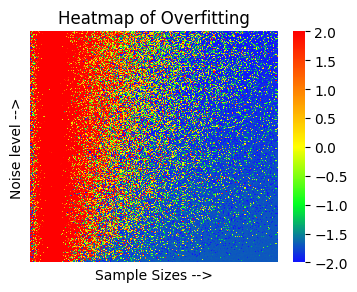

In [ ]:
from matplotlib.colors import LinearSegmentedColormap
plt.figure(figsize=(4, 3))  # Adjust figure size as needed

colors = ["#1111FF", "#00FF22", "#FFFF00", "#FF7F00", "#FF0000"]
cmap = LinearSegmentedColormap.from_list("custom_red_green_blue", colors)
ax = sns.heatmap(df01.iloc[:, ::-1].T, cmap=cmap, vmin=-2, vmax=2)
ax.axes.xaxis.set_ticks_position('none')
ax.axes.yaxis.set_ticks_position('none')

ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([])
plt.xlabel('Sample Sizes -->')
plt.ylabel('Noise level -->')
plt.title('Heatmap of Overfitting')
plt.show()


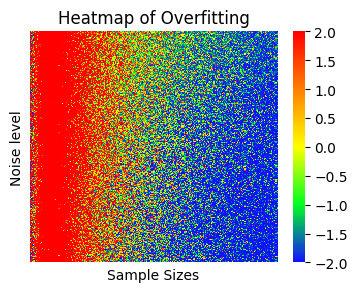

In [ ]:
plt.figure(figsize=(4,3))  # Adjust figure size as needed
ax = sns.heatmap(df02.iloc[:, ::-1].T, cmap=cmap, vmin=-2, vmax=2) # Use 'viridis' or other perceptually uniform colormaps
# you can use other colormaps like 'plasma', 'magma', 'inferno', 'cividis'
ax.axes.xaxis.set_ticks_position('none')
ax.axes.yaxis.set_ticks_position('none')

ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([])
plt.xlabel('Sample Sizes')
plt.ylabel('Noise level')
plt.title('Heatmap of Overfitting')
plt.show()

In [ ]:
def fill_nos_vs_tc(target_complexities=cp.array([10]), sample_sizes=cp.array([1]), noise_levels=cp.array([0])):
    nos_vs_tc = [cp.zeros((len(sample_sizes), len(target_complexities))) for i in range(len(noise_levels))]
    print(nos_vs_tc[0].shape)
    for i, noise_level in enumerate(noise_levels):
        for j, sample_size in enumerate(sample_sizes):
            for k, complexity in enumerate(target_complexities):
                print(f"Noise Level: {noise_level}, Sample Size: {sample_size}, Complexity: {complexity}")
                x, y = generate_target(complexity)
                sample_x, sample_y = generate_noisy_samples(x, y, sample_size, noise_level=noise_level)
                h2 = cp.polyfit(sample_x, sample_y, 2)
                y2 = cp.polyval(h2, x)
                h10 = cp.polyfit(sample_x, sample_y, 10)
                y10 = cp.polyval(h10, x)
                eout2 = e_out(y, y2)
                eout10 = e_out(y, y10)
                # print(abs(eout10-eout2))
                nos_vs_tc[i][j, k] = abs(eout10-eout2)
                print((i+1) * (j+1) * (k+1))
    return nos_vs_tc

In [ ]:
sample_sizes = cp.arange(1, 401, 1)
target_complexity = cp.arange(1, 121, 1)

In [ ]:
nos_vs_tc_outpts = fill_nos_vs_tc(target_complexities=target_complexity, sample_sizes=sample_sizes, noise_levels=cp.array([0, 1, 5]))

(400, 120)
Noise Level: 0, Sample Size: 1, Complexity: 1
1
Noise Level: 0, Sample Size: 1, Complexity: 2
2
Noise Level: 0, Sample Size: 1, Complexity: 3
3
Noise Level: 0, Sample Size: 1, Complexity: 4
4
Noise Level: 0, Sample Size: 1, Complexity: 5
5
Noise Level: 0, Sample Size: 1, Complexity: 6
6
Noise Level: 0, Sample Size: 1, Complexity: 7
7
Noise Level: 0, Sample Size: 1, Complexity: 8
8
Noise Level: 0, Sample Size: 1, Complexity: 9
9
Noise Level: 0, Sample Size: 1, Complexity: 10
10
Noise Level: 0, Sample Size: 1, Complexity: 11
11
Noise Level: 0, Sample Size: 1, Complexity: 12
12
Noise Level: 0, Sample Size: 1, Complexity: 13
13
Noise Level: 0, Sample Size: 1, Complexity: 14
14
Noise Level: 0, Sample Size: 1, Complexity: 15
15
Noise Level: 0, Sample Size: 1, Complexity: 16
16
Noise Level: 0, Sample Size: 1, Complexity: 17
17
Noise Level: 0, Sample Size: 1, Complexity: 18
18
Noise Level: 0, Sample Size: 1, Complexity: 19
19
Noise Level: 0, Sample Size: 1, Complexity: 20
20
Noise L

<ipython-input-70-5937a519d540>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


104
Noise Level: 0, Sample Size: 1, Complexity: 105
105
Noise Level: 0, Sample Size: 1, Complexity: 106
106
Noise Level: 0, Sample Size: 1, Complexity: 107
107
Noise Level: 0, Sample Size: 1, Complexity: 108
108
Noise Level: 0, Sample Size: 1, Complexity: 109
109
Noise Level: 0, Sample Size: 1, Complexity: 110
110
Noise Level: 0, Sample Size: 1, Complexity: 111
111
Noise Level: 0, Sample Size: 1, Complexity: 112
112
Noise Level: 0, Sample Size: 1, Complexity: 113
113
Noise Level: 0, Sample Size: 1, Complexity: 114
114
Noise Level: 0, Sample Size: 1, Complexity: 115
115
Noise Level: 0, Sample Size: 1, Complexity: 116
116
Noise Level: 0, Sample Size: 1, Complexity: 117
117
Noise Level: 0, Sample Size: 1, Complexity: 118
118
Noise Level: 0, Sample Size: 1, Complexity: 119
119
Noise Level: 0, Sample Size: 1, Complexity: 120
120
Noise Level: 0, Sample Size: 2, Complexity: 1
2
Noise Level: 0, Sample Size: 2, Complexity: 2
4
Noise Level: 0, Sample Size: 2, Complexity: 3
6
Noise Level: 0, Samp

<ipython-input-70-5937a519d540>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


144
Noise Level: 0, Sample Size: 2, Complexity: 73
146
Noise Level: 0, Sample Size: 2, Complexity: 74
148
Noise Level: 0, Sample Size: 2, Complexity: 75
150
Noise Level: 0, Sample Size: 2, Complexity: 76
152
Noise Level: 0, Sample Size: 2, Complexity: 77
154
Noise Level: 0, Sample Size: 2, Complexity: 78
156
Noise Level: 0, Sample Size: 2, Complexity: 79
158
Noise Level: 0, Sample Size: 2, Complexity: 80
160
Noise Level: 0, Sample Size: 2, Complexity: 81
162
Noise Level: 0, Sample Size: 2, Complexity: 82
164
Noise Level: 0, Sample Size: 2, Complexity: 83
166
Noise Level: 0, Sample Size: 2, Complexity: 84
168
Noise Level: 0, Sample Size: 2, Complexity: 85
170
Noise Level: 0, Sample Size: 2, Complexity: 86
172
Noise Level: 0, Sample Size: 2, Complexity: 87
174
Noise Level: 0, Sample Size: 2, Complexity: 88
176
Noise Level: 0, Sample Size: 2, Complexity: 89
178
Noise Level: 0, Sample Size: 2, Complexity: 90
180
Noise Level: 0, Sample Size: 2, Complexity: 91
182
Noise Level: 0, Sample Size

<ipython-input-70-5937a519d540>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


156
Noise Level: 0, Sample Size: 3, Complexity: 53
159
Noise Level: 0, Sample Size: 3, Complexity: 54
162
Noise Level: 0, Sample Size: 3, Complexity: 55
165
Noise Level: 0, Sample Size: 3, Complexity: 56
168
Noise Level: 0, Sample Size: 3, Complexity: 57
171
Noise Level: 0, Sample Size: 3, Complexity: 58
174
Noise Level: 0, Sample Size: 3, Complexity: 59
177
Noise Level: 0, Sample Size: 3, Complexity: 60
180
Noise Level: 0, Sample Size: 3, Complexity: 61
183
Noise Level: 0, Sample Size: 3, Complexity: 62
186
Noise Level: 0, Sample Size: 3, Complexity: 63
189
Noise Level: 0, Sample Size: 3, Complexity: 64
192
Noise Level: 0, Sample Size: 3, Complexity: 65
195
Noise Level: 0, Sample Size: 3, Complexity: 66
198
Noise Level: 0, Sample Size: 3, Complexity: 67
201
Noise Level: 0, Sample Size: 3, Complexity: 68
204
Noise Level: 0, Sample Size: 3, Complexity: 69
207
Noise Level: 0, Sample Size: 3, Complexity: 70
210
Noise Level: 0, Sample Size: 3, Complexity: 71
213
Noise Level: 0, Sample Size

<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample

144
Noise Level: 0, Sample Size: 4, Complexity: 37
148
Noise Level: 0, Sample Size: 4, Complexity: 38
152
Noise Level: 0, Sample Size: 4, Complexity: 39
156
Noise Level: 0, Sample Size: 4, Complexity: 40
160
Noise Level: 0, Sample Size: 4, Complexity: 41
164
Noise Level: 0, Sample Size: 4, Complexity: 42
168
Noise Level: 0, Sample Size: 4, Complexity: 43
172
Noise Level: 0, Sample Size: 4, Complexity: 44
176
Noise Level: 0, Sample Size: 4, Complexity: 45
180
Noise Level: 0, Sample Size: 4, Complexity: 46
184
Noise Level: 0, Sample Size: 4, Complexity: 47
188
Noise Level: 0, Sample Size: 4, Complexity: 48
192
Noise Level: 0, Sample Size: 4, Complexity: 49
196
Noise Level: 0, Sample Size: 4, Complexity: 50
200
Noise Level: 0, Sample Size: 4, Complexity: 51
204
Noise Level: 0, Sample Size: 4, Complexity: 52
208
Noise Level: 0, Sample Size: 4, Complexity: 53
212
Noise Level: 0, Sample Size: 4, Complexity: 54
216
Noise Level: 0, Sample Size: 4, Complexity: 55
220
Noise Level: 0, Sample Size

<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample

110
Noise Level: 0, Sample Size: 5, Complexity: 23
115
Noise Level: 0, Sample Size: 5, Complexity: 24
120
Noise Level: 0, Sample Size: 5, Complexity: 25
125
Noise Level: 0, Sample Size: 5, Complexity: 26
130
Noise Level: 0, Sample Size: 5, Complexity: 27
135
Noise Level: 0, Sample Size: 5, Complexity: 28
140
Noise Level: 0, Sample Size: 5, Complexity: 29
145
Noise Level: 0, Sample Size: 5, Complexity: 30
150
Noise Level: 0, Sample Size: 5, Complexity: 31
155
Noise Level: 0, Sample Size: 5, Complexity: 32
160
Noise Level: 0, Sample Size: 5, Complexity: 33
165
Noise Level: 0, Sample Size: 5, Complexity: 34
170
Noise Level: 0, Sample Size: 5, Complexity: 35
175
Noise Level: 0, Sample Size: 5, Complexity: 36
180
Noise Level: 0, Sample Size: 5, Complexity: 37
185
Noise Level: 0, Sample Size: 5, Complexity: 38
190
Noise Level: 0, Sample Size: 5, Complexity: 39
195
Noise Level: 0, Sample Size: 5, Complexity: 40
200
Noise Level: 0, Sample Size: 5, Complexity: 41
205
Noise Level: 0, Sample Size

<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample

48
Noise Level: 0, Sample Size: 6, Complexity: 9
54
Noise Level: 0, Sample Size: 6, Complexity: 10
60
Noise Level: 0, Sample Size: 6, Complexity: 11
66
Noise Level: 0, Sample Size: 6, Complexity: 12
72
Noise Level: 0, Sample Size: 6, Complexity: 13
78
Noise Level: 0, Sample Size: 6, Complexity: 14
84
Noise Level: 0, Sample Size: 6, Complexity: 15
90
Noise Level: 0, Sample Size: 6, Complexity: 16
96
Noise Level: 0, Sample Size: 6, Complexity: 17
102
Noise Level: 0, Sample Size: 6, Complexity: 18
108
Noise Level: 0, Sample Size: 6, Complexity: 19
114
Noise Level: 0, Sample Size: 6, Complexity: 20
120
Noise Level: 0, Sample Size: 6, Complexity: 21
126
Noise Level: 0, Sample Size: 6, Complexity: 22
132
Noise Level: 0, Sample Size: 6, Complexity: 23
138
Noise Level: 0, Sample Size: 6, Complexity: 24
144
Noise Level: 0, Sample Size: 6, Complexity: 25
150
Noise Level: 0, Sample Size: 6, Complexity: 26
156
Noise Level: 0, Sample Size: 6, Complexity: 27
162
Noise Level: 0, Sample Size: 6, Compl

<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample

594
Noise Level: 0, Sample Size: 6, Complexity: 100
600
Noise Level: 0, Sample Size: 6, Complexity: 101
606
Noise Level: 0, Sample Size: 6, Complexity: 102
612
Noise Level: 0, Sample Size: 6, Complexity: 103
618
Noise Level: 0, Sample Size: 6, Complexity: 104
624
Noise Level: 0, Sample Size: 6, Complexity: 105
630
Noise Level: 0, Sample Size: 6, Complexity: 106
636
Noise Level: 0, Sample Size: 6, Complexity: 107
642
Noise Level: 0, Sample Size: 6, Complexity: 108
648
Noise Level: 0, Sample Size: 6, Complexity: 109
654
Noise Level: 0, Sample Size: 6, Complexity: 110
660
Noise Level: 0, Sample Size: 6, Complexity: 111
666
Noise Level: 0, Sample Size: 6, Complexity: 112
672
Noise Level: 0, Sample Size: 6, Complexity: 113
678
Noise Level: 0, Sample Size: 6, Complexity: 114
684
Noise Level: 0, Sample Size: 6, Complexity: 115
690
Noise Level: 0, Sample Size: 6, Complexity: 116
696
Noise Level: 0, Sample Size: 6, Complexity: 117
702
Noise Level: 0, Sample Size: 6, Complexity: 118
708
Noise Le

<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample

544
Noise Level: 0, Sample Size: 8, Complexity: 69
552
Noise Level: 0, Sample Size: 8, Complexity: 70
560
Noise Level: 0, Sample Size: 8, Complexity: 71
568
Noise Level: 0, Sample Size: 8, Complexity: 72
576
Noise Level: 0, Sample Size: 8, Complexity: 73
584
Noise Level: 0, Sample Size: 8, Complexity: 74
592
Noise Level: 0, Sample Size: 8, Complexity: 75
600
Noise Level: 0, Sample Size: 8, Complexity: 76
608
Noise Level: 0, Sample Size: 8, Complexity: 77
616
Noise Level: 0, Sample Size: 8, Complexity: 78
624
Noise Level: 0, Sample Size: 8, Complexity: 79
632
Noise Level: 0, Sample Size: 8, Complexity: 80
640
Noise Level: 0, Sample Size: 8, Complexity: 81
648
Noise Level: 0, Sample Size: 8, Complexity: 82
656
Noise Level: 0, Sample Size: 8, Complexity: 83
664
Noise Level: 0, Sample Size: 8, Complexity: 84
672
Noise Level: 0, Sample Size: 8, Complexity: 85
680
Noise Level: 0, Sample Size: 8, Complexity: 86
688
Noise Level: 0, Sample Size: 8, Complexity: 87
696
Noise Level: 0, Sample Size

<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample

486
Noise Level: 0, Sample Size: 9, Complexity: 55
495
Noise Level: 0, Sample Size: 9, Complexity: 56
504
Noise Level: 0, Sample Size: 9, Complexity: 57
513
Noise Level: 0, Sample Size: 9, Complexity: 58
522
Noise Level: 0, Sample Size: 9, Complexity: 59
531
Noise Level: 0, Sample Size: 9, Complexity: 60
540
Noise Level: 0, Sample Size: 9, Complexity: 61
549
Noise Level: 0, Sample Size: 9, Complexity: 62
558
Noise Level: 0, Sample Size: 9, Complexity: 63
567
Noise Level: 0, Sample Size: 9, Complexity: 64
576
Noise Level: 0, Sample Size: 9, Complexity: 65
585
Noise Level: 0, Sample Size: 9, Complexity: 66
594
Noise Level: 0, Sample Size: 9, Complexity: 67
603
Noise Level: 0, Sample Size: 9, Complexity: 68
612
Noise Level: 0, Sample Size: 9, Complexity: 69
621
Noise Level: 0, Sample Size: 9, Complexity: 70
630
Noise Level: 0, Sample Size: 9, Complexity: 71
639
Noise Level: 0, Sample Size: 9, Complexity: 72
648
Noise Level: 0, Sample Size: 9, Complexity: 73
657
Noise Level: 0, Sample Size

<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample

Streaming output truncated to the last 5000 lines.
44840
Noise Level: 0, Sample Size: 380, Complexity: 119
45220
Noise Level: 0, Sample Size: 380, Complexity: 120
45600
Noise Level: 0, Sample Size: 381, Complexity: 1
381
Noise Level: 0, Sample Size: 381, Complexity: 2
762
Noise Level: 0, Sample Size: 381, Complexity: 3
1143
Noise Level: 0, Sample Size: 381, Complexity: 4
1524
Noise Level: 0, Sample Size: 381, Complexity: 5
1905
Noise Level: 0, Sample Size: 381, Complexity: 6
2286
Noise Level: 0, Sample Size: 381, Complexity: 7
2667
Noise Level: 0, Sample Size: 381, Complexity: 8
3048
Noise Level: 0, Sample Size: 381, Complexity: 9
3429
Noise Level: 0, Sample Size: 381, Complexity: 10
3810
Noise Level: 0, Sample Size: 381, Complexity: 11
4191
Noise Level: 0, Sample Size: 381, Complexity: 12
4572
Noise Level: 0, Sample Size: 381, Complexity: 13
4953
Noise Level: 0, Sample Size: 381, Complexity: 14
5334
Noise Level: 0, Sample Size: 381, Complexity: 15
5715
Noise Level: 0, Sample Size: 381

<ipython-input-70-5937a519d540>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


196
Noise Level: 1, Sample Size: 1, Complexity: 99
198
Noise Level: 1, Sample Size: 1, Complexity: 100
200
Noise Level: 1, Sample Size: 1, Complexity: 101
202
Noise Level: 1, Sample Size: 1, Complexity: 102
204
Noise Level: 1, Sample Size: 1, Complexity: 103
206
Noise Level: 1, Sample Size: 1, Complexity: 104
208
Noise Level: 1, Sample Size: 1, Complexity: 105
210
Noise Level: 1, Sample Size: 1, Complexity: 106
212
Noise Level: 1, Sample Size: 1, Complexity: 107
214
Noise Level: 1, Sample Size: 1, Complexity: 108
216
Noise Level: 1, Sample Size: 1, Complexity: 109
218
Noise Level: 1, Sample Size: 1, Complexity: 110
220
Noise Level: 1, Sample Size: 1, Complexity: 111
222
Noise Level: 1, Sample Size: 1, Complexity: 112
224
Noise Level: 1, Sample Size: 1, Complexity: 113
226
Noise Level: 1, Sample Size: 1, Complexity: 114
228
Noise Level: 1, Sample Size: 1, Complexity: 115
230
Noise Level: 1, Sample Size: 1, Complexity: 116
232
Noise Level: 1, Sample Size: 1, Complexity: 117
234
Noise Lev

<ipython-input-70-5937a519d540>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


264
Noise Level: 1, Sample Size: 2, Complexity: 67
268
Noise Level: 1, Sample Size: 2, Complexity: 68
272
Noise Level: 1, Sample Size: 2, Complexity: 69
276
Noise Level: 1, Sample Size: 2, Complexity: 70
280
Noise Level: 1, Sample Size: 2, Complexity: 71
284
Noise Level: 1, Sample Size: 2, Complexity: 72
288
Noise Level: 1, Sample Size: 2, Complexity: 73
292
Noise Level: 1, Sample Size: 2, Complexity: 74
296
Noise Level: 1, Sample Size: 2, Complexity: 75
300
Noise Level: 1, Sample Size: 2, Complexity: 76
304
Noise Level: 1, Sample Size: 2, Complexity: 77
308
Noise Level: 1, Sample Size: 2, Complexity: 78
312
Noise Level: 1, Sample Size: 2, Complexity: 79
316
Noise Level: 1, Sample Size: 2, Complexity: 80
320
Noise Level: 1, Sample Size: 2, Complexity: 81
324
Noise Level: 1, Sample Size: 2, Complexity: 82
328
Noise Level: 1, Sample Size: 2, Complexity: 83
332
Noise Level: 1, Sample Size: 2, Complexity: 84
336
Noise Level: 1, Sample Size: 2, Complexity: 85
340
Noise Level: 1, Sample Size

<ipython-input-70-5937a519d540>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


282
Noise Level: 1, Sample Size: 3, Complexity: 48
288
Noise Level: 1, Sample Size: 3, Complexity: 49
294
Noise Level: 1, Sample Size: 3, Complexity: 50
300
Noise Level: 1, Sample Size: 3, Complexity: 51
306
Noise Level: 1, Sample Size: 3, Complexity: 52
312
Noise Level: 1, Sample Size: 3, Complexity: 53
318
Noise Level: 1, Sample Size: 3, Complexity: 54
324
Noise Level: 1, Sample Size: 3, Complexity: 55
330
Noise Level: 1, Sample Size: 3, Complexity: 56
336
Noise Level: 1, Sample Size: 3, Complexity: 57
342
Noise Level: 1, Sample Size: 3, Complexity: 58
348
Noise Level: 1, Sample Size: 3, Complexity: 59
354
Noise Level: 1, Sample Size: 3, Complexity: 60
360
Noise Level: 1, Sample Size: 3, Complexity: 61
366
Noise Level: 1, Sample Size: 3, Complexity: 62
372
Noise Level: 1, Sample Size: 3, Complexity: 63
378
Noise Level: 1, Sample Size: 3, Complexity: 64
384
Noise Level: 1, Sample Size: 3, Complexity: 65
390
Noise Level: 1, Sample Size: 3, Complexity: 66
396
Noise Level: 1, Sample Size

<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample

256
Noise Level: 1, Sample Size: 4, Complexity: 33
264
Noise Level: 1, Sample Size: 4, Complexity: 34
272
Noise Level: 1, Sample Size: 4, Complexity: 35
280
Noise Level: 1, Sample Size: 4, Complexity: 36
288
Noise Level: 1, Sample Size: 4, Complexity: 37
296
Noise Level: 1, Sample Size: 4, Complexity: 38
304
Noise Level: 1, Sample Size: 4, Complexity: 39
312
Noise Level: 1, Sample Size: 4, Complexity: 40
320
Noise Level: 1, Sample Size: 4, Complexity: 41
328
Noise Level: 1, Sample Size: 4, Complexity: 42
336
Noise Level: 1, Sample Size: 4, Complexity: 43
344
Noise Level: 1, Sample Size: 4, Complexity: 44
352
Noise Level: 1, Sample Size: 4, Complexity: 45
360
Noise Level: 1, Sample Size: 4, Complexity: 46
368
Noise Level: 1, Sample Size: 4, Complexity: 47
376
Noise Level: 1, Sample Size: 4, Complexity: 48
384
Noise Level: 1, Sample Size: 4, Complexity: 49
392
Noise Level: 1, Sample Size: 4, Complexity: 50
400
Noise Level: 1, Sample Size: 4, Complexity: 51
408
Noise Level: 1, Sample Size

<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample

100
Noise Level: 1, Sample Size: 5, Complexity: 11
110
Noise Level: 1, Sample Size: 5, Complexity: 12
120
Noise Level: 1, Sample Size: 5, Complexity: 13
130
Noise Level: 1, Sample Size: 5, Complexity: 14
140
Noise Level: 1, Sample Size: 5, Complexity: 15
150
Noise Level: 1, Sample Size: 5, Complexity: 16
160
Noise Level: 1, Sample Size: 5, Complexity: 17
170
Noise Level: 1, Sample Size: 5, Complexity: 18
180
Noise Level: 1, Sample Size: 5, Complexity: 19
190
Noise Level: 1, Sample Size: 5, Complexity: 20
200
Noise Level: 1, Sample Size: 5, Complexity: 21
210
Noise Level: 1, Sample Size: 5, Complexity: 22
220
Noise Level: 1, Sample Size: 5, Complexity: 23
230
Noise Level: 1, Sample Size: 5, Complexity: 24
240
Noise Level: 1, Sample Size: 5, Complexity: 25
250
Noise Level: 1, Sample Size: 5, Complexity: 26
260
Noise Level: 1, Sample Size: 5, Complexity: 27
270
Noise Level: 1, Sample Size: 5, Complexity: 28
280
Noise Level: 1, Sample Size: 5, Complexity: 29
290
Noise Level: 1, Sample Size

<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample

1100
Noise Level: 1, Sample Size: 5, Complexity: 111
1110
Noise Level: 1, Sample Size: 5, Complexity: 112
1120
Noise Level: 1, Sample Size: 5, Complexity: 113
1130
Noise Level: 1, Sample Size: 5, Complexity: 114
1140
Noise Level: 1, Sample Size: 5, Complexity: 115
1150
Noise Level: 1, Sample Size: 5, Complexity: 116
1160
Noise Level: 1, Sample Size: 5, Complexity: 117
1170
Noise Level: 1, Sample Size: 5, Complexity: 118
1180
Noise Level: 1, Sample Size: 5, Complexity: 119
1190
Noise Level: 1, Sample Size: 5, Complexity: 120
1200
Noise Level: 1, Sample Size: 6, Complexity: 1
12
Noise Level: 1, Sample Size: 6, Complexity: 2
24
Noise Level: 1, Sample Size: 6, Complexity: 3
36
Noise Level: 1, Sample Size: 6, Complexity: 4
48
Noise Level: 1, Sample Size: 6, Complexity: 5
60
Noise Level: 1, Sample Size: 6, Complexity: 6
72
Noise Level: 1, Sample Size: 6, Complexity: 7
84
Noise Level: 1, Sample Size: 6, Complexity: 8
96
Noise Level: 1, Sample Size: 6, Complexity: 9
108
Noise Level: 1, Sample 

<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample

1116
Noise Level: 1, Sample Size: 6, Complexity: 94
1128
Noise Level: 1, Sample Size: 6, Complexity: 95
1140
Noise Level: 1, Sample Size: 6, Complexity: 96
1152
Noise Level: 1, Sample Size: 6, Complexity: 97
1164
Noise Level: 1, Sample Size: 6, Complexity: 98
1176
Noise Level: 1, Sample Size: 6, Complexity: 99
1188
Noise Level: 1, Sample Size: 6, Complexity: 100
1200
Noise Level: 1, Sample Size: 6, Complexity: 101
1212
Noise Level: 1, Sample Size: 6, Complexity: 102
1224
Noise Level: 1, Sample Size: 6, Complexity: 103
1236
Noise Level: 1, Sample Size: 6, Complexity: 104
1248
Noise Level: 1, Sample Size: 6, Complexity: 105
1260
Noise Level: 1, Sample Size: 6, Complexity: 106
1272
Noise Level: 1, Sample Size: 6, Complexity: 107
1284
Noise Level: 1, Sample Size: 6, Complexity: 108
1296
Noise Level: 1, Sample Size: 6, Complexity: 109
1308
Noise Level: 1, Sample Size: 6, Complexity: 110
1320
Noise Level: 1, Sample Size: 6, Complexity: 111
1332
Noise Level: 1, Sample Size: 6, Complexity: 112

<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample

1050
Noise Level: 1, Sample Size: 7, Complexity: 76
1064
Noise Level: 1, Sample Size: 7, Complexity: 77
1078
Noise Level: 1, Sample Size: 7, Complexity: 78
1092
Noise Level: 1, Sample Size: 7, Complexity: 79
1106
Noise Level: 1, Sample Size: 7, Complexity: 80
1120
Noise Level: 1, Sample Size: 7, Complexity: 81
1134
Noise Level: 1, Sample Size: 7, Complexity: 82
1148
Noise Level: 1, Sample Size: 7, Complexity: 83
1162
Noise Level: 1, Sample Size: 7, Complexity: 84
1176
Noise Level: 1, Sample Size: 7, Complexity: 85
1190
Noise Level: 1, Sample Size: 7, Complexity: 86
1204
Noise Level: 1, Sample Size: 7, Complexity: 87
1218
Noise Level: 1, Sample Size: 7, Complexity: 88
1232
Noise Level: 1, Sample Size: 7, Complexity: 89
1246
Noise Level: 1, Sample Size: 7, Complexity: 90
1260
Noise Level: 1, Sample Size: 7, Complexity: 91
1274
Noise Level: 1, Sample Size: 7, Complexity: 92
1288
Noise Level: 1, Sample Size: 7, Complexity: 93
1302
Noise Level: 1, Sample Size: 7, Complexity: 94
1316
Noise L

<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample

848
Noise Level: 1, Sample Size: 8, Complexity: 54
864
Noise Level: 1, Sample Size: 8, Complexity: 55
880
Noise Level: 1, Sample Size: 8, Complexity: 56
896
Noise Level: 1, Sample Size: 8, Complexity: 57
912
Noise Level: 1, Sample Size: 8, Complexity: 58
928
Noise Level: 1, Sample Size: 8, Complexity: 59
944
Noise Level: 1, Sample Size: 8, Complexity: 60
960
Noise Level: 1, Sample Size: 8, Complexity: 61
976
Noise Level: 1, Sample Size: 8, Complexity: 62
992
Noise Level: 1, Sample Size: 8, Complexity: 63
1008
Noise Level: 1, Sample Size: 8, Complexity: 64
1024
Noise Level: 1, Sample Size: 8, Complexity: 65
1040
Noise Level: 1, Sample Size: 8, Complexity: 66
1056
Noise Level: 1, Sample Size: 8, Complexity: 67
1072
Noise Level: 1, Sample Size: 8, Complexity: 68
1088
Noise Level: 1, Sample Size: 8, Complexity: 69
1104
Noise Level: 1, Sample Size: 8, Complexity: 70
1120
Noise Level: 1, Sample Size: 8, Complexity: 71
1136
Noise Level: 1, Sample Size: 8, Complexity: 72
1152
Noise Level: 1, S

<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample

486
Noise Level: 1, Sample Size: 9, Complexity: 28
504
Noise Level: 1, Sample Size: 9, Complexity: 29
522
Noise Level: 1, Sample Size: 9, Complexity: 30
540
Noise Level: 1, Sample Size: 9, Complexity: 31
558
Noise Level: 1, Sample Size: 9, Complexity: 32
576
Noise Level: 1, Sample Size: 9, Complexity: 33
594
Noise Level: 1, Sample Size: 9, Complexity: 34
612
Noise Level: 1, Sample Size: 9, Complexity: 35
630
Noise Level: 1, Sample Size: 9, Complexity: 36
648
Noise Level: 1, Sample Size: 9, Complexity: 37
666
Noise Level: 1, Sample Size: 9, Complexity: 38
684
Noise Level: 1, Sample Size: 9, Complexity: 39
702
Noise Level: 1, Sample Size: 9, Complexity: 40
720
Noise Level: 1, Sample Size: 9, Complexity: 41
738
Noise Level: 1, Sample Size: 9, Complexity: 42
756
Noise Level: 1, Sample Size: 9, Complexity: 43
774
Noise Level: 1, Sample Size: 9, Complexity: 44
792
Noise Level: 1, Sample Size: 9, Complexity: 45
810
Noise Level: 1, Sample Size: 9, Complexity: 46
828
Noise Level: 1, Sample Size

<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample

40
Noise Level: 1, Sample Size: 10, Complexity: 3
60
Noise Level: 1, Sample Size: 10, Complexity: 4
80
Noise Level: 1, Sample Size: 10, Complexity: 5
100
Noise Level: 1, Sample Size: 10, Complexity: 6
120
Noise Level: 1, Sample Size: 10, Complexity: 7
140
Noise Level: 1, Sample Size: 10, Complexity: 8
160
Noise Level: 1, Sample Size: 10, Complexity: 9
180
Noise Level: 1, Sample Size: 10, Complexity: 10
200
Noise Level: 1, Sample Size: 10, Complexity: 11
220
Noise Level: 1, Sample Size: 10, Complexity: 12
240
Noise Level: 1, Sample Size: 10, Complexity: 13
260
Noise Level: 1, Sample Size: 10, Complexity: 14
280
Noise Level: 1, Sample Size: 10, Complexity: 15
300
Noise Level: 1, Sample Size: 10, Complexity: 16
320
Noise Level: 1, Sample Size: 10, Complexity: 17
340
Noise Level: 1, Sample Size: 10, Complexity: 18
360
Noise Level: 1, Sample Size: 10, Complexity: 19
380
Noise Level: 1, Sample Size: 10, Complexity: 20
400
Noise Level: 1, Sample Size: 10, Complexity: 21
420
Noise Level: 1, Sa

<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample

Streaming output truncated to the last 5000 lines.
28880
Noise Level: 1, Sample Size: 380, Complexity: 39
29640
Noise Level: 1, Sample Size: 380, Complexity: 40
30400
Noise Level: 1, Sample Size: 380, Complexity: 41
31160
Noise Level: 1, Sample Size: 380, Complexity: 42
31920
Noise Level: 1, Sample Size: 380, Complexity: 43
32680
Noise Level: 1, Sample Size: 380, Complexity: 44
33440
Noise Level: 1, Sample Size: 380, Complexity: 45
34200
Noise Level: 1, Sample Size: 380, Complexity: 46
34960
Noise Level: 1, Sample Size: 380, Complexity: 47
35720
Noise Level: 1, Sample Size: 380, Complexity: 48
36480
Noise Level: 1, Sample Size: 380, Complexity: 49
37240
Noise Level: 1, Sample Size: 380, Complexity: 50
38000
Noise Level: 1, Sample Size: 380, Complexity: 51
38760
Noise Level: 1, Sample Size: 380, Complexity: 52
39520
Noise Level: 1, Sample Size: 380, Complexity: 53
40280
Noise Level: 1, Sample Size: 380, Complexity: 54
41040
Noise Level: 1, Sample Size: 380, Complexity: 55
41800
Noise Le

<ipython-input-70-5937a519d540>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


54
Noise Level: 5, Sample Size: 1, Complexity: 19
57
Noise Level: 5, Sample Size: 1, Complexity: 20
60
Noise Level: 5, Sample Size: 1, Complexity: 21
63
Noise Level: 5, Sample Size: 1, Complexity: 22
66
Noise Level: 5, Sample Size: 1, Complexity: 23
69
Noise Level: 5, Sample Size: 1, Complexity: 24
72
Noise Level: 5, Sample Size: 1, Complexity: 25
75
Noise Level: 5, Sample Size: 1, Complexity: 26
78
Noise Level: 5, Sample Size: 1, Complexity: 27
81
Noise Level: 5, Sample Size: 1, Complexity: 28
84
Noise Level: 5, Sample Size: 1, Complexity: 29
87
Noise Level: 5, Sample Size: 1, Complexity: 30
90
Noise Level: 5, Sample Size: 1, Complexity: 31
93
Noise Level: 5, Sample Size: 1, Complexity: 32
96
Noise Level: 5, Sample Size: 1, Complexity: 33
99
Noise Level: 5, Sample Size: 1, Complexity: 34
102
Noise Level: 5, Sample Size: 1, Complexity: 35
105
Noise Level: 5, Sample Size: 1, Complexity: 36
108
Noise Level: 5, Sample Size: 1, Complexity: 37
111
Noise Level: 5, Sample Size: 1, Complexity:

<ipython-input-70-5937a519d540>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


339
Noise Level: 5, Sample Size: 1, Complexity: 114
342
Noise Level: 5, Sample Size: 1, Complexity: 115
345
Noise Level: 5, Sample Size: 1, Complexity: 116
348
Noise Level: 5, Sample Size: 1, Complexity: 117
351
Noise Level: 5, Sample Size: 1, Complexity: 118
354
Noise Level: 5, Sample Size: 1, Complexity: 119
357
Noise Level: 5, Sample Size: 1, Complexity: 120
360
Noise Level: 5, Sample Size: 2, Complexity: 1
6
Noise Level: 5, Sample Size: 2, Complexity: 2
12
Noise Level: 5, Sample Size: 2, Complexity: 3
18
Noise Level: 5, Sample Size: 2, Complexity: 4
24
Noise Level: 5, Sample Size: 2, Complexity: 5
30
Noise Level: 5, Sample Size: 2, Complexity: 6
36
Noise Level: 5, Sample Size: 2, Complexity: 7
42
Noise Level: 5, Sample Size: 2, Complexity: 8
48
Noise Level: 5, Sample Size: 2, Complexity: 9
54
Noise Level: 5, Sample Size: 2, Complexity: 10
60
Noise Level: 5, Sample Size: 2, Complexity: 11
66
Noise Level: 5, Sample Size: 2, Complexity: 12
72
Noise Level: 5, Sample Size: 2, Complexity

<ipython-input-70-5937a519d540>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:10: RankWarning: Polyfit may be poorly conditioned
  h2 = cp.polyfit(sample_x, sample_y, 2)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)


564
Noise Level: 5, Sample Size: 2, Complexity: 95
570
Noise Level: 5, Sample Size: 2, Complexity: 96
576
Noise Level: 5, Sample Size: 2, Complexity: 97
582
Noise Level: 5, Sample Size: 2, Complexity: 98
588
Noise Level: 5, Sample Size: 2, Complexity: 99
594
Noise Level: 5, Sample Size: 2, Complexity: 100
600
Noise Level: 5, Sample Size: 2, Complexity: 101
606
Noise Level: 5, Sample Size: 2, Complexity: 102
612
Noise Level: 5, Sample Size: 2, Complexity: 103
618
Noise Level: 5, Sample Size: 2, Complexity: 104
624
Noise Level: 5, Sample Size: 2, Complexity: 105
630
Noise Level: 5, Sample Size: 2, Complexity: 106
636
Noise Level: 5, Sample Size: 2, Complexity: 107
642
Noise Level: 5, Sample Size: 2, Complexity: 108
648
Noise Level: 5, Sample Size: 2, Complexity: 109
654
Noise Level: 5, Sample Size: 2, Complexity: 110
660
Noise Level: 5, Sample Size: 2, Complexity: 111
666
Noise Level: 5, Sample Size: 2, Complexity: 112
672
Noise Level: 5, Sample Size: 2, Complexity: 113
678
Noise Level: 

<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample

693
Noise Level: 5, Sample Size: 3, Complexity: 78
702
Noise Level: 5, Sample Size: 3, Complexity: 79
711
Noise Level: 5, Sample Size: 3, Complexity: 80
720
Noise Level: 5, Sample Size: 3, Complexity: 81
729
Noise Level: 5, Sample Size: 3, Complexity: 82
738
Noise Level: 5, Sample Size: 3, Complexity: 83
747
Noise Level: 5, Sample Size: 3, Complexity: 84
756
Noise Level: 5, Sample Size: 3, Complexity: 85
765
Noise Level: 5, Sample Size: 3, Complexity: 86
774
Noise Level: 5, Sample Size: 3, Complexity: 87
783
Noise Level: 5, Sample Size: 3, Complexity: 88
792
Noise Level: 5, Sample Size: 3, Complexity: 89
801
Noise Level: 5, Sample Size: 3, Complexity: 90
810
Noise Level: 5, Sample Size: 3, Complexity: 91
819
Noise Level: 5, Sample Size: 3, Complexity: 92
828
Noise Level: 5, Sample Size: 3, Complexity: 93
837
Noise Level: 5, Sample Size: 3, Complexity: 94
846
Noise Level: 5, Sample Size: 3, Complexity: 95
855
Noise Level: 5, Sample Size: 3, Complexity: 96
864
Noise Level: 5, Sample Size

<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample

696
Noise Level: 5, Sample Size: 4, Complexity: 59
708
Noise Level: 5, Sample Size: 4, Complexity: 60
720
Noise Level: 5, Sample Size: 4, Complexity: 61
732
Noise Level: 5, Sample Size: 4, Complexity: 62
744
Noise Level: 5, Sample Size: 4, Complexity: 63
756
Noise Level: 5, Sample Size: 4, Complexity: 64
768
Noise Level: 5, Sample Size: 4, Complexity: 65
780
Noise Level: 5, Sample Size: 4, Complexity: 66
792
Noise Level: 5, Sample Size: 4, Complexity: 67
804
Noise Level: 5, Sample Size: 4, Complexity: 68
816
Noise Level: 5, Sample Size: 4, Complexity: 69
828
Noise Level: 5, Sample Size: 4, Complexity: 70
840
Noise Level: 5, Sample Size: 4, Complexity: 71
852
Noise Level: 5, Sample Size: 4, Complexity: 72
864
Noise Level: 5, Sample Size: 4, Complexity: 73
876
Noise Level: 5, Sample Size: 4, Complexity: 74
888
Noise Level: 5, Sample Size: 4, Complexity: 75
900
Noise Level: 5, Sample Size: 4, Complexity: 76
912
Noise Level: 5, Sample Size: 4, Complexity: 77
924
Noise Level: 5, Sample Size

<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample

480
Noise Level: 5, Sample Size: 5, Complexity: 33
495
Noise Level: 5, Sample Size: 5, Complexity: 34
510
Noise Level: 5, Sample Size: 5, Complexity: 35
525
Noise Level: 5, Sample Size: 5, Complexity: 36
540
Noise Level: 5, Sample Size: 5, Complexity: 37
555
Noise Level: 5, Sample Size: 5, Complexity: 38
570
Noise Level: 5, Sample Size: 5, Complexity: 39
585
Noise Level: 5, Sample Size: 5, Complexity: 40
600
Noise Level: 5, Sample Size: 5, Complexity: 41
615
Noise Level: 5, Sample Size: 5, Complexity: 42
630
Noise Level: 5, Sample Size: 5, Complexity: 43
645
Noise Level: 5, Sample Size: 5, Complexity: 44
660
Noise Level: 5, Sample Size: 5, Complexity: 45
675
Noise Level: 5, Sample Size: 5, Complexity: 46
690
Noise Level: 5, Sample Size: 5, Complexity: 47
705
Noise Level: 5, Sample Size: 5, Complexity: 48
720
Noise Level: 5, Sample Size: 5, Complexity: 49
735
Noise Level: 5, Sample Size: 5, Complexity: 50
750
Noise Level: 5, Sample Size: 5, Complexity: 51
765
Noise Level: 5, Sample Size

<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample

18
Noise Level: 5, Sample Size: 6, Complexity: 2
36
Noise Level: 5, Sample Size: 6, Complexity: 3
54
Noise Level: 5, Sample Size: 6, Complexity: 4
72
Noise Level: 5, Sample Size: 6, Complexity: 5
90
Noise Level: 5, Sample Size: 6, Complexity: 6
108
Noise Level: 5, Sample Size: 6, Complexity: 7
126
Noise Level: 5, Sample Size: 6, Complexity: 8
144
Noise Level: 5, Sample Size: 6, Complexity: 9
162
Noise Level: 5, Sample Size: 6, Complexity: 10
180
Noise Level: 5, Sample Size: 6, Complexity: 11
198
Noise Level: 5, Sample Size: 6, Complexity: 12
216
Noise Level: 5, Sample Size: 6, Complexity: 13
234
Noise Level: 5, Sample Size: 6, Complexity: 14
252
Noise Level: 5, Sample Size: 6, Complexity: 15
270
Noise Level: 5, Sample Size: 6, Complexity: 16
288
Noise Level: 5, Sample Size: 6, Complexity: 17
306
Noise Level: 5, Sample Size: 6, Complexity: 18
324
Noise Level: 5, Sample Size: 6, Complexity: 19
342
Noise Level: 5, Sample Size: 6, Complexity: 20
360
Noise Level: 5, Sample Size: 6, Complexi

<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample

1836
Noise Level: 5, Sample Size: 6, Complexity: 103
1854
Noise Level: 5, Sample Size: 6, Complexity: 104
1872
Noise Level: 5, Sample Size: 6, Complexity: 105
1890
Noise Level: 5, Sample Size: 6, Complexity: 106
1908
Noise Level: 5, Sample Size: 6, Complexity: 107
1926
Noise Level: 5, Sample Size: 6, Complexity: 108
1944
Noise Level: 5, Sample Size: 6, Complexity: 109
1962
Noise Level: 5, Sample Size: 6, Complexity: 110
1980
Noise Level: 5, Sample Size: 6, Complexity: 111
1998
Noise Level: 5, Sample Size: 6, Complexity: 112
2016
Noise Level: 5, Sample Size: 6, Complexity: 113
2034
Noise Level: 5, Sample Size: 6, Complexity: 114
2052
Noise Level: 5, Sample Size: 6, Complexity: 115
2070
Noise Level: 5, Sample Size: 6, Complexity: 116
2088
Noise Level: 5, Sample Size: 6, Complexity: 117
2106
Noise Level: 5, Sample Size: 6, Complexity: 118
2124
Noise Level: 5, Sample Size: 6, Complexity: 119
2142
Noise Level: 5, Sample Size: 6, Complexity: 120
2160
Noise Level: 5, Sample Size: 7, Complexit

<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample

1659
Noise Level: 5, Sample Size: 7, Complexity: 80
1680
Noise Level: 5, Sample Size: 7, Complexity: 81
1701
Noise Level: 5, Sample Size: 7, Complexity: 82
1722
Noise Level: 5, Sample Size: 7, Complexity: 83
1743
Noise Level: 5, Sample Size: 7, Complexity: 84
1764
Noise Level: 5, Sample Size: 7, Complexity: 85
1785
Noise Level: 5, Sample Size: 7, Complexity: 86
1806
Noise Level: 5, Sample Size: 7, Complexity: 87
1827
Noise Level: 5, Sample Size: 7, Complexity: 88
1848
Noise Level: 5, Sample Size: 7, Complexity: 89
1869
Noise Level: 5, Sample Size: 7, Complexity: 90
1890
Noise Level: 5, Sample Size: 7, Complexity: 91
1911
Noise Level: 5, Sample Size: 7, Complexity: 92
1932
Noise Level: 5, Sample Size: 7, Complexity: 93
1953
Noise Level: 5, Sample Size: 7, Complexity: 94
1974
Noise Level: 5, Sample Size: 7, Complexity: 95
1995
Noise Level: 5, Sample Size: 7, Complexity: 96
2016
Noise Level: 5, Sample Size: 7, Complexity: 97
2037
Noise Level: 5, Sample Size: 7, Complexity: 98
2058
Noise L

<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample

1344
Noise Level: 5, Sample Size: 8, Complexity: 57
1368
Noise Level: 5, Sample Size: 8, Complexity: 58
1392
Noise Level: 5, Sample Size: 8, Complexity: 59
1416
Noise Level: 5, Sample Size: 8, Complexity: 60
1440
Noise Level: 5, Sample Size: 8, Complexity: 61
1464
Noise Level: 5, Sample Size: 8, Complexity: 62
1488
Noise Level: 5, Sample Size: 8, Complexity: 63
1512
Noise Level: 5, Sample Size: 8, Complexity: 64
1536
Noise Level: 5, Sample Size: 8, Complexity: 65
1560
Noise Level: 5, Sample Size: 8, Complexity: 66
1584
Noise Level: 5, Sample Size: 8, Complexity: 67
1608
Noise Level: 5, Sample Size: 8, Complexity: 68
1632
Noise Level: 5, Sample Size: 8, Complexity: 69
1656
Noise Level: 5, Sample Size: 8, Complexity: 70
1680
Noise Level: 5, Sample Size: 8, Complexity: 71
1704
Noise Level: 5, Sample Size: 8, Complexity: 72
1728
Noise Level: 5, Sample Size: 8, Complexity: 73
1752
Noise Level: 5, Sample Size: 8, Complexity: 74
1776
Noise Level: 5, Sample Size: 8, Complexity: 75
1800
Noise L

<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample

783
Noise Level: 5, Sample Size: 9, Complexity: 30
810
Noise Level: 5, Sample Size: 9, Complexity: 31
837
Noise Level: 5, Sample Size: 9, Complexity: 32
864
Noise Level: 5, Sample Size: 9, Complexity: 33
891
Noise Level: 5, Sample Size: 9, Complexity: 34
918
Noise Level: 5, Sample Size: 9, Complexity: 35
945
Noise Level: 5, Sample Size: 9, Complexity: 36
972
Noise Level: 5, Sample Size: 9, Complexity: 37
999
Noise Level: 5, Sample Size: 9, Complexity: 38
1026
Noise Level: 5, Sample Size: 9, Complexity: 39
1053
Noise Level: 5, Sample Size: 9, Complexity: 40
1080
Noise Level: 5, Sample Size: 9, Complexity: 41
1107
Noise Level: 5, Sample Size: 9, Complexity: 42
1134
Noise Level: 5, Sample Size: 9, Complexity: 43
1161
Noise Level: 5, Sample Size: 9, Complexity: 44
1188
Noise Level: 5, Sample Size: 9, Complexity: 45
1215
Noise Level: 5, Sample Size: 9, Complexity: 46
1242
Noise Level: 5, Sample Size: 9, Complexity: 47
1269
Noise Level: 5, Sample Size: 9, Complexity: 48
1296
Noise Level: 5, 

<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample

90
Noise Level: 5, Sample Size: 10, Complexity: 4
120
Noise Level: 5, Sample Size: 10, Complexity: 5
150
Noise Level: 5, Sample Size: 10, Complexity: 6
180
Noise Level: 5, Sample Size: 10, Complexity: 7
210
Noise Level: 5, Sample Size: 10, Complexity: 8
240
Noise Level: 5, Sample Size: 10, Complexity: 9
270
Noise Level: 5, Sample Size: 10, Complexity: 10
300
Noise Level: 5, Sample Size: 10, Complexity: 11
330
Noise Level: 5, Sample Size: 10, Complexity: 12
360
Noise Level: 5, Sample Size: 10, Complexity: 13
390
Noise Level: 5, Sample Size: 10, Complexity: 14
420
Noise Level: 5, Sample Size: 10, Complexity: 15
450
Noise Level: 5, Sample Size: 10, Complexity: 16
480
Noise Level: 5, Sample Size: 10, Complexity: 17
510
Noise Level: 5, Sample Size: 10, Complexity: 18
540
Noise Level: 5, Sample Size: 10, Complexity: 19
570
Noise Level: 5, Sample Size: 10, Complexity: 20
600
Noise Level: 5, Sample Size: 10, Complexity: 21
630
Noise Level: 5, Sample Size: 10, Complexity: 22
660
Noise Level: 5,

<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample_y, 10)
<ipython-input-70-5937a519d540>:12: RankWarning: Polyfit may be poorly conditioned
  h10 = cp.polyfit(sample_x, sample

Streaming output truncated to the last 5000 lines.
Noise Level: 5, Sample Size: 380, Complexity: 21
23940
Noise Level: 5, Sample Size: 380, Complexity: 22
25080
Noise Level: 5, Sample Size: 380, Complexity: 23
26220
Noise Level: 5, Sample Size: 380, Complexity: 24
27360
Noise Level: 5, Sample Size: 380, Complexity: 25
28500
Noise Level: 5, Sample Size: 380, Complexity: 26
29640
Noise Level: 5, Sample Size: 380, Complexity: 27
30780
Noise Level: 5, Sample Size: 380, Complexity: 28
31920
Noise Level: 5, Sample Size: 380, Complexity: 29
33060
Noise Level: 5, Sample Size: 380, Complexity: 30
34200
Noise Level: 5, Sample Size: 380, Complexity: 31
35340
Noise Level: 5, Sample Size: 380, Complexity: 32
36480
Noise Level: 5, Sample Size: 380, Complexity: 33
37620
Noise Level: 5, Sample Size: 380, Complexity: 34
38760
Noise Level: 5, Sample Size: 380, Complexity: 35
39900
Noise Level: 5, Sample Size: 380, Complexity: 36
41040
Noise Level: 5, Sample Size: 380, Complexity: 37
42180
Noise Level: 5

In [ ]:
nos_vs_tc1, nos_vs_tc2, nos_vs_tc3 = nos_vs_tc_outpts

In [ ]:
nos_vs_tc1.shape, nos_vs_tc2.shape, nos_vs_tc3.shape

((400, 120), (400, 120), (400, 120))

In [ ]:
import pandas as pd
df1 = pd.DataFrame(np.log10(np.abs(nos_vs_tc1)), columns=target_complexity, index=sample_sizes)
df2 = pd.DataFrame(np.log10(np.abs(nos_vs_tc2)), columns=target_complexity, index=sample_sizes)
df3 = pd.DataFrame(np.log10(np.abs(nos_vs_tc3)), columns=target_complexity, index=sample_sizes)


df1.iloc[:, ::-1]

120       119        118       117       116       115       114  \
1    4.055447  5.981701  20.605848 -2.760629  2.879217 -0.952711  3.366531   
2   -4.089409  7.592707  -2.007263 -2.395768 -2.673591  0.398362  1.344862   
3   -1.560964  8.736069  -1.969898 -2.216125  0.851462  2.176533  4.589033   
4   -3.835434 -2.802504  -1.363897 -1.055161  2.490793  3.439027  0.361185   
5    0.851914 -1.692882   8.770138  4.694274 -2.653407 -0.762066 -0.333716   
..        ...       ...        ...       ...       ...       ...       ...   
396 -4.000784 -3.249168  -3.505605 -4.285411 -2.830656 -4.244259 -3.505702   
397 -4.303776 -3.900333  -3.601828 -3.811966 -3.235438 -3.803914 -3.919064   
398 -3.663254 -3.776904  -3.858943 -4.491349 -4.169800 -3.775998 -3.877569   
399 -4.152642 -3.875788  -4.170739 -3.717643 -3.854736 -3.537953 -4.353761   
400 -3.316069 -3.587908  -4.128268 -3.900086 -3.942337 -3.666585 -3.291739   

          113       112       111  ...       10        9         8    \
1   -2.198176 -2.614186 -3.353693  ... -1.509477  3.352395  0.662715   
2   -0.411301 -2.242972 -2.707866  ... -2.119067  1.785067 -2.064851   
3   -1.158235 -2.880553  1.346006  ... -0.470718  0.905683 -1.023781   
4   -2.104021  0.020764 -1.347035  ... -1.072341 -0.951159  0.527978   
5    0.562884  9.552633 -2.029890  ...  0.893406  6.246622  7.100081   
..        ...       ...       ...  ...       ...       ...       ...   
396 -3.778138 -3.797383 -3.971328  ... -1.317651 -1.274141 -1.216751   
397 -3.299133 -3.908423 -4.065347  ... -1.315948 -1.272662 -1.229606   
398 -3.959053 -3.389850 -3.621261  ... -1.319192 -1.269431 -1.225838   
399 -4.248849 -3.710588 -3.886825  ... -1.315766 -1.270059 -1.229450   
400 -3.588263 -4.370895 -4.043864  ... -1.314705 -1.274841 -1.229469   

          7          6         5          4         3          2          1    
1   -1.896855  -1.139167  8.517297   2.344167  5.619837  12.739141   4.464621  
2   -0.752916  10.774581  1.951091  11.321322  0.037712  -1.714851   9.136869  
3   -3.578252   0.751127  0.736413   1.173386  0.538171   1.503314   3.826769  
4   -0.748087   2.202869 -0.248757  -0.185436 -0.391225  -0.852979  -1.812689  
5    2.425137   0.654902  0.501774   0.113510 -0.186327  -1.387628   1.037818  
..        ...        ...       ...        ...       ...        ...        ...  
396 -1.173735  -1.100996 -1.037134  -0.954034 -0.843199 -30.725646 -30.530625  
397 -1.173775  -1.109928 -1.040212  -0.952775 -0.843520 -31.864238 -31.607423  
398 -1.173093  -1.111995 -1.040235  -0.951454 -0.834906 -30.638183 -31.124025  
399 -1.168118  -1.106694 -1.033358  -0.934586 -0.843552 -30.563892 -30.667235  
400 -1.173446  -1.109840 -1.035630  -0.946884 -0.841512 -30.338959 -30.965737  

[400 rows x 120 columns]

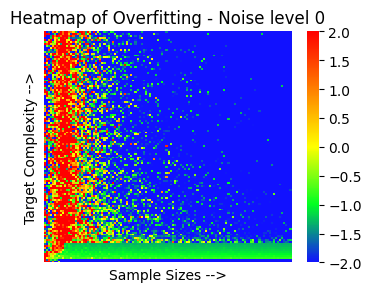

In [ ]:
from matplotlib.colors import LinearSegmentedColormap
plt.figure(figsize=(4, 3))  # Adjust figure size as needed

colors = ["#1111FF", "#00FF22", "#FFFF00", "#FF7F00", "#FF0000"]
cmap = LinearSegmentedColormap.from_list("custom_red_green_blue", colors)
ax = sns.heatmap(df1.iloc[:120, ::-1].T, cmap=cmap, vmin=-2, vmax=2)
ax.axes.xaxis.set_ticks_position('none')
ax.axes.yaxis.set_ticks_position('none')

ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([])
plt.xlabel('Sample Sizes -->')
plt.ylabel('Target Complexity -->')
plt.title('Heatmap of Overfitting - Noise level 0')
plt.show()


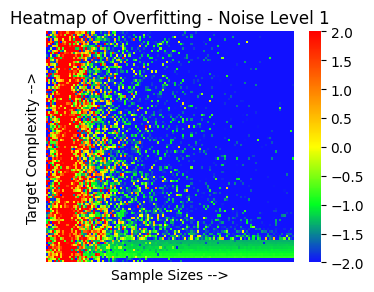

In [ ]:
plt.figure(figsize=(4, 3))  # Adjust figure size as needed

colors = ["#1111FF", "#00FF22", "#FFFF00", "#FF7F00", "#FF0000"]
cmap = LinearSegmentedColormap.from_list("custom_red_green_blue", colors)
ax = sns.heatmap(df2.iloc[:120, 100::-1].T, cmap=cmap, vmin=-2, vmax=2)
ax.axes.xaxis.set_ticks_position('none')
ax.axes.yaxis.set_ticks_position('none')

ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([])
plt.xlabel('Sample Sizes -->')
plt.ylabel('Target Complexity -->')
plt.title('Heatmap of Overfitting - Noise Level 1')
plt.show()

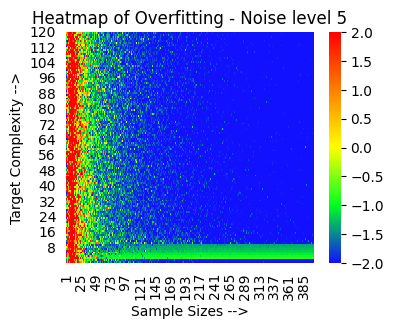

In [ ]:
plt.figure(figsize=(4, 3))  # Adjust figure size as needed

colors = ["#1111FF", "#00FF22", "#FFFF00", "#FF7F00", "#FF0000"]
cmap = LinearSegmentedColormap.from_list("custom_red_green_blue", colors)
ax = sns.heatmap(df3.iloc[:, ::-1].T, cmap=cmap, vmin=-2, vmax=2)
ax.axes.xaxis.set_ticks_position('none')
ax.axes.yaxis.set_ticks_position('none')

# ax.axes.xaxis.set_ticks([])
# ax.axes.yaxis.set_ticks([])
plt.xlabel('Sample Sizes -->')
plt.ylabel('Target Complexity -->')
plt.title('Heatmap of Overfitting - Noise level 5')
plt.show()

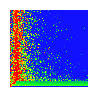

In [ ]:
plt.figure(figsize=(1, 1))  # Adjust figure size as needed

colors = ["#1111FF", "#00FF22", "#FFFF00", "#FF7F00", "#FF0000"]
cmap = LinearSegmentedColormap.from_list("custom_red_green_blue", colors)
ax = sns.heatmap(df1.iloc[:120, ::-1].T, cmap=cmap, vmin=-2, vmax=2, cbar=False)
ax.axes.xaxis.set_ticks_position('none')
ax.axes.yaxis.set_ticks_position('none')

ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([])
# plt.xlabel('Sample Sizes -->')
# plt.ylabel('Target Complexity -->')
# plt.title('Heatmap of Overfitting - Noise level 0')
plt.show()
ax.figure.savefig('heatmap2.png', dpi=300, bbox_inches='tight')

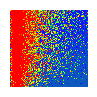

In [ ]:
plt.figure(figsize=(1, 1))  # Adjust figure size as needed

colors = ["#1111FF", "#00FF22", "#FFFF00", "#FF7F00", "#FF0000"]
cmap = LinearSegmentedColormap.from_list("custom_red_green_blue", colors)
ax = sns.heatmap(df01.iloc[:, ::-1].T, cmap=cmap, vmin=-2, vmax=2, cbar=False)
ax.axes.xaxis.set_ticks_position('none')
ax.axes.yaxis.set_ticks_position('none')

ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([])

plt.show()
ax.figure.savefig('heatmap1.png', dpi=300, bbox_inches='tight')